In [1]:
import numpy  as np
import pandas as pd
import json
import pandas

In [2]:
import nltk
import nltk.corpus
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.metrics                  import silhouette_samples, silhouette_score
from sklearn.preprocessing            import normalize
from nltk.tokenize                    import word_tokenize
import re
from unidecode                        import unidecode
from nltk.corpus import stopwords

In [3]:
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud

In [4]:
from sklearn import cluster

# Dataset livro de Salmos

In [6]:
Capitulo_1 = "Blessed is the man that walks not in the counsel of the ungodly, nor stands in the way of sinners, nor sits in the seat of the scornful.But his delight is in the law of the LORD; and in his law does he meditate day and night.And he shall be like a tree planted by the rivers of water, that brings forth his fruit in his season; his leaf also shall not wither; and whatever he does shall prosper.The ungodly are not so: but are like the chaff which the wind drives away.Therefore the ungodly shall not stand in the judgment, nor sinners in the congregation of the righteous.For the LORD knows the way of the righteous: but the way of the ungodly shall perish.".lower()

In [7]:
Capitulo_2 = "Why do the heathen rage, and the people imagine a vain thing?The kings of the earth set themselves, and the rulers take counsel together, against the LORD, and against his anointed, saying,Let us break their bands asunder, and cast away their cords from us.He that sits in the heavens shall laugh: the LORD shall have them in derision.Then shall he speak to them in his wrath, and vex them in his sore displeasure.Yet have I set my king on my holy hill of Zion.I will declare the decree: the LORD has said to me, You are my Son; this day have I begotten you.Ask of me, and I shall give you the heathen for your inheritance, and the uttermost parts of the earth for your possession.You shall break them with a rod of iron; you shall dash them in pieces like a potter' vessel.Be wise now therefore, O you kings: be instructed, you judges of the earth.Serve the LORD with fear, and rejoice with trembling.Kiss the Son, lest he be angry, and you perish from the way, when his wrath is kindled but a little. Blessed are all they that put their trust in him.".lower()

In [8]:
Capitulo_3 = "Lord, how are they increased that trouble me! many are they that rise up against me.Many there be which say of my soul, There is no help for him in God. Selah.But you, O LORD, are a shield for me; my glory, and the lifter up of my head.I cried to the LORD with my voice, and he heard me out of his holy hill. Selah.I laid me down and slept; I awaked; for the LORD sustained me.I will not be afraid of ten thousands of people, that have set themselves against me round about.Arise, O LORD; save me, O my God: for you have smitten all my enemies on the cheek bone; you have broken the teeth of the ungodly.Salvation belongs to the LORD: your blessing is on your people. Selah.".lower()

In [9]:
Capitulo_4 = "Hear me when I call, O God of my righteousness: you have enlarged me when I was in distress; have mercy on me, and hear my prayer.O you sons of men, how long will you turn my glory into shame? how long will you love vanity, and seek after leasing? Selah.But know that the LORD has set apart him that is godly for himself: the LORD will hear when I call to him.Stand in awe, and sin not: commune with your own heart on your bed, and be still. Selah.Offer the sacrifices of righteousness, and put your trust in the LORD.There be many that say, Who will show us any good? LORD, lift you up the light of your countenance on us.You have put gladness in my heart, more than in the time that their corn and their wine increased.I will both lay me down in peace, and sleep: for you, LORD, only make me dwell in safety.".lower()

In [10]:
Capitulo_5 = "Give ear to my words, O LORD, consider my meditation.Listen to the voice of my cry, my King, and my God: for to you will I pray.My voice shall you hear in the morning, O LORD; in the morning will I direct my prayer to you, and will look up.For you are not a God that has pleasure in wickedness: neither shall evil dwell with you.The foolish shall not stand in your sight: you hate all workers of iniquity.You shall destroy them that speak leasing: the LORD will abhor the bloody and deceitful man.But as for me, I will come into your house in the multitude of your mercy: and in your fear will I worship toward your holy temple.Lead me, O LORD, in your righteousness because of my enemies; make your way straight before my face.For there is no faithfulness in their mouth; their inward part is very wickedness; their throat is an open sepulcher; they flatter with their tongue.Destroy you them, O God; let them fall by their own counsels; cast them out in the multitude of their transgressions; for they have rebelled against you.But let all those that put their trust in you rejoice: let them ever shout for joy, because you defend them: let them also that love your name be joyful in you.For you, LORD, will bless the righteous; with favor will you compass him as with a shield.".lower()

In [11]:
Capitulo_6 = "O LORD, rebuke me not in your anger, neither chasten me in your hot displeasure.Have mercy on me, O LORD; for I am weak: O LORD, heal me; for my bones are vexed.My soul is also sore vexed: but you, O LORD, how long?Return, O LORD, deliver my soul: oh save me for your mercies'sake.For in death there is no remembrance of you: in the grave who shall give you thanks?I am weary with my groaning; all the night make I my bed to swim; I water my couch with my tears.My eye is consumed because of grief; it waxes old because of all my enemies.Depart from me, all you workers of iniquity; for the LORD has heard the voice of my weeping.The LORD has heard my supplication; the LORD will receive my prayer.Let all my enemies be ashamed and sore vexed: let them return and be ashamed suddenly.".lower()

In [12]:
Capitulo_7 = "O LORD my God, in you do I put my trust: save me from all them that persecute me, and deliver me:Lest he tear my soul like a lion, rending it in pieces, while there is none to deliver.O LORD my God, If I have done this; if there be iniquity in my hands;If I have rewarded evil to him that was at peace with me; (yes, I have delivered him that without cause is my enemy:)Let the enemy persecute my soul, and take it; yes, let him tread down my life on the earth, and lay my honor in the dust. Selah.Arise, O LORD, in your anger, lift up yourself because of the rage of my enemies: and awake for me to the judgment that you have commanded.So shall the congregation of the people compass you about: for their sakes therefore return you on high.The LORD shall judge the people: judge me, O LORD, according to my righteousness, and according to my integrity that is in me.Oh let the wickedness of the wicked come to an end; but establish the just: for the righteous God tries the hearts and reins.My defense is of God, which saves the upright in heart.God judges the righteous, and God is angry with the wicked every day.If he turn not, he will whet his sword; he has bent his bow, and made it ready.He has also prepared for him the instruments of death; he ordains his arrows against the persecutors.Behold, he travails with iniquity, and has conceived mischief, and brought forth falsehood.He made a pit, and dig it, and is fallen into the ditch which he made.His mischief shall return on his own head, and his violent dealing shall come down on his own pate.I will praise the LORD according to his righteousness: and will sing praise to the name of the LORD most high.".lower()

In [13]:
Capitulo_8 = "O LORD, our Lord, how excellent is your name in all the earth! who have set your glory above the heavens.Out of the mouth of babes and sucklings have you ordained strength because of your enemies, that you might still the enemy and the avenger.When I consider your heavens, the work of your fingers, the moon and the stars, which you have ordained;What is man, that you are mindful of him? and the son of man, that you visit him?For you have made him a little lower than the angels, and have crowned him with glory and honor.You made him to have dominion over the works of your hands; you have put all things under his feet:All sheep and oxen, yes, and the beasts of the field;The fowl of the air, and the fish of the sea, and whatever passes through the paths of the seas.O LORD our Lord, how excellent is your name in all the earth!".lower()

In [14]:
Capitulo_9 = "I will praise you, O LORD, with my whole heart; I will show forth all your marvelous works.I will be glad and rejoice in you: I will sing praise to your name, O you most High.When my enemies are turned back, they shall fall and perish at your presence.For you have maintained my right and my cause; you sat in the throne judging right.You have rebuked the heathen, you have destroyed the wicked, you have put out their name for ever and ever.O you enemy, destructions are come to a perpetual end: and you have destroyed cities; their memorial is perished with them.But the LORD shall endure for ever: he has prepared his throne for judgment.And he shall judge the world in righteousness, he shall minister judgment to the people in uprightness.The LORD also will be a refuge for the oppressed, a refuge in times of trouble.And they that know your name will put their trust in you: for you, LORD, have not forsaken them that seek you.Sing praises to the LORD, which dwells in Zion: declare among the people his doings.When he makes inquisition for blood, he remembers them: he forgets not the cry of the humble.Have mercy on me, O LORD; consider my trouble which I suffer of them that hate me, you that lift me up from the gates of death:That I may show forth all your praise in the gates of the daughter of Zion: I will rejoice in your salvation.The heathen are sunk down in the pit that they made: in the net which they hid is their own foot taken.The LORD is known by the judgment which he executes: the wicked is snared in the work of his own hands. Higgaion. Selah.The wicked shall be turned into hell, and all the nations that forget God.For the needy shall not always be forgotten: the expectation of the poor shall not perish for ever.Arise, O LORD; let not man prevail: let the heathen be judged in your sight.Put them in fear, O LORD: that the nations may know themselves to be but men. Selah.".lower()

In [15]:
Capitulo_10 = "Why stand you afar off, O LORD? why hide you yourself in times of trouble?The wicked in his pride does persecute the poor: let them be taken in the devices that they have imagined.For the wicked boasts of his heart' desire, and blesses the covetous, whom the LORD abhors.The wicked, through the pride of his countenance, will not seek after God: God is not in all his thoughts.His ways are always grievous; your judgments are far above out of his sight: as for all his enemies, he puffs at them.He has said in his heart, I shall not be moved: for I shall never be in adversity.His mouth is full of cursing and deceit and fraud: under his tongue is mischief and vanity.He sits in the lurking places of the villages: in the secret places does he murder the innocent: his eyes are privately set against the poor.He lies in wait secretly as a lion in his den: he lies in wait to catch the poor: he does catch the poor, when he draws him into his net.He crouches, and humbles himself, that the poor may fall by his strong ones.He has said in his heart, God has forgotten: he hides his face; he will never see it.Arise, O LORD; O God, lift up your hand: forget not the humble.Why does the wicked scorn God? he has said in his heart, You will not require it.You have seen it; for you behold mischief and spite, to requite it with your hand: the poor commits himself to you; you are the helper of the fatherless.Break you the arm of the wicked and the evil man: seek out his wickedness till you find none.The LORD is King for ever and ever: the heathen are perished out of his land.LORD, you have heard the desire of the humble: you will prepare their heart, you will cause your ear to hear:To judge the fatherless and the oppressed, that the man of the earth may no more oppress.".lower()

In [16]:
Capitulo_11 = "In the LORD put I my trust: how say you to my soul, Flee as a bird to your mountain?For, see, the wicked bend their bow, they make ready their arrow on the string, that they may privately shoot at the upright in heart.If the foundations be destroyed, what can the righteous do?The LORD is in his holy temple, the LORD' throne is in heaven: his eyes behold, his eyelids try, the children of men.The LORD tries the righteous: but the wicked and him that loves violence his soul hates.On the wicked he shall rain snares, fire and brimstone, and an horrible tempest: this shall be the portion of their cup.For the righteous LORD loves righteousness; his countenance does behold the upright.".lower()

In [17]:
Capitulo_12 = "Help, LORD; for the godly man ceases; for the faithful fail from among the children of men.They speak vanity every one with his neighbor: with flattering lips and with a double heart do they speak.The LORD shall cut off all flattering lips, and the tongue that speaks proud things:Who have said, With our tongue will we prevail; our lips are our own: who is lord over us?For the oppression of the poor, for the sighing of the needy, now will I arise, said the LORD; I will set him in safety from him that puffs at him.The words of the LORD are pure words: as silver tried in a furnace of earth, purified seven times.You shall keep them, O LORD, you shall preserve them from this generation for ever.The wicked walk on every side, when the vilest men are exalted.".lower()

In [18]:
Capitulo_13 = "How long will you forget me, O LORD? for ever? how long will you hide your face from me?How long shall I take counsel in my soul, having sorrow in my heart daily? how long shall my enemy be exalted over me?Consider and hear me, O LORD my God: lighten my eyes, lest I sleep the sleep of death;Lest my enemy say, I have prevailed against him; and those that trouble me rejoice when I am moved.But I have trusted in your mercy; my heart shall rejoice in your salvation.I will sing to the LORD, because he has dealt bountifully with me.".lower()

In [19]:
Capitulo_14 = "The fool has said in his heart, There is no God. They are corrupt, they have done abominable works, there is none that does good.The LORD looked down from heaven on the children of men, to see if there were any that did understand, and seek God.They are all gone aside, they are all together become filthy: there is none that does good, no, not one.Have all the workers of iniquity no knowledge? who eat up my people as they eat bread, and call not on the LORD.There were they in great fear: for God is in the generation of the righteous.You have shamed the counsel of the poor, because the LORD is his refuge.Oh that the salvation of Israel were come out of Zion! when the LORD brings back the captivity of his people, Jacob shall rejoice, and Israel shall be glad.".lower()

In [20]:
Capitulo_15 = "Lord, who shall abide in your tabernacle? who shall dwell in your holy hill?He that walks uprightly, and works righteousness, and speaks the truth in his heart.He that backbites not with his tongue, nor does evil to his neighbor, nor takes up a reproach against his neighbor.In whose eyes a vile person is contemned; but he honors them that fear the LORD. He that swears to his own hurt, and changes not.He that puts not out his money to usury, nor takes reward against the innocent. He that does these things shall never be moved.".lower()

In [21]:
Capitulo_16 = "Preserve me, O God: for in you do I put my trust.O my soul, you have said to the LORD, You are my Lord: my goodness extends not to you;But to the saints that are in the earth, and to the excellent, in whom is all my delight.Their sorrows shall be multiplied that hasten after another god: their drink offerings of blood will I not offer, nor take up their names into my lips.The LORD is the portion of my inheritance and of my cup: you maintain my lot.The lines are fallen to me in pleasant places; yes, I have a goodly heritage.I will bless the LORD, who has given me counsel: my reins also instruct me in the night seasons.I have set the LORD always before me: because he is at my right hand, I shall not be moved.Therefore my heart is glad, and my glory rejoices: my flesh also shall rest in hope.For you will not leave my soul in hell; neither will you suffer your Holy One to see corruption.You will show me the path of life: in your presence is fullness of joy; at your right hand there are pleasures for ever more.".lower()

In [22]:
Capitulo_17 = "Hear the right, O LORD, attend to my cry, give ear to my prayer, that goes not out of feigned lips.Let my sentence come forth from your presence; let your eyes behold the things that are equal.You have proved my heart; you have visited me in the night; you have tried me, and shall find nothing; I am purposed that my mouth shall not transgress.Concerning the works of men, by the word of your lips I have kept me from the paths of the destroyer.Hold up my goings in your paths, that my footsteps slip not.I have called on you, for you will hear me, O God: incline your ear to me, and hear my speech.Show your marvelous loving kindness, O you that save by your right hand them which put their trust in you from those that rise up against them.Keep me as the apple of the eye, hide me under the shadow of your wings,From the wicked that oppress me, from my deadly enemies, who compass me about.They are enclosed in their own fat: with their mouth they speak proudly.They have now compassed us in our steps: they have set their eyes bowing down to the earth;Like as a lion that is greedy of his prey, and as it were a young lion lurking in secret places.Arise, O LORD, disappoint him, cast him down: deliver my soul from the wicked, which is your sword:From men which are your hand, O LORD, from men of the world, which have their portion in this life, and whose belly you fill with your hid treasure: they are full of children, and leave the rest of their substance to their babes.As for me, I will behold your face in righteousness: I shall be satisfied, when I awake, with your likeness.".lower()

In [23]:
Capitulo_18 = "I will love you, O LORD, my strength.The LORD is my rock, and my fortress, and my deliverer; my God, my strength, in whom I will trust; my buckler, and the horn of my salvation, and my high tower.I will call on the LORD, who is worthy to be praised: so shall I be saved from my enemies.The sorrows of death compassed me, and the floods of ungodly men made me afraid.The sorrows of hell compassed me about: the snares of death prevented me.In my distress I called on the LORD, and cried to my God: he heard my voice out of his temple, and my cry came before him, even into his ears.Then the earth shook and trembled; the foundations also of the hills moved and were shaken, because he was wroth.There went up a smoke out of his nostrils, and fire out of his mouth devoured: coals were kindled by it.He bowed the heavens also, and came down: and darkness was under his feet.And he rode on a cherub, and did fly: yes, he did fly on the wings of the wind.He made darkness his secret place; his pavilion round about him were dark waters and thick clouds of the skies.At the brightness that was before him his thick clouds passed, hail stones and coals of fire.The LORD also thundered in the heavens, and the Highest gave his voice; hail stones and coals of fire.Yes, he sent out his arrows, and scattered them; and he shot out lightning, and discomfited them.Then the channels of waters were seen, and the foundations of the world were discovered at your rebuke, O LORD, at the blast of the breath of your nostrils.He sent from above, he took me, he drew me out of many waters.He delivered me from my strong enemy, and from them which hated me: for they were too strong for me.They prevented me in the day of my calamity: but the LORD was my stay.He brought me forth also into a large place; he delivered me, because he delighted in me.The LORD rewarded me according to my righteousness; according to the cleanness of my hands has he recompensed me.For I have kept the ways of the LORD, and have not wickedly departed from my God.For all his judgments were before me, and I did not put away his statutes from me.I was also upright before him, and I kept myself from my iniquity.Therefore has the LORD recompensed me according to my righteousness, according to the cleanness of my hands in his eyesight.With the merciful you will show yourself merciful; with an upright man you will show yourself upright;With the pure you will show yourself pure; and with the fraudulent you will show yourself devious.For you will save the afflicted people; but will bring down high looks.For you will light my candle: the LORD my God will enlighten my darkness.For by you I have run through a troop; and by my God have I leaped over a wall.As for God, his way is perfect: the word of the LORD is tried: he is a buckler to all those that trust in him.For who is God save the LORD? or who is a rock save our God?It is God that girds me with strength, and makes my way perfect.He makes my feet like hinds'feet, and sets me on my high places.He teaches my hands to war, so that a bow of steel is broken by my arms.You have also given me the shield of your salvation: and your right hand has held me up, and your gentleness has made me great.You have enlarged my steps under me, that my feet did not slip.I have pursued my enemies, and overtaken them: neither did I turn again till they were consumed.I have wounded them that they were not able to rise: they are fallen under my feet.For you have girded me with strength to the battle: you have subdued under me those that rose up against me.You have also given me the necks of my enemies; that I might destroy them that hate me.They cried, but there was none to save them: even to the LORD, but he answered them not.Then did I beat them small as the dust before the wind: I did cast them out as the dirt in the streets.You have delivered me from the strivings of the people; and you have made me the head of the heathen: a people whom I have not known shall serve me.As soon as they hear of me, they shall obey me: the strangers shall submit themselves to me.The strangers shall fade away, and be afraid out of their close places.The LORD lives; and blessed be my rock; and let the God of my salvation be exalted.It is God that avenges me, and subdues the people under me.He delivers me from my enemies: yes, you lift me up above those that rise up against me: you have delivered me from the violent man.Therefore will I give thanks to you, O LORD, among the heathen, and sing praises to your name.Great deliverance gives he to his king; and shows mercy to his anointed, to David, and to his seed for ever more.".lower()

In [24]:
Capitulo_19 = "The heavens declare the glory of God; and the firmament shows his handiwork.Day to day utters speech, and night to night shows knowledge.There is no speech nor language, where their voice is not heard.Their line is gone out through all the earth, and their words to the end of the world. In them has he set a tabernacle for the sun,Which is as a bridegroom coming out of his chamber, and rejoices as a strong man to run a race.His going forth is from the end of the heaven, and his circuit to the ends of it: and there is nothing hid from the heat thereof.The law of the LORD is perfect, converting the soul: the testimony of the LORD is sure, making wise the simple.The statutes of the LORD are right, rejoicing the heart: the commandment of the LORD is pure, enlightening the eyes.The fear of the LORD is clean, enduring for ever: the judgments of the LORD are true and righteous altogether.More to be desired are they than gold, yes, than much fine gold: sweeter also than honey and the honeycomb.Moreover by them is your servant warned: and in keeping of them there is great reward.Who can understand his errors? cleanse you me from secret faults.Keep back your servant also from presumptuous sins; let them not have dominion over me: then shall I be upright, and I shall be innocent from the great transgression.Let the words of my mouth, and the meditation of my heart, be acceptable in your sight, O LORD, my strength, and my redeemer.".lower()

In [25]:
Capitulo_20 = "The LORD hear you in the day of trouble; the name of the God of Jacob defend you;Send you help from the sanctuary, and strengthen you out of Zion;Remember all your offerings, and accept your burnt sacrifice; Selah.Grant you according to your own heart, and fulfill all your counsel.We will rejoice in your salvation, and in the name of our God we will set up our banners: the LORD fulfill all your petitions.Now know I that the LORD saves his anointed; he will hear him from his holy heaven with the saving strength of his right hand.Some trust in chariots, and some in horses: but we will remember the name of the LORD our God.They are brought down and fallen: but we are risen, and stand upright.Save, LORD: let the king hear us when we call.".lower()

In [26]:
Capitulo_21 = "The king shall joy in your strength, O LORD; and in your salvation how greatly shall he rejoice!You have given him his heart' desire, and have not withheld the request of his lips. Selah.For you prevent him with the blessings of goodness: you set a crown of pure gold on his head.He asked life of you, and you gave it him, even length of days for ever and ever.His glory is great in your salvation: honor and majesty have you laid on him.For you have made him most blessed for ever: you have made him exceeding glad with your countenance.For the king trusts in the LORD, and through the mercy of the most High he shall not be moved.Your hand shall find out all your enemies: your right hand shall find out those that hate you.You shall make them as a fiery oven in the time of your anger: the LORD shall swallow them up in his wrath, and the fire shall devour them.Their fruit shall you destroy from the earth, and their seed from among the children of men.For they intended evil against you: they imagined a mischievous device, which they are not able to perform.Therefore shall you make them turn their back, when you shall make ready your arrows on your strings against the face of them.Be you exalted, LORD, in your own strength: so will we sing and praise your power.".lower()

In [27]:
Capitulo_22 = "My God, my God, why have you forsaken me? why are you so far from helping me, and from the words of my roaring?O my God, I cry in the day time, but you hear not; and in the night season, and am not silent.But you are holy, O you that inhabit the praises of Israel.Our fathers trusted in you: they trusted, and you did deliver them.They cried to you, and were delivered: they trusted in you, and were not confounded.But I am a worm, and no man; a reproach of men, and despised of the people.All they that see me laugh me to scorn: they shoot out the lip, they shake the head, saying,He trusted on the LORD that he would deliver him: let him deliver him, seeing he delighted in him.But you are he that took me out of the womb: you did make me hope when I was on my mother' breasts.I was cast on you from the womb: you are my God from my mother' belly.Be not far from me; for trouble is near; for there is none to help.Many bulls have compassed me: strong bulls of Bashan have beset me round.They gaped on me with their mouths, as a ravening and a roaring lion.I am poured out like water, and all my bones are out of joint: my heart is like wax; it is melted in the middle of my bowels.My strength is dried up like a potsherd; and my tongue sticks to my jaws; and you have brought me into the dust of death.For dogs have compassed me: the assembly of the wicked have enclosed me: they pierced my hands and my feet.I may tell all my bones: they look and stare on me.They part my garments among them, and cast lots on my clothing.But be not you far from me, O LORD: O my strength, haste you to help me.Deliver my soul from the sword; my darling from the power of the dog.Save me from the lion' mouth: for you have heard me from the horns of the unicorns.I will declare your name to my brothers: in the middle of the congregation will I praise you.You that fear the LORD, praise him; all you the seed of Jacob, glorify him; and fear him, all you the seed of Israel.For he has not despised nor abhorred the affliction of the afflicted; neither has he hid his face from him; but when he cried to him, he heard.My praise shall be of you in the great congregation: I will pay my vows before them that fear him.The meek shall eat and be satisfied: they shall praise the LORD that seek him: your heart shall live for ever.All the ends of the world shall remember and turn to the LORD: and all the kindreds of the nations shall worship before you.For the kingdom is the LORD': and he is the governor among the nations.All they that be fat on earth shall eat and worship: all they that go down to the dust shall bow before him: and none can keep alive his own soul.A seed shall serve him; it shall be accounted to the Lord for a generation.They shall come, and shall declare his righteousness to a people that shall be born, that he has done this.".lower()

In [28]:
Capitulo_23 = "The LORD is my shepherd; I shall not want.He makes me to lie down in green pastures: he leads me beside the still waters.He restores my soul: he leads me in the paths of righteousness for his name' sake.Yes, though I walk through the valley of the shadow of death, I will fear no evil: for you are with me; your rod and your staff they comfort me.You prepare a table before me in the presence of my enemies: you anoint my head with oil; my cup runs over.Surely goodness and mercy shall follow me all the days of my life: and I will dwell in the house of the LORD for ever.".lower()

In [29]:
Capitulo_24 = "The earth is the LORD', and the fullness thereof; the world, and they that dwell therein.For he has founded it on the seas, and established it on the floods.Who shall ascend into the hill of the LORD? or who shall stand in his holy place?He that has clean hands, and a pure heart; who has not lifted up his soul to vanity, nor sworn deceitfully.He shall receive the blessing from the LORD, and righteousness from the God of his salvation.This is the generation of them that seek him, that seek your face, O Jacob. Selah.Lift up your heads, O you gates; and be you lift up, you everlasting doors; and the King of glory shall come in.Who is this King of glory? The LORD strong and mighty, the LORD mighty in battle.Lift up your heads, O you gates; even lift them up, you everlasting doors; and the King of glory shall come in.Who is this King of glory? The LORD of hosts, he is the King of glory. Selah.".lower()

In [30]:
Capitulo_25 = "To you, O LORD, do I lift up my soul.O my God, I trust in you: let me not be ashamed, let not my enemies triumph over me.Yes, let none that wait on you be ashamed: let them be ashamed which transgress without cause.Show me your ways, O LORD; teach me your paths.Lead me in your truth, and teach me: for you are the God of my salvation; on you do I wait all the day.Remember, O LORD, your tender mercies and your loving kindnesses; for they have been ever of old.Remember not the sins of my youth, nor my transgressions: according to your mercy remember you me for your goodness'sake, O LORD.Good and upright is the LORD: therefore will he teach sinners in the way.The meek will he guide in judgment: and the meek will he teach his way.All the paths of the LORD are mercy and truth to such as keep his covenant and his testimonies.For your name' sake, O LORD, pardon my iniquity; for it is great.What man is he that fears the LORD? him shall he teach in the way that he shall choose.His soul shall dwell at ease; and his seed shall inherit the earth.The secret of the LORD is with them that fear him; and he will show them his covenant.My eyes are ever toward the LORD; for he shall pluck my feet out of the net.Turn you to me, and have mercy on me; for I am desolate and afflicted.The troubles of my heart are enlarged: O bring you me out of my distresses.Look on my affliction and my pain; and forgive all my sins.Consider my enemies; for they are many; and they hate me with cruel hatred.O keep my soul, and deliver me: let me not be ashamed; for I put my trust in you.Let integrity and uprightness preserve me; for I wait on you.Redeem Israel, O God, out of all his troubles.".lower()

In [31]:
Capitulo_26 = "Judge me, O LORD; for I have walked in my integrity: I have trusted also in the LORD; therefore I shall not slide.Examine me, O LORD, and prove me; try my reins and my heart.For your loving kindness is before my eyes: and I have walked in your truth.I have not sat with vain persons, neither will I go in with dissemblers.I have hated the congregation of evil doers; and will not sit with the wicked.I will wash my hands in innocence: so will I compass your altar, O LORD:That I may publish with the voice of thanksgiving, and tell of all your wondrous works.LORD, I have loved the habitation of your house, and the place where your honor dwells.Gather not my soul with sinners, nor my life with bloody men:In whose hands is mischief, and their right hand is full of bribes.But as for me, I will walk in my integrity: redeem me, and be merciful to me.My foot stands in an even place: in the congregations will I bless the LORD.".lower()

In [32]:
Capitulo_27 = "The LORD is my light and my salvation; whom shall I fear? the LORD is the strength of my life; of whom shall I be afraid?When the wicked, even my enemies and my foes, came on me to eat up my flesh, they stumbled and fell.Though an host should encamp against me, my heart shall not fear: though war should rise against me, in this will I be confident.One thing have I desired of the LORD, that will I seek after; that I may dwell in the house of the LORD all the days of my life, to behold the beauty of the LORD, and to inquire in his temple.For in the time of trouble he shall hide me in his pavilion: in the secret of his tabernacle shall he hide me; he shall set me up on a rock.And now shall my head be lifted up above my enemies round about me: therefore will I offer in his tabernacle sacrifices of joy; I will sing, yes, I will sing praises to the LORD.Hear, O LORD, when I cry with my voice: have mercy also on me, and answer me.When you said, Seek you my face; my heart said to you, Your face, LORD, will I seek.Hide not your face far from me; put not your servant away in anger: you have been my help; leave me not, neither forsake me, O God of my salvation.When my father and my mother forsake me, then the LORD will take me up.Teach me your way, O LORD, and lead me in a plain path, because of my enemies.Deliver me not over to the will of my enemies: for false witnesses are risen up against me, and such as breathe out cruelty.I had fainted, unless I had believed to see the goodness of the LORD in the land of the living.Wait on the LORD: be of good courage, and he shall strengthen your heart: wait, I say, on the LORD.".lower()

In [33]:
Capitulo_28 = "To you will I cry, O LORD my rock; be not silent to me: lest, if you be silent to me, I become like them that go down into the pit.Hear the voice of my supplications, when I cry to you, when I lift up my hands toward your holy oracle.Draw me not away with the wicked, and with the workers of iniquity, which speak peace to their neighbors, but mischief is in their hearts.Give them according to their deeds, and according to the wickedness of their endeavors: give them after the work of their hands; render to them their desert.Because they regard not the works of the LORD, nor the operation of his hands, he shall destroy them, and not build them up.Blessed be the LORD, because he has heard the voice of my supplications.The LORD is my strength and my shield; my heart trusted in him, and I am helped: therefore my heart greatly rejoices; and with my song will I praise him.The LORD is their strength, and he is the saving strength of his anointed.Save your people, and bless your inheritance: feed them also, and lift them up for ever.".lower()

In [34]:
Capitulo_29 = "Give to the LORD, O you mighty, give to the LORD glory and strength.Give to the LORD the glory due to his name; worship the LORD in the beauty of holiness.The voice of the LORD is on the waters: the God of glory thunders: the LORD is on many waters.The voice of the LORD is powerful; the voice of the LORD is full of majesty.The voice of the LORD breaks the cedars; yes, the LORD breaks the cedars of Lebanon.He makes them also to skip like a calf; Lebanon and Sirion like a young unicorn.The voice of the LORD divides the flames of fire.The voice of the LORD shakes the wilderness; the LORD shakes the wilderness of Kadesh.The voice of the LORD makes the hinds to calve, and discovers the forests: and in his temple does every one speak of his glory.The LORD sits on the flood; yes, the LORD sits King for ever.The LORD will give strength to his people; the LORD will bless his people with peace.".lower()

In [35]:
Capitulo_30 = "I will extol you, O LORD; for you have lifted me up, and have not made my foes to rejoice over me.O LORD my God, I cried to you, and you have healed me.O LORD, you have brought up my soul from the grave: you have kept me alive, that I should not go down to the pit.Sing to the LORD, O you saints of his, and give thanks at the remembrance of his holiness.For his anger endures but a moment; in his favor is life: weeping may endure for a night, but joy comes in the morning.And in my prosperity I said, I shall never be moved.LORD, by your favor you have made my mountain to stand strong: you did hide your face, and I was troubled.I cried to you, O LORD; and to the LORD I made supplication.What profit is there in my blood, when I go down to the pit? Shall the dust praise you? shall it declare your truth?Hear, O LORD, and have mercy on me: LORD, be you my helper.You have turned for me my mourning into dancing: you have put off my sackcloth, and girded me with gladness;To the end that my glory may sing praise to you, and not be silent. O LORD my God, I will give thanks to you for ever.".lower()

In [36]:
Capitulo_31 = "In you, O LORD, do I put my trust; let me never be ashamed: deliver me in your righteousness.Bow down your ear to me; deliver me speedily: be you my strong rock, for an house of defense to save me.For you are my rock and my fortress; therefore for your name' sake lead me, and guide me.Pull me out of the net that they have laid privately for me: for you are my strength.Into your hand I commit my spirit: you have redeemed me, O LORD God of truth.I have hated them that regard lying vanities: but I trust in the LORD.I will be glad and rejoice in your mercy: for you have considered my trouble; you have known my soul in adversities;And have not shut me up into the hand of the enemy: you have set my feet in a large room.Have mercy on me, O LORD, for I am in trouble: my eye is consumed with grief, yes, my soul and my belly.For my life is spent with grief, and my years with sighing: my strength fails because of my iniquity, and my bones are consumed.I was a reproach among all my enemies, but especially among my neighbors, and a fear to my acquaintance: they that did see me without fled from me.I am forgotten as a dead man out of mind: I am like a broken vessel.For I have heard the slander of many: fear was on every side: while they took counsel together against me, they devised to take away my life.But I trusted in you, O LORD: I said, You are my God.My times are in your hand: deliver me from the hand of my enemies, and from them that persecute me.Make your face to shine on your servant: save me for your mercies'sake.Let me not be ashamed, O LORD; for I have called on you: let the wicked be ashamed, and let them be silent in the grave.Let the lying lips be put to silence; which speak grievous things proudly and contemptuously against the righteous.Oh how great is your goodness, which you have laid up for them that fear you; which you have worked for them that trust in you before the sons of men!You shall hide them in the secret of your presence from the pride of man: you shall keep them secretly in a pavilion from the strife of tongues.Blessed be the LORD: for he has showed me his marvelous kindness in a strong city.For I said in my haste, I am cut off from before your eyes: nevertheless you heard the voice of my supplications when I cried to you.O love the LORD, all you his saints: for the LORD preserves the faithful, and plentifully rewards the proud doer.Be of good courage, and he shall strengthen your heart, all you that hope in the LORD.".lower()

In [37]:
Capitulo_32 = "Blessed is he whose transgression is forgiven, whose sin is covered.Blessed is the man to whom the LORD imputes not iniquity, and in whose spirit there is no guile.When I kept silence, my bones waxed old through my roaring all the day long.For day and night your hand was heavy on me: my moisture is turned into the drought of summer. Selah.I acknowledge my sin to you, and my iniquity have I not hid. I said, I will confess my transgressions to the LORD; and you forgave the iniquity of my sin. Selah.For this shall every one that is godly pray to you in a time when you may be found: surely in the floods of great waters they shall not come near to him.You are my hiding place; you shall preserve me from trouble; you shall compass me about with songs of deliverance. Selah.I will instruct you and teach you in the way which you shall go: I will guide you with my eye.Be you not as the horse, or as the mule, which have no understanding: whose mouth must be held in with bit and bridle, lest they come near to you.Many sorrows shall be to the wicked: but he that trusts in the LORD, mercy shall compass him about.Be glad in the LORD, and rejoice, you righteous: and shout for joy, all you that are upright in heart.".lower()

In [38]:
Capitulo_33 = "Rejoice in the LORD, O you righteous: for praise is comely for the upright.Praise the LORD with harp: sing to him with the psaltery and an instrument of ten strings.Sing to him a new song; play skillfully with a loud noise.For the word of the LORD is right; and all his works are done in truth.He loves righteousness and judgment: the earth is full of the goodness of the LORD.By the word of the LORD were the heavens made; and all the host of them by the breath of his mouth.He gathers the waters of the sea together as an heap: he lays up the depth in storehouses.Let all the earth fear the LORD: let all the inhabitants of the world stand in awe of him.For he spoke, and it was done; he commanded, and it stood fast.The LORD brings the counsel of the heathen to nothing: he makes the devices of the people of none effect.The counsel of the LORD stands for ever, the thoughts of his heart to all generations.Blessed is the nation whose God is the LORD; and the people whom he has chosen for his own inheritance.The LORD looks from heaven; he beholds all the sons of men.From the place of his habitation he looks on all the inhabitants of the earth.He fashions their hearts alike; he considers all their works.There is no king saved by the multitude of an host: a mighty man is not delivered by much strength.An horse is a vain thing for safety: neither shall he deliver any by his great strength.Behold, the eye of the LORD is on them that fear him, on them that hope in his mercy;To deliver their soul from death, and to keep them alive in famine.Our soul waits for the LORD: he is our help and our shield.For our heart shall rejoice in him, because we have trusted in his holy name.Let your mercy, O LORD, be on us, according as we hope in you.".lower()

In [39]:
Capitulo_34 = "I will bless the LORD at all times: his praise shall continually be in my mouth.My soul shall make her boast in the LORD: the humble shall hear thereof, and be glad.O magnify the LORD with me, and let us exalt his name together.I sought the LORD, and he heard me, and delivered me from all my fears.They looked to him, and were lightened: and their faces were not ashamed.This poor man cried, and the LORD heard him, and saved him out of all his troubles.The angel of the LORD encamps round about them that fear him, and delivers them.O taste and see that the LORD is good: blessed is the man that trusts in him.O fear the LORD, you his saints: for there is no want to them that fear him.The young lions do lack, and suffer hunger: but they that seek the LORD shall not want any good thing.Come, you children, listen to me: I will teach you the fear of the LORD.What man is he that desires life, and loves many days, that he may see good?Keep your tongue from evil, and your lips from speaking guile.Depart from evil, and do good; seek peace, and pursue it.The eyes of the LORD are on the righteous, and his ears are open to their cry.The face of the LORD is against them that do evil, to cut off the remembrance of them from the earth.The righteous cry, and the LORD hears, and delivers them out of all their troubles.The LORD is near to them that are of a broken heart; and saves such as be of a contrite spirit.Many are the afflictions of the righteous: but the LORD delivers him out of them all.He keeps all his bones: not one of them is broken.Evil shall slay the wicked: and they that hate the righteous shall be desolate.The LORD redeems the soul of his servants: and none of them that trust in him shall be desolate.".lower()

In [40]:
Capitulo_35 = "Plead my cause, O LORD, with them that strive with me: fight against them that fight against me.Take hold of shield and buckler, and stand up for my help.Draw out also the spear, and stop the way against them that persecute me: say to my soul, I am your salvation.Let them be confounded and put to shame that seek after my soul: let them be turned back and brought to confusion that devise my hurt.Let them be as chaff before the wind: and let the angel of the LORD chase them.Let their way be dark and slippery: and let the angel of the LORD persecute them.For without cause have they hid for me their net in a pit, which without cause they have dig for my soul.Let destruction come on him at unawares; and let his net that he has hid catch himself: into that very destruction let him fall.And my soul shall be joyful in the LORD: it shall rejoice in his salvation.All my bones shall say, LORD, who is like to you, which deliver the poor from him that is too strong for him, yes, the poor and the needy from him that spoils him?False witnesses did rise up; they laid to my charge things that I knew not.They rewarded me evil for good to the spoiling of my soul.But as for me, when they were sick, my clothing was sackcloth: I humbled my soul with fasting; and my prayer returned into my own bosom.I behaved myself as though he had been my friend or brother: I bowed down heavily, as one that mourns for his mother.But in my adversity they rejoiced, and gathered themselves together: yes, the attackers gathered themselves together against me, and I knew it not; they did tear me, and ceased not:With hypocritical mockers in feasts, they gnashed on me with their teeth.Lord, how long will you look on? rescue my soul from their destructions, my darling from the lions.I will give you thanks in the great congregation: I will praise you among much people.Let not them that are my enemies wrongfully rejoice over me: neither let them wink with the eye that hate me without a cause.For they speak not peace: but they devise deceitful matters against them that are quiet in the land.Yes, they opened their mouth wide against me, and said, Aha, aha, our eye has seen it.This you have seen, O LORD: keep not silence: O Lord, be not far from me.Stir up yourself, and awake to my judgment, even to my cause, my God and my Lord.Judge me, O LORD my God, according to your righteousness; and let them not rejoice over me.Let them not say in their hearts, Ah, so would we have it: let them not say, We have swallowed him up.Let them be ashamed and brought to confusion together that rejoice at my hurt: let them be clothed with shame and dishonor that magnify themselves against me.Let them shout for joy, and be glad, that favor my righteous cause: yes, let them say continually, Let the LORD be magnified, which has pleasure in the prosperity of his servant.And my tongue shall speak of your righteousness and of your praise all the day long.".lower()

In [41]:
Capitulo_36 = "The transgression of the wicked said within my heart, that there is no fear of God before his eyes.For he flatters himself in his own eyes, until his iniquity be found to be hateful.The words of his mouth are iniquity and deceit: he has left off to be wise, and to do good.He devises mischief on his bed; he sets himself in a way that is not good; he abhors not evil.Your mercy, O LORD, is in the heavens; and your faithfulness reaches to the clouds.Your righteousness is like the great mountains; your judgments are a great deep: O LORD, you preserve man and beast.How excellent is your loving kindness, O God! therefore the children of men put their trust under the shadow of your wings.They shall be abundantly satisfied with the fatness of your house; and you shall make them drink of the river of your pleasures.For with you is the fountain of life: in your light shall we see light.O continue your loving kindness to them that know you; and your righteousness to the upright in heart.Let not the foot of pride come against me, and let not the hand of the wicked remove me.There are the workers of iniquity fallen: they are cast down, and shall not be able to rise.".lower()

In [42]:
Capitulo_37 = "Fret not yourself because of evildoers, neither be you envious against the workers of iniquity.For they shall soon be cut down like the grass, and wither as the green herb.Trust in the LORD, and do good; so shall you dwell in the land, and truly you shall be fed.Delight yourself also in the LORD: and he shall give you the desires of your heart.Commit your way to the LORD; trust also in him; and he shall bring it to pass.And he shall bring forth your righteousness as the light, and your judgment as the noonday.Rest in the LORD, and wait patiently for him: fret not yourself because of him who prospers in his way, because of the man who brings wicked devices to pass.Cease from anger, and forsake wrath: fret not yourself in any wise to do evil.For evildoers shall be cut off: but those that wait on the LORD, they shall inherit the earth.For yet a little while, and the wicked shall not be: yes, you shall diligently consider his place, and it shall not be.But the meek shall inherit the earth; and shall delight themselves in the abundance of peace.The wicked plots against the just, and gnashes on him with his teeth.The LORD shall laugh at him: for he sees that his day is coming.The wicked have drawn out the sword, and have bent their bow, to cast down the poor and needy, and to slay such as be of upright conversation.Their sword shall enter into their own heart, and their bows shall be broken.A little that a righteous man has is better than the riches of many wicked.For the arms of the wicked shall be broken: but the LORD upholds the righteous.The LORD knows the days of the upright: and their inheritance shall be for ever.They shall not be ashamed in the evil time: and in the days of famine they shall be satisfied.But the wicked shall perish, and the enemies of the LORD shall be as the fat of lambs: they shall consume; into smoke shall they consume away.The wicked borrows, and pays not again: but the righteous shows mercy, and gives.For such as be blessed of him shall inherit the earth; and they that be cursed of him shall be cut off.The steps of a good man are ordered by the LORD: and he delights in his way.Though he fall, he shall not be utterly cast down: for the LORD upholds him with his hand.I have been young, and now am old; yet have I not seen the righteous forsaken, nor his seed begging bread.He is ever merciful, and lends; and his seed is blessed.Depart from evil, and do good; and dwell for ever more.For the LORD loves judgment, and forsakes not his saints; they are preserved for ever: but the seed of the wicked shall be cut off.The righteous shall inherit the land, and dwell therein for ever.The mouth of the righteous speaks wisdom, and his tongue talks of judgment.The law of his God is in his heart; none of his steps shall slide.The wicked watches the righteous, and seeks to slay him.The LORD will not leave him in his hand, nor condemn him when he is judged.Wait on the LORD, and keep his way, and he shall exalt you to inherit the land: when the wicked are cut off, you shall see it.I have seen the wicked in great power, and spreading himself like a green bay tree.Yet he passed away, and, see, he was not: yes, I sought him, but he could not be found.Mark the perfect man, and behold the upright: for the end of that man is peace.But the transgressors shall be destroyed together: the end of the wicked shall be cut off.But the salvation of the righteous is of the LORD: he is their strength in the time of trouble.And the LORD shall help them, and deliver them: he shall deliver them from the wicked, and save them, because they trust in him.".lower()

In [43]:
Capitulo_38 = "O lord, rebuke me not in your wrath: neither chasten me in your hot displeasure.For your arrows stick fast in me, and your hand presses me sore.There is no soundness in my flesh because of your anger; neither is there any rest in my bones because of my sin.For my iniquities are gone over my head: as an heavy burden they are too heavy for me.My wounds stink and are corrupt because of my foolishness.I am troubled; I am bowed down greatly; I go mourning all the day long.For my loins are filled with a loathsome disease: and there is no soundness in my flesh.I am feeble and sore broken: I have roared by reason of the disquietness of my heart.Lord, all my desire is before you; and my groaning is not hid from you.My heart pants, my strength fails me: as for the light of my eyes, it also is gone from me.My lovers and my friends stand aloof from my sore; and my kinsmen stand afar off.They also that seek after my life lay snares for me: and they that seek my hurt speak mischievous things, and imagine deceits all the day long.But I, as a deaf man, heard not; and I was as a dumb man that opens not his mouth.Thus I was as a man that hears not, and in whose mouth are no reproofs.For in you, O LORD, do I hope: you will hear, O Lord my God.For I said, Hear me, lest otherwise they should rejoice over me: when my foot slips, they magnify themselves against me.For I am ready to halt, and my sorrow is continually before me.For I will declare my iniquity; I will be sorry for my sin.But my enemies are lively, and they are strong: and they that hate me wrongfully are multiplied.They also that render evil for good are my adversaries; because I follow the thing that good is.Forsake me not, O LORD: O my God, be not far from me.Make haste to help me, O Lord my salvation.".lower()

In [44]:
Capitulo_39 = "I said, I will take heed to my ways, that I sin not with my tongue: I will keep my mouth with a bridle, while the wicked is before me.I was dumb with silence, I held my peace, even from good; and my sorrow was stirred.My heart was hot within me, while I was musing the fire burned: then spoke I with my tongue,LORD, make me to know my end, and the measure of my days, what it is: that I may know how frail I am.Behold, you have made my days as an handbreadth; and my age is as nothing before you: truly every man at his best state is altogether vanity. Selah.Surely every man walks in a vain show: surely they are disquieted in vain: he heaps up riches, and knows not who shall gather them.And now, Lord, what wait I for? my hope is in you.Deliver me from all my transgressions: make me not the reproach of the foolish.I was dumb, I opened not my mouth; because you did it.Remove your stroke away from me: I am consumed by the blow of your hand.When you with rebukes do correct man for iniquity, you make his beauty to consume away like a moth: surely every man is vanity. Selah.Hear my prayer, O LORD, and give ear to my cry; hold not your peace at my tears: for I am a stranger with you, and a sojourner, as all my fathers were.O spare me, that I may recover strength, before I go hence, and be no more.".lower()

In [45]:
Capitulo_40 = "I waited patiently for the LORD; and he inclined to me, and heard my cry.He brought me up also out of an horrible pit, out of the miry clay, and set my feet on a rock, and established my goings.And he has put a new song in my mouth, even praise to our God: many shall see it, and fear, and shall trust in the LORD.Blessed is that man that makes the LORD his trust, and respects not the proud, nor such as turn aside to lies.Many, O LORD my God, are your wonderful works which you have done, and your thoughts which are to us-ward: they cannot be reckoned up in order to you: if I would declare and speak of them, they are more than can be numbered.Sacrifice and offering you did not desire; my ears have you opened: burnt offering and sin offering have you not required.Then said I, See, I come: in the volume of the book it is written of me,I delight to do your will, O my God: yes, your law is within my heart.I have preached righteousness in the great congregation: see, I have not refrained my lips, O LORD, you know.I have not hid your righteousness within my heart; I have declared your faithfulness and your salvation: I have not concealed your loving kindness and your truth from the great congregation.Withhold not you your tender mercies from me, O LORD: let your loving kindness and your truth continually preserve me.For innumerable evils have compassed me about: my iniquities have taken hold on me, so that I am not able to look up; they are more than the hairs of my head: therefore my heart fails me.Be pleased, O LORD, to deliver me: O LORD, make haste to help me.Let them be ashamed and confounded together that seek after my soul to destroy it; let them be driven backward and put to shame that wish me evil.Let them be desolate for a reward of their shame that say to me, Aha, aha.Let all those that seek you rejoice and be glad in you: let such as love your salvation say continually, The LORD be magnified.But I am poor and needy; yet the Lord thinks on me: you are my help and my deliverer; make no tarrying, O my God.".lower()

In [46]:
Capitulo_41 = "Blessed is he that considers the poor: the LORD will deliver him in time of trouble.The LORD will preserve him, and keep him alive; and he shall be blessed on the earth: and you will not deliver him to the will of his enemies.The LORD will strengthen him on the bed of languishing: you will make all his bed in his sickness.I said, LORD, be merciful to me: heal my soul; for I have sinned against you.My enemies speak evil of me, When shall he die, and his name perish?And if he come to see me, he speaks vanity: his heart gathers iniquity to itself; when he goes abroad, he tells it.All that hate me whisper together against me: against me do they devise my hurt.An evil disease, say they, sticks fast to him: and now that he lies he shall rise up no more.Yes, my own familiar friend, in whom I trusted, which did eat of my bread, has lifted up his heel against me.But you, O LORD, be merciful to me, and raise me up, that I may requite them.By this I know that you favor me, because my enemy does not triumph over me.And as for me, you uphold me in my integrity, and set me before your face for ever.Blessed be the LORD God of Israel from everlasting, and to everlasting. Amen, and Amen.".lower()

In [47]:
Capitulo_42 = "As the hart pants after the water brooks, so pants my soul after you, O God.My soul thirsts for God, for the living God: when shall I come and appear before God?My tears have been my meat day and night, while they continually say to me, Where is your God?When I remember these things, I pour out my soul in me: for I had gone with the multitude, I went with them to the house of God, with the voice of joy and praise, with a multitude that kept holy day.Why are you cast down, O my soul? and why are you disquieted in me? hope you in God: for I shall yet praise him for the help of his countenance.O my God, my soul is cast down within me: therefore will I remember you from the land of Jordan, and of the Hermonites, from the hill Mizar.Deep calls to deep at the noise of your waterspouts: all your waves and your billows are gone over me.Yet the LORD will command his loving kindness in the day time, and in the night his song shall be with me, and my prayer to the God of my life.I will say to God my rock, Why have you forgotten me? why go I mourning because of the oppression of the enemy?As with a sword in my bones, my enemies reproach me; while they say daily to me, Where is your God?Why are you cast down, O my soul? and why are you disquieted within me? hope you in God: for I shall yet praise him, who is the health of my countenance, and my God.".lower()

In [48]:
Capitulo_43 = "Judge me, O God, and plead my cause against an ungodly nation: O deliver me from the deceitful and unjust man.For you are the God of my strength: why do you cast me off? why go I mourning because of the oppression of the enemy?O send out your light and your truth: let them lead me; let them bring me to your holy hill, and to your tabernacles.Then will I go to the altar of God, to God my exceeding joy: yes, on the harp will I praise you, O God my God.Why are you cast down, O my soul? and why are you disquieted within me? hope in God: for I shall yet praise him, who is the health of my countenance, and my God.".lower()

In [49]:
Capitulo_44 = "We have heard with our ears, O God, our fathers have told us, what work you did in their days, in the times of old.How you did drive out the heathen with your hand, and planted them; how you did afflict the people, and cast them out.For they got not the land in possession by their own sword, neither did their own arm save them: but your right hand, and your arm, and the light of your countenance, because you had a favor to them.You are my King, O God: command deliverances for Jacob.Through you will we push down our enemies: through your name will we tread them under that rise up against us.For I will not trust in my bow, neither shall my sword save me.But you have saved us from our enemies, and have put them to shame that hated us.In God we boast all the day long, and praise your name for ever. Selah.But you have cast off, and put us to shame; and go not forth with our armies.You make us to turn back from the enemy: and they which hate us spoil for themselves.You have given us like sheep appointed for meat; and have scattered us among the heathen.You sell your people for nothing, and do not increase your wealth by their price.You make us a reproach to our neighbors, a scorn and a derision to them that are round about us.You make us a byword among the heathen, a shaking of the head among the people.My confusion is continually before me, and the shame of my face has covered me,For the voice of him that reproaches and blasphemes; by reason of the enemy and avenger.All this is come on us; yet have we not forgotten you, neither have we dealt falsely in your covenant.Our heart is not turned back, neither have our steps declined from your way;Though you have sore broken us in the place of dragons, and covered us with the shadow of death.If we have forgotten the name of our God, or stretched out our hands to a strange god;Shall not God search this out? for he knows the secrets of the heart.Yes, for your sake are we killed all the day long; we are counted as sheep for the slaughter.Awake, why sleep you, O Lord? arise, cast us not off for ever.Why hide you your face, and forget our affliction and our oppression?For our soul is bowed down to the dust: our belly sticks to the earth.Arise for our help, and redeem us for your mercies'sake.".lower()

In [50]:
Capitulo_45 = "My heart is gushing a good matter: I speak of the things which I have made touching the king: my tongue is the pen of a ready writer.You are fairer than the children of men: grace is poured into your lips: therefore God has blessed you for ever.Gird your sword on your thigh, O most mighty, with your glory and your majesty.And in your majesty ride prosperously because of truth and meekness and righteousness; and your right hand shall teach you terrible things.Your arrows are sharp in the heart of the king' enemies; whereby the people fall under you.Your throne, O God, is for ever and ever: the scepter of your kingdom is a right scepter.You love righteousness, and hate wickedness: therefore God, your God, has anointed you with the oil of gladness above your fellows.All your garments smell of myrrh, and aloes, and cassia, out of the ivory palaces, whereby they have made you glad.Kings'daughters were among your honorable women: on your right hand did stand the queen in gold of Ophir.Listen, O daughter, and consider, and incline your ear; forget also your own people, and your father' house;So shall the king greatly desire your beauty: for he is your Lord; and worship you him.And the daughter of Tyre shall be there with a gift; even the rich among the people shall entreat your favor.The king' daughter is all glorious within: her clothing is of worked gold.She shall be brought to the king in raiment of needlework: the virgins her companions that follow her shall be brought to you.With gladness and rejoicing shall they be brought: they shall enter into the king' palace.Instead of your fathers shall be your children, whom you may make princes in all the earth.I will make your name to be remembered in all generations: therefore shall the people praise you for ever and ever.".lower()

In [51]:
Capitulo_46 = "God is our refuge and strength, a very present help in trouble.Therefore will not we fear, though the earth be removed, and though the mountains be carried into the middle of the sea;Though the waters thereof roar and be troubled, though the mountains shake with the swelling thereof. Selah.There is a river, the streams whereof shall make glad the city of God, the holy place of the tabernacles of the most High.God is in the middle of her; she shall not be moved: God shall help her, and that right early.The heathen raged, the kingdoms were moved: he uttered his voice, the earth melted.The LORD of hosts is with us; the God of Jacob is our refuge. Selah.Come, behold the works of the LORD, what desolations he has made in the earth.He makes wars to cease to the end of the earth; he breaks the bow, and cuts the spear in sunder; he burns the chariot in the fire.Be still, and know that I am God: I will be exalted among the heathen, I will be exalted in the earth.The LORD of hosts is with us; the God of Jacob is our refuge. Selah.".lower()

In [52]:
Capitulo_47 = "O clap your hands, all you people; shout to God with the voice of triumph.For the LORD most high is terrible; he is a great King over all the earth.He shall subdue the people under us, and the nations under our feet.He shall choose our inheritance for us, the excellency of Jacob whom he loved. Selah.God is gone up with a shout, the LORD with the sound of a trumpet.Sing praises to God, sing praises: sing praises to our King, sing praises.For God is the King of all the earth: sing you praises with understanding.God reigns over the heathen: God sits on the throne of his holiness.The princes of the people are gathered together, even the people of the God of Abraham: for the shields of the earth belong to God: he is greatly exalted.".lower()

In [53]:
Capitulo_48 = "Great is the LORD, and greatly to be praised in the city of our God, in the mountain of his holiness.Beautiful for situation, the joy of the whole earth, is mount Zion, on the sides of the north, the city of the great King.God is known in her palaces for a refuge.For, see, the kings were assembled, they passed by together.They saw it, and so they marveled; they were troubled, and hurried away.Fear took hold on them there, and pain, as of a woman in travail.You break the ships of Tarshish with an east wind.As we have heard, so have we seen in the city of the LORD of hosts, in the city of our God: God will establish it for ever. Selah.We have thought of your loving kindness, O God, in the middle of your temple.According to your name, O God, so is your praise to the ends of the earth: your right hand is full of righteousness.Let mount Zion rejoice, let the daughters of Judah be glad, because of your judgments.Walk about Zion, and go round about her: tell the towers thereof.Mark you well her bulwarks, consider her palaces; that you may tell it to the generation following.For this God is our God for ever and ever: he will be our guide even to death.".lower()

In [54]:
Capitulo_49 = "Hear this, all you people; give ear, all you inhabitants of the world:Both low and high, rich and poor, together.My mouth shall speak of wisdom; and the meditation of my heart shall be of understanding.I will incline my ear to a parable: I will open my dark saying on the harp.Why should I fear in the days of evil, when the iniquity of my heels shall compass me about?They that trust in their wealth, and boast themselves in the multitude of their riches;None of them can by any means redeem his brother, nor give to God a ransom for him:(For the redemption of their soul is precious, and it ceases for ever:)That he should still live for ever, and not see corruption.For he sees that wise men die, likewise the fool and the brutish person perish, and leave their wealth to others.Their inward thought is, that their houses shall continue for ever, and their dwelling places to all generations; they call their lands after their own names.Nevertheless man being in honor stays not: he is like the beasts that perish.This their way is their folly: yet their posterity approve their sayings. Selah.Like sheep they are laid in the grave; death shall feed on them; and the upright shall have dominion over them in the morning; and their beauty shall consume in the grave from their dwelling.But God will redeem my soul from the power of the grave: for he shall receive me. Selah.Be not you afraid when one is made rich, when the glory of his house is increased;For when he dies he shall carry nothing away: his glory shall not descend after him.Though while he lived he blessed his soul: and men will praise you, when you do well to yourself.He shall go to the generation of his fathers; they shall never see light.Man that is in honor, and understands not, is like the beasts that perish.".lower()

In [55]:
Capitulo_50 = "The mighty God, even the LORD, has spoken, and called the earth from the rising of the sun to the going down thereof.Out of Zion, the perfection of beauty, God has shined.Our God shall come, and shall not keep silence: a fire shall devour before him, and it shall be very tempestuous round about him.He shall call to the heavens from above, and to the earth, that he may judge his people.Gather my saints together to me; those that have made a covenant with me by sacrifice.And the heavens shall declare his righteousness: for God is judge himself. Selah.Hear, O my people, and I will speak; O Israel, and I will testify against you: I am God, even your God.I will not reprove you for your sacrifices or your burnt offerings, to have been continually before me.I will take no bullock out of your house, nor he goats out of your folds.For every beast of the forest is mine, and the cattle on a thousand hills.I know all the fowls of the mountains: and the wild beasts of the field are mine.If I were hungry, I would not tell you: for the world is mine, and the fullness thereof.Will I eat the flesh of bulls, or drink the blood of goats?Offer to God thanksgiving; and pay your vows to the most High:And call on me in the day of trouble: I will deliver you, and you shall glorify me.But to the wicked God said, What have you to do to declare my statutes, or that you should take my covenant in your mouth?Seeing you hate instruction, and casts my words behind you.When you saw a thief, then you consented with him, and have been partaker with adulterers.You give your mouth to evil, and your tongue frames deceit.You sit and speak against your brother; you slander your own mother' son.These things have you done, and I kept silence; you thought that I was altogether such an one as yourself: but I will reprove you, and set them in order before your eyes.Now consider this, you that forget God, lest I tear you in pieces, and there be none to deliver.Whoever offers praise glorifies me: and to him that orders his conversation aright will I show the salvation of God.".lower()

In [56]:
Capitulo_51 = "Have mercy on me, O God, according to your loving kindness: according to the multitude of your tender mercies blot out my transgressions.Wash me thoroughly from my iniquity, and cleanse me from my sin.For I acknowledge my transgressions: and my sin is ever before me.Against you, you only, have I sinned, and done this evil in your sight: that you might be justified when you speak, and be clear when you judge.Behold, I was shaped in iniquity; and in sin did my mother conceive me.Behold, you desire truth in the inward parts: and in the hidden part you shall make me to know wisdom.Purge me with hyssop, and I shall be clean: wash me, and I shall be whiter than snow.Make me to hear joy and gladness; that the bones which you have broken may rejoice.Hide your face from my sins, and blot out all my iniquities.Create in me a clean heart, O God; and renew a right spirit within me.Cast me not away from your presence; and take not your holy spirit from me.Restore to me the joy of your salvation; and uphold me with your free spirit.Then will I teach transgressors your ways; and sinners shall be converted to you.Deliver me from bloodguiltiness, O God, you God of my salvation: and my tongue shall sing aloud of your righteousness.O Lord, open you my lips; and my mouth shall show forth your praise.For you desire not sacrifice; else would I give it: you delight not in burnt offering.The sacrifices of God are a broken spirit: a broken and a contrite heart, O God, you will not despise.Do good in your good pleasure to Zion: build you the walls of Jerusalem.Then shall you be pleased with the sacrifices of righteousness, with burnt offering and whole burnt offering: then shall they offer bullocks on your altar.".lower()

In [57]:
Capitulo_52 = "Why boast you yourself in mischief, O mighty man? the goodness of God endures continually.The tongue devises mischiefs; like a sharp razor, working deceitfully.You love evil more than good; and lying rather than to speak righteousness. Selah.You love all devouring words, O you deceitful tongue.God shall likewise destroy you for ever, he shall take you away, and pluck you out of your dwelling place, and root you out of the land of the living. Selah.The righteous also shall see, and fear, and shall laugh at him:See, this is the man that made not God his strength; but trusted in the abundance of his riches, and strengthened himself in his wickedness.But I am like a green olive tree in the house of God: I trust in the mercy of God for ever and ever.I will praise you for ever, because you have done it: and I will wait on your name; for it is good before your saints.".lower()

In [58]:
Capitulo_53 = "The fool has said in his heart, There is no God. Corrupt are they, and have done abominable iniquity: there is none that does good.God looked down from heaven on the children of men, to see if there were any that did understand, that did seek God.Every one of them is gone back: they are altogether become filthy; there is none that does good, no, not one.Have the workers of iniquity no knowledge? who eat up my people as they eat bread: they have not called on God.There were they in great fear, where no fear was: for God has scattered the bones of him that encamps against you: you have put them to shame, because God has despised them.Oh that the salvation of Israel were come out of Zion! When God brings back the captivity of his people, Jacob shall rejoice, and Israel shall be glad.".lower()

In [59]:
Capitulo_54 = "Save me, O God, by your name, and judge me by your strength.Hear my prayer, O God; give ear to the words of my mouth.For strangers are risen up against me, and oppressors seek after my soul: they have not set God before them. Selah.Behold, God is my helper: the Lord is with them that uphold my soul.He shall reward evil to my enemies: cut them off in your truth.I will freely sacrifice to you: I will praise your name, O LORD; for it is good.For he has delivered me out of all trouble: and my eye has seen his desire on my enemies.".lower()

In [60]:
Capitulo_55 = "Give ear to my prayer, O God; and hide not yourself from my supplication.Attend to me, and hear me: I mourn in my complaint, and make a noise;Because of the voice of the enemy, because of the oppression of the wicked: for they cast iniquity on me, and in wrath they hate me.My heart is sore pained within me: and the terrors of death are fallen on me.Fearfulness and trembling are come on me, and horror has overwhelmed me.And I said, Oh that I had wings like a dove! for then would I fly away, and be at rest.See, then would I wander far off, and remain in the wilderness. Selah.I would hasten my escape from the windy storm and tempest.Destroy, O Lord, and divide their tongues: for I have seen violence and strife in the city.Day and night they go about it on the walls thereof: mischief also and sorrow are in the middle of it.Wickedness is in the middle thereof: deceit and guile depart not from her streets.For it was not an enemy that reproached me; then I could have borne it: neither was it he that hated me that did magnify himself against me; then I would have hid myself from him:But it was you, a man my equal, my guide, and my acquaintance.We took sweet counsel together, and walked to the house of God in company.Let death seize on them, and let them go down quick into hell: for wickedness is in their dwellings, and among them.As for me, I will call on God; and the LORD shall save me.Evening, and morning, and at noon, will I pray, and cry aloud: and he shall hear my voice.He has delivered my soul in peace from the battle that was against me: for there were many with me.God shall hear, and afflict them, even he that stays of old. Selah. Because they have no changes, therefore they fear not God.He has put forth his hands against such as be at peace with him: he has broken his covenant.The words of his mouth were smoother than butter, but war was in his heart: his words were softer than oil, yet were they drawn swords.Cast your burden on the LORD, and he shall sustain you: he shall never suffer the righteous to be moved.But you, O God, shall bring them down into the pit of destruction: bloody and deceitful men shall not live out half their days; but I will trust in you.".lower()

In [61]:
Capitulo_56 = "Be merciful to me, O God: for man would swallow me up; he fighting daily oppresses me.My enemies would daily swallow me up: for they be many that fight against me, O you most High.What time I am afraid, I will trust in you.In God I will praise his word, in God I have put my trust; I will not fear what flesh can do to me.Every day they wrest my words: all their thoughts are against me for evil.They gather themselves together, they hide themselves, they mark my steps, when they wait for my soul.Shall they escape by iniquity? in your anger cast down the people, O God.You tell my wanderings: put you my tears into your bottle: are they not in your book?When I cry to you, then shall my enemies turn back: this I know; for God is for me.In God will I praise his word: in the LORD will I praise his word.In God have I put my trust: I will not be afraid what man can do to me.Your vows are on me, O God: I will render praises to you.For you have delivered my soul from death: will not you deliver my feet from falling, that I may walk before God in the light of the living?".lower()

In [62]:
Capitulo_57 = "Be merciful to me, O God, be merciful to me: for my soul trusts in you: yes, in the shadow of your wings will I make my refuge, until these calamities be over.I will cry to God most high; to God that performes all things for me.He shall send from heaven, and save me from the reproach of him that would swallow me up. Selah. God shall send forth his mercy and his truth.My soul is among lions: and I lie even among them that are set on fire, even the sons of men, whose teeth are spears and arrows, and their tongue a sharp sword.Be you exalted, O God, above the heavens; let your glory be above all the earth.They have prepared a net for my steps; my soul is bowed down: they have dig a pit before me, into the middle whereof they are fallen themselves. Selah.My heart is fixed, O God, my heart is fixed: I will sing and give praise.Awake up, my glory; awake, psaltery and harp: I myself will awake early.I will praise you, O Lord, among the people: I will sing to you among the nations.For your mercy is great to the heavens, and your truth to the clouds.Be you exalted, O God, above the heavens: let your glory be above all the earth.".lower()

In [63]:
Capitulo_58 = "Do you indeed speak righteousness, O congregation? do you judge uprightly, O you sons of men?Yes, in heart you work wickedness; you weigh the violence of your hands in the earth.The wicked are estranged from the womb: they go astray as soon as they be born, speaking lies.Their poison is like the poison of a serpent: they are like the deaf adder that stops her ear;Which will not listen to the voice of charmers, charming never so wisely.Break their teeth, O God, in their mouth: break out the great teeth of the young lions, O LORD.Let them melt away as waters which run continually: when he bends his bow to shoot his arrows, let them be as cut in pieces.As a snail which melts, let every one of them pass away: like the untimely birth of a woman, that they may not see the sun.Before your pots can feel the thorns, he shall take them away as with a whirlwind, both living, and in his wrath.The righteous shall rejoice when he sees the vengeance: he shall wash his feet in the blood of the wicked.So that a man shall say, Truly there is a reward for the righteous: truly he is a God that judges in the earth.".lower()

In [64]:
Capitulo_59 = "Deliver me from my enemies, O my God: defend me from them that rise up against me.Deliver me from the workers of iniquity, and save me from bloody men.For, see, they lie in wait for my soul: the mighty are gathered against me; not for my transgression, nor for my sin, O LORD.They run and prepare themselves without my fault: awake to help me, and behold.You therefore, O LORD God of hosts, the God of Israel, awake to visit all the heathen: be not merciful to any wicked transgressors. Selah.They return at evening: they make a noise like a dog, and go round about the city.Behold, they belch out with their mouth: swords are in their lips: for who, say they, does hear?But you, O LORD, shall laugh at them; you shall have all the heathen in derision.Because of his strength will I wait on you: for God is my defense.The God of my mercy shall prevent me: God shall let me see my desire on my enemies.Slay them not, lest my people forget: scatter them by your power; and bring them down, O Lord our shield.For the sin of their mouth and the words of their lips let them even be taken in their pride: and for cursing and lying which they speak.Consume them in wrath, consume them, that they may not be: and let them know that God rules in Jacob to the ends of the earth. Selah.And at evening let them return; and let them make a noise like a dog, and go round about the city.Let them wander up and down for meat, and grudge if they be not satisfied.But I will sing of your power; yes, I will sing aloud of your mercy in the morning: for you have been my defense and refuge in the day of my trouble.To you, O my strength, will I sing: for God is my defense, and the God of my mercy.".lower()

In [65]:
Capitulo_60 = "O God, you have cast us off, you have scattered us, you have been displeased; O turn yourself to us again.You have made the earth to tremble; you have broken it: heal the breaches thereof; for it shakes.You have showed your people hard things: you have made us to drink the wine of astonishment.You have given a banner to them that fear you, that it may be displayed because of the truth. Selah.That your beloved may be delivered; save with your right hand, and hear me.God has spoken in his holiness; I will rejoice, I will divide Shechem, and mete out the valley of Succoth.Gilead is mine, and Manasseh is mine; Ephraim also is the strength of my head; Judah is my lawgiver;Moab is my wash pot; over Edom will I cast out my shoe: Philistia, triumph you because of me.Who will bring me into the strong city? who will lead me into Edom?Will not you, O God, which had cast us off? and you, O God, which did not go out with our armies?Give us help from trouble: for vain is the help of man.Through God we shall do valiantly: for he it is that shall tread down our enemies.".lower()

In [66]:
Capitulo_61 = "Hear my cry, O God; attend to my prayer.From the end of the earth will I cry to you, when my heart is overwhelmed: lead me to the rock that is higher than I.For you have been a shelter for me, and a strong tower from the enemy.I will abide in your tabernacle for ever: I will trust in the covert of your wings. Selah.For you, O God, have heard my vows: you have given me the heritage of those that fear your name.You will prolong the king' life: and his years as many generations.He shall abide before God for ever: O prepare mercy and truth, which may preserve him.So will I sing praise to your name for ever, that I may daily perform my vows.".lower()

In [67]:
Capitulo_62 = "Truly my soul waits on God: from him comes my salvation.He only is my rock and my salvation; he is my defense; I shall not be greatly moved.How long will you imagine mischief against a man? you shall be slain all of you: as a bowing wall shall you be, and as a tottering fence.They only consult to cast him down from his excellency: they delight in lies: they bless with their mouth, but they curse inwardly. Selah.My soul, wait you only on God; for my expectation is from him.He only is my rock and my salvation: he is my defense; I shall not be moved.In God is my salvation and my glory: the rock of my strength, and my refuge, is in God.Trust in him at all times; you people, pour out your heart before him: God is a refuge for us. Selah.Surely men of low degree are vanity, and men of high degree are a lie: to be laid in the balance, they are altogether lighter than vanity.Trust not in oppression, and become not vain in robbery: if riches increase, set not your heart on them.God has spoken once; twice have I heard this; that power belongs to God.Also to you, O Lord, belongs mercy: for you render to every man according to his work.".lower()

In [68]:
Capitulo_63 = "O God, you are my God; early will I seek you: my soul thirsts for you, my flesh longs for you in a dry and thirsty land, where no water is;To see your power and your glory, so as I have seen you in the sanctuary.Because your loving kindness is better than life, my lips shall praise you.Thus will I bless you while I live: I will lift up my hands in your name.My soul shall be satisfied as with marrow and fatness; and my mouth shall praise you with joyful lips:When I remember you on my bed, and meditate on you in the night watches.Because you have been my help, therefore in the shadow of your wings will I rejoice.My soul follows hard after you: your right hand upholds me.But those that seek my soul, to destroy it, shall go into the lower parts of the earth.They shall fall by the sword: they shall be a portion for foxes.But the king shall rejoice in God; every one that swears by him shall glory: but the mouth of them that speak lies shall be stopped.".lower()

In [69]:
Capitulo_64 = "Hear my voice, O God, in my prayer: preserve my life from fear of the enemy.Hide me from the secret counsel of the wicked; from the insurrection of the workers of iniquity:Who whet their tongue like a sword, and bend their bows to shoot their arrows, even bitter words:That they may shoot in secret at the perfect: suddenly do they shoot at him, and fear not.They encourage themselves in an evil matter: they commune of laying snares privately; they say, Who shall see them?They search out iniquities; they accomplish a diligent search: both the inward thought of every one of them, and the heart, is deep.But God shall shoot at them with an arrow; suddenly shall they be wounded.So they shall make their own tongue to fall on themselves: all that see them shall flee away.And all men shall fear, and shall declare the work of God; for they shall wisely consider of his doing.The righteous shall be glad in the LORD, and shall trust in him; and all the upright in heart shall glory.".lower()

In [70]:
Capitulo_65 = "Praise waits for you, O God, in Sion: and to you shall the vow be performed.O you that hear prayer, to you shall all flesh come.Iniquities prevail against me: as for our transgressions, you shall purge them away.Blessed is the man whom you choose, and cause to approach to you, that he may dwell in your courts: we shall be satisfied with the goodness of your house, even of your holy temple.By terrible things in righteousness will you answer us, O God of our salvation; who are the confidence of all the ends of the earth, and of them that are afar off on the sea:Which by his strength sets fast the mountains; being girded with power:Which stills the noise of the seas, the noise of their waves, and the tumult of the people.They also that dwell in the uttermost parts are afraid at your tokens: you make the outgoings of the morning and evening to rejoice.You visit the earth, and water it: you greatly enrich it with the river of God, which is full of water: you prepare them corn, when you have so provided for it.You water the ridges thereof abundantly: you settle the furrows thereof: you make it soft with showers: you bless the springing thereof.You crown the year with your goodness; and your paths drop fatness.They drop on the pastures of the wilderness: and the little hills rejoice on every side.The pastures are clothed with flocks; the valleys also are covered over with corn; they shout for joy, they also sing.".lower()

In [71]:
Capitulo_66 = "Make a joyful noise to God, all you lands:Sing forth the honor of his name: make his praise glorious.Say to God, How terrible are you in your works! through the greatness of your power shall your enemies submit themselves to you.All the earth shall worship you, and shall sing to you; they shall sing to your name. Selah.Come and see the works of God: he is terrible in his doing toward the children of men.He turned the sea into dry land: they went through the flood on foot: there did we rejoice in him.He rules by his power for ever; his eyes behold the nations: let not the rebellious exalt themselves. Selah.O bless our God, you people, and make the voice of his praise to be heard:Which holds our soul in life, and suffers not our feet to be moved.For you, O God, have proved us: you have tried us, as silver is tried.You brought us into the net; you laid affliction on our loins.You have caused men to ride over our heads; we went through fire and through water: but you brought us out into a wealthy place.I will go into your house with burnt offerings: I will pay you my vows,Which my lips have uttered, and my mouth has spoken, when I was in trouble.I will offer to you burnt sacrifices of fatted calves, with the incense of rams; I will offer bullocks with goats. Selah.Come and hear, all you that fear God, and I will declare what he has done for my soul.I cried to him with my mouth, and he was extolled with my tongue.If I regard iniquity in my heart, the Lord will not hear me:But truly God has heard me; he has attended to the voice of my prayer.Blessed be God, which has not turned away my prayer, nor his mercy from me.".lower()

In [72]:
Capitulo_67 = "God be merciful to us, and bless us; and cause his face to shine on us; Selah.That your way may be known on earth, your saving health among all nations.Let the people praise you, O God; let all the people praise you.O let the nations be glad and sing for joy: for you shall judge the people righteously, and govern the nations on earth. Selah.Let the people praise you, O God; let all the people praise you.Then shall the earth yield her increase; and God, even our own God, shall bless us.God shall bless us; and all the ends of the earth shall fear him.".lower()

In [73]:
Capitulo_68 = "Let God arise, let his enemies be scattered: let them also that hate him flee before him.As smoke is driven away, so drive them away: as wax melts before the fire, so let the wicked perish at the presence of God.But let the righteous be glad; let them rejoice before God: yes, let them exceedingly rejoice.Sing to God, sing praises to his name: extol him that rides on the heavens by his name JAH, and rejoice before him.A father of the fatherless, and a judge of the widows, is God in his holy habitation.God sets the solitary in families: he brings out those which are bound with chains: but the rebellious dwell in a dry land.O God, when you went forth before your people, when you did march through the wilderness; Selah:The earth shook, the heavens also dropped at the presence of God: even Sinai itself was moved at the presence of God, the God of Israel.You, O God, did send a plentiful rain, whereby you did confirm your inheritance, when it was weary.Your congregation has dwelled therein: you, O God, have prepared of your goodness for the poor.The Lord gave the word: great was the company of those that published it.Kings of armies did flee apace: and she that tarried at home divided the spoil.Though you have lien among the pots, yet shall you be as the wings of a dove covered with silver, and her feathers with yellow gold.When the Almighty scattered kings in it, it was white as snow in Salmon.The hill of God is as the hill of Bashan; an high hill as the hill of Bashan.Why leap you, you high hills? this is the hill which God desires to dwell in; yes, the LORD will dwell in it for ever.The chariots of God are twenty thousand, even thousands of angels: the Lord is among them, as in Sinai, in the holy place.You have ascended on high, you have led captivity captive: you have received gifts for men; yes, for the rebellious also, that the LORD God might dwell among them.Blessed be the Lord, who daily loads us with benefits, even the God of our salvation. Selah.He that is our God is the God of salvation; and to GOD the Lord belong the issues from death.But God shall wound the head of his enemies, and the hairy scalp of such an one as goes on still in his trespasses.The Lord said, I will bring again from Bashan, I will bring my people again from the depths of the sea:That your foot may be dipped in the blood of your enemies, and the tongue of your dogs in the same.They have seen your goings, O God; even the goings of my God, my King, in the sanctuary.The singers went before, the players on instruments followed after; among them were the damsels playing with tambourines.Bless you God in the congregations, even the Lord, from the fountain of Israel.There is little Benjamin with their ruler, the princes of Judah and their council, the princes of Zebulun, and the princes of Naphtali.Your God has commanded your strength: strengthen, O God, that which you have worked for us.Because of your temple at Jerusalem shall kings bring presents to you.Rebuke the company of spearmen, the multitude of the bulls, with the calves of the people, till every one submit himself with pieces of silver: scatter you the people that delight in war.Princes shall come out of Egypt; Ethiopia shall soon stretch out her hands to God.Sing to God, you kingdoms of the earth; O sing praises to the Lord; Selah:To him that rides on the heavens of heavens, which were of old; see, he does send out his voice, and that a mighty voice.Ascribe you strength to God: his excellency is over Israel, and his strength is in the clouds.O God, you are terrible out of your holy places: the God of Israel is he that gives strength and power to his people. Blessed be God.".lower()

In [74]:
Capitulo_69 = "Save me, O God; for the waters are come in to my soul.I sink in deep mire, where there is no standing: I am come into deep waters, where the floods overflow me.I am weary of my crying: my throat is dried: my eyes fail while I wait for my God.They that hate me without a cause are more than the hairs of my head: they that would destroy me, being my enemies wrongfully, are mighty: then I restored that which I took not away.O God, you know my foolishness; and my sins are not hid from you.Let not them that wait on you, O Lord GOD of hosts, be ashamed for my sake: let not those that seek you be confounded for my sake, O God of Israel.Because for your sake I have borne reproach; shame has covered my face.I am become a stranger to my brothers, and an alien to my mother' children.For the zeal of your house has eaten me up; and the reproaches of them that reproached you are fallen on me.When I wept, and chastened my soul with fasting, that was to my reproach.I made sackcloth also my garment; and I became a proverb to them.They that sit in the gate speak against me; and I was the song of the drunkards.But as for me, my prayer is to you, O LORD, in an acceptable time: O God, in the multitude of your mercy hear me, in the truth of your salvation.Deliver me out of the mire, and let me not sink: let me be delivered from them that hate me, and out of the deep waters.Let not the flood overflow me, neither let the deep swallow me up, and let not the pit shut her mouth on me.Hear me, O LORD; for your loving kindness is good: turn to me according to the multitude of your tender mercies.And hide not your face from your servant; for I am in trouble: hear me speedily.Draw near to my soul, and redeem it: deliver me because of my enemies.You have known my reproach, and my shame, and my dishonor: my adversaries are all before you.Reproach has broken my heart; and I am full of heaviness: and I looked for some to take pity, but there was none; and for comforters, but I found none.They gave me also gall for my meat; and in my thirst they gave me vinegar to drink.Let their table become a snare before them: and that which should have been for their welfare, let it become a trap.Let their eyes be darkened, that they see not; and make their loins continually to shake.Pour out your indignation on them, and let your wrathful anger take hold of them.Let their habitation be desolate; and let none dwell in their tents.For they persecute him whom you have smitten; and they talk to the grief of those whom you have wounded.Add iniquity to their iniquity: and let them not come into your righteousness.Let them be blotted out of the book of the living, and not be written with the righteous.But I am poor and sorrowful: let your salvation, O God, set me up on high.I will praise the name of God with a song, and will magnify him with thanksgiving.This also shall please the LORD better than an ox or bullock that has horns and hoofs.The humble shall see this, and be glad: and your heart shall live that seek God.For the LORD hears the poor, and despises not his prisoners.Let the heaven and earth praise him, the seas, and every thing that moves therein.For God will save Zion, and will build the cities of Judah: that they may dwell there, and have it in possession.The seed also of his servants shall inherit it: and they that love his name shall dwell therein.".lower()

In [75]:
Capitulo_70 = "MAKE HASTE, O GOD, TO DELIVER ME; MAKE HASTE TO HELP ME, O LORD.Let them be ashamed and confounded that seek after my soul: let them be turned backward, and put to confusion, that desire my hurt.Let them be turned back for a reward of their shame that say, Aha, aha.Let all those that seek you rejoice and be glad in you: and let such as love your salvation say continually, Let God be magnified.But I am poor and needy: make haste to me, O God: you are my help and my deliverer; O LORD, make no tarrying.".lower()

In [76]:
Capitulo_71 = "In you, O LORD, do I put my trust: let me never be put to confusion.Deliver me in your righteousness, and cause me to escape: incline your ear to me, and save me.Be you my strong habitation, whereunto I may continually resort: you have given commandment to save me; for you are my rock and my fortress.Deliver me, O my God, out of the hand of the wicked, out of the hand of the unrighteous and cruel man.For you are my hope, O Lord GOD: you are my trust from my youth.By you have I been held up from the womb: you are he that took me out of my mother' bowels: my praise shall be continually of you.I am as a wonder to many; but you are my strong refuge.Let my mouth be filled with your praise and with your honor all the day.Cast me not off in the time of old age; forsake me not when my strength fails.For my enemies speak against me; and they that lay wait for my soul take counsel together,Saying, God has forsaken him: persecute and take him; for there is none to deliver him.O God, be not far from me: O my God, make haste for my help.Let them be confounded and consumed that are adversaries to my soul; let them be covered with reproach and dishonor that seek my hurt.But I will hope continually, and will yet praise you more and more.My mouth shall show forth your righteousness and your salvation all the day; for I know not the numbers thereof.I will go in the strength of the Lord GOD: I will make mention of your righteousness, even of your only.O God, you have taught me from my youth: and till now have I declared your wondrous works.Now also when I am old and gray headed, O God, forsake me not; until I have showed your strength to this generation, and your power to every one that is to come.Your righteousness also, O God, is very high, who have done great things: O God, who is like to you!You, which have showed me great and sore troubles, shall quicken me again, and shall bring me up again from the depths of the earth.You shall increase my greatness, and comfort me on every side.I will also praise you with the psaltery, even your truth, O my God: to you will I sing with the harp, O you Holy One of Israel.My lips shall greatly rejoice when I sing to you; and my soul, which you have redeemed.My tongue also shall talk of your righteousness all the day long: for they are confounded, for they are brought to shame, that seek my hurt.".lower()

In [77]:
Capitulo_72 = "Give the king your judgments, O God, and your righteousness to the king' son.He shall judge your people with righteousness, and your poor with judgment.The mountains shall bring peace to the people, and the little hills, by righteousness.He shall judge the poor of the people, he shall save the children of the needy, and shall break in pieces the oppressor.They shall fear you as long as the sun and moon endure, throughout all generations.He shall come down like rain on the mown grass: as showers that water the earth.In his days shall the righteous flourish; and abundance of peace so long as the moon endures.He shall have dominion also from sea to sea, and from the river to the ends of the earth.They that dwell in the wilderness shall bow before him; and his enemies shall lick the dust.The kings of Tarshish and of the isles shall bring presents: the kings of Sheba and Seba shall offer gifts.Yes, all kings shall fall down before him: all nations shall serve him.For he shall deliver the needy when he cries; the poor also, and him that has no helper.He shall spare the poor and needy, and shall save the souls of the needy.He shall redeem their soul from deceit and violence: and precious shall their blood be in his sight.And he shall live, and to him shall be given of the gold of Sheba: prayer also shall be made for him continually; and daily shall he be praised.There shall be an handful of corn in the earth on the top of the mountains; the fruit thereof shall shake like Lebanon: and they of the city shall flourish like grass of the earth.His name shall endure for ever: his name shall be continued as long as the sun: and men shall be blessed in him: all nations shall call him blessed.Blessed be the LORD God, the God of Israel, who only does wondrous things.And blessed be his glorious name for ever: and let the whole earth be filled with his glory; Amen, and Amen.The prayers of David the son of Jesse are ended.".lower()

In [78]:
Capitulo_73 = "Truly God is good to Israel, even to such as are of a clean heart.But as for me, my feet were almost gone; my steps had well near slipped.For I was envious at the foolish, when I saw the prosperity of the wicked.For there are no bands in their death: but their strength is firm.They are not in trouble as other men; neither are they plagued like other men.Therefore pride compasses them about as a chain; violence covers them as a garment.Their eyes stand out with fatness: they have more than heart could wish.They are corrupt, and speak wickedly concerning oppression: they speak loftily.They set their mouth against the heavens, and their tongue walks through the earth.Therefore his people return here: and waters of a full cup are wrung out to them.And they say, How does God know? and is there knowledge in the most High?Behold, these are the ungodly, who prosper in the world; they increase in riches.Truly I have cleansed my heart in vain, and washed my hands in innocence.For all the day long have I been plagued, and chastened every morning.If I say, I will speak thus; behold, I should offend against the generation of your children.When I thought to know this, it was too painful for me;Until I went into the sanctuary of God; then understood I their end.Surely you did set them in slippery places: you cast them down into destruction.How are they brought into desolation, as in a moment! they are utterly consumed with terrors.As a dream when one wakes; so, O Lord, when you wake, you shall despise their image.Thus my heart was grieved, and I was pricked in my reins.So foolish was I, and ignorant: I was as a beast before you.Nevertheless I am continually with you: you have held me by my right hand.You shall guide me with your counsel, and afterward receive me to glory.Whom have I in heaven but you? and there is none on earth that I desire beside you.My flesh and my heart fails: but God is the strength of my heart, and my portion for ever.For, see, they that are far from you shall perish: you have destroyed all them that go a whoring from you.But it is good for me to draw near to God: I have put my trust in the Lord GOD, that I may declare all your works.".lower()

In [79]:
Capitulo_74 = "O God, why have you cast us off for ever? why does your anger smoke against the sheep of your pasture?Remember your congregation, which you have purchased of old; the rod of your inheritance, which you have redeemed; this mount Zion, wherein you have dwelled.Lift up your feet to the perpetual desolations; even all that the enemy has done wickedly in the sanctuary.Your enemies roar in the middle of your congregations; they set up their ensigns for signs.A man was famous according as he had lifted up axes on the thick trees.But now they break down the carved work thereof at once with axes and hammers.They have cast fire into your sanctuary, they have defiled by casting down the dwelling place of your name to the ground.They said in their hearts, Let us destroy them together: they have burned up all the synagogues of God in the land.We see not our signs: there is no more any prophet: neither is there among us any that knows how long.O God, how long shall the adversary reproach? shall the enemy blaspheme your name for ever?Why withdraw you your hand, even your right hand? pluck it out of your bosom.For God is my King of old, working salvation in the middle of the earth.You did divide the sea by your strength: you brake the heads of the dragons in the waters.You brake the heads of leviathan in pieces, and gave him to be meat to the people inhabiting the wilderness.You did split the fountain and the flood: you dried up mighty rivers.The day is yours, the night also is yours: you have prepared the light and the sun.You have set all the borders of the earth: you have made summer and winter.Remember this, that the enemy has reproached, O LORD, and that the foolish people have blasphemed your name.O deliver not the soul of your turtledove to the multitude of the wicked: forget not the congregation of your poor for ever.Have respect to the covenant: for the dark places of the earth are full of the habitations of cruelty.O let not the oppressed return ashamed: let the poor and needy praise your name.Arise, O God, plead your own cause: remember how the foolish man reproaches you daily.Forget not the voice of your enemies: the tumult of those that rise up against you increases continually.".lower()

In [80]:
Capitulo_75 = "To you, O God, do we give thanks, to you do we give thanks: for that your name is near your wondrous works declare.When I shall receive the congregation I will judge uprightly.The earth and all the inhabitants thereof are dissolved: I bear up the pillars of it. Selah.I said to the fools, Deal not foolishly: and to the wicked, Lift not up the horn:Lift not up your horn on high: speak not with a stiff neck.For promotion comes neither from the east, nor from the west, nor from the south.But God is the judge: he puts down one, and sets up another.For in the hand of the LORD there is a cup, and the wine is red; it is full of mixture; and he pours out of the same: but the dregs thereof, all the wicked of the earth shall wring them out, and drink them.But I will declare for ever; I will sing praises to the God of Jacob.All the horns of the wicked also will I cut off; but the horns of the righteous shall be exalted.".lower()

In [81]:
Capitulo_76 = "In Judah is God known: his name is great in Israel.In Salem also is his tabernacle, and his dwelling place in Zion.There broke he the arrows of the bow, the shield, and the sword, and the battle. Selah.You are more glorious and excellent than the mountains of prey.The stouthearted are spoiled, they have slept their sleep: and none of the men of might have found their hands.At your rebuke, O God of Jacob, both the chariot and horse are cast into a dead sleep.You, even you, are to be feared: and who may stand in your sight when once you are angry?You did cause judgment to be heard from heaven; the earth feared, and was still,When God arose to judgment, to save all the meek of the earth. Selah.Surely the wrath of man shall praise you: the remainder of wrath shall you restrain.Vow, and pay to the LORD your God: let all that be round about him bring presents to him that ought to be feared.He shall cut off the spirit of princes: he is terrible to the kings of the earth.".lower()

In [82]:
Capitulo_77 = "I cried to God with my voice, even to God with my voice; and he gave ear to me.In the day of my trouble I sought the Lord: my sore ran in the night, and ceased not: my soul refused to be comforted.I remembered God, and was troubled: I complained, and my spirit was overwhelmed. Selah.You hold my eyes waking: I am so troubled that I cannot speak.I have considered the days of old, the years of ancient times.I call to remembrance my song in the night: I commune with my own heart: and my spirit made diligent search.Will the Lord cast off for ever? and will he be favorable no more?Is his mercy clean gone for ever? does his promise fail for ever more?Has God forgotten to be gracious? has he in anger shut up his tender mercies? Selah.And I said, This is my infirmity: but I will remember the years of the right hand of the most High.I will remember the works of the LORD: surely I will remember your wonders of old.I will meditate also of all your work, and talk of your doings.Your way, O God, is in the sanctuary: who is so great a God as our God?You are the God that do wonders: you have declared your strength among the people.You have with your arm redeemed your people, the sons of Jacob and Joseph. Selah.The waters saw you, O God, the waters saw you; they were afraid: the depths also were troubled.The clouds poured out water: the skies sent out a sound: your arrows also went abroad.The voice of your thunder was in the heaven: the lightning lightened the world: the earth trembled and shook.Your way is in the sea, and your path in the great waters, and your footsteps are not known.You led your people like a flock by the hand of Moses and Aaron.".lower()

In [83]:
Capitulo_78 = "Give ear, O my people, to my law: incline your ears to the words of my mouth.I will open my mouth in a parable: I will utter dark sayings of old:Which we have heard and known, and our fathers have told us.We will not hide them from their children, showing to the generation to come the praises of the LORD, and his strength, and his wonderful works that he has done.For he established a testimony in Jacob, and appointed a law in Israel, which he commanded our fathers, that they should make them known to their children:That the generation to come might know them, even the children which should be born; who should arise and declare them to their children:That they might set their hope in God, and not forget the works of God, but keep his commandments:And might not be as their fathers, a stubborn and rebellious generation; a generation that set not their heart aright, and whose spirit was not steadfast with God.The children of Ephraim, being armed, and carrying bows, turned back in the day of battle.They kept not the covenant of God, and refused to walk in his law;And forgot his works, and his wonders that he had showed them.Marvelous things did he in the sight of their fathers, in the land of Egypt, in the field of Zoan.He divided the sea, and caused them to pass through; and he made the waters to stand as an heap.In the daytime also he led them with a cloud, and all the night with a light of fire.He split the rocks in the wilderness, and gave them drink as out of the great depths.He brought streams also out of the rock, and caused waters to run down like rivers.And they sinned yet more against him by provoking the most High in the wilderness.And they tempted God in their heart by asking meat for their lust.Yes, they spoke against God; they said, Can God furnish a table in the wilderness?Behold, he smote the rock, that the waters gushed out, and the streams overflowed; can he give bread also? can he provide flesh for his people?Therefore the LORD heard this, and was wroth: so a fire was kindled against Jacob, and anger also came up against Israel;Because they believed not in God, and trusted not in his salvation:Though he had commanded the clouds from above, and opened the doors of heaven,And had rained down manna on them to eat, and had given them of the corn of heaven.Man did eat angels'food: he sent them meat to the full.He caused an east wind to blow in the heaven: and by his power he brought in the south wind.He rained flesh also on them as dust, and feathered fowls like as the sand of the sea:And he let it fall in the middle of their camp, round about their habitations.So they did eat, and were well filled: for he gave them their own desire;They were not estranged from their lust. But while their meat was yet in their mouths,The wrath of God came on them, and slew the fattest of them, and smote down the chosen men of Israel.For all this they sinned still, and believed not for his wondrous works.Therefore their days did he consume in vanity, and their years in trouble.When he slew them, then they sought him: and they returned and inquired early after God.And they remembered that God was their rock, and the high God their redeemer.Nevertheless they did flatter him with their mouth, and they lied to him with their tongues.For their heart was not right with him, neither were they steadfast in his covenant.But he, being full of compassion, forgave their iniquity, and destroyed them not: yes, many a time turned he his anger away, and did not stir up all his wrath.For he remembered that they were but flesh; a wind that passes away, and comes not again.How oft did they provoke him in the wilderness, and grieve him in the desert!Yes, they turned back and tempted God, and limited the Holy One of Israel.They remembered not his hand, nor the day when he delivered them from the enemy.How he had worked his signs in Egypt, and his wonders in the field of Zoan.And had turned their rivers into blood; and their floods, that they could not drink.He sent divers sorts of flies among them, which devoured them; and frogs, which destroyed them.He gave also their increase to the caterpillar, and their labor to the locust.He destroyed their vines with hail, and their sycomore trees with frost.He gave up their cattle also to the hail, and their flocks to hot thunderbolts.He cast on them the fierceness of his anger, wrath, and indignation, and trouble, by sending evil angels among them.He made a way to his anger; he spared not their soul from death, but gave their life over to the pestilence;And smote all the firstborn in Egypt; the chief of their strength in the tabernacles of Ham:But made his own people to go forth like sheep, and guided them in the wilderness like a flock.And he led them on safely, so that they feared not: but the sea overwhelmed their enemies.And he brought them to the border of his sanctuary, even to this mountain, which his right hand had purchased.He cast out the heathen also before them, and divided them an inheritance by line, and made the tribes of Israel to dwell in their tents.Yet they tempted and provoked the most high God, and kept not his testimonies:But turned back, and dealt unfaithfully like their fathers: they were turned aside like a deceitful bow.For they provoked him to anger with their high places, and moved him to jealousy with their graven images.When God heard this, he was wroth, and greatly abhorred Israel:So that he forsook the tabernacle of Shiloh, the tent which he placed among men;And delivered his strength into captivity, and his glory into the enemy' hand.He gave his people over also to the sword; and was wroth with his inheritance.The fire consumed their young men; and their maidens were not given to marriage.Their priests fell by the sword; and their widows made no lamentation.Then the LORD awaked as one out of sleep, and like a mighty man that shouts by reason of wine.And he smote his enemies in the hinder parts: he put them to a perpetual reproach.Moreover he refused the tabernacle of Joseph, and chose not the tribe of Ephraim:But chose the tribe of Judah, the mount Zion which he loved.And he built his sanctuary like high palaces, like the earth which he has established for ever.He chose David also his servant, and took him from the sheepfolds:From following the ewes great with young he brought him to feed Jacob his people, and Israel his inheritance.So he fed them according to the integrity of his heart; and guided them by the skillfulness of his hands.".lower()

In [84]:
Capitulo_79 = "O God, the heathen are come into your inheritance; your holy temple have they defiled; they have laid Jerusalem on heaps.The dead bodies of your servants have they given to be meat to the fowls of the heaven, the flesh of your saints to the beasts of the earth.Their blood have they shed like water round about Jerusalem; and there was none to bury them.We are become a reproach to our neighbors, a scorn and derision to them that are round about us.How long, LORD? will you be angry for ever? shall your jealousy burn like fire?Pour out your wrath on the heathen that have not known you, and on the kingdoms that have not called on your name.For they have devoured Jacob, and laid waste his dwelling place.O remember not against us former iniquities: let your tender mercies speedily prevent us: for we are brought very low.Help us, O God of our salvation, for the glory of your name: and deliver us, and purge away our sins, for your name' sake.Why should the heathen say, Where is their God? let him be known among the heathen in our sight by the revenging of the blood of your servants which is shed.Let the sighing of the prisoner come before you; according to the greatness of your power preserve you those that are appointed to die;And render to our neighbors sevenfold into their bosom their reproach, with which they have reproached you, O Lord.So we your people and sheep of your pasture will give you thanks for ever: we will show forth your praise to all generations.".lower()

In [85]:
Capitulo_80 = "Give ear, O Shepherd of Israel, you that lead Joseph like a flock; you that dwell between the cherubim, shine forth.Before Ephraim and Benjamin and Manasseh stir up your strength, and come and save us.Turn us again, O God, and cause your face to shine; and we shall be saved.O LORD God of hosts, how long will you be angry against the prayer of your people?You feed them with the bread of tears; and give them tears to drink in great measure.You make us a strife to our neighbors: and our enemies laugh among themselves.Turn us again, O God of hosts, and cause your face to shine; and we shall be saved.You have brought a vine out of Egypt: you have cast out the heathen, and planted it.You prepared room before it, and did cause it to take deep root, and it filled the land.The hills were covered with the shadow of it, and the boughs thereof were like the goodly cedars.She sent out her boughs to the sea, and her branches to the river.Why have you then broken down her hedges, so that all they which pass by the way do pluck her?The boar out of the wood does waste it, and the wild beast of the field does devour it.Return, we beseech you, O God of hosts: look down from heaven, and behold, and visit this vine;And the vineyard which your right hand has planted, and the branch that you made strong for yourself.It is burned with fire, it is cut down: they perish at the rebuke of your countenance.Let your hand be on the man of your right hand, on the son of man whom you made strong for yourself.So will not we go back from you: quicken us, and we will call on your name.Turn us again, O LORD God of hosts, cause your face to shine; and we shall be saved.".lower()

In [86]:
Capitulo_81 = "Sing aloud to God our strength: make a joyful noise to the God of Jacob.Take a psalm, and bring here the tambourine, the pleasant harp with the psaltery.Blow up the trumpet in the new moon, in the time appointed, on our solemn feast day.For this was a statute for Israel, and a law of the God of Jacob.This he ordained in Joseph for a testimony, when he went out through the land of Egypt: where I heard a language that I understood not.I removed his shoulder from the burden: his hands were delivered from the pots.You called in trouble, and I delivered you; I answered you in the secret place of thunder: I proved you at the waters of Meribah. Selah.Hear, O my people, and I will testify to you: O Israel, if you will listen to me;There shall no strange god be in you; neither shall you worship any strange god.I am the LORD your God, which brought you out of the land of Egypt: open your mouth wide, and I will fill it.But my people would not listen to my voice; and Israel would none of me.So I gave them up to their own hearts'lust: and they walked in their own counsels.Oh that my people had listened to me, and Israel had walked in my ways!I should soon have subdued their enemies, and turned my hand against their adversaries.The haters of the LORD should have submitted themselves to him: but their time should have endured for ever.He should have fed them also with the finest of the wheat: and with honey out of the rock should I have satisfied you.".lower()

In [87]:
Capitulo_82 = "God stands in the congregation of the mighty; he judges among the gods.How long will you judge unjustly, and accept the persons of the wicked? Selah.Defend the poor and fatherless: do justice to the afflicted and needy.Deliver the poor and needy: rid them out of the hand of the wicked.They know not, neither will they understand; they walk on in darkness: all the foundations of the earth are out of course.I have said, You are gods; and all of you are children of the most High.But you shall die like men, and fall like one of the princes.Arise, O God, judge the earth: for you shall inherit all nations.".lower()

In [88]:
Capitulo_83 = "Keep not you silence, O God: hold not your peace, and be not still, O God.For, see, your enemies make a tumult: and they that hate you have lifted up the head.They have taken crafty counsel against your people, and consulted against your hidden ones.They have said, Come, and let us cut them off from being a nation; that the name of Israel may be no more in remembrance.For they have consulted together with one consent: they are confederate against you:The tabernacles of Edom, and the Ishmaelites; of Moab, and the Hagarenes;Gebal, and Ammon, and Amalek; the Philistines with the inhabitants of Tyre;Assur also is joined with them: they have helped the children of Lot. Selah.Do to them as to the Midianites; as to Sisera, as to Jabin, at the brook of Kison:Which perished at Endor: they became as dung for the earth.Make their nobles like Oreb, and like Zeeb: yes, all their princes as Zebah, and as Zalmunna:Who said, Let us take to ourselves the houses of God in possession.O my God, make them like a wheel; as the stubble before the wind.As the fire burns a wood, and as the flame sets the mountains on fire;So persecute them with your tempest, and make them afraid with your storm.Fill their faces with shame; that they may seek your name, O LORD.Let them be confounded and troubled for ever; yes, let them be put to shame, and perish:That men may know that you, whose name alone is JEHOVAH, are the most high over all the earth.".lower()

In [89]:
Capitulo_84 = "How amiable are your tabernacles, O LORD of hosts!My soul longs, yes, even faints for the courts of the LORD: my heart and my flesh cries out for the living God.Yes, the sparrow has found an house, and the swallow a nest for herself, where she may lay her young, even your altars, O LORD of hosts, my King, and my God.Blessed are they that dwell in your house: they will be still praising you. Selah.Blessed is the man whose strength is in you; in whose heart are the ways of them.Who passing through the valley of Baca make it a well; the rain also fills the pools.They go from strength to strength, every one of them in Zion appears before God.O LORD God of hosts, hear my prayer: give ear, O God of Jacob. Selah.Behold, O God our shield, and look on the face of your anointed.For a day in your courts is better than a thousand. I had rather be a doorkeeper in the house of my God, than to dwell in the tents of wickedness.For the LORD God is a sun and shield: the LORD will give grace and glory: no good thing will he withhold from them that walk uprightly.O LORD of hosts, blessed is the man that trusts in you.".lower()

In [90]:
Capitulo_85 = "Lord, you have been favorable to your land: you have brought back the captivity of Jacob.You have forgiven the iniquity of your people, you have covered all their sin. Selah.You have taken away all your wrath: you have turned yourself from the fierceness of your anger.Turn us, O God of our salvation, and cause your anger toward us to cease.Will you be angry with us for ever? will you draw out your anger to all generations?Will you not revive us again: that your people may rejoice in you?Show us your mercy, O LORD, and grant us your salvation.I will hear what God the LORD will speak: for he will speak peace to his people, and to his saints: but let them not turn again to folly.Surely his salvation is near them that fear him; that glory may dwell in our land.Mercy and truth are met together; righteousness and peace have kissed each other.Truth shall spring out of the earth; and righteousness shall look down from heaven.Yes, the LORD shall give that which is good; and our land shall yield her increase.Righteousness shall go before him; and shall set us in the way of his steps.".lower()

In [91]:
Capitulo_86 = "Bow down your ear, O LORD, hear me: for I am poor and needy.Preserve my soul; for I am holy: O you my God, save your servant that trusts in you.Be merciful to me, O Lord: for I cry to you daily.Rejoice the soul of your servant: for to you, O Lord, do I lift up my soul.For you, Lord, are good, and ready to forgive; and plenteous in mercy to all them that call on you.Give ear, O LORD, to my prayer; and attend to the voice of my supplications.In the day of my trouble I will call on you: for you will answer me.Among the gods there is none like to you, O Lord; neither are there any works like to your works.All nations whom you have made shall come and worship before you, O Lord; and shall glorify your name.For you are great, and do wondrous things: you are God alone.Teach me your way, O LORD; I will walk in your truth: unite my heart to fear your name.I will praise you, O Lord my God, with all my heart: and I will glorify your name for ever more.For great is your mercy toward me: and you have delivered my soul from the lowest hell.O God, the proud are risen against me, and the assemblies of violent men have sought after my soul; and have not set you before them.But you, O Lord, are a God full of compassion, and gracious, long suffering, and plenteous in mercy and truth.O turn to me, and have mercy on me; give your strength to your servant, and save the son of your handmaid.Show me a token for good; that they which hate me may see it, and be ashamed: because you, LORD, have helped me, and comforted me.".lower()

In [92]:
Capitulo_87 = "His foundation is in the holy mountains.The LORD loves the gates of Zion more than all the dwellings of Jacob.Glorious things are spoken of you, O city of God. Selah.I will make mention of Rahab and Babylon to them that know me: behold Philistia, and Tyre, with Ethiopia; this man was born there.And of Zion it shall be said, This and that man was born in her: and the highest himself shall establish her.The LORD shall count, when he writes up the people, that this man was born there. Selah.As well the singers as the players on instruments shall be there: all my springs are in you.".lower()

In [93]:
Capitulo_88 = "O lord God of my salvation, I have cried day and night before you:Let my prayer come before you: incline your ear to my cry;For my soul is full of troubles: and my life draws near to the grave.I am counted with them that go down into the pit: I am as a man that has no strength:Free among the dead, like the slain that lie in the grave, whom you remember no more: and they are cut off from your hand.You have laid me in the lowest pit, in darkness, in the deeps.Your wrath lies hard on me, and you have afflicted me with all your waves. Selah.You have put away my acquaintance far from me; you have made me an abomination to them: I am shut up, and I cannot come forth.My eye mourns by reason of affliction: LORD, I have called daily on you, I have stretched out my hands to you.Will you show wonders to the dead? shall the dead arise and praise you? Selah.Shall your loving kindness be declared in the grave? or your faithfulness in destruction?Shall your wonders be known in the dark? and your righteousness in the land of forgetfulness?But to you have I cried, O LORD; and in the morning shall my prayer prevent you.LORD, why cast you off my soul? why hide you your face from me?I am afflicted and ready to die from my youth up: while I suffer your terrors I am distracted.Your fierce wrath goes over me; your terrors have cut me off.They came round about me daily like water; they compassed me about together.Lover and friend have you put far from me, and my acquaintance into darkness.".lower()

In [94]:
Capitulo_89 = "I will sing of the mercies of the LORD for ever: with my mouth will I make known your faithfulness to all generations.For I have said, Mercy shall be built up for ever: your faithfulness shall you establish in the very heavens.I have made a covenant with my chosen, I have sworn to David my servant,Your seed will I establish for ever, and build up your throne to all generations. Selah.And the heavens shall praise your wonders, O LORD: your faithfulness also in the congregation of the saints.For who in the heaven can be compared to the LORD? who among the sons of the mighty can be likened to the LORDGod is greatly to be feared in the assembly of the saints, and to be had in reverence of all them that are about him.O LORD God of hosts, who is a strong LORD like to you? or to your faithfulness round about you?You rule the raging of the sea: when the waves thereof arise, you still them.You have broken Rahab in pieces, as one that is slain; you have scattered your enemies with your strong arm.The heavens are yours, the earth also is yours: as for the world and the fullness thereof, you have founded them.The north and the south you have created them: Tabor and Hermon shall rejoice in your name.You have a mighty arm: strong is your hand, and high is your right hand.Justice and judgment are the habitation of your throne: mercy and truth shall go before your face.Blessed is the people that know the joyful sound: they shall walk, O LORD, in the light of your countenance.In your name shall they rejoice all the day: and in your righteousness shall they be exalted.For you are the glory of their strength: and in your favor our horn shall be exalted.For the LORD is our defense; and the Holy One of Israel is our king.Then you spoke in vision to your holy one, and said, I have laid help on one that is mighty; I have exalted one chosen out of the people.I have found David my servant; with my holy oil have I anointed him:With whom my hand shall be established: my arm also shall strengthen him.The enemy shall not exact on him; nor the son of wickedness afflict him.And I will beat down his foes before his face, and plague them that hate him.But my faithfulness and my mercy shall be with him: and in my name shall his horn be exalted.I will set his hand also in the sea, and his right hand in the rivers.He shall cry to me, You are my father, my God, and the rock of my salvation.Also I will make him my firstborn, higher than the kings of the earth.My mercy will I keep for him for ever more, and my covenant shall stand fast with him.His seed also will I make to endure for ever, and his throne as the days of heaven.If his children forsake my law, and walk not in my judgments;If they break my statutes, and keep not my commandments;Then will I visit their transgression with the rod, and their iniquity with stripes.Nevertheless my loving kindness will I not utterly take from him, nor suffer my faithfulness to fail.My covenant will I not break, nor alter the thing that is gone out of my lips.Once have I sworn by my holiness that I will not lie to David.His seed shall endure for ever, and his throne as the sun before me.It shall be established for ever as the moon, and as a faithful witness in heaven. Selah.But you have cast off and abhorred, you have been wroth with your anointed.You have made void the covenant of your servant: you have profaned his crown by casting it to the ground.You have broken down all his hedges; you have brought his strong holds to ruin.All that pass by the way spoil him: he is a reproach to his neighbors.You have set up the right hand of his adversaries; you have made all his enemies to rejoice.You have also turned the edge of his sword, and have not made him to stand in the battle.You have made his glory to cease, and cast his throne down to the ground.The days of his youth have you shortened: you have covered him with shame. Selah.How long, LORD? will you hide yourself for ever? shall your wrath burn like fire?Remember how short my time is: why have you made all men in vain?What man is he that lives, and shall not see death? shall he deliver his soul from the hand of the grave? Selah.Lord, where are your former loving kindnesses, which you swore to David in your truth?Remember, Lord, the reproach of your servants; how I do bear in my bosom the reproach of all the mighty people;With which your enemies have reproached, O LORD; with which they have reproached the footsteps of your anointed.Blessed be the LORD for ever more. Amen, and Amen.".lower()

In [95]:
Capitulo_90 = "Lord, you have been our dwelling place in all generations.Before the mountains were brought forth, or ever you had formed the earth and the world, even from everlasting to everlasting, you are God.You turn man to destruction; and say, Return, you children of men.For a thousand years in your sight are but as yesterday when it is past, and as a watch in the night.You carry them away as with a flood; they are as a sleep: in the morning they are like grass which grows up.In the morning it flourishes, and grows up; in the evening it is cut down, and wither.For we are consumed by your anger, and by your wrath are we troubled.You have set our iniquities before you, our secret sins in the light of your countenance.For all our days are passed away in your wrath: we spend our years as a tale that is told.The days of our years are three score years and ten; and if by reason of strength they be fourscore years, yet is their strength labor and sorrow; for it is soon cut off, and we fly away.Who knows the power of your anger? even according to your fear, so is your wrath.So teach us to number our days, that we may apply our hearts to wisdom.Return, O LORD, how long? and let it repent you concerning your servants.O satisfy us early with your mercy; that we may rejoice and be glad all our days.Make us glad according to the days wherein you have afflicted us, and the years wherein we have seen evil.Let your work appear to your servants, and your glory to their children.And let the beauty of the LORD our God be on us: and establish you the work of our hands on us; yes, the work of our hands establish you it.".lower()

In [96]:
Capitulo_91 = "He that dwells in the secret place of the most High shall abide under the shadow of the Almighty.I will say of the LORD, He is my refuge and my fortress: my God; in him will I trust.Surely he shall deliver you from the snare of the fowler, and from the noisome pestilence.He shall cover you with his feathers, and under his wings shall you trust: his truth shall be your shield and buckler.You shall not be afraid for the terror by night; nor for the arrow that flies by day;Nor for the pestilence that walks in darkness; nor for the destruction that wastes at noonday.A thousand shall fall at your side, and ten thousand at your right hand; but it shall not come near you.Only with your eyes shall you behold and see the reward of the wicked.Because you have made the LORD, which is my refuge, even the most High, your habitation;There shall no evil befall you, neither shall any plague come near your dwelling.For he shall give his angels charge over you, to keep you in all your ways.They shall bear you up in their hands, lest you dash your foot against a stone.You shall tread on the lion and adder: the young lion and the dragon shall you trample under feet.Because he has set his love on me, therefore will I deliver him: I will set him on high, because he has known my name.He shall call on me, and I will answer him: I will be with him in trouble; I will deliver him, and honor him.With long life will I satisfy him, and show him my salvation.".lower()

In [97]:
Capitulo_92 = "IT IS A GOOD THING TO GIVE THANKS UNTO THE LORD, AND TO SING PRAISES UNTO THY NAME, O MOST HIGH:To show forth your loving kindness in the morning, and your faithfulness every night,On an instrument of ten strings, and on the psaltery; on the harp with a solemn sound.For you, LORD, have made me glad through your work: I will triumph in the works of your hands.O LORD, how great are your works! and your thoughts are very deep.A brutish man knows not; neither does a fool understand this.When the wicked spring as the grass, and when all the workers of iniquity do flourish; it is that they shall be destroyed for ever:But you, LORD, are most high for ever more.For, see, your enemies, O LORD, for, see, your enemies shall perish; all the workers of iniquity shall be scattered.But my horn shall you exalt like the horn of an unicorn: I shall be anointed with fresh oil.My eye also shall see my desire on my enemies, and my ears shall hear my desire of the wicked that rise up against me.The righteous shall flourish like the palm tree: he shall grow like a cedar in Lebanon.Those that be planted in the house of the LORD shall flourish in the courts of our God.They shall still bring forth fruit in old age; they shall be fat and flourishing;To show that the LORD is upright: he is my rock, and there is no unrighteousness in him.".lower()

In [98]:
Capitulo_93 = "The LORD reigns, he is clothed with majesty; the LORD is clothed with strength, with which he has girded himself: the world also is established, that it cannot be moved.Your throne is established of old: you are from everlasting.The floods have lifted up, O LORD, the floods have lifted up their voice; the floods lift up their waves.The LORD on high is mightier than the noise of many waters, yes, than the mighty waves of the sea.Your testimonies are very sure: holiness becomes your house, O LORD, for ever.".lower()

In [99]:
Capitulo_94 = "O Lord God, to whom vengeance belongs; O God, to whom vengeance belongs, show yourself.Lift up yourself, you judge of the earth: render a reward to the proud.LORD, how long shall the wicked, how long shall the wicked triumph?How long shall they utter and speak hard things? and all the workers of iniquity boast themselves?They break in pieces your people, O LORD, and afflict your heritage.They slay the widow and the stranger, and murder the fatherless.Yet they say, The LORD shall not see, neither shall the God of Jacob regard it.Understand, you brutish among the people: and you fools, when will you be wise?He that planted the ear, shall he not hear? he that formed the eye, shall he not see?He that chastises the heathen, shall not he correct? he that teaches man knowledge, shall not he know?The LORD knows the thoughts of man, that they are vanity.Blessed is the man whom you chasten, O LORD, and teach him out of your law;That you may give him rest from the days of adversity, until the pit be dig for the wicked.For the LORD will not cast off his people, neither will he forsake his inheritance.But judgment shall return to righteousness: and all the upright in heart shall follow it.Who will rise up for me against the evildoers? or who will stand up for me against the workers of iniquity?Unless the LORD had been my help, my soul had almost dwelled in silence.When I said, My foot slips; your mercy, O LORD, held me up.In the multitude of my thoughts within me your comforts delight my soul.Shall the throne of iniquity have fellowship with you, which frames mischief by a law?They gather themselves together against the soul of the righteous, and condemn the innocent blood.But the LORD is my defense; and my God is the rock of my refuge.And he shall bring on them their own iniquity, and shall cut them off in their own wickedness; yes, the LORD our God shall cut them off.".lower()

In [100]:
Capitulo_95 = "O come, let us sing to the LORD: let us make a joyful noise to the rock of our salvation.Let us come before his presence with thanksgiving, and make a joyful noise to him with psalms.For the LORD is a great God, and a great King above all gods.In his hand are the deep places of the earth: the strength of the hills is his also.The sea is his, and he made it: and his hands formed the dry land.O come, let us worship and bow down: let us kneel before the LORD our maker.For he is our God; and we are the people of his pasture, and the sheep of his hand. To day if you will hear his voice,Harden not your heart, as in the provocation, and as in the day of temptation in the wilderness:When your fathers tempted me, proved me, and saw my work.Forty years long was I grieved with this generation, and said, It is a people that do err in their heart, and they have not known my ways:To whom I swore in my wrath that they should not enter into my rest.".lower()

In [101]:
Capitulo_96 = "O sing to the LORD a new song: sing to the LORD, all the earth.Sing to the LORD, bless his name; show forth his salvation from day to day.Declare his glory among the heathen, his wonders among all people.For the LORD is great, and greatly to be praised: he is to be feared above all gods.For all the gods of the nations are idols: but the LORD made the heavens.Honor and majesty are before him: strength and beauty are in his sanctuary.Give to the LORD, O you kindreds of the people, give to the LORD glory and strength.Give to the LORD the glory due to his name: bring an offering, and come into his courts.O worship the LORD in the beauty of holiness: fear before him, all the earth.Say among the heathen that the LORD reigns: the world also shall be established that it shall not be moved: he shall judge the people righteously.Let the heavens rejoice, and let the earth be glad; let the sea roar, and the fullness thereof.Let the field be joyful, and all that is therein: then shall all the trees of the wood rejoiceBefore the LORD: for he comes, for he comes to judge the earth: he shall judge the world with righteousness, and the people with his truth.".lower()

In [102]:
Capitulo_97 = "The LORD reigns; let the earth rejoice; let the multitude of isles be glad thereof.Clouds and darkness are round about him: righteousness and judgment are the habitation of his throne.A fire goes before him, and burns up his enemies round about.His lightning enlightened the world: the earth saw, and trembled.The hills melted like wax at the presence of the LORD, at the presence of the Lord of the whole earth.The heavens declare his righteousness, and all the people see his glory.Confounded be all they that serve graven images, that boast themselves of idols: worship him, all you gods.Zion heard, and was glad; and the daughters of Judah rejoiced because of your judgments, O LORD.For you, LORD, are high above all the earth: you are exalted far above all gods.You that love the LORD, hate evil: he preserves the souls of his saints; he delivers them out of the hand of the wicked.Light is sown for the righteous, and gladness for the upright in heart.Rejoice in the LORD, you righteous; and give thanks at the remembrance of his holiness.".lower()

In [103]:
Capitulo_98 = "O sing to the LORD a new song; for he has done marvelous things: his right hand, and his holy arm, has gotten him the victory.The LORD has made known his salvation: his righteousness has he openly showed in the sight of the heathen.He has remembered his mercy and his truth toward the house of Israel: all the ends of the earth have seen the salvation of our God.Make a joyful noise to the LORD, all the earth: make a loud noise, and rejoice, and sing praise.Sing to the LORD with the harp; with the harp, and the voice of a psalm.With trumpets and sound of cornet make a joyful noise before the LORD, the King.Let the sea roar, and the fullness thereof; the world, and they that dwell therein.Let the floods clap their hands: let the hills be joyful togetherBefore the LORD; for he comes to judge the earth: with righteousness shall he judge the world, and the people with equity.".lower()

In [104]:
Capitulo_99 = "The LORD reigns; let the people tremble: he sits between the cherubim; let the earth be moved.The LORD is great in Zion; and he is high above all the people.Let them praise your great and terrible name; for it is holy.The king' strength also loves judgment; you do establish equity, you execute judgment and righteousness in Jacob.Exalt you the LORD our God, and worship at his footstool; for he is holy.Moses and Aaron among his priests, and Samuel among them that call on his name; they called on the LORD, and he answered them.He spoke to them in the cloudy pillar: they kept his testimonies, and the ordinance that he gave them.You answered them, O LORD our God: you were a God that forgave them, though you took vengeance of their inventions.Exalt the LORD our God, and worship at his holy hill; for the LORD our God is holy.".lower()

In [105]:
Capitulo_100 = "Make a joyful noise to the LORD, all you lands.Serve the LORD with gladness: come before his presence with singing.Know you that the LORD he is God: it is he that has made us, and not we ourselves; we are his people, and the sheep of his pasture.Enter into his gates with thanksgiving, and into his courts with praise: be thankful to him, and bless his name.For the LORD is good; his mercy is everlasting; and his truth endures to all generations.".lower()

In [106]:
Capitulo_101 = "I will sing of mercy and judgment: to you, O LORD, will I sing.I will behave myself wisely in a perfect way. O when will you come to me? I will walk within my house with a perfect heart.I will set no wicked thing before my eyes: I hate the work of them that turn aside; it shall not stick to me.A fraudulent heart shall depart from me: I will not know a wicked person.Whoever privately slanders his neighbor, him will I cut off: him that has an high look and a proud heart will not I suffer.My eyes shall be on the faithful of the land, that they may dwell with me: he that walks in a perfect way, he shall serve me.He that works deceit shall not dwell within my house: he that tells lies shall not tarry in my sight.I will early destroy all the wicked of the land; that I may cut off all wicked doers from the city of the LORD.".lower()

In [107]:
Capitulo_102 = "Hear my prayer, O LORD, and let my cry come to you.Hide not your face from me in the day when I am in trouble; incline your ear to me: in the day when I call answer me speedily.For my days are consumed like smoke, and my bones are burned as an hearth.My heart is smitten, and withered like grass; so that I forget to eat my bread.By reason of the voice of my groaning my bones stick to my skin.I am like a pelican of the wilderness: I am like an owl of the desert.I watch, and am as a sparrow alone on the house top.My enemies reproach me all the day; and they that are mad against me are sworn against me.For I have eaten ashes like bread, and mingled my drink with weeping.Because of your indignation and your wrath: for you have lifted me up, and cast me down.My days are like a shadow that declines; and I am withered like grass.But you, O LORD, shall endure for ever; and your remembrance to all generations.You shall arise, and have mercy on Zion: for the time to favor her, yes, the set time, is come.For your servants take pleasure in her stones, and favor the dust thereof.So the heathen shall fear the name of the LORD, and all the kings of the earth your glory.When the LORD shall build up Zion, he shall appear in his glory.He will regard the prayer of the destitute, and not despise their prayer.This shall be written for the generation to come: and the people which shall be created shall praise the LORD.For he has looked down from the height of his sanctuary; from heaven did the LORD behold the earth;To hear the groaning of the prisoner; to loose those that are appointed to death;To declare the name of the LORD in Zion, and his praise in Jerusalem;When the people are gathered together, and the kingdoms, to serve the LORD.He weakened my strength in the way; he shortened my days.I said, O my God, take me not away in the middle of my days: your years are throughout all generations.Of old have you laid the foundation of the earth: and the heavens are the work of your hands.They shall perish, but you shall endure: yes, all of them shall wax old like a garment; as a clothing shall you change them, and they shall be changed:But you are the same, and your years shall have no end.The children of your servants shall continue, and their seed shall be established before you.".lower()

In [108]:
Capitulo_103 = "Bless the LORD, O my soul: and all that is within me, bless his holy name.Bless the LORD, O my soul, and forget not all his benefits:Who forgives all your iniquities; who heals all your diseases;Who redeems your life from destruction; who crowns you with loving kindness and tender mercies;Who satisfies your mouth with good things; so that your youth is renewed like the eagle'.The LORD executes righteousness and judgment for all that are oppressed.He made known his ways to Moses, his acts to the children of Israel.The LORD is merciful and gracious, slow to anger, and plenteous in mercy.He will not always chide: neither will he keep his anger for ever.He has not dealt with us after our sins; nor rewarded us according to our iniquities.For as the heaven is high above the earth, so great is his mercy toward them that fear him.As far as the east is from the west, so far has he removed our transgressions from us.Like as a father pities his children, so the LORD pities them that fear him.For he knows our frame; he remembers that we are dust.As for man, his days are as grass: as a flower of the field, so he flourishes.For the wind passes over it, and it is gone; and the place thereof shall know it no more.But the mercy of the LORD is from everlasting to everlasting on them that fear him, and his righteousness to children' children;To such as keep his covenant, and to those that remember his commandments to do them.The LORD has prepared his throne in the heavens; and his kingdom rules over all.Bless the LORD, you his angels, that excel in strength, that do his commandments, hearkening to the voice of his word.Bless you the LORD, all you his hosts; you ministers of his, that do his pleasure.Bless the LORD, all his works in all places of his dominion: bless the LORD, O my soul.".lower()

In [109]:
Capitulo_104 = "Bless the LORD, O my soul. O LORD my God, you are very great; you are clothed with honor and majesty.Who cover yourself with light as with a garment: who stretch out the heavens like a curtain:Who lays the beams of his chambers in the waters: who makes the clouds his chariot: who walks on the wings of the wind:Who makes his angels spirits; his ministers a flaming fire:Who laid the foundations of the earth, that it should not be removed for ever.You covered it with the deep as with a garment: the waters stood above the mountains.At your rebuke they fled; at the voice of your thunder they hurried away.They go up by the mountains; they go down by the valleys to the place which you have founded for them.You have set a bound that they may not pass over; that they turn not again to cover the earth.He sends the springs into the valleys, which run among the hills.They give drink to every beast of the field: the wild asses quench their thirst.By them shall the fowls of the heaven have their habitation, which sing among the branches.He waters the hills from his chambers: the earth is satisfied with the fruit of your works.He causes the grass to grow for the cattle, and herb for the service of man: that he may bring forth food out of the earth;And wine that makes glad the heart of man, and oil to make his face to shine, and bread which strengthens man' heart.The trees of the LORD are full of sap; the cedars of Lebanon, which he has planted;Where the birds make their nests: as for the stork, the fir trees are her house.The high hills are a refuge for the wild goats; and the rocks for the conies.He appointed the moon for seasons: the sun knows his going down.You make darkness, and it is night: wherein all the beasts of the forest do creep forth.The young lions roar after their prey, and seek their meat from God.The sun rises, they gather themselves together, and lay them down in their dens.Man goes forth to his work and to his labor until the evening.O LORD, how manifold are your works! in wisdom have you made them all: the earth is full of your riches.So is this great and wide sea, wherein are things creeping innumerable, both small and great beasts.There go the ships: there is that leviathan, whom you have made to play therein.These wait all on you; that you may give them their meat in due season.That you give them they gather: you open your hand, they are filled with good.You hide your face, they are troubled: you take away their breath, they die, and return to their dust.You send forth your spirit, they are created: and you renew the face of the earth.The glory of the LORD shall endure for ever: the LORD shall rejoice in his works.He looks on the earth, and it trembles: he touches the hills, and they smoke.I will sing to the LORD as long as I live: I will sing praise to my God while I have my being.My meditation of him shall be sweet: I will be glad in the LORD.Let the sinners be consumed out of the earth, and let the wicked be no more. Bless you the LORD, O my soul. Praise you the LORD.".lower()

In [110]:
Capitulo_105 = "O give thanks to the LORD; call on his name: make known his deeds among the people.Sing to him, sing psalms to him: talk you of all his wondrous works.Glory you in his holy name: let the heart of them rejoice that seek the LORD.Seek the LORD, and his strength: seek his face ever more.Remember his marvelous works that he has done; his wonders, and the judgments of his mouth;O you seed of Abraham his servant, you children of Jacob his chosen.He is the LORD our God: his judgments are in all the earth.He has remembered his covenant for ever, the word which he commanded to a thousand generations.Which covenant he made with Abraham, and his oath to Isaac;And confirmed the same to Jacob for a law, and to Israel for an everlasting covenant:Saying, To you will I give the land of Canaan, the lot of your inheritance:When they were but a few men in number; yes, very few, and strangers in it.When they went from one nation to another, from one kingdom to another people;He suffered no man to do them wrong: yes, he reproved kings for their sakes;Saying, Touch not my anointed, and do my prophets no harm.Moreover he called for a famine on the land: he broke the whole staff of bread.He sent a man before them, even Joseph, who was sold for a servant:Whose feet they hurt with fetters: he was laid in iron:Until the time that his word came: the word of the LORD tried him.The king sent and loosed him; even the ruler of the people, and let him go free.He made him lord of his house, and ruler of all his substance:To bind his princes at his pleasure; and teach his senators wisdom.Israel also came into Egypt; and Jacob sojourned in the land of Ham.And he increased his people greatly; and made them stronger than their enemies.He turned their heart to hate his people, to deal subtly with his servants.He sent Moses his servant; and Aaron whom he had chosen.They showed his signs among them, and wonders in the land of Ham.He sent darkness, and made it dark; and they rebelled not against his word.He turned their waters into blood, and slew their fish.Their land brought forth frogs in abundance, in the chambers of their kings.He spoke, and there came divers sorts of flies, and lice in all their coasts.He gave them hail for rain, and flaming fire in their land.He smote their vines also and their fig trees; and broke the trees of their coasts.He spoke, and the locusts came, and caterpillars, and that without number,And did eat up all the herbs in their land, and devoured the fruit of their ground.He smote also all the firstborn in their land, the chief of all their strength.He brought them forth also with silver and gold: and there was not one feeble person among their tribes.Egypt was glad when they departed: for the fear of them fell on them.He spread a cloud for a covering; and fire to give light in the night.The people asked, and he brought quails, and satisfied them with the bread of heaven.He opened the rock, and the waters gushed out; they ran in the dry places like a river.For he remembered his holy promise, and Abraham his servant.And he brought forth his people with joy, and his chosen with gladness:And gave them the lands of the heathen: and they inherited the labor of the people;That they might observe his statutes, and keep his laws. Praise you the LORD.".lower()

In [111]:
Capitulo_106 = "Praise you the LORD. O give thanks to the LORD; for he is good: for his mercy endures for ever.Who can utter the mighty acts of the LORD? who can show forth all his praise?Blessed are they that keep judgment, and he that does righteousness at all times.Remember me, O LORD, with the favor that you bore to your people: O visit me with your salvation;That I may see the good of your chosen, that I may rejoice in the gladness of your nation, that I may glory with your inheritance.We have sinned with our fathers, we have committed iniquity, we have done wickedly.Our fathers understood not your wonders in Egypt; they remembered not the multitude of your mercies; but provoked him at the sea, even at the Red sea.Nevertheless he saved them for his name' sake, that he might make his mighty power to be known.He rebuked the Red sea also, and it was dried up: so he led them through the depths, as through the wilderness.And he saved them from the hand of him that hated them, and redeemed them from the hand of the enemy.And the waters covered their enemies: there was not one of them left.Then believed they his words; they sang his praise.They soon forgot his works; they waited not for his counsel:But lusted exceedingly in the wilderness, and tempted God in the desert.And he gave them their request; but sent leanness into their soul.They envied Moses also in the camp, and Aaron the saint of the LORD.The earth opened and swallowed up Dathan and covered the company of Abiram.And a fire was kindled in their company; the flame burned up the wicked.They made a calf in Horeb, and worshipped the molten image.Thus they changed their glory into the similitude of an ox that eats grass.They forgot God their savior, which had done great things in Egypt;Wondrous works in the land of Ham, and terrible things by the Red sea.Therefore he said that he would destroy them, had not Moses his chosen stood before him in the breach, to turn away his wrath, lest he should destroy them.Yes, they despised the pleasant land, they believed not his word:But murmured in their tents, and listened not to the voice of the LORD.Therefore he lifted up his hand against them, to overthrow them in the wilderness:To overthrow their seed also among the nations, and to scatter them in the lands.They joined themselves also to Baalpeor, and ate the sacrifices of the dead.Thus they provoked him to anger with their inventions: and the plague broke in on them.Then stood up Phinehas, and executed judgment: and so the plague was stayed.And that was counted to him for righteousness to all generations for ever more.They angered him also at the waters of strife, so that it went ill with Moses for their sakes:Because they provoked his spirit, so that he spoke unadvisedly with his lips.They did not destroy the nations, concerning whom the LORD commanded them:But were mingled among the heathen, and learned their works.And they served their idols: which were a snare to them.Yes, they sacrificed their sons and their daughters to devils,And shed innocent blood, even the blood of their sons and of their daughters, whom they sacrificed to the idols of Canaan: and the land was polluted with blood.Thus were they defiled with their own works, and went a whoring with their own inventions.Therefore was the wrath of the LORD kindled against his people, so that he abhorred his own inheritance.And he gave them into the hand of the heathen; and they that hated them ruled over them.Their enemies also oppressed them, and they were brought into subjection under their hand.Many times did he deliver them; but they provoked him with their counsel, and were brought low for their iniquity.Nevertheless he regarded their affliction, when he heard their cry:And he remembered for them his covenant, and repented according to the multitude of his mercies.He made them also to be pitied of all those that carried them captives.Save us, O LORD our God, and gather us from among the heathen, to give thanks to your holy name, and to triumph in your praise.Blessed be the LORD God of Israel from everlasting to everlasting: and let all the people say, Amen. Praise you the LORD.".lower()

In [699]:
Capitulo_107 = "O give thanks to the LORD, for he is good: for his mercy endures for ever.Let the redeemed of the LORD say so, whom he has redeemed from the hand of the enemy;And gathered them out of the lands, from the east, and from the west, from the north, and from the south.They wandered in the wilderness in a solitary way; they found no city to dwell in.Hungry and thirsty, their soul fainted in them.Then they cried to the LORD in their trouble, and he delivered them out of their distresses.And he led them forth by the right way, that they might go to a city of habitation.Oh that men would praise the LORD for his goodness, and for his wonderful works to the children of men!For he satisfies the longing soul, and fills the hungry soul with goodness.Such as sit in darkness and in the shadow of death, being bound in affliction and iron;Because they rebelled against the words of God, and contemned the counsel of the most High:Therefore he brought down their heart with labor; they fell down, and there was none to help.Then they cried to the LORD in their trouble, and he saved them out of their distresses.He brought them out of darkness and the shadow of death, and broke their bands in sunder.Oh that men would praise the LORD for his goodness, and for his wonderful works to the children of men!For he has broken the gates of brass, and cut the bars of iron in sunder.Fools because of their transgression, and because of their iniquities, are afflicted.Their soul abhors all manner of meat; and they draw near to the gates of death.Then they cry to the LORD in their trouble, and he saves them out of their distresses.He sent his word, and healed them, and delivered them from their destructions.Oh that men would praise the LORD for his goodness, and for his wonderful works to the children of men!And let them sacrifice the sacrifices of thanksgiving, and declare his works with rejoicing.They that go down to the sea in ships, that do business in great waters;These see the works of the LORD, and his wonders in the deep.For he commands, and raises the stormy wind, which lifts up the waves thereof.They mount up to the heaven, they go down again to the depths: their soul is melted because of trouble.They reel to and fro, and stagger like a drunken man, and are at their wit' end.Then they cry to the LORD in their trouble, and he brings them out of their distresses.He makes the storm a calm, so that the waves thereof are still.Then are they glad because they be quiet; so he brings them to their desired haven.Oh that men would praise the LORD for his goodness, and for his wonderful works to the children of men!Let them exalt him also in the congregation of the people, and praise him in the assembly of the elders.He turns rivers into a wilderness, and the springs into dry ground;A fruitful land into barrenness, for the wickedness of them that dwell therein.He turns the wilderness into a standing water, and dry ground into springs.And there he makes the hungry to dwell, that they may prepare a city for habitation;And sow the fields, and plant vineyards, which may yield fruits of increase.He blesses them also, so that they are multiplied greatly; and suffers not their cattle to decrease.Again, they are diminished and brought low through oppression, affliction, and sorrow.He pours contempt on princes, and causes them to wander in the wilderness, where there is no way.Yet sets he the poor on high from affliction, and makes him families like a flock.The righteous shall see it, and rejoice: and all iniquity shall stop her mouth.Whoever is wise, and will observe these things, even they shall understand the loving kindness of the LORD.".lower()

In [113]:
Capitulo_108 = "O god, my heart is fixed; I will sing and give praise, even with my glory.Awake, psaltery and harp: I myself will awake early.I will praise you, O LORD, among the people: and I will sing praises to you among the nations.For your mercy is great above the heavens: and your truth reaches to the clouds.Be you exalted, O God, above the heavens: and your glory above all the earth;That your beloved may be delivered: save with your right hand, and answer me.God has spoken in his holiness; I will rejoice, I will divide Shechem, and mete out the valley of Succoth.Gilead is mine; Manasseh is mine; Ephraim also is the strength of my head; Judah is my lawgiver;Moab is my wash pot; over Edom will I cast out my shoe; over Philistia will I triumph.Who will bring me into the strong city? who will lead me into Edom?Will not you, O God, who have cast us off? and will not you, O God, go forth with our hosts?Give us help from trouble: for vain is the help of man.Through God we shall do valiantly: for he it is that shall tread down our enemies.".lower()

In [114]:
Capitulo_109 = "Hold not your peace, O God of my praise;For the mouth of the wicked and the mouth of the deceitful are opened against me: they have spoken against me with a lying tongue.They compassed me about also with words of hatred; and fought against me without a cause.For my love they are my adversaries: but I give myself to prayer.And they have rewarded me evil for good, and hatred for my love.Set you a wicked man over him: and let Satan stand at his right hand.When he shall be judged, let him be condemned: and let his prayer become sin.Let his days be few; and let another take his office.Let his children be fatherless, and his wife a widow.Let his children be continually vagabonds, and beg: let them seek their bread also out of their desolate places.Let the extortionist catch all that he has; and let the strangers spoil his labor.Let there be none to extend mercy to him: neither let there be any to favor his fatherless children.Let his posterity be cut off; and in the generation following let their name be blotted out.Let the iniquity of his fathers be remembered with the LORD; and let not the sin of his mother be blotted out.Let them be before the LORD continually, that he may cut off the memory of them from the earth.Because that he remembered not to show mercy, but persecuted the poor and needy man, that he might even slay the broken in heart.As he loved cursing, so let it come to him: as he delighted not in blessing, so let it be far from him.As he clothed himself with cursing like as with his garment, so let it come into his bowels like water, and like oil into his bones.Let it be to him as the garment which covers him, and for a girdle with which he is girded continually.Let this be the reward of my adversaries from the LORD, and of them that speak evil against my soul.But do you for me, O GOD the Lord, for your name' sake: because your mercy is good, deliver you me.For I am poor and needy, and my heart is wounded within me.I am gone like the shadow when it declines: I am tossed up and down as the locust.My knees are weak through fasting; and my flesh fails of fatness.I became also a reproach to them: when they looked on me they shook their heads.Help me, O LORD my God: O save me according to your mercy:That they may know that this is your hand; that you, LORD, have done it.Let them curse, but bless you: when they arise, let them be ashamed; but let your servant rejoice.Let my adversaries be clothed with shame, and let them cover themselves with their own confusion, as with a mantle.I will greatly praise the LORD with my mouth; yes, I will praise him among the multitude.For he shall stand at the right hand of the poor, to save him from those that condemn his soul.".lower()

In [115]:
Capitulo_110 = "The LORD said to my Lord, Sit you at my right hand, until I make your enemies your footstool.The LORD shall send the rod of your strength out of Zion: rule you in the middle of your enemies.Your people shall be willing in the day of your power, in the beauties of holiness from the womb of the morning: you have the dew of your youth.The LORD has sworn, and will not repent, You are a priest for ever after the order of Melchizedek.The Lord at your right hand shall strike through kings in the day of his wrath.He shall judge among the heathen, he shall fill the places with the dead bodies; he shall wound the heads over many countries.He shall drink of the brook in the way: therefore shall he lift up the head.".lower()

In [116]:
Capitulo_111 = "Praise you the LORD. I will praise the LORD with my whole heart, in the assembly of the upright, and in the congregation.The works of the LORD are great, sought out of all them that have pleasure therein.His work is honorable and glorious: and his righteousness endures for ever.He has made his wonderful works to be remembered: the LORD is gracious and full of compassion.He has given meat to them that fear him: he will ever be mindful of his covenant.He has showed his people the power of his works, that he may give them the heritage of the heathen.The works of his hands are verity and judgment; all his commandments are sure.They stand fast for ever and ever, and are done in truth and uprightness.He sent redemption to his people: he has commanded his covenant for ever: holy and reverend is his name.The fear of the LORD is the beginning of wisdom: a good understanding have all they that do his commandments: his praise endures for ever.".lower()

In [117]:
Capitulo_112 = "Praise you the LORD. Blessed is the man that fears the LORD, that delights greatly in his commandments.His seed shall be mighty on earth: the generation of the upright shall be blessed.Wealth and riches shall be in his house: and his righteousness endures for ever.To the upright there rises light in the darkness: he is gracious, and full of compassion, and righteous.A good man shows favor, and lends: he will guide his affairs with discretion.Surely he shall not be moved for ever: the righteous shall be in everlasting remembrance.He shall not be afraid of evil tidings: his heart is fixed, trusting in the LORD.His heart is established, he shall not be afraid, until he see his desire on his enemies.He has dispersed, he has given to the poor; his righteousness endures for ever; his horn shall be exalted with honor.The wicked shall see it, and be grieved; he shall gnash with his teeth, and melt away: the desire of the wicked shall perish.".lower()

In [118]:
Capitulo_113 = "Praise you the LORD. Praise, O you servants of the LORD, praise the name of the LORD.Blessed be the name of the LORD from this time forth and for ever more.From the rising of the sun to the going down of the same the LORD' name is to be praised.The LORD is high above all nations, and his glory above the heavens.Who is like to the LORD our God, who dwells on high,Who humbles himself to behold the things that are in heaven, and in the earth!He raises up the poor out of the dust, and lifts the needy out of the dunghill;That he may set him with princes, even with the princes of his people.He makes the barren woman to keep house, and to be a joyful mother of children. Praise you the LORD.".lower()

In [119]:
Capitulo_114 = "When Israel went out of Egypt, the house of Jacob from a people of strange language;Judah was his sanctuary, and Israel his dominion.The sea saw it, and fled: Jordan was driven back.The mountains skipped like rams, and the little hills like lambs.What ailed you, O you sea, that you fled? you Jordan, that you were driven back?You mountains, that you skipped like rams; and you little hills, like lambs?Tremble, you earth, at the presence of the Lord, at the presence of the God of Jacob;Which turned the rock into a standing water, the flint into a fountain of waters.".lower()

In [120]:
Capitulo_115 = "Not to us, O LORD, not to us, but to your name give glory, for your mercy, and for your truth' sake.Why should the heathen say, Where is now their God?But our God is in the heavens: he has done whatever he has pleased.Their idols are silver and gold, the work of men' hands.They have mouths, but they speak not: eyes have they, but they see not:They have ears, but they hear not: noses have they, but they smell not:They have hands, but they handle not: feet have they, but they walk not: neither speak they through their throat.They that make them are like to them; so is every one that trusts in them.O Israel, trust you in the LORD: he is their help and their shield.O house of Aaron, trust in the LORD: he is their help and their shield.You that fear the LORD, trust in the LORD: he is their help and their shield.The LORD has been mindful of us: he will bless us; he will bless the house of Israel; he will bless the house of Aaron.He will bless them that fear the LORD, both small and great.The LORD shall increase you more and more, you and your children.You are blessed of the LORD which made heaven and earth.The heaven, even the heavens, are the LORD': but the earth has he given to the children of men.The dead praise not the LORD, neither any that go down into silence.But we will bless the LORD from this time forth and for ever more. Praise the LORD.".lower()

In [121]:
Capitulo_116 = "I love the LORD, because he has heard my voice and my supplications.Because he has inclined his ear to me, therefore will I call on him as long as I live.The sorrows of death compassed me, and the pains of hell got hold on me: I found trouble and sorrow.Then called I on the name of the LORD; O LORD, I beseech you, deliver my soul.Gracious is the LORD, and righteous; yes, our God is merciful.The LORD preserves the simple: I was brought low, and he helped me.Return to your rest, O my soul; for the LORD has dealt bountifully with you.For you have delivered my soul from death, my eyes from tears, and my feet from falling.I will walk before the LORD in the land of the living.I believed, therefore have I spoken: I was greatly afflicted:I said in my haste, All men are liars.What shall I render to the LORD for all his benefits toward me?I will take the cup of salvation, and call on the name of the LORD.I will pay my vows to the LORD now in the presence of all his people.Precious in the sight of the LORD is the death of his saints.O LORD, truly I am your servant; I am your servant, and the son of your handmaid: you have loosed my bonds.I will offer to you the sacrifice of thanksgiving, and will call on the name of the LORD.I will pay my vows to the LORD now in the presence of all his people.In the courts of the LORD' house, in the middle of you, O Jerusalem. Praise you the LORD.".lower()

In [122]:
Capitulo_117 = "O praise the LORD, all you nations: praise him, all you people.For his merciful kindness is great toward us: and the truth of the LORD endures for ever. Praise you the LORD.".lower()

In [123]:
Capitulo_118 = "O give thanks to the LORD; for he is good: because his mercy endures for ever.Let Israel now say, that his mercy endures for ever.Let the house of Aaron now say, that his mercy endures for ever.Let them now that fear the LORD say, that his mercy endures for ever.I called on the LORD in distress: the LORD answered me, and set me in a large place.The LORD is on my side; I will not fear: what can man do to me?The LORD takes my part with them that help me: therefore shall I see my desire on them that hate me.It is better to trust in the LORD than to put confidence in man.It is better to trust in the LORD than to put confidence in princes.All nations compassed me about: but in the name of the LORD will I destroy them.They compassed me about; yes, they compassed me about: but in the name of the LORD I will destroy them.They compassed me about like bees: they are quenched as the fire of thorns: for in the name of the LORD I will destroy them.You have thrust sore at me that I might fall: but the LORD helped me.The LORD is my strength and song, and is become my salvation.The voice of rejoicing and salvation is in the tabernacles of the righteous: the right hand of the LORD does valiantly.The right hand of the LORD is exalted: the right hand of the LORD does valiantly.I shall not die, but live, and declare the works of the LORD.The LORD has chastened me sore: but he has not given me over to death.Open to me the gates of righteousness: I will go into them, and I will praise the LORD:This gate of the LORD, into which the righteous shall enter.I will praise you: for you have heard me, and are become my salvation.The stone which the builders refused is become the head stone of the corner.This is the LORD' doing; it is marvelous in our eyes.This is the day which the LORD has made; we will rejoice and be glad in it.Save now, I beseech you, O LORD: O LORD, I beseech you, send now prosperity.Blessed be he that comes in the name of the LORD: we have blessed you out of the house of the LORD.God is the LORD, which has showed us light: bind the sacrifice with cords, even to the horns of the altar.You are my God, and I will praise you: you are my God, I will exalt you.O give thanks to the LORD; for he is good: for his mercy endures for ever.".lower()

In [124]:
Capitulo_119 = "Blessed are the undefiled in the way, who walk in the law of the LORD.Blessed are they that keep his testimonies, and that seek him with the whole heart.They also do no iniquity: they walk in his ways.You have commanded us to keep your precepts diligently.O that my ways were directed to keep your statutes!Then shall I not be ashamed, when I have respect to all your commandments.I will praise you with uprightness of heart, when I shall have learned your righteous judgments.I will keep your statutes: O forsake me not utterly.Wherewithal shall a young man cleanse his way? by taking heed thereto according to your word.With my whole heart have I sought you: O let me not wander from your commandments.Your word have I hid in my heart, that I might not sin against you.Blessed are you, O LORD: teach me your statutes.With my lips have I declared all the judgments of your mouth.I have rejoiced in the way of your testimonies, as much as in all riches.I will meditate in your precepts, and have respect to your ways.I will delight myself in your statutes: I will not forget your word.Deal bountifully with your servant, that I may live, and keep your word.Open you my eyes, that I may behold wondrous things out of your law.I am a stranger in the earth: hide not your commandments from me.My soul breaks for the longing that it has to your judgments at all times.You have rebuked the proud that are cursed, which do err from your commandments.Remove from me reproach and contempt; for I have kept your testimonies.Princes also did sit and speak against me: but your servant did meditate in your statutes.Your testimonies also are my delight and my counsellors.My soul sticks to the dust: quicken you me according to your word.I have declared my ways, and you heard me: teach me your statutes.Make me to understand the way of your precepts: so shall I talk of your wondrous works.My soul melts for heaviness: strengthen you me according to your word.Remove from me the way of lying: and grant me your law graciously.I have chosen the way of truth: your judgments have I laid before me.I have stuck to your testimonies: O LORD, put me not to shame.I will run the way of your commandments, when you shall enlarge my heart.Teach me, O LORD, the way of your statutes; and I shall keep it to the end.Give me understanding, and I shall keep your law; yes, I shall observe it with my whole heart.Make me to go in the path of your commandments; for therein do I delight.Incline my heart to your testimonies, and not to covetousness.Turn away my eyes from beholding vanity; and quicken you me in your way.Establish your word to your servant, who is devoted to your fear.Turn away my reproach which I fear: for your judgments are good.Behold, I have longed after your precepts: quicken me in your righteousness.Let your mercies come also to me, O LORD, even your salvation, according to your word.So shall I have with which to answer him that reproaches me: for I trust in your word.And take not the word of truth utterly out of my mouth; for I have hoped in your judgments.So shall I keep your law continually for ever and ever.And I will walk at liberty: for I seek your precepts.I will speak of your testimonies also before kings, and will not be ashamed.And I will delight myself in your commandments, which I have loved.My hands also will I lift up to your commandments, which I have loved; and I will meditate in your statutes.Remember the word to your servant, on which you have caused me to hope.This is my comfort in my affliction: for your word has quickened me.The proud have had me greatly in derision: yet have I not declined from your law.I remembered your judgments of old, O LORD; and have comforted myself.Horror has taken hold on me because of the wicked that forsake your law.Your statutes have been my songs in the house of my pilgrimage.I have remembered your name, O LORD, in the night, and have kept your law.This I had, because I kept your precepts.You are my portion, O LORD: I have said that I would keep your words.I entreated your favor with my whole heart: be merciful to me according to your word.I thought on my ways, and turned my feet to your testimonies.I made haste, and delayed not to keep your commandments.The bands of the wicked have robbed me: but I have not forgotten your law.At midnight I will rise to give thanks to you because of your righteous judgments.I am a companion of all them that fear you, and of them that keep your precepts.The earth, O LORD, is full of your mercy: teach me your statutes.You have dealt well with your servant, O LORD, according to your word.Teach me good judgment and knowledge: for I have believed your commandments.Before I was afflicted I went astray: but now have I kept your word.You are good, and do good; teach me your statutes.The proud have forged a lie against me: but I will keep your precepts with my whole heart.Their heart is as fat as grease; but I delight in your law.It is good for me that I have been afflicted; that I might learn your statutes.The law of your mouth is better to me than thousands of gold and silver.Your hands have made me and fashioned me: give me understanding, that I may learn your commandments.They that fear you will be glad when they see me; because I have hoped in your word.I know, O LORD, that your judgments are right, and that you in faithfulness have afflicted me.Let, I pray you, your merciful kindness be for my comfort, according to your word to your servant.Let your tender mercies come to me, that I may live: for your law is my delight.Let the proud be ashamed; for they dealt perversely with me without a cause: but I will meditate in your precepts.Let those that fear you turn to me, and those that have known your testimonies.Let my heart be sound in your statutes; that I be not ashamed.My soul faints for your salvation: but I hope in your word.My eyes fail for your word, saying, When will you comfort me?For I am become like a bottle in the smoke; yet do I not forget your statutes.How many are the days of your servant? when will you execute judgment on them that persecute me?The proud have dig pits for me, which are not after your law.All your commandments are faithful: they persecute me wrongfully; help you me.They had almost consumed me on earth; but I forsook not your precepts.Quicken me after your loving kindness; so shall I keep the testimony of your mouth.For ever, O LORD, your word is settled in heaven.Your faithfulness is to all generations: you have established the earth, and it stays.They continue this day according to your ordinances: for all are your servants.Unless your law had been my delights, I should then have perished in my affliction.I will never forget your precepts: for with them you have quickened me.I am yours, save me: for I have sought your precepts.The wicked have waited for me to destroy me: but I will consider your testimonies.I have seen an end of all perfection: but your commandment is exceeding broad.O how I love your law! it is my meditation all the day.You through your commandments have made me wiser than my enemies: for they are ever with me.I have more understanding than all my teachers: for your testimonies are my meditation.I understand more than the ancients, because I keep your precepts.I have refrained my feet from every evil way, that I might keep your word.I have not departed from your judgments: for you have taught me.How sweet are your words to my taste! yes, sweeter than honey to my mouth!Through your precepts I get understanding: therefore I hate every false way.Your word is a lamp to my feet, and a light to my path.I have sworn, and I will perform it, that I will keep your righteous judgments.I am afflicted very much: quicken me, O LORD, according to your word.Accept, I beseech you, the freewill offerings of my mouth, O LORD, and teach me your judgments.My soul is continually in my hand: yet do I not forget your law.The wicked have laid a snare for me: yet I erred not from your precepts.Your testimonies have I taken as an heritage for ever: for they are the rejoicing of my heart.I have inclined my heart to perform your statutes always, even to the end.I hate vain thoughts: but your law do I love.You are my hiding place and my shield: I hope in your word.Depart from me, you evildoers: for I will keep the commandments of my God.Uphold me according to your word, that I may live: and let me not be ashamed of my hope.Hold you me up, and I shall be safe: and I will have respect to your statutes continually.You have trodden down all them that err from your statutes: for their deceit is falsehood.You put away all the wicked of the earth like dross: therefore I love your testimonies.My flesh trembles for fear of you; and I am afraid of your judgments.I have done judgment and justice: leave me not to my oppressors.Be surety for your servant for good: let not the proud oppress me.My eyes fail for your salvation, and for the word of your righteousness.Deal with your servant according to your mercy, and teach me your statutes.I am your servant; give me understanding, that I may know your testimonies.It is time for you, LORD, to work: for they have made void your law.Therefore I love your commandments above gold; yes, above fine gold.Therefore I esteem all your precepts concerning all things to be right; and I hate every false way.Your testimonies are wonderful: therefore does my soul keep them.The entrance of your words gives light; it gives understanding to the simple.I opened my mouth, and panted: for I longed for your commandments.Look you on me, and be merciful to me, as you use to do to those that love your name.Order my steps in your word: and let not any iniquity have dominion over me.Deliver me from the oppression of man: so will I keep your precepts.Make your face to shine on your servant; and teach me your statutes.Rivers of waters run down my eyes, because they keep not your law.Righteous are you, O LORD, and upright are your judgments.Your testimonies that you have commanded are righteous and very faithful.My zeal has consumed me, because my enemies have forgotten your words.Your word is very pure: therefore your servant loves it.I am small and despised: yet do not I forget your precepts.Your righteousness is an everlasting righteousness, and your law is the truth.Trouble and anguish have taken hold on me: yet your commandments are my delights.The righteousness of your testimonies is everlasting: give me understanding, and I shall live.I cried with my whole heart; hear me, O LORD: I will keep your statutes.I cried to you; save me, and I shall keep your testimonies.I prevented the dawning of the morning, and cried: I hoped in your word.My eyes prevent the night watches, that I might meditate in your word.Hear my voice according to your loving kindness: O LORD, quicken me according to your judgment.They draw near that follow after mischief: they are far from your law.You are near, O LORD; and all your commandments are truth.Concerning your testimonies, I have known of old that you have founded them for ever.Consider my affliction, and deliver me: for I do not forget your law.Plead my cause, and deliver me: quicken me according to your word.Salvation is far from the wicked: for they seek not your statutes.Great are your tender mercies, O LORD: quicken me according to your judgments.Many are my persecutors and my enemies; yet do I not decline from your testimonies.I beheld the transgressors, and was grieved; because they kept not your word.Consider how I love your precepts: quicken me, O LORD, according to your loving kindness.Your word is true from the beginning: and every one of your righteous judgments endures for ever.Princes have persecuted me without a cause: but my heart stands in awe of your word.I rejoice at your word, as one that finds great spoil.I hate and abhor lying: but your law do I love.Seven times a day do I praise you because of your righteous judgments.Great peace have they which love your law: and nothing shall offend them.LORD, I have hoped for your salvation, and done your commandments.My soul has kept your testimonies; and I love them exceedingly.I have kept your precepts and your testimonies: for all my ways are before you.Let my cry come near before you, O LORD: give me understanding according to your word.Let my supplication come before you: deliver me according to your word.My lips shall utter praise, when you have taught me your statutes.My tongue shall speak of your word: for all your commandments are righteousness.Let your hand help me; for I have chosen your precepts.I have longed for your salvation, O LORD; and your law is my delight.Let my soul live, and it shall praise you; and let your judgments help me.I have gone astray like a lost sheep; seek your servant; for I do not forget your commandments.".lower()

In [125]:
Capitulo_120 = "In my distress I cried to the LORD, and he heard me.Deliver my soul, O LORD, from lying lips, and from a deceitful tongue.What shall be given to you? or what shall be done to you, you false tongue?Sharp arrows of the mighty, with coals of juniper.Woe is me, that I sojourn in Mesech, that I dwell in the tents of Kedar!My soul has long dwelled with him that hates peace.I am for peace: but when I speak, they are for war.".lower()

In [126]:
Capitulo_121 = "I will lift up my eyes to the hills, from where comes my help.My help comes from the LORD, which made heaven and earth.He will not suffer your foot to be moved: he that keeps you will not slumber.Behold, he that keeps Israel shall neither slumber nor sleep.The LORD is your keeper: the LORD is your shade on your right hand.The sun shall not smite you by day, nor the moon by night.The LORD shall preserve you from all evil: he shall preserve your soul.The LORD shall preserve your going out and your coming in from this time forth, and even for ever more.".lower()

In [127]:
Capitulo_122 = "I was glad when they said to me, Let us go into the house of the LORD.Our feet shall stand within your gates, O Jerusalem.Jerusalem is built as a city that is compact together:Where the tribes go up, the tribes of the LORD, to the testimony of Israel, to give thanks to the name of the LORD.For there are set thrones of judgment, the thrones of the house of David.Pray for the peace of Jerusalem: they shall prosper that love you.Peace be within your walls, and prosperity within your palaces.For my brothers and companions'sakes, I will now say, Peace be within you.Because of the house of the LORD our God I will seek your good.".lower()

In [128]:
Capitulo_123 = "To you lift I up my eyes, O you that dwell in the heavens.Behold, as the eyes of servants look to the hand of their masters, and as the eyes of a maiden to the hand of her mistress; so our eyes wait on the LORD our God, until that he have mercy on us.Have mercy on us, O LORD, have mercy on us: for we are exceedingly filled with contempt.Our soul is exceedingly filled with the scorning of those that are at ease, and with the contempt of the proud.".lower()

In [129]:
Capitulo_124 = "If it had not been the LORD who was on our side, now may Israel say;If it had not been the LORD who was on our side, when men rose up against us:Then they had swallowed us up quick, when their wrath was kindled against us:Then the waters had overwhelmed us, the stream had gone over our soul:Then the proud waters had gone over our soul.Blessed be the LORD, who has not given us as a prey to their teeth.Our soul is escaped as a bird out of the snare of the fowlers: the snare is broken, and we are escaped.Our help is in the name of the LORD, who made heaven and earth.".lower()

In [130]:
Capitulo_125 = "They that trust in the LORD shall be as mount Zion, which cannot be removed, but stays for ever.As the mountains are round about Jerusalem, so the LORD is round about his people from now on even for ever.For the rod of the wicked shall not rest on the lot of the righteous; lest the righteous put forth their hands to iniquity.Do good, O LORD, to those that be good, and to them that are upright in their hearts.As for such as turn aside to their crooked ways, the LORD shall lead them forth with the workers of iniquity: but peace shall be on Israel.".lower()

In [131]:
Capitulo_126 = "When the LORD turned again the captivity of Zion, we were like them that dream.Then was our mouth filled with laughter, and our tongue with singing: then said they among the heathen, The LORD has done great things for them.The LORD has done great things for us; whereof we are glad.Turn again our captivity, O LORD, as the streams in the south.They that sow in tears shall reap in joy.He that goes forth and weeps, bearing precious seed, shall doubtless come again with rejoicing, bringing his sheaves with him.".lower()

In [132]:
Capitulo_127 = "Except the LORD build the house, they labor in vain that build it: except the LORD keep the city, the watchman wakes but in vain.It is vain for you to rise up early, to sit up late, to eat the bread of sorrows: for so he gives his beloved sleep.See, children are an heritage of the LORD: and the fruit of the womb is his reward.As arrows are in the hand of a mighty man; so are children of the youth.Happy is the man that has his quiver full of them: they shall not be ashamed, but they shall speak with the enemies in the gate.".lower()

In [133]:
Capitulo_128 = "Blessed is every one that fears the LORD; that walks in his ways.For you shall eat the labor of your hands: happy shall you be, and it shall be well with you.Your wife shall be as a fruitful vine by the sides of your house: your children like olive plants round about your table.Behold, that thus shall the man be blessed that fears the LORD.The LORD shall bless you out of Zion: and you shall see the good of Jerusalem all the days of your life.Yes, you shall see your children' children, and peace on Israel.".lower()

In [134]:
Capitulo_129 = "Many a time have they afflicted me from my youth, may Israel now say:Many a time have they afflicted me from my youth: yet they have not prevailed against me.The plowers plowed on my back: they made long their furrows.The LORD is righteous: he has cut asunder the cords of the wicked.Let them all be confounded and turned back that hate Zion.Let them be as the grass on the housetops, which wither before it grows up:With which the mower fills not his hand; nor he that binds sheaves his bosom.Neither do they which go by say, The blessing of the LORD be on you: we bless you in the name of the LORD.".lower()

In [135]:
Capitulo_130 = "Out of the depths have I cried to you, O LORD.Lord, hear my voice: let your ears be attentive to the voice of my supplications.If you, LORD, should mark iniquities, O Lord, who shall stand?But there is forgiveness with you, that you may be feared.I wait for the LORD, my soul does wait, and in his word do I hope.My soul waits for the Lord more than they that watch for the morning: I say, more than they that watch for the morning.Let Israel hope in the LORD: for with the LORD there is mercy, and with him is plenteous redemption.And he shall redeem Israel from all his iniquities.".lower()

In [136]:
Capitulo_131 = "Lord, my heart is not haughty, nor my eyes lofty: neither do I exercise myself in great matters, or in things too high for me.Surely I have behaved and quieted myself, as a child that is weaned of his mother: my soul is even as a weaned child.Let Israel hope in the LORD from now on and for ever.".lower()

In [137]:
Capitulo_132 = "Lord, remember David, and all his afflictions:How he swore to the LORD, and vowed to the mighty God of Jacob;Surely I will not come into the tabernacle of my house, nor go up into my bed;I will not give sleep to my eyes, or slumber to my eyelids,Until I find out a place for the LORD, an habitation for the mighty God of Jacob.See, we heard of it at Ephratah: we found it in the fields of the wood.We will go into his tabernacles: we will worship at his footstool.Arise, O LORD, into your rest; you, and the ark of your strength.Let your priests be clothed with righteousness; and let your saints shout for joy.For your servant David' sake turn not away the face of your anointed.The LORD has sworn in truth to David; he will not turn from it; Of the fruit of your body will I set on your throne.If your children will keep my covenant and my testimony that I shall teach them, their children shall also sit on your throne for ever more.For the LORD has chosen Zion; he has desired it for his habitation.This is my rest for ever: here will I dwell; for I have desired it.I will abundantly bless her provision: I will satisfy her poor with bread.I will also clothe her priests with salvation: and her saints shall shout aloud for joy.There will I make the horn of David to bud: I have ordained a lamp for my anointed.His enemies will I clothe with shame: but on himself shall his crown flourish.".lower()

In [138]:
Capitulo_133 = "Behold, how good and how pleasant it is for brothers to dwell together in unity!It is like the precious ointment on the head, that ran down on the beard, even Aaron' beard: that went down to the skirts of his garments;As the dew of Hermon, and as the dew that descended on the mountains of Zion: for there the LORD commanded the blessing, even life for ever more.".lower()

In [139]:
Capitulo_134 = "Behold, bless you the LORD, all you servants of the LORD, which by night stand in the house of the LORD.Lift up your hands in the sanctuary, and bless the LORD.The LORD that made heaven and earth bless you out of Zion.".lower()

In [140]:
Capitulo_135 = "Praise you the LORD. Praise you the name of the LORD; praise him, O you servants of the LORD.You that stand in the house of the LORD, in the courts of the house of our God.Praise the LORD; for the LORD is good: sing praises to his name; for it is pleasant.For the LORD has chosen Jacob to himself, and Israel for his peculiar treasure.For I know that the LORD is great, and that our Lord is above all gods.Whatever the LORD pleased, that did he in heaven, and in earth, in the seas, and all deep places.He causes the vapors to ascend from the ends of the earth; he makes lightning for the rain; he brings the wind out of his treasuries.Who smote the firstborn of Egypt, both of man and beast.Who sent tokens and wonders into the middle of you, O Egypt, on Pharaoh, and on all his servants.Who smote great nations, and slew mighty kings;Sihon king of the Amorites, and Og king of Bashan, and all the kingdoms of Canaan:And gave their land for an heritage, an heritage to Israel his people.Your name, O LORD, endures for ever; and your memorial, O LORD, throughout all generations.For the LORD will judge his people, and he will repent himself concerning his servants.The idols of the heathen are silver and gold, the work of men' hands.They have mouths, but they speak not; eyes have they, but they see not;They have ears, but they hear not; neither is there any breath in their mouths.They that make them are like to them: so is every one that trusts in them.Bless the LORD, O house of Israel: bless the LORD, O house of Aaron:Bless the LORD, O house of Levi: you that fear the LORD, bless the LORD.Blessed be the LORD out of Zion, which dwells at Jerusalem. Praise you the LORD.".lower()

In [141]:
Capitulo_136 = "O give thanks to the LORD; for he is good: for his mercy endures for ever.O give thanks to the God of gods: for his mercy endures for ever.O give thanks to the Lord of lords: for his mercy endures for ever.To him who alone does great wonders: for his mercy endures for ever.To him that by wisdom made the heavens: for his mercy endures for ever.To him that stretched out the earth above the waters: for his mercy endures for ever.To him that made great lights: for his mercy endures for ever:The sun to rule by day: for his mercy endures for ever:The moon and stars to rule by night: for his mercy endures for ever.To him that smote Egypt in their firstborn: for his mercy endures for ever:And brought out Israel from among them: for his mercy endures for ever:With a strong hand, and with a stretched out arm: for his mercy endures for ever.To him which divided the Red sea into parts: for his mercy endures for ever:And made Israel to pass through the middle of it: for his mercy endures for ever:But overthrew Pharaoh and his host in the Red sea: for his mercy endures for ever.To him which led his people through the wilderness: for his mercy endures for ever.To him which smote great kings: for his mercy endures for ever:And slew famous kings: for his mercy endures for ever:Sihon king of the Amorites: for his mercy endures for ever:And Og the king of Bashan: for his mercy endures for ever:And gave their land for an heritage: for his mercy endures for ever:Even an heritage to Israel his servant: for his mercy endures for ever.Who remembered us in our low estate: for his mercy endures for ever:And has redeemed us from our enemies: for his mercy endures for ever.Who gives food to all flesh: for his mercy endures for ever.O give thanks to the God of heaven: for his mercy endures for ever.".lower()

In [142]:
Capitulo_137 = "By the rivers of Babylon, there we sat down, yes, we wept, when we remembered Zion.We hanged our harps on the willows in the middle thereof.For there they that carried us away captive required of us a song; and they that wasted us required of us mirth, saying, Sing us one of the songs of Zion.How shall we sing the LORD' song in a strange land?If I forget you, O Jerusalem, let my right hand forget her cunning.If I do not remember you, let my tongue stick to the roof of my mouth; if I prefer not Jerusalem above my chief joy.Remember, O LORD, the children of Edom in the day of Jerusalem; who said, Raze it, raze it, even to the foundation thereof.O daughter of Babylon, who are to be destroyed; happy shall he be, that rewards you as you have served us.Happy shall he be, that takes and dashes your little ones against the stones.".lower()

In [143]:
Capitulo_138 = "I will praise you with my whole heart: before the gods will I sing praise to you.I will worship toward your holy temple, and praise your name for your loving kindness and for your truth: for you have magnified your word above all your name.In the day when I cried you answered me, and strengthened me with strength in my soul.All the kings of the earth shall praise you, O LORD, when they hear the words of your mouth.Yes, they shall sing in the ways of the LORD: for great is the glory of the LORD.Though the LORD be high, yet has he respect to the lowly: but the proud he knows afar off.Though I walk in the middle of trouble, you will revive me: you shall stretch forth your hand against the wrath of my enemies, and your right hand shall save me.The LORD will perfect that which concerns me: your mercy, O LORD, endures for ever: forsake not the works of your own hands.".lower()

In [144]:
Capitulo_139 = "O lord, you have searched me, and known me.You know my sitting down and my rising up, you understand my thought afar off.You compass my path and my lying down, and are acquainted with all my ways.For there is not a word in my tongue, but, see, O LORD, you know it altogether.You have beset me behind and before, and laid your hand on me.Such knowledge is too wonderful for me; it is high, I cannot attain to it.Where shall I go from your spirit? or where shall I flee from your presence?If I ascend up into heaven, you are there: if I make my bed in hell, behold, you are there.If I take the wings of the morning, and dwell in the uttermost parts of the sea;Even there shall your hand lead me, and your right hand shall hold me.If I say, Surely the darkness shall cover me; even the night shall be light about me.Yes, the darkness hides not from you; but the night shines as the day: the darkness and the light are both alike to you.For you have possessed my reins: you have covered me in my mother' womb.I will praise you; for I am fearfully and wonderfully made: marvelous are your works; and that my soul knows right well.My substance was not hid from you, when I was made in secret, and curiously worked in the lowest parts of the earth.Your eyes did see my substance, yet being imperfect; and in your book all my members were written, which in continuance were fashioned, when as yet there was none of them.How precious also are your thoughts to me, O God! how great is the sum of them!If I should count them, they are more in number than the sand: when I awake, I am still with you.Surely you will slay the wicked, O God: depart from me therefore, you bloody men.For they speak against you wickedly, and your enemies take your name in vain.Do not I hate them, O LORD, that hate you? and am not I grieved with those that rise up against you?I hate them with perfect hatred: I count them my enemies.Search me, O God, and know my heart: try me, and know my thoughts:And see if there be any wicked way in me, and lead me in the way everlasting.".lower()

In [145]:
Capitulo_140 = "Deliver me, O LORD, from the evil man: preserve me from the violent man;Which imagine mischiefs in their heart; continually are they gathered together for war.They have sharpened their tongues like a serpent; adders'poison is under their lips. Selah.Keep me, O LORD, from the hands of the wicked; preserve me from the violent man; who have purposed to overthrow my goings.The proud have hid a snare for me, and cords; they have spread a net by the wayside; they have set gins for me. Selah.I said to the LORD, You are my God: hear the voice of my supplications, O LORD.O GOD the Lord, the strength of my salvation, you have covered my head in the day of battle.Grant not, O LORD, the desires of the wicked: further not his wicked device; lest they exalt themselves. Selah.As for the head of those that compass me about, let the mischief of their own lips cover them.Let burning coals fall on them: let them be cast into the fire; into deep pits, that they rise not up again.Let not an evil speaker be established in the earth: evil shall hunt the violent man to overthrow him.I know that the LORD will maintain the cause of the afflicted, and the right of the poor.Surely the righteous shall give thanks to your name: the upright shall dwell in your presence.".lower()

In [146]:
Capitulo_141 = "Lord, I cry to you: make haste to me; give ear to my voice, when I cry to you.Let my prayer be set forth before you as incense; and the lifting up of my hands as the evening sacrifice.Set a watch, O LORD, before my mouth; keep the door of my lips.Incline not my heart to any evil thing, to practice wicked works with men that work iniquity: and let me not eat of their dainties.Let the righteous smite me; it shall be a kindness: and let him reprove me; it shall be an excellent oil, which shall not break my head: for yet my prayer also shall be in their calamities.When their judges are overthrown in stony places, they shall hear my words; for they are sweet.Our bones are scattered at the grave' mouth, as when one cuts and splits wood on the earth.But my eyes are to you, O GOD the Lord: in you is my trust; leave not my soul destitute.Keep me from the snares which they have laid for me, and the gins of the workers of iniquity.Let the wicked fall into their own nets, whilst that I with escape.".lower()

In [147]:
Capitulo_142 = "I cried to the LORD with my voice; with my voice to the LORD did I make my supplication.I poured out my complaint before him; I showed before him my trouble.When my spirit was overwhelmed within me, then you knew my path. In the way wherein I walked have they privately laid a snare for me.I looked on my right hand, and beheld, but there was no man that would know me: refuge failed me; no man cared for my soul.I cried to you, O LORD: I said, You are my refuge and my portion in the land of the living.Attend to my cry; for I am brought very low: deliver me from my persecutors; for they are stronger than I.Bring my soul out of prison, that I may praise your name: the righteous shall compass me about; for you shall deal bountifully with me.".lower()

In [148]:
Capitulo_143 = "Hear my prayer, O LORD, give ear to my supplications: in your faithfulness answer me, and in your righteousness.And enter not into judgment with your servant: for in your sight shall no man living be justified.For the enemy has persecuted my soul; he has smitten my life down to the ground; he has made me to dwell in darkness, as those that have been long dead.Therefore is my spirit overwhelmed within me; my heart within me is desolate.I remember the days of old; I meditate on all your works; I muse on the work of your hands.I stretch forth my hands to you: my soul thirsts after you, as a thirsty land. Selah.Hear me speedily, O LORD: my spirit fails: hide not your face from me, lest I be like to them that go down into the pit.Cause me to hear your loving kindness in the morning; for in you do I trust: cause me to know the way wherein I should walk; for I lift up my soul to you.Deliver me, O LORD, from my enemies: I flee to you to hide me.Teach me to do your will; for you are my God: your spirit is good; lead me into the land of uprightness.Quicken me, O LORD, for your name' sake: for your righteousness'sake bring my soul out of trouble.And of your mercy cut off my enemies, and destroy all them that afflict my soul: for I am your servant.".lower()

In [149]:
Capitulo_144 = "Blessed be the LORD my strength which teaches my hands to war, and my fingers to fight:My goodness, and my fortress; my high tower, and my deliverer; my shield, and he in whom I trust; who subdues my people under me.LORD, what is man, that you take knowledge of him! or the son of man, that you make account of him!Man is like to vanity: his days are as a shadow that passes away.Bow your heavens, O LORD, and come down: touch the mountains, and they shall smoke.Cast forth lightning, and scatter them: shoot out your arrows, and destroy them.Send your hand from above; rid me, and deliver me out of great waters, from the hand of strange children;Whose mouth speaks vanity, and their right hand is a right hand of falsehood.I will sing a new song to you, O God: on a psaltery and an instrument of ten strings will I sing praises to you.It is he that gives salvation to kings: who delivers David his servant from the hurtful sword.Rid me, and deliver me from the hand of strange children, whose mouth speaks vanity, and their right hand is a right hand of falsehood:That our sons may be as plants grown up in their youth; that our daughters may be as corner stones, polished after the similitude of a palace:That our garners may be full, affording all manner of store: that our sheep may bring forth thousands and ten thousands in our streets:That our oxen may be strong to labor; that there be no breaking in, nor going out; that there be no complaining in our streets.Happy is that people, that is in such a case: yes, happy is that people, whose God is the LORD.".lower()

In [150]:
Capitulo_145 = "I will extol you, my God, O king; and I will bless your name for ever and ever.Every day will I bless you; and I will praise your name for ever and ever.Great is the LORD, and greatly to be praised; and his greatness is unsearchable.One generation shall praise your works to another, and shall declare your mighty acts.I will speak of the glorious honor of your majesty, and of your wondrous works.And men shall speak of the might of your terrible acts: and I will declare your greatness.They shall abundantly utter the memory of your great goodness, and shall sing of your righteousness.The LORD is gracious, and full of compassion; slow to anger, and of great mercy.The LORD is good to all: and his tender mercies are over all his works.All your works shall praise you, O LORD; and your saints shall bless you.They shall speak of the glory of your kingdom, and talk of your power;To make known to the sons of men his mighty acts, and the glorious majesty of his kingdom.Your kingdom is an everlasting kingdom, and your dominion endures throughout all generations.The LORD upholds all that fall, and raises up all those that be bowed down.The eyes of all wait on you; and you give them their meat in due season.You open your hand, and satisfy the desire of every living thing.The LORD is righteous in all his ways, and holy in all his works.The LORD is near to all them that call on him, to all that call on him in truth.He will fulfill the desire of them that fear him: he also will hear their cry, and will save them.The LORD preserves all them that love him: but all the wicked will he destroy.My mouth shall speak the praise of the LORD: and let all flesh bless his holy name for ever and ever.".lower()

In [151]:
Capitulo_146 = "Praise you the LORD. Praise the LORD, O my soul.While I live will I praise the LORD: I will sing praises to my God while I have any being.Put not your trust in princes, nor in the son of man, in whom there is no help.His breath goes forth, he returns to his earth; in that very day his thoughts perish.Happy is he that has the God of Jacob for his help, whose hope is in the LORD his God:Which made heaven, and earth, the sea, and all that therein is: which keeps truth for ever:Which executes judgment for the oppressed: which gives food to the hungry. The LORD looses the prisoners:The LORD opens the eyes of the blind: the LORD raises them that are bowed down: the LORD loves the righteous:The LORD preserves the strangers; he relieves the fatherless and widow: but the way of the wicked he turns upside down.The LORD shall reign for ever, even your God, O Zion, to all generations. Praise you the LORD.".lower()

In [152]:
Capitulo_147 = "Praise you the LORD: for it is good to sing praises to our God; for it is pleasant; and praise is comely.The LORD does build up Jerusalem: he gathers together the outcasts of Israel.He heals the broken in heart, and binds up their wounds.He tells the number of the stars; he calls them all by their names.Great is our Lord, and of great power: his understanding is infinite.The LORD lifts up the meek: he casts the wicked down to the ground.Sing to the LORD with thanksgiving; sing praise on the harp to our God:Who covers the heaven with clouds, who prepares rain for the earth, who makes grass to grow on the mountains.He gives to the beast his food, and to the young ravens which cry.He delights not in the strength of the horse: he takes not pleasure in the legs of a man.The LORD takes pleasure in them that fear him, in those that hope in his mercy.Praise the LORD, O Jerusalem; praise your God, O Zion.For he has strengthened the bars of your gates; he has blessed your children within you.He makes peace in your borders, and fills you with the finest of the wheat.He sends forth his commandment on earth: his word runs very swiftly.He gives snow like wool: he scatters the hoarfrost like ashes.He casts forth his ice like morsels: who can stand before his cold?He sends out his word, and melts them: he causes his wind to blow, and the waters flow.He shows his word to Jacob, his statutes and his judgments to Israel.He has not dealt so with any nation: and as for his judgments, they have not known them. Praise you the LORD.".lower()

In [153]:
Capitulo_148 = "Praise you the LORD. Praise you the LORD from the heavens: praise him in the heights.Praise you him, all his angels: praise you him, all his hosts.Praise you him, sun and moon: praise him, all you stars of light.Praise him, you heavens of heavens, and you waters that be above the heavens.Let them praise the name of the LORD: for he commanded, and they were created.He has also established them for ever and ever: he has made a decree which shall not pass.Praise the LORD from the earth, you dragons, and all deeps:Fire, and hail; snow, and vapors; stormy wind fulfilling his word:Mountains, and all hills; fruitful trees, and all cedars:Beasts, and all cattle; creeping things, and flying fowl:Kings of the earth, and all people; princes, and all judges of the earth:Both young men, and maidens; old men, and children:Let them praise the name of the LORD: for his name alone is excellent; his glory is above the earth and heaven.He also exalts the horn of his people, the praise of all his saints; even of the children of Israel, a people near to him. Praise you the LORD.".lower()

In [154]:
Capitulo_149 = "Praise you the LORD. Sing to the LORD a new song, and his praise in the congregation of saints.Let Israel rejoice in him that made him: let the children of Zion be joyful in their King.Let them praise his name in the dance: let them sing praises to him with the tambourine and harp.For the LORD takes pleasure in his people: he will beautify the meek with salvation.Let the saints be joyful in glory: let them sing aloud on their beds.Let the high praises of God be in their mouth, and a two-edged sword in their hand;To execute vengeance on the heathen, and punishments on the people;To bind their kings with chains, and their nobles with fetters of iron;To execute on them the judgment written: this honor have all his saints. Praise you the LORD.".lower()

In [671]:
Capitulo_150 = "Praise you the LORD. Praise God in his sanctuary: praise him in the firmament of his power.Praise him for his mighty acts: praise him according to his excellent greatness.Praise him with the sound of the trumpet: praise him with the psaltery and harp.Praise him with the tambourine and dance: praise him with stringed instruments and organs.Praise him on the loud cymbals: praise him on the high sounding cymbals.Let every thing that has breath praise the LORD. Praise you the LORD.".lower()

In [919]:
tokens = nltk.word_tokenize(Capitulo_150)

In [920]:
stop_words = set(stopwords.words('english'))

In [921]:
filtered_sentence1 = [w for w in tokens if not w in stop_words] 
  
filtered_sentence1 = []
  
for w in tokens: 
    if w not in stop_words: 
        filtered_sentence1.append(w)

In [922]:
print(filtered_sentence1)

['praise', 'lord', '.', 'praise', 'god', 'sanctuary', ':', 'praise', 'firmament', 'power.praise', 'mighty', 'acts', ':', 'praise', 'according', 'excellent', 'greatness.praise', 'sound', 'trumpet', ':', 'praise', 'psaltery', 'harp.praise', 'tambourine', 'dance', ':', 'praise', 'stringed', 'instruments', 'organs.praise', 'loud', 'cymbals', ':', 'praise', 'high', 'sounding', 'cymbals.let', 'every', 'thing', 'breath', 'praise', 'lord', '.', 'praise', 'lord', '.']


In [923]:
data =np.array([["Capitulo_1", "'blessed', 'man', 'walks', 'counsel', 'ungodly', ',', 'stands', 'way', 'sinners', ',', 'sits', 'seat', 'scornful.but', 'delight', 'law', 'lord', ';', 'law', 'meditate', 'day', 'night.and', 'shall', 'like', 'tree', 'planted', 'rivers', 'water', ',', 'brings', 'forth', 'fruit', 'season', ';', 'leaf', 'also', 'shall', 'wither', ';', 'whatever', 'shall', 'prosper.the', 'ungodly', ':', 'like', 'chaff', 'wind', 'drives', 'away.therefore', 'ungodly', 'shall', 'stand', 'judgment', ',', 'sinners', 'congregation', 'righteous.for', 'lord', 'knows', 'way', 'righteous', ':', 'way', 'ungodly', 'shall', 'perish', '.'"],
               ["Capitulo_2", "'heathen', 'rage', ',', 'people', 'imagine', 'vain', 'thing', '?', 'kings', 'earth', 'set', ',', 'rulers', 'take', 'counsel', 'together', ',', 'lord', ',', 'anointed', ',', 'saying', ',', 'let', 'us', 'break', 'bands', 'asunder', ',', 'cast', 'away', 'cords', 'us.he', 'sits', 'heavens', 'shall', 'laugh', ':', 'lord', 'shall', 'derision.then', 'shall', 'speak', 'wrath', ',', 'vex', 'sore', 'displeasure.yet', 'set', 'king', 'holy', 'hill', 'zion.i', 'declare', 'decree', ':', 'lord', 'said', ',', 'son', ';', 'day', 'begotten', 'you.ask', ',', 'shall', 'give', 'heathen', 'inheritance', ',', 'uttermost', 'parts', 'earth', 'possession.you', 'shall', 'break', 'rod', 'iron', ';', 'shall', 'dash', 'pieces', 'like', 'potter', ', 'vessel.be', 'wise', 'therefore', ',', 'kings', ':', 'instructed', ',', 'judges', 'earth.serve', 'lord', 'fear', ',', 'rejoice', 'trembling.kiss', 'son', ',', 'lest', 'angry', ',', 'perish', 'way', ',', 'wrath', 'kindled', 'little', '.', 'blessed', 'put', 'trust', '.'"],
               ["Capitulo_3", "'lord', ',', 'increased', 'trouble', '!', 'many', 'rise', 'me.many', 'say', 'soul', ',', 'help', 'god', '.', 'selah.but', ',', 'lord', ',', 'shield', ';', 'glory', ',', 'lifter', 'head.i', 'cried', 'lord', 'voice', ',', 'heard', 'holy', 'hill', '.', 'selah.i', 'laid', 'slept', ';', 'awaked', ';', 'lord', 'sustained', 'me.i', 'afraid', 'ten', 'thousands', 'people', ',', 'set', 'round', 'about.arise', ',', 'lord', ';', 'save', ',', 'god', ':', 'smitten', 'enemies', 'cheek', 'bone', ';', 'broken', 'teeth', 'ungodly.salvation', 'belongs', 'lord', ':', 'blessing', 'people', '.', 'selah', '.'"],
               ["Capitulo_4", "'hear', 'call', ',', 'god', 'righteousness', ':', 'enlarged', 'distress', ';', 'mercy', ',', 'hear', 'prayer.o', 'sons', 'men', ',', 'long', 'turn', 'glory', 'shame', '?', 'long', 'love', 'vanity', ',', 'seek', 'leasing', '?', 'selah.but', 'know', 'lord', 'set', 'apart', 'godly', ':', 'lord', 'hear', 'call', 'him.stand', 'awe', ',', 'sin', ':', 'commune', 'heart', 'bed', ',', 'still', '.', 'selah.offer', 'sacrifices', 'righteousness', ',', 'put', 'trust', 'lord.there', 'many', 'say', ',', 'show', 'us', 'good', '?', 'lord', ',', 'lift', 'light', 'countenance', 'us.you', 'put', 'gladness', 'heart', ',', 'time', 'corn', 'wine', 'increased.i', 'lay', 'peace', ',', 'sleep', ':', ',', 'lord', ',', 'make', 'dwell', 'safety', '.'"],
               ["Capitulo_5", "'give', 'ear', 'words', ',', 'lord', ',', 'consider', 'meditation.listen', 'voice', 'cry', ',', 'king', ',', 'god', ':', 'pray.my', 'voice', 'shall', 'hear', 'morning', ',', 'lord', ';', 'morning', 'direct', 'prayer', ',', 'look', 'up.for', 'god', 'pleasure', 'wickedness', ':', 'neither', 'shall', 'evil', 'dwell', 'you.the', 'foolish', 'shall', 'stand', 'sight', ':', 'hate', 'workers', 'iniquity.you', 'shall', 'destroy', 'speak', 'leasing', ':', 'lord', 'abhor', 'bloody', 'deceitful', 'man.but', ',', 'come', 'house', 'multitude', 'mercy', ':', 'fear', 'worship', 'toward', 'holy', 'temple.lead', ',', 'lord', ',', 'righteousness', 'enemies', ';', 'make', 'way', 'straight', 'face.for', 'faithfulness', 'mouth', ';', 'inward', 'part', 'wickedness', ';', 'throat', 'open', 'sepulcher', ';', 'flatter', 'tongue.destroy', ',', 'god', ';', 'let', 'fall', 'counsels', ';', 'cast', 'multitude', 'transgressions', ';', 'rebelled', 'you.but', 'let', 'put', 'trust', 'rejoice', ':', 'let', 'ever', 'shout', 'joy', ',', 'defend', ':', 'let', 'also', 'love', 'name', 'joyful', 'you.for', ',', 'lord', ',', 'bless', 'righteous', ';', 'favor', 'compass', 'shield', '.'"],
               ["Capitulo_6", "'lord', ',', 'rebuke', 'anger', ',', 'neither', 'chasten', 'hot', 'displeasure.have', 'mercy', ',', 'lord', ';', 'weak', ':', 'lord', ',', 'heal', ';', 'bones', 'vexed.my', 'soul', 'also', 'sore', 'vexed', ':', ',', 'lord', ',', 'long', '?', 'return', ',', 'lord', ',', 'deliver', 'soul', ':', 'oh', 'save', mercies'sake.for, 'death', 'remembrance', ':', 'grave', 'shall', 'give', 'thanks', '?', 'weary', 'groaning', ';', 'night', 'make', 'bed', 'swim', ';', 'water', 'couch', 'tears.my', 'eye', 'consumed', 'grief', ';', 'waxes', 'old', 'enemies.depart', ',', 'workers', 'iniquity', ';', 'lord', 'heard', 'voice', 'weeping.the', 'lord', 'heard', 'supplication', ';', 'lord', 'receive', 'prayer.let', 'enemies', 'ashamed', 'sore', 'vexed', ':', 'let', 'return', 'ashamed', 'suddenly', '.'"],
               ["Capitulo_7", "'lord', 'god', ',', 'put', 'trust', ':', 'save', 'persecute', ',', 'deliver', ':', 'lest', 'tear', 'soul', 'like', 'lion', ',', 'rending', 'pieces', ',', 'none', 'deliver.o', 'lord', 'god', ',', 'done', ';', 'iniquity', 'hands', ';', 'rewarded', 'evil', 'peace', ';', '(', 'yes', ',', 'delivered', 'without', 'cause', 'enemy', ':', ')', 'let', 'enemy', 'persecute', 'soul', ',', 'take', ';', 'yes', ',', 'let', 'tread', 'life', 'earth', ',', 'lay', 'honor', 'dust', '.', 'selah.arise', ',', 'lord', ',', 'anger', ',', 'lift', 'rage', 'enemies', ':', 'awake', 'judgment', 'commanded.so', 'shall', 'congregation', 'people', 'compass', ':', 'sakes', 'therefore', 'return', 'high.the', 'lord', 'shall', 'judge', 'people', ':', 'judge', ',', 'lord', ',', 'according', 'righteousness', ',', 'according', 'integrity', 'me.oh', 'let', 'wickedness', 'wicked', 'come', 'end', ';', 'establish', ':', 'righteous', 'god', 'tries', 'hearts', 'reins.my', 'defense', 'god', ',', 'saves', 'upright', 'heart.god', 'judges', 'righteous', ',', 'god', 'angry', 'wicked', 'every', 'day.if', 'turn', ',', 'whet', 'sword', ';', 'bent', 'bow', ',', 'made', 'ready.he', 'also', 'prepared', 'instruments', 'death', ';', 'ordains', 'arrows', 'persecutors.behold', ',', 'travails', 'iniquity', ',', 'conceived', 'mischief', ',', 'brought', 'forth', 'falsehood.he', 'made', 'pit', ',', 'dig', ',', 'fallen', 'ditch', 'made.his', 'mischief', 'shall', 'return', 'head', ',', 'violent', 'dealing', 'shall', 'come', 'pate.i', 'praise', 'lord', 'according', 'righteousness', ':', 'sing', 'praise', 'name', 'lord', 'high', '.'"],
               ["Capitulo_8", "'lord', ',', 'lord', ',', 'excellent', 'name', 'earth', '!', 'set', 'glory', 'heavens.out', 'mouth', 'babes', 'sucklings', 'ordained', 'strength', 'enemies', ',', 'might', 'still', 'enemy', 'avenger.when', 'consider', 'heavens', ',', 'work', 'fingers', ',', 'moon', 'stars', ',', 'ordained', ';', 'man', ',', 'mindful', '?', 'son', 'man', ',', 'visit', '?', 'made', 'little', 'lower', 'angels', ',', 'crowned', 'glory', 'honor.you', 'made', 'dominion', 'works', 'hands', ';', 'put', 'things', 'feet', ':', 'sheep', 'oxen', ',', 'yes', ',', 'beasts', 'field', ';', 'fowl', 'air', ',', 'fish', 'sea', ',', 'whatever', 'passes', 'paths', 'seas.o', 'lord', 'lord', ',', 'excellent', 'name', 'earth', '!'"],
               ["Capitulo_9", "'praise', ',', 'lord', ',', 'whole', 'heart', ';', 'show', 'forth', 'marvelous', 'works.i', 'glad', 'rejoice', ':', 'sing', 'praise', 'name', ',', 'high.when', 'enemies', 'turned', 'back', ',', 'shall', 'fall', 'perish', 'presence.for', 'maintained', 'right', 'cause', ';', 'sat', 'throne', 'judging', 'right.you', 'rebuked', 'heathen', ',', 'destroyed', 'wicked', ',', 'put', 'name', 'ever', 'ever.o', 'enemy', ',', 'destructions', 'come', 'perpetual', 'end', ':', 'destroyed', 'cities', ';', 'memorial', 'perished', 'them.but', 'lord', 'shall', 'endure', 'ever', ':', 'prepared', 'throne', 'judgment.and', 'shall', 'judge', 'world', 'righteousness', ',', 'shall', 'minister', 'judgment', 'people', 'uprightness.the', 'lord', 'also', 'refuge', 'oppressed', ',', 'refuge', 'times', 'trouble.and', 'know', 'name', 'put', 'trust', ':', ',', 'lord', ',', 'forsaken', 'seek', 'you.sing', 'praises', 'lord', ',', 'dwells', 'zion', ':', 'declare', 'among', 'people', 'doings.when', 'makes', 'inquisition', 'blood', ',', 'remembers', ':', 'forgets', 'cry', 'humble.have', 'mercy', ',', 'lord', ';', 'consider', 'trouble', 'suffer', 'hate', ',', 'lift', 'gates', 'death', ':', 'may', 'show', 'forth', 'praise', 'gates', 'daughter', 'zion', ':', 'rejoice', 'salvation.the', 'heathen', 'sunk', 'pit', 'made', ':', 'net', 'hid', 'foot', 'taken.the', 'lord', 'known', 'judgment', 'executes', ':', 'wicked', 'snared', 'work', 'hands', '.', 'higgaion', '.', 'selah.the', 'wicked', 'shall', 'turned', 'hell', ',', 'nations', 'forget', 'god.for', 'needy', 'shall', 'always', 'forgotten', ':', 'expectation', 'poor', 'shall', 'perish', 'ever.arise', ',', 'lord', ';', 'let', 'man', 'prevail', ':', 'let', 'heathen', 'judged', 'sight.put', 'fear', ',', 'lord', ':', 'nations', 'may', 'know', 'men', '.', 'selah', '.'"],
               ["Capitulo_10", "'stand', 'afar', ',', 'lord', '?', 'hide', 'times', 'trouble', '?', 'wicked', 'pride', 'persecute', 'poor', ':', 'let', 'taken', 'devices', 'imagined.for', 'wicked', 'boasts', 'heart', ', 'desire', ',', 'blesses', 'covetous', ',', 'lord', 'abhors.the', 'wicked', ',', 'pride', 'countenance', ',', 'seek', 'god', ':', 'god', 'thoughts.his', 'ways', 'always', 'grievous', ';', 'judgments', 'far', 'sight', ':', 'enemies', ',', 'puffs', 'them.he', 'said', 'heart', ',', 'shall', 'moved', ':', 'shall', 'never', 'adversity.his', 'mouth', 'full', 'cursing', 'deceit', 'fraud', ':', 'tongue', 'mischief', 'vanity.he', 'sits', 'lurking', 'places', 'villages', ':', 'secret', 'places', 'murder', 'innocent', ':', 'eyes', 'privately', 'set', 'poor.he', 'lies', 'wait', 'secretly', 'lion', 'den', ':', 'lies', 'wait', 'catch', 'poor', ':', 'catch', 'poor', ',', 'draws', 'net.he', 'crouches', ',', 'humbles', ',', 'poor', 'may', 'fall', 'strong', 'ones.he', 'said', 'heart', ',', 'god', 'forgotten', ':', 'hides', 'face', ';', 'never', 'see', 'it.arise', ',', 'lord', ';', 'god', ',', 'lift', 'hand', ':', 'forget', 'humble.why', 'wicked', 'scorn', 'god', '?', 'said', 'heart', ',', 'require', 'it.you', 'seen', ';', 'behold', 'mischief', 'spite', ',', 'requite', 'hand', ':', 'poor', 'commits', ';', 'helper', 'fatherless.break', 'arm', 'wicked', 'evil', 'man', ':', 'seek', 'wickedness', 'till', 'find', 'none.the', 'lord', 'king', 'ever', 'ever', ':', 'heathen', 'perished', 'land.lord', ',', 'heard', 'desire', 'humble', ':', 'prepare', 'heart', ',', 'cause', 'ear', 'hear', ':', 'judge', 'fatherless', 'oppressed', ',', 'man', 'earth', 'may', 'oppress', '.'"],
               ["Capitulo_11", "'lord', 'put', 'trust', ':', 'say', 'soul', ',', 'flee', 'bird', 'mountain', '?', ',', 'see', ',', 'wicked', 'bend', 'bow', ',', 'make', 'ready', 'arrow', 'string', ',', 'may', 'privately', 'shoot', 'upright', 'heart.if', 'foundations', 'destroyed', ',', 'righteous', '?', 'lord', 'holy', 'temple', ',', 'lord', ', 'throne', 'heaven', ':', 'eyes', 'behold', ',', 'eyelids', 'try', ',', 'children', 'men.the', 'lord', 'tries', 'righteous', ':', 'wicked', 'loves', 'violence', 'soul', 'hates.on', 'wicked', 'shall', 'rain', 'snares', ',', 'fire', 'brimstone', ',', 'horrible', 'tempest', ':', 'shall', 'portion', 'cup.for', 'righteous', 'lord', 'loves', 'righteousness', ';', 'countenance', 'behold', 'upright', '.'"],
               ["Capitulo_12", "'help', ',', 'lord', ';', 'godly', 'man', 'ceases', ';', 'faithful', 'fail', 'among', 'children', 'men.they', 'speak', 'vanity', 'every', 'one', 'neighbor', ':', 'flattering', 'lips', 'double', 'heart', 'speak.the', 'lord', 'shall', 'cut', 'flattering', 'lips', ',', 'tongue', 'speaks', 'proud', 'things', ':', 'said', ',', 'tongue', 'prevail', ';', 'lips', ':', 'lord', 'us', '?', 'oppression', 'poor', ',', 'sighing', 'needy', ',', 'arise', ',', 'said', 'lord', ';', 'set', 'safety', 'puffs', 'him.the', 'words', 'lord', 'pure', 'words', ':', 'silver', 'tried', 'furnace', 'earth', ',', 'purified', 'seven', 'times.you', 'shall', 'keep', ',', 'lord', ',', 'shall', 'preserve', 'generation', 'ever.the', 'wicked', 'walk', 'every', 'side', ',', 'vilest', 'men', 'exalted', '.'"],
               ["Capitulo_13", "'long', 'forget', ',', 'lord', '?', 'ever', '?', 'long', 'hide', 'face', '?', 'long', 'shall', 'take', 'counsel', 'soul', ',', 'sorrow', 'heart', 'daily', '?', 'long', 'shall', 'enemy', 'exalted', '?', 'consider', 'hear', ',', 'lord', 'god', ':', 'lighten', 'eyes', ',', 'lest', 'sleep', 'sleep', 'death', ';', 'lest', 'enemy', 'say', ',', 'prevailed', ';', 'trouble', 'rejoice', 'moved.but', 'trusted', 'mercy', ';', 'heart', 'shall', 'rejoice', 'salvation.i', 'sing', 'lord', ',', 'dealt', 'bountifully', '."],
               ["Capitulo_14", "'fool', 'said', 'heart', ',', 'god', '.', 'corrupt', ',', 'done', 'abominable', 'works', ',', 'none', 'good.the', 'lord', 'looked', 'heaven', 'children', 'men', ',', 'see', 'understand', ',', 'seek', 'god.they', 'gone', 'aside', ',', 'together', 'become', 'filthy', ':', 'none', 'good', ',', ',', 'one.have', 'workers', 'iniquity', 'knowledge', '?', 'eat', 'people', 'eat', 'bread', ',', 'call', 'lord.there', 'great', 'fear', ':', 'god', 'generation', 'righteous.you', 'shamed', 'counsel', 'poor', ',', 'lord', 'refuge.oh', 'salvation', 'israel', 'come', 'zion', '!', 'lord', 'brings', 'back', 'captivity', 'people', ',', 'jacob', 'shall', 'rejoice', ',', 'israel', 'shall', 'glad', '.'"],
               ["Capitulo_15", "'lord', ',', 'shall', 'abide', 'tabernacle', '?', 'shall', 'dwell', 'holy', 'hill', '?', 'walks', 'uprightly', ',', 'works', 'righteousness', ',', 'speaks', 'truth', 'heart.he', 'backbites', 'tongue', ',', 'evil', 'neighbor', ',', 'takes', 'reproach', 'neighbor.in', 'whose', 'eyes', 'vile', 'person', 'contemned', ';', 'honors', 'fear', 'lord', '.', 'swears', 'hurt', ',', 'changes', 'not.he', 'puts', 'money', 'usury', ',', 'takes', 'reward', 'innocent', '.', 'things', 'shall', 'never', 'moved', '.'"],
               ["Capitulo_16", "'preserve', ',', 'god', ':', 'put', 'trust.o', 'soul', ',', 'said', 'lord', ',', 'lord', ':', 'goodness', 'extends', ';', 'saints', 'earth', ',', 'excellent', ',', 'delight.their', 'sorrows', 'shall', 'multiplied', 'hasten', 'another', 'god', ':', 'drink', 'offerings', 'blood', 'offer', ',', 'take', 'names', 'lips.the', 'lord', 'portion', 'inheritance', 'cup', ':', 'maintain', 'lot.the', 'lines', 'fallen', 'pleasant', 'places', ';', 'yes', ',', 'goodly', 'heritage.i', 'bless', 'lord', ',', 'given', 'counsel', ':', 'reins', 'also', 'instruct', 'night', 'seasons.i', 'set', 'lord', 'always', ':', 'right', 'hand', ',', 'shall', 'moved.therefore', 'heart', 'glad', ',', 'glory', 'rejoices', ':', 'flesh', 'also', 'shall', 'rest', 'hope.for', 'leave', 'soul', 'hell', ';', 'neither', 'suffer', 'holy', 'one', 'see', 'corruption.you', 'show', 'path', 'life', ':', 'presence', 'fullness', 'joy', ';', 'right', 'hand', 'pleasures', 'ever', '.'"],
               ["Capitulo_17", "'hear', 'right', ',', 'lord', ',', 'attend', 'cry', ',', 'give', 'ear', 'prayer', ',', 'goes', 'feigned', 'lips.let', 'sentence', 'come', 'forth', 'presence', ';', 'let', 'eyes', 'behold', 'things', 'equal.you', 'proved', 'heart', ';', 'visited', 'night', ';', 'tried', ',', 'shall', 'find', 'nothing', ';', 'purposed', 'mouth', 'shall', 'transgress.concerning', 'works', 'men', ',', 'word', 'lips', 'kept', 'paths', 'destroyer.hold', 'goings', 'paths', ',', 'footsteps', 'slip', 'not.i', 'called', ',', 'hear', ',', 'god', ':', 'incline', 'ear', ',', 'hear', 'speech.show', 'marvelous', 'loving', 'kindness', ',', 'save', 'right', 'hand', 'put', 'trust', 'rise', 'them.keep', 'apple', 'eye', ',', 'hide', 'shadow', 'wings', ',', 'wicked', 'oppress', ',', 'deadly', 'enemies', ',', 'compass', 'about.they', 'enclosed', 'fat', ':', 'mouth', 'speak', 'proudly.they', 'compassed', 'us', 'steps', ':', 'set', 'eyes', 'bowing', 'earth', ';', 'like', 'lion', 'greedy', 'prey', ',', 'young', 'lion', 'lurking', 'secret', 'places.arise', ',', 'lord', ',', 'disappoint', ',', 'cast', ':', 'deliver', 'soul', 'wicked', ',', 'sword', ':', 'men', 'hand', ',', 'lord', ',', 'men', 'world', ',', 'portion', 'life', ',', 'whose', 'belly', 'fill', 'hid', 'treasure', ':', 'full', 'children', ',', 'leave', 'rest', 'substance', 'babes.as', ',', 'behold', 'face', 'righteousness', ':', 'shall', 'satisfied', ',', 'awake', ',', 'likeness', '.'"],
               ["Capitulo_18", "'love', ',', 'lord', ',', 'strength.the', 'lord', 'rock', ',', 'fortress', ',', 'deliverer', ';', 'god', ',', 'strength', ',', 'trust', ';', 'buckler', ',', 'horn', 'salvation', ',', 'high', 'tower.i', 'call', 'lord', ',', 'worthy', 'praised', ':', 'shall', 'saved', 'enemies.the', 'sorrows', 'death', 'compassed', ',', 'floods', 'ungodly', 'men', 'made', 'afraid.the', 'sorrows', 'hell', 'compassed', ':', 'snares', 'death', 'prevented', 'me.in', 'distress', 'called', 'lord', ',', 'cried', 'god', ':', 'heard', 'voice', 'temple', ',', 'cry', 'came', ',', 'even', 'ears.then', 'earth', 'shook', 'trembled', ';', 'foundations', 'also', 'hills', 'moved', 'shaken', ',', 'wroth.there', 'went', 'smoke', 'nostrils', ',', 'fire', 'mouth', 'devoured', ':', 'coals', 'kindled', 'it.he', 'bowed', 'heavens', 'also', ',', 'came', ':', 'darkness', 'feet.and', 'rode', 'cherub', ',', 'fly', ':', 'yes', ',', 'fly', 'wings', 'wind.he', 'made', 'darkness', 'secret', 'place', ';', 'pavilion', 'round', 'dark', 'waters', 'thick', 'clouds', 'skies.at', 'brightness', 'thick', 'clouds', 'passed', ',', 'hail', 'stones', 'coals', 'fire.the', 'lord', 'also', 'thundered', 'heavens', ',', 'highest', 'gave', 'voice', ';', 'hail', 'stones', 'coals', 'fire.yes', ',', 'sent', 'arrows', ',', 'scattered', ';', 'shot', 'lightning', ',', 'discomfited', 'them.then', 'channels', 'waters', 'seen', ',', 'foundations', 'world', 'discovered', 'rebuke', ',', 'lord', ',', 'blast', 'breath', 'nostrils.he', 'sent', ',', 'took', ',', 'drew', 'many', 'waters.he', 'delivered', 'strong', 'enemy', ',', 'hated', ':', 'strong', 'me.they', 'prevented', 'day', 'calamity', ':', 'lord', 'stay.he', 'brought', 'forth', 'also', 'large', 'place', ';', 'delivered', ',', 'delighted', 'me.the', 'lord', 'rewarded', 'according', 'righteousness', ';', 'according', 'cleanness', 'hands', 'recompensed', 'me.for', 'kept', 'ways', 'lord', ',', 'wickedly', 'departed', 'god.for', 'judgments', ',', 'put', 'away', 'statutes', 'me.i', 'also', 'upright', ',', 'kept', 'iniquity.therefore', 'lord', 'recompensed', 'according', 'righteousness', ',', 'according', 'cleanness', 'hands', 'eyesight.with', 'merciful', 'show', 'merciful', ';', 'upright', 'man', 'show', 'upright', ';', 'pure', 'show', 'pure', ';', 'fraudulent', 'show', 'devious.for', 'save', 'afflicted', 'people', ';', 'bring', 'high', 'looks.for', 'light', 'candle', ':', 'lord', 'god', 'enlighten', 'darkness.for', 'run', 'troop', ';', 'god', 'leaped', 'wall.as', 'god', ',', 'way', 'perfect', ':', 'word', 'lord', 'tried', ':', 'buckler', 'trust', 'him.for', 'god', 'save', 'lord', '?', 'rock', 'save', 'god', '?', 'god', 'girds', 'strength', ',', 'makes', 'way', 'perfect.he', 'makes', 'feet', 'like', hinds'feet, ',', 'sets', 'high', 'places.he', 'teaches', 'hands', 'war', ',', 'bow', 'steel', 'broken', 'arms.you', 'also', 'given', 'shield', 'salvation', ':', 'right', 'hand', 'held', ',', 'gentleness', 'made', 'great.you', 'enlarged', 'steps', ',', 'feet', 'slip.i', 'pursued', 'enemies', ',', 'overtaken', ':', 'neither', 'turn', 'till', 'consumed.i', 'wounded', 'able', 'rise', ':', 'fallen', 'feet.for', 'girded', 'strength', 'battle', ':', 'subdued', 'rose', 'me.you', 'also', 'given', 'necks', 'enemies', ';', 'might', 'destroy', 'hate', 'me.they', 'cried', ',', 'none', 'save', ':', 'even', 'lord', ',', 'answered', 'not.then', 'beat', 'small', 'dust', 'wind', ':', 'cast', 'dirt', 'streets.you', 'delivered', 'strivings', 'people', ';', 'made', 'head', 'heathen', ':', 'people', 'known', 'shall', 'serve', 'me.as', 'soon', 'hear', ',', 'shall', 'obey', ':', 'strangers', 'shall', 'submit', 'me.the', 'strangers', 'shall', 'fade', 'away', ',', 'afraid', 'close', 'places.the', 'lord', 'lives', ';', 'blessed', 'rock', ';', 'let', 'god', 'salvation', 'exalted.it', 'god', 'avenges', ',', 'subdues', 'people', 'me.he', 'delivers', 'enemies', ':', 'yes', ',', 'lift', 'rise', ':', 'delivered', 'violent', 'man.therefore', 'give', 'thanks', ',', 'lord', ',', 'among', 'heathen', ',', 'sing', 'praises', 'name.great', 'deliverance', 'gives', 'king', ';', 'shows', 'mercy', 'anointed', ',', 'david', ',', 'seed', 'ever', '.'"],
               ["Capitulo_19", "'heavens', 'declare', 'glory', 'god', ';', 'firmament', 'shows', 'handiwork.day', 'day', 'utters', 'speech', ',', 'night', 'night', 'shows', 'knowledge.there', 'speech', 'language', ',', 'voice', 'heard.their', 'line', 'gone', 'earth', ',', 'words', 'end', 'world', '.', 'set', 'tabernacle', 'sun', ',', 'bridegroom', 'coming', 'chamber', ',', 'rejoices', 'strong', 'man', 'run', 'race.his', 'going', 'forth', 'end', 'heaven', ',', 'circuit', 'ends', ':', 'nothing', 'hid', 'heat', 'thereof.the', 'law', 'lord', 'perfect', ',', 'converting', 'soul', ':', 'testimony', 'lord', 'sure', ',', 'making', 'wise', 'simple.the', 'statutes', 'lord', 'right', ',', 'rejoicing', 'heart', ':', 'commandment', 'lord', 'pure', ',', 'enlightening', 'eyes.the', 'fear', 'lord', 'clean', ',', 'enduring', 'ever', ':', 'judgments', 'lord', 'true', 'righteous', 'altogether.more', 'desired', 'gold', ',', 'yes', ',', 'much', 'fine', 'gold', ':', 'sweeter', 'also', 'honey', 'honeycomb.moreover', 'servant', 'warned', ':', 'keeping', 'great', 'reward.who', 'understand', 'errors', '?', 'cleanse', 'secret', 'faults.keep', 'back', 'servant', 'also', 'presumptuous', 'sins', ';', 'let', 'dominion', ':', 'shall', 'upright', ',', 'shall', 'innocent', 'great', 'transgression.let', 'words', 'mouth', ',', 'meditation', 'heart', ',', 'acceptable', 'sight', ',', 'lord', ',', 'strength', ',', 'redeemer', '.'"],
               ["Capitulo_20", "'lord', 'hear', 'day', 'trouble', ';', 'name', 'god', 'jacob', 'defend', ';', 'send', 'help', 'sanctuary', ',', 'strengthen', 'zion', ';', 'remember', 'offerings', ',', 'accept', 'burnt', 'sacrifice', ';', 'selah.grant', 'according', 'heart', ',', 'fulfill', 'counsel.we', 'rejoice', 'salvation', ',', 'name', 'god', 'set', 'banners', ':', 'lord', 'fulfill', 'petitions.now', 'know', 'lord', 'saves', 'anointed', ';', 'hear', 'holy', 'heaven', 'saving', 'strength', 'right', 'hand.some', 'trust', 'chariots', ',', 'horses', ':', 'remember', 'name', 'lord', 'god.they', 'brought', 'fallen', ':', 'risen', ',', 'stand', 'upright.save', ',', 'lord', ':', 'let', 'king', 'hear', 'us', 'call', '.'"],
               ["Capitulo_21", "'king', 'shall', 'joy', 'strength', ',', 'lord', ';', 'salvation', 'greatly', 'shall', 'rejoice', '!', 'given', 'heart', ', 'desire', ',', 'withheld', 'request', 'lips', '.', 'selah.for', 'prevent', 'blessings', 'goodness', ':', 'set', 'crown', 'pure', 'gold', 'head.he', 'asked', 'life', ',', 'gave', ',', 'even', 'length', 'days', 'ever', 'ever.his', 'glory', 'great', 'salvation', ':', 'honor', 'majesty', 'laid', 'him.for', 'made', 'blessed', 'ever', ':', 'made', 'exceeding', 'glad', 'countenance.for', 'king', 'trusts', 'lord', ',', 'mercy', 'high', 'shall', 'moved.your', 'hand', 'shall', 'find', 'enemies', ':', 'right', 'hand', 'shall', 'find', 'hate', 'you.you', 'shall', 'make', 'fiery', 'oven', 'time', 'anger', ':', 'lord', 'shall', 'swallow', 'wrath', ',', 'fire', 'shall', 'devour', 'them.their', 'fruit', 'shall', 'destroy', 'earth', ',', 'seed', 'among', 'children', 'men.for', 'intended', 'evil', ':', 'imagined', 'mischievous', 'device', ',', 'able', 'perform.therefore', 'shall', 'make', 'turn', 'back', ',', 'shall', 'make', 'ready', 'arrows', 'strings', 'face', 'them.be', 'exalted', ',', 'lord', ',', 'strength', ':', 'sing', 'praise', 'power', '.'"],
               ["Capitulo_22", "'god', ',', 'god', ',', 'forsaken', '?', 'far', 'helping', ',', 'words', 'roaring', '?', 'god', ',', 'cry', 'day', 'time', ',', 'hear', ';', 'night', 'season', ',', 'silent.but', 'holy', ',', 'inhabit', 'praises', 'israel.our', 'fathers', 'trusted', ':', 'trusted', ',', 'deliver', 'them.they', 'cried', ',', 'delivered', ':', 'trusted', ',', 'confounded.but', 'worm', ',', 'man', ';', 'reproach', 'men', ',', 'despised', 'people.all', 'see', 'laugh', 'scorn', ':', 'shoot', 'lip', ',', 'shake', 'head', ',', 'saying', ',', 'trusted', 'lord', 'would', 'deliver', ':', 'let', 'deliver', ',', 'seeing', 'delighted', 'him.but', 'took', 'womb', ':', 'make', 'hope', 'mother', ', 'breasts.i', 'cast', 'womb', ':', 'god', 'mother', ', 'belly.be', 'far', ';', 'trouble', 'near', ';', 'none', 'help.many', 'bulls', 'compassed', ':', 'strong', 'bulls', 'bashan', 'beset', 'round.they', 'gaped', 'mouths', ',', 'ravening', 'roaring', 'lion.i', 'poured', 'like', 'water', ',', 'bones', 'joint', ':', 'heart', 'like', 'wax', ';', 'melted', 'middle', 'bowels.my', 'strength', 'dried', 'like', 'potsherd', ';', 'tongue', 'sticks', 'jaws', ';', 'brought', 'dust', 'death.for', 'dogs', 'compassed', ':', 'assembly', 'wicked', 'enclosed', ':', 'pierced', 'hands', 'feet.i', 'may', 'tell', 'bones', ':', 'look', 'stare', 'me.they', 'part', 'garments', 'among', ',', 'cast', 'lots', 'clothing.but', 'far', ',', 'lord', ':', 'strength', ',', 'haste', 'help', 'me.deliver', 'soul', 'sword', ';', 'darling', 'power', 'dog.save', 'lion', ', 'mouth', ':', 'heard', 'horns', 'unicorns.i', 'declare', 'name', 'brothers', ':', 'middle', 'congregation', 'praise', 'you.you', 'fear', 'lord', ',', 'praise', ';', 'seed', 'jacob', ',', 'glorify', ';', 'fear', ',', 'seed', 'israel.for', 'despised', 'abhorred', 'affliction', 'afflicted', ';', 'neither', 'hid', 'face', ';', 'cried', ',', 'heard.my', 'praise', 'shall', 'great', 'congregation', ':', 'pay', 'vows', 'fear', 'him.the', 'meek', 'shall', 'eat', 'satisfied', ':', 'shall', 'praise', 'lord', 'seek', ':', 'heart', 'shall', 'live', 'ever.all', 'ends', 'world', 'shall', 'remember', 'turn', 'lord', ':', 'kindreds', 'nations', 'shall', 'worship', 'you.for', 'kingdom', 'lord', ', ':', 'governor', 'among', 'nations.all', 'fat', 'earth', 'shall', 'eat', 'worship', ':', 'go', 'dust', 'shall', 'bow', ':', 'none', 'keep', 'alive', 'soul.a', 'seed', 'shall', 'serve', ';', 'shall', 'accounted', 'lord', 'generation.they', 'shall', 'come', ',', 'shall', 'declare', 'righteousness', 'people', 'shall', 'born', ',', 'done', '.'"],
               ["Capitulo_23", "'lord', 'shepherd', ';', 'shall', 'want.he', 'makes', 'lie', 'green', 'pastures', ':', 'leads', 'beside', 'still', 'waters.he', 'restores', 'soul', ':', 'leads', 'paths', 'righteousness', 'name', ', 'sake.yes', ',', 'though', 'walk', 'valley', 'shadow', 'death', ',', 'fear', 'evil', ':', ';', 'rod', 'staff', 'comfort', 'me.you', 'prepare', 'table', 'presence', 'enemies', ':', 'anoint', 'head', 'oil', ';', 'cup', 'runs', 'over.surely', 'goodness', 'mercy', 'shall', 'follow', 'days', 'life', ':', 'dwell', 'house', 'lord', 'ever', '.'"],
               ["Capitulo_24", "'earth', 'lord', ', ',', 'fullness', 'thereof', ';', 'world', ',', 'dwell', 'therein.for', 'founded', 'seas', ',', 'established', 'floods.who', 'shall', 'ascend', 'hill', 'lord', '?', 'shall', 'stand', 'holy', 'place', '?', 'clean', 'hands', ',', 'pure', 'heart', ';', 'lifted', 'soul', 'vanity', ',', 'sworn', 'deceitfully.he', 'shall', 'receive', 'blessing', 'lord', ',', 'righteousness', 'god', 'salvation.this', 'generation', 'seek', ',', 'seek', 'face', ',', 'jacob', '.', 'selah.lift', 'heads', ',', 'gates', ';', 'lift', ',', 'everlasting', 'doors', ';', 'king', 'glory', 'shall', 'come', 'in.who', 'king', 'glory', '?', 'lord', 'strong', 'mighty', ',', 'lord', 'mighty', 'battle.lift', 'heads', ',', 'gates', ';', 'even', 'lift', ',', 'everlasting', 'doors', ';', 'king', 'glory', 'shall', 'come', 'in.who', 'king', 'glory', '?', 'lord', 'hosts', ',', 'king', 'glory', '.', 'selah', '.'"],
               ["Capitulo_25", "',', 'lord', ',', 'lift', 'soul.o', 'god', ',', 'trust', ':', 'let', 'ashamed', ',', 'let', 'enemies', 'triumph', 'me.yes', ',', 'let', 'none', 'wait', 'ashamed', ':', 'let', 'ashamed', 'transgress', 'without', 'cause.show', 'ways', ',', 'lord', ';', 'teach', 'paths.lead', 'truth', ',', 'teach', ':', 'god', 'salvation', ';', 'wait', 'day.remember', ',', 'lord', ',', 'tender', 'mercies', 'loving', 'kindnesses', ';', 'ever', 'old.remember', 'sins', 'youth', ',', 'transgressions', ':', 'according', 'mercy', 'remember', goodness'sake, ',', 'lord.good', 'upright', 'lord', ':', 'therefore', 'teach', 'sinners', 'way.the', 'meek', 'guide', 'judgment', ':', 'meek', 'teach', 'way.all', 'paths', 'lord', 'mercy', 'truth', 'keep', 'covenant', 'testimonies.for', 'name', ', 'sake', ',', 'lord', ',', 'pardon', 'iniquity', ';', 'great.what', 'man', 'fears', 'lord', '?', 'shall', 'teach', 'way', 'shall', 'choose.his', 'soul', 'shall', 'dwell', 'ease', ';', 'seed', 'shall', 'inherit', 'earth.the', 'secret', 'lord', 'fear', ';', 'show', 'covenant.my', 'eyes', 'ever', 'toward', 'lord', ';', 'shall', 'pluck', 'feet', 'net.turn', ',', 'mercy', ';', 'desolate', 'afflicted.the', 'troubles', 'heart', 'enlarged', ':', 'bring', 'distresses.look', 'affliction', 'pain', ';', 'forgive', 'sins.consider', 'enemies', ';', 'many', ';', 'hate', 'cruel', 'hatred.o', 'keep', 'soul', ',', 'deliver', ':', 'let', 'ashamed', ';', 'put', 'trust', 'you.let', 'integrity', 'uprightness', 'preserve', ';', 'wait', 'you.redeem', 'israel', ',', 'god', ',', 'troubles', '.'"],
               ["Capitulo_26", "'judge', ',', 'lord', ';', 'walked', 'integrity', ':', 'trusted', 'also', 'lord', ';', 'therefore', 'shall', 'slide.examine', ',', 'lord', ',', 'prove', ';', 'try', 'reins', 'heart.for', 'loving', 'kindness', 'eyes', ':', 'walked', 'truth.i', 'sat', 'vain', 'persons', ',', 'neither', 'go', 'dissemblers.i', 'hated', 'congregation', 'evil', 'doers', ';', 'sit', 'wicked.i', 'wash', 'hands', 'innocence', ':', 'compass', 'altar', ',', 'lord', ':', 'may', 'publish', 'voice', 'thanksgiving', ',', 'tell', 'wondrous', 'works.lord', ',', 'loved', 'habitation', 'house', ',', 'place', 'honor', 'dwells.gather', 'soul', 'sinners', ',', 'life', 'bloody', 'men', ':', 'whose', 'hands', 'mischief', ',', 'right', 'hand', 'full', 'bribes.but', ',', 'walk', 'integrity', ':', 'redeem', ',', 'merciful', 'me.my', 'foot', 'stands', 'even', 'place', ':', 'congregations', 'bless', 'lord', '.'"],
               ["Capitulo_27", "'lord', 'light', 'salvation', ';', 'shall', 'fear', '?', 'lord', 'strength', 'life', ';', 'shall', 'afraid', '?', 'wicked', ',', 'even', 'enemies', 'foes', ',', 'came', 'eat', 'flesh', ',', 'stumbled', 'fell.though', 'host', 'encamp', ',', 'heart', 'shall', 'fear', ':', 'though', 'war', 'rise', ',', 'confident.one', 'thing', 'desired', 'lord', ',', 'seek', ';', 'may', 'dwell', 'house', 'lord', 'days', 'life', ',', 'behold', 'beauty', 'lord', ',', 'inquire', 'temple.for', 'time', 'trouble', 'shall', 'hide', 'pavilion', ':', 'secret', 'tabernacle', 'shall', 'hide', ';', 'shall', 'set', 'rock.and', 'shall', 'head', 'lifted', 'enemies', 'round', ':', 'therefore', 'offer', 'tabernacle', 'sacrifices', 'joy', ';', 'sing', ',', 'yes', ',', 'sing', 'praises', 'lord.hear', ',', 'lord', ',', 'cry', 'voice', ':', 'mercy', 'also', ',', 'answer', 'me.when', 'said', ',', 'seek', 'face', ';', 'heart', 'said', ',', 'face', ',', 'lord', ',', 'seek.hide', 'face', 'far', ';', 'put', 'servant', 'away', 'anger', ':', 'help', ';', 'leave', ',', 'neither', 'forsake', ',', 'god', 'salvation.when', 'father', 'mother', 'forsake', ',', 'lord', 'take', 'up.teach', 'way', ',', 'lord', ',', 'lead', 'plain', 'path', ',', 'enemies.deliver', 'enemies', ':', 'false', 'witnesses', 'risen', ',', 'breathe', 'cruelty.i', 'fainted', ',', 'unless', 'believed', 'see', 'goodness', 'lord', 'land', 'living.wait', 'lord', ':', 'good', 'courage', ',', 'shall', 'strengthen', 'heart', ':', 'wait', ',', 'say', ',', 'lord', '.'"],
               ["Capitulo_28", "'cry', ',', 'lord', 'rock', ';', 'silent', ':', 'lest', ',', 'silent', ',', 'become', 'like', 'go', 'pit.hear', 'voice', 'supplications', ',', 'cry', ',', 'lift', 'hands', 'toward', 'holy', 'oracle.draw', 'away', 'wicked', ',', 'workers', 'iniquity', ',', 'speak', 'peace', 'neighbors', ',', 'mischief', 'hearts.give', 'according', 'deeds', ',', 'according', 'wickedness', 'endeavors', ':', 'give', 'work', 'hands', ';', 'render', 'desert.because', 'regard', 'works', 'lord', ',', 'operation', 'hands', ',', 'shall', 'destroy', ',', 'build', 'up.blessed', 'lord', ',', 'heard', 'voice', 'supplications.the', 'lord', 'strength', 'shield', ';', 'heart', 'trusted', ',', 'helped', ':', 'therefore', 'heart', 'greatly', 'rejoices', ';', 'song', 'praise', 'him.the', 'lord', 'strength', ',', 'saving', 'strength', 'anointed.save', 'people', ',', 'bless', 'inheritance', ':', 'feed', 'also', ',', 'lift', 'ever', '.'"],
               ["Capitulo_29", "'give', 'lord', ',', 'mighty', ',', 'give', 'lord', 'glory', 'strength.give', 'lord', 'glory', 'due', 'name', ';', 'worship', 'lord', 'beauty', 'holiness.the', 'voice', 'lord', 'waters', ':', 'god', 'glory', 'thunders', ':', 'lord', 'many', 'waters.the', 'voice', 'lord', 'powerful', ';', 'voice', 'lord', 'full', 'majesty.the', 'voice', 'lord', 'breaks', 'cedars', ';', 'yes', ',', 'lord', 'breaks', 'cedars', 'lebanon.he', 'makes', 'also', 'skip', 'like', 'calf', ';', 'lebanon', 'sirion', 'like', 'young', 'unicorn.the', 'voice', 'lord', 'divides', 'flames', 'fire.the', 'voice', 'lord', 'shakes', 'wilderness', ';', 'lord', 'shakes', 'wilderness', 'kadesh.the', 'voice', 'lord', 'makes', 'hinds', 'calve', ',', 'discovers', 'forests', ':', 'temple', 'every', 'one', 'speak', 'glory.the', 'lord', 'sits', 'flood', ';', 'yes', ',', 'lord', 'sits', 'king', 'ever.the', 'lord', 'give', 'strength', 'people', ';', 'lord', 'bless', 'people', 'peace', '."],
               ["Capitulo_30", "'extol', ',', 'lord', ';', 'lifted', ',', 'made', 'foes', 'rejoice', 'me.o', 'lord', 'god', ',', 'cried', ',', 'healed', 'me.o', 'lord', ',', 'brought', 'soul', 'grave', ':', 'kept', 'alive', ',', 'go', 'pit.sing', 'lord', ',', 'saints', ',', 'give', 'thanks', 'remembrance', 'holiness.for', 'anger', 'endures', 'moment', ';', 'favor', 'life', ':', 'weeping', 'may', 'endure', 'night', ',', 'joy', 'comes', 'morning.and', 'prosperity', 'said', ',', 'shall', 'never', 'moved.lord', ',', 'favor', 'made', 'mountain', 'stand', 'strong', ':', 'hide', 'face', ',', 'troubled.i', 'cried', ',', 'lord', ';', 'lord', 'made', 'supplication.what', 'profit', 'blood', ',', 'go', 'pit', '?', 'shall', 'dust', 'praise', '?', 'shall', 'declare', 'truth', '?', 'hear', ',', 'lord', ',', 'mercy', ':', 'lord', ',', 'helper.you', 'turned', 'mourning', 'dancing', ':', 'put', 'sackcloth', ',', 'girded', 'gladness', ';', 'end', 'glory', 'may', 'sing', 'praise', ',', 'silent', '.', 'lord', 'god', ',', 'give', 'thanks', 'ever', '.'"],
               ["Capitulo_31", "',', 'lord', ',', 'put', 'trust', ';', 'let', 'never', 'ashamed', ':', 'deliver', 'righteousness.bow', 'ear', ';', 'deliver', 'speedily', ':', 'strong', 'rock', ',', 'house', 'defense', 'save', 'me.for', 'rock', 'fortress', ';', 'therefore', 'name', ', 'sake', 'lead', ',', 'guide', 'me.pull', 'net', 'laid', 'privately', ':', 'strength.into', 'hand', 'commit', 'spirit', ':', 'redeemed', ',', 'lord', 'god', 'truth.i', 'hated', 'regard', 'lying', 'vanities', ':', 'trust', 'lord.i', 'glad', 'rejoice', 'mercy', ':', 'considered', 'trouble', ';', 'known', 'soul', 'adversities', ';', 'shut', 'hand', 'enemy', ':', 'set', 'feet', 'large', 'room.have', 'mercy', ',', 'lord', ',', 'trouble', ':', 'eye', 'consumed', 'grief', ',', 'yes', ',', 'soul', 'belly.for', 'life', 'spent', 'grief', ',', 'years', 'sighing', ':', 'strength', 'fails', 'iniquity', ',', 'bones', 'consumed.i', 'reproach', 'among', 'enemies', ',', 'especially', 'among', 'neighbors', ',', 'fear', 'acquaintance', ':', 'see', 'without', 'fled', 'me.i', 'forgotten', 'dead', 'man', 'mind', ':', 'like', 'broken', 'vessel.for', 'heard', 'slander', 'many', ':', 'fear', 'every', 'side', ':', 'took', 'counsel', 'together', ',', 'devised', 'take', 'away', 'life.but', 'trusted', ',', 'lord', ':', 'said', ',', 'god.my', 'times', 'hand', ':', 'deliver', 'hand', 'enemies', ',', 'persecute', 'me.make', 'face', 'shine', 'servant', ':', 'save', mercies'sake.let, 'ashamed', ',', 'lord', ';', 'called', ':', 'let', 'wicked', 'ashamed', ',', 'let', 'silent', 'grave.let', 'lying', 'lips', 'put', 'silence', ';', 'speak', 'grievous', 'things', 'proudly', 'contemptuously', 'righteous.oh', 'great', 'goodness', ',', 'laid', 'fear', ';', 'worked', 'trust', 'sons', 'men', '!', 'shall', 'hide', 'secret', 'presence', 'pride', 'man', ':', 'shall', 'keep', 'secretly', 'pavilion', 'strife', 'tongues.blessed', 'lord', ':', 'showed', 'marvelous', 'kindness', 'strong', 'city.for', 'said', 'haste', ',', 'cut', 'eyes', ':', 'nevertheless', 'heard', 'voice', 'supplications', 'cried', 'you.o', 'love', 'lord', ',', 'saints', ':', 'lord', 'preserves', 'faithful', ',', 'plentifully', 'rewards', 'proud', 'doer.be', 'good', 'courage', ',', 'shall', 'strengthen', 'heart', ',', 'hope', 'lord', '.'"],
               ["Capitulo_32", "'blessed', 'whose', 'transgression', 'forgiven', ',', 'whose', 'sin', 'covered.blessed', 'man', 'lord', 'imputes', 'iniquity', ',', 'whose', 'spirit', 'guile.when', 'kept', 'silence', ',', 'bones', 'waxed', 'old', 'roaring', 'day', 'long.for', 'day', 'night', 'hand', 'heavy', ':', 'moisture', 'turned', 'drought', 'summer', '.', 'selah.i', 'acknowledge', 'sin', ',', 'iniquity', 'hid', '.', 'said', ',', 'confess', 'transgressions', 'lord', ';', 'forgave', 'iniquity', 'sin', '.', 'selah.for', 'shall', 'every', 'one', 'godly', 'pray', 'time', 'may', 'found', ':', 'surely', 'floods', 'great', 'waters', 'shall', 'come', 'near', 'him.you', 'hiding', 'place', ';', 'shall', 'preserve', 'trouble', ';', 'shall', 'compass', 'songs', 'deliverance', '.', 'selah.i', 'instruct', 'teach', 'way', 'shall', 'go', ':', 'guide', 'eye.be', 'horse', ',', 'mule', ',', 'understanding', ':', 'whose', 'mouth', 'must', 'held', 'bit', 'bridle', ',', 'lest', 'come', 'near', 'you.many', 'sorrows', 'shall', 'wicked', ':', 'trusts', 'lord', ',', 'mercy', 'shall', 'compass', 'about.be', 'glad', 'lord', ',', 'rejoice', ',', 'righteous', ':', 'shout', 'joy', ',', 'upright', 'heart', '.'"],
               ["Capitulo_33", "'rejoice', 'lord', ',', 'righteous', ':', 'praise', 'comely', 'upright.praise', 'lord', 'harp', ':', 'sing', 'psaltery', 'instrument', 'ten', 'strings.sing', 'new', 'song', ';', 'play', 'skillfully', 'loud', 'noise.for', 'word', 'lord', 'right', ';', 'works', 'done', 'truth.he', 'loves', 'righteousness', 'judgment', ':', 'earth', 'full', 'goodness', 'lord.by', 'word', 'lord', 'heavens', 'made', ';', 'host', 'breath', 'mouth.he', 'gathers', 'waters', 'sea', 'together', 'heap', ':', 'lays', 'depth', 'storehouses.let', 'earth', 'fear', 'lord', ':', 'let', 'inhabitants', 'world', 'stand', 'awe', 'him.for', 'spoke', ',', 'done', ';', 'commanded', ',', 'stood', 'fast.the', 'lord', 'brings', 'counsel', 'heathen', 'nothing', ':', 'makes', 'devices', 'people', 'none', 'effect.the', 'counsel', 'lord', 'stands', 'ever', ',', 'thoughts', 'heart', 'generations.blessed', 'nation', 'whose', 'god', 'lord', ';', 'people', 'chosen', 'inheritance.the', 'lord', 'looks', 'heaven', ';', 'beholds', 'sons', 'men.from', 'place', 'habitation', 'looks', 'inhabitants', 'earth.he', 'fashions', 'hearts', 'alike', ';', 'considers', 'works.there', 'king', 'saved', 'multitude', 'host', ':', 'mighty', 'man', 'delivered', 'much', 'strength.an', 'horse', 'vain', 'thing', 'safety', ':', 'neither', 'shall', 'deliver', 'great', 'strength.behold', ',', 'eye', 'lord', 'fear', ',', 'hope', 'mercy', ';', 'deliver', 'soul', 'death', ',', 'keep', 'alive', 'famine.our', 'soul', 'waits', 'lord', ':', 'help', 'shield.for', 'heart', 'shall', 'rejoice', ',', 'trusted', 'holy', 'name.let', 'mercy', ',', 'lord', ',', 'us', ',', 'according', 'hope', '.'"],
               ["Capitulo_34", "'bless', 'lord', 'times', ':', 'praise', 'shall', 'continually', 'mouth.my', 'soul', 'shall', 'make', 'boast', 'lord', ':', 'humble', 'shall', 'hear', 'thereof', ',', 'glad.o', 'magnify', 'lord', ',', 'let', 'us', 'exalt', 'name', 'together.i', 'sought', 'lord', ',', 'heard', ',', 'delivered', 'fears.they', 'looked', ',', 'lightened', ':', 'faces', 'ashamed.this', 'poor', 'man', 'cried', ',', 'lord', 'heard', ',', 'saved', 'troubles.the', 'angel', 'lord', 'encamps', 'round', 'fear', ',', 'delivers', 'them.o', 'taste', 'see', 'lord', 'good', ':', 'blessed', 'man', 'trusts', 'him.o', 'fear', 'lord', ',', 'saints', ':', 'want', 'fear', 'him.the', 'young', 'lions', 'lack', ',', 'suffer', 'hunger', ':', 'seek', 'lord', 'shall', 'want', 'good', 'thing.come', ',', 'children', ',', 'listen', ':', 'teach', 'fear', 'lord.what', 'man', 'desires', 'life', ',', 'loves', 'many', 'days', ',', 'may', 'see', 'good', '?', 'keep', 'tongue', 'evil', ',', 'lips', 'speaking', 'guile.depart', 'evil', ',', 'good', ';', 'seek', 'peace', ',', 'pursue', 'it.the', 'eyes', 'lord', 'righteous', ',', 'ears', 'open', 'cry.the', 'face', 'lord', 'evil', ',', 'cut', 'remembrance', 'earth.the', 'righteous', 'cry', ',', 'lord', 'hears', ',', 'delivers', 'troubles.the', 'lord', 'near', 'broken', 'heart', ';', 'saves', 'contrite', 'spirit.many', 'afflictions', 'righteous', ':', 'lord', 'delivers', 'all.he', 'keeps', 'bones', ':', 'one', 'broken.evil', 'shall', 'slay', 'wicked', ':', 'hate', 'righteous', 'shall', 'desolate.the', 'lord', 'redeems', 'soul', 'servants', ':', 'none', 'trust', 'shall', 'desolate', '.'"],
               ["Capitulo_35", "'plead', 'cause', ',', 'lord', ',', 'strive', ':', 'fight', 'fight', 'me.take', 'hold', 'shield', 'buckler', ',', 'stand', 'help.draw', 'also', 'spear', ',', 'stop', 'way', 'persecute', ':', 'say', 'soul', ',', 'salvation.let', 'confounded', 'put', 'shame', 'seek', 'soul', ':', 'let', 'turned', 'back', 'brought', 'confusion', 'devise', 'hurt.let', 'chaff', 'wind', ':', 'let', 'angel', 'lord', 'chase', 'them.let', 'way', 'dark', 'slippery', ':', 'let', 'angel', 'lord', 'persecute', 'them.for', 'without', 'cause', 'hid', 'net', 'pit', ',', 'without', 'cause', 'dig', 'soul.let', 'destruction', 'come', 'unawares', ';', 'let', 'net', 'hid', 'catch', ':', 'destruction', 'let', 'fall.and', 'soul', 'shall', 'joyful', 'lord', ':', 'shall', 'rejoice', 'salvation.all', 'bones', 'shall', 'say', ',', 'lord', ',', 'like', ',', 'deliver', 'poor', 'strong', ',', 'yes', ',', 'poor', 'needy', 'spoils', '?', 'false', 'witnesses', 'rise', ';', 'laid', 'charge', 'things', 'knew', 'not.they', 'rewarded', 'evil', 'good', 'spoiling', 'soul.but', ',', 'sick', ',', 'clothing', 'sackcloth', ':', 'humbled', 'soul', 'fasting', ';', 'prayer', 'returned', 'bosom.i', 'behaved', 'though', 'friend', 'brother', ':', 'bowed', 'heavily', ',', 'one', 'mourns', 'mother.but', 'adversity', 'rejoiced', ',', 'gathered', 'together', ':', 'yes', ',', 'attackers', 'gathered', 'together', ',', 'knew', ';', 'tear', ',', 'ceased', ':', 'hypocritical', 'mockers', 'feasts', ',', 'gnashed', 'teeth.lord', ',', 'long', 'look', '?', 'rescue', 'soul', 'destructions', ',', 'darling', 'lions.i', 'give', 'thanks', 'great', 'congregation', ':', 'praise', 'among', 'much', 'people.let', 'enemies', 'wrongfully', 'rejoice', ':', 'neither', 'let', 'wink', 'eye', 'hate', 'without', 'cause.for', 'speak', 'peace', ':', 'devise', 'deceitful', 'matters', 'quiet', 'land.yes', ',', 'opened', 'mouth', 'wide', ',', 'said', ',', 'aha', ',', 'aha', ',', 'eye', 'seen', 'it.this', 'seen', ',', 'lord', ':', 'keep', 'silence', ':', 'lord', ',', 'far', 'me.stir', ',', 'awake', 'judgment', ',', 'even', 'cause', ',', 'god', 'lord.judge', ',', 'lord', 'god', ',', 'according', 'righteousness', ';', 'let', 'rejoice', 'me.let', 'say', 'hearts', ',', 'ah', ',', 'would', ':', 'let', 'say', ',', 'swallowed', 'up.let', 'ashamed', 'brought', 'confusion', 'together', 'rejoice', 'hurt', ':', 'let', 'clothed', 'shame', 'dishonor', 'magnify', 'me.let', 'shout', 'joy', ',', 'glad', ',', 'favor', 'righteous', 'cause', ':', 'yes', ',', 'let', 'say', 'continually', ',', 'let', 'lord', 'magnified', ',', 'pleasure', 'prosperity', 'servant.and', 'tongue', 'shall', 'speak', 'righteousness', 'praise', 'day', 'long', '.'"],
               ["Capitulo_36", "'transgression', 'wicked', 'said', 'within', 'heart', ',', 'fear', 'god', 'eyes.for', 'flatters', 'eyes', ',', 'iniquity', 'found', 'hateful.the', 'words', 'mouth', 'iniquity', 'deceit', ':', 'left', 'wise', ',', 'good.he', 'devises', 'mischief', 'bed', ';', 'sets', 'way', 'good', ';', 'abhors', 'evil.your', 'mercy', ',', 'lord', ',', 'heavens', ';', 'faithfulness', 'reaches', 'clouds.your', 'righteousness', 'like', 'great', 'mountains', ';', 'judgments', 'great', 'deep', ':', 'lord', ',', 'preserve', 'man', 'beast.how', 'excellent', 'loving', 'kindness', ',', 'god', '!', 'therefore', 'children', 'men', 'put', 'trust', 'shadow', 'wings.they', 'shall', 'abundantly', 'satisfied', 'fatness', 'house', ';', 'shall', 'make', 'drink', 'river', 'pleasures.for', 'fountain', 'life', ':', 'light', 'shall', 'see', 'light.o', 'continue', 'loving', 'kindness', 'know', ';', 'righteousness', 'upright', 'heart.let', 'foot', 'pride', 'come', ',', 'let', 'hand', 'wicked', 'remove', 'me.there', 'workers', 'iniquity', 'fallen', ':', 'cast', ',', 'shall', 'able', 'rise', '.'"],
               ["Capitulo_37", "'fret', 'evildoers', ',', 'neither', 'envious', 'workers', 'iniquity.for', 'shall', 'soon', 'cut', 'like', 'grass', ',', 'wither', 'green', 'herb.trust', 'lord', ',', 'good', ';', 'shall', 'dwell', 'land', ',', 'truly', 'shall', 'fed.delight', 'also', 'lord', ':', 'shall', 'give', 'desires', 'heart.commit', 'way', 'lord', ';', 'trust', 'also', ';', 'shall', 'bring', 'pass.and', 'shall', 'bring', 'forth', 'righteousness', 'light', ',', 'judgment', 'noonday.rest', 'lord', ',', 'wait', 'patiently', ':', 'fret', 'prospers', 'way', ',', 'man', 'brings', 'wicked', 'devices', 'pass.cease', 'anger', ',', 'forsake', 'wrath', ':', 'fret', 'wise', 'evil.for', 'evildoers', 'shall', 'cut', ':', 'wait', 'lord', ',', 'shall', 'inherit', 'earth.for', 'yet', 'little', ',', 'wicked', 'shall', ':', 'yes', ',', 'shall', 'diligently', 'consider', 'place', ',', 'shall', 'be.but', 'meek', 'shall', 'inherit', 'earth', ';', 'shall', 'delight', 'abundance', 'peace.the', 'wicked', 'plots', ',', 'gnashes', 'teeth.the', 'lord', 'shall', 'laugh', ':', 'sees', 'day', 'coming.the', 'wicked', 'drawn', 'sword', ',', 'bent', 'bow', ',', 'cast', 'poor', 'needy', ',', 'slay', 'upright', 'conversation.their', 'sword', 'shall', 'enter', 'heart', ',', 'bows', 'shall', 'broken.a', 'little', 'righteous', 'man', 'better', 'riches', 'many', 'wicked.for', 'arms', 'wicked', 'shall', 'broken', ':', 'lord', 'upholds', 'righteous.the', 'lord', 'knows', 'days', 'upright', ':', 'inheritance', 'shall', 'ever.they', 'shall', 'ashamed', 'evil', 'time', ':', 'days', 'famine', 'shall', 'satisfied.but', 'wicked', 'shall', 'perish', ',', 'enemies', 'lord', 'shall', 'fat', 'lambs', ':', 'shall', 'consume', ';', 'smoke', 'shall', 'consume', 'away.the', 'wicked', 'borrows', ',', 'pays', ':', 'righteous', 'shows', 'mercy', ',', 'gives.for', 'blessed', 'shall', 'inherit', 'earth', ';', 'cursed', 'shall', 'cut', 'off.the', 'steps', 'good', 'man', 'ordered', 'lord', ':', 'delights', 'way.though', 'fall', ',', 'shall', 'utterly', 'cast', ':', 'lord', 'upholds', 'hand.i', 'young', ',', 'old', ';', 'yet', 'seen', 'righteous', 'forsaken', ',', 'seed', 'begging', 'bread.he', 'ever', 'merciful', ',', 'lends', ';', 'seed', 'blessed.depart', 'evil', ',', 'good', ';', 'dwell', 'ever', 'more.for', 'lord', 'loves', 'judgment', ',', 'forsakes', 'saints', ';', 'preserved', 'ever', ':', 'seed', 'wicked', 'shall', 'cut', 'off.the', 'righteous', 'shall', 'inherit', 'land', ',', 'dwell', 'therein', 'ever.the', 'mouth', 'righteous', 'speaks', 'wisdom', ',', 'tongue', 'talks', 'judgment.the', 'law', 'god', 'heart', ';', 'none', 'steps', 'shall', 'slide.the', 'wicked', 'watches', 'righteous', ',', 'seeks', 'slay', 'him.the', 'lord', 'leave', 'hand', ',', 'condemn', 'judged.wait', 'lord', ',', 'keep', 'way', ',', 'shall', 'exalt', 'inherit', 'land', ':', 'wicked', 'cut', ',', 'shall', 'see', 'it.i', 'seen', 'wicked', 'great', 'power', ',', 'spreading', 'like', 'green', 'bay', 'tree.yet', 'passed', 'away', ',', ',', 'see', ',', ':', 'yes', ',', 'sought', ',', 'could', 'found.mark', 'perfect', 'man', ',', 'behold', 'upright', ':', 'end', 'man', 'peace.but', 'transgressors', 'shall', 'destroyed', 'together', ':', 'end', 'wicked', 'shall', 'cut', 'off.but', 'salvation', 'righteous', 'lord', ':', 'strength', 'time', 'trouble.and', 'lord', 'shall', 'help', ',', 'deliver', ':', 'shall', 'deliver', 'wicked', ',', 'save', ',', 'trust', '.'"],
               ["Capitulo_38", "'lord', ',', 'rebuke', 'wrath', ':', 'neither', 'chasten', 'hot', 'displeasure.for', 'arrows', 'stick', 'fast', ',', 'hand', 'presses', 'sore.there', 'soundness', 'flesh', 'anger', ';', 'neither', 'rest', 'bones', 'sin.for', 'iniquities', 'gone', 'head', ':', 'heavy', 'burden', 'heavy', 'me.my', 'wounds', 'stink', 'corrupt', 'foolishness.i', 'troubled', ';', 'bowed', 'greatly', ';', 'go', 'mourning', 'day', 'long.for', 'loins', 'filled', 'loathsome', 'disease', ':', 'soundness', 'flesh.i', 'feeble', 'sore', 'broken', ':', 'roared', 'reason', 'disquietness', 'heart.lord', ',', 'desire', ';', 'groaning', 'hid', 'you.my', 'heart', 'pants', ',', 'strength', 'fails', ':', 'light', 'eyes', ',', 'also', 'gone', 'me.my', 'lovers', 'friends', 'stand', 'aloof', 'sore', ';', 'kinsmen', 'stand', 'afar', 'off.they', 'also', 'seek', 'life', 'lay', 'snares', ':', 'seek', 'hurt', 'speak', 'mischievous', 'things', ',', 'imagine', 'deceits', 'day', 'long.but', ',', 'deaf', 'man', ',', 'heard', ';', 'dumb', 'man', 'opens', 'mouth.thus', 'man', 'hears', ',', 'whose', 'mouth', 'reproofs.for', ',', 'lord', ',', 'hope', ':', 'hear', ',', 'lord', 'god.for', 'said', ',', 'hear', ',', 'lest', 'otherwise', 'rejoice', ':', 'foot', 'slips', ',', 'magnify', 'me.for', 'ready', 'halt', ',', 'sorrow', 'continually', 'me.for', 'declare', 'iniquity', ';', 'sorry', 'sin.but', 'enemies', 'lively', ',', 'strong', ':', 'hate', 'wrongfully', 'multiplied.they', 'also', 'render', 'evil', 'good', 'adversaries', ';', 'follow', 'thing', 'good', 'is.forsake', ',', 'lord', ':', 'god', ',', 'far', 'me.make', 'haste', 'help', ',', 'lord', 'salvation', '.'"],
               ["Capitulo_39", "'said', ',', 'take', 'heed', 'ways', ',', 'sin', 'tongue', ':', 'keep', 'mouth', 'bridle', ',', 'wicked', 'me.i', 'dumb', 'silence', ',', 'held', 'peace', ',', 'even', 'good', ';', 'sorrow', 'stirred.my', 'heart', 'hot', 'within', ',', 'musing', 'fire', 'burned', ':', 'spoke', 'tongue', ',', 'lord', ',', 'make', 'know', 'end', ',', 'measure', 'days', ',', ':', 'may', 'know', 'frail', 'am.behold', ',', 'made', 'days', 'handbreadth', ';', 'age', 'nothing', ':', 'truly', 'every', 'man', 'best', 'state', 'altogether', 'vanity', '.', 'selah.surely', 'every', 'man', 'walks', 'vain', 'show', ':', 'surely', 'disquieted', 'vain', ':', 'heaps', 'riches', ',', 'knows', 'shall', 'gather', 'them.and', ',', 'lord', ',', 'wait', '?', 'hope', 'you.deliver', 'transgressions', ':', 'make', 'reproach', 'foolish.i', 'dumb', ',', 'opened', 'mouth', ';', 'it.remove', 'stroke', 'away', ':', 'consumed', 'blow', 'hand.when', 'rebukes', 'correct', 'man', 'iniquity', ',', 'make', 'beauty', 'consume', 'away', 'like', 'moth', ':', 'surely', 'every', 'man', 'vanity', '.', 'selah.hear', 'prayer', ',', 'lord', ',', 'give', 'ear', 'cry', ';', 'hold', 'peace', 'tears', ':', 'stranger', ',', 'sojourner', ',', 'fathers', 'were.o', 'spare', ',', 'may', 'recover', 'strength', ',', 'go', 'hence', ',', '.'"],
               ["Capitulo_40", "'waited', 'patiently', 'lord', ';', 'inclined', ',', 'heard', 'cry.he', 'brought', 'also', 'horrible', 'pit', ',', 'miry', 'clay', ',', 'set', 'feet', 'rock', ',', 'established', 'goings.and', 'put', 'new', 'song', 'mouth', ',', 'even', 'praise', 'god', ':', 'many', 'shall', 'see', ',', 'fear', ',', 'shall', 'trust', 'lord.blessed', 'man', 'makes', 'lord', 'trust', ',', 'respects', 'proud', ',', 'turn', 'aside', 'lies.many', ',', 'lord', 'god', ',', 'wonderful', 'works', 'done', ',', 'thoughts', 'us-ward', ':', 'reckoned', 'order', ':', 'would', 'declare', 'speak', ',', 'numbered.sacrifice', 'offering', 'desire', ';', 'ears', 'opened', ':', 'burnt', 'offering', 'sin', 'offering', 'required.then', 'said', ',', 'see', ',', 'come', ':', 'volume', 'book', 'written', ',', 'delight', ',', 'god', ':', 'yes', ',', 'law', 'within', 'heart.i', 'preached', 'righteousness', 'great', 'congregation', ':', 'see', ',', 'refrained', 'lips', ',', 'lord', ',', 'know.i', 'hid', 'righteousness', 'within', 'heart', ';', 'declared', 'faithfulness', 'salvation', ':', 'concealed', 'loving', 'kindness', 'truth', 'great', 'congregation.withhold', 'tender', 'mercies', ',', 'lord', ':', 'let', 'loving', 'kindness', 'truth', 'continually', 'preserve', 'me.for', 'innumerable', 'evils', 'compassed', ':', 'iniquities', 'taken', 'hold', ',', 'able', 'look', ';', 'hairs', 'head', ':', 'therefore', 'heart', 'fails', 'me.be', 'pleased', ',', 'lord', ',', 'deliver', ':', 'lord', ',', 'make', 'haste', 'help', 'me.let', 'ashamed', 'confounded', 'together', 'seek', 'soul', 'destroy', ';', 'let', 'driven', 'backward', 'put', 'shame', 'wish', 'evil.let', 'desolate', 'reward', 'shame', 'say', ',', 'aha', ',', 'aha.let', 'seek', 'rejoice', 'glad', ':', 'let', 'love', 'salvation', 'say', 'continually', ',', 'lord', 'magnified.but', 'poor', 'needy', ';', 'yet', 'lord', 'thinks', ':', 'help', 'deliverer', ';', 'make', 'tarrying', ',', 'god', '.'"],
               ["Capitulo_41", "'blessed', 'considers', 'poor', ':', 'lord', 'deliver', 'time', 'trouble.the', 'lord', 'preserve', ',', 'keep', 'alive', ';', 'shall', 'blessed', 'earth', ':', 'deliver', 'enemies.the', 'lord', 'strengthen', 'bed', 'languishing', ':', 'make', 'bed', 'sickness.i', 'said', ',', 'lord', ',', 'merciful', ':', 'heal', 'soul', ';', 'sinned', 'you.my', 'enemies', 'speak', 'evil', ',', 'shall', 'die', ',', 'name', 'perish', '?', 'come', 'see', ',', 'speaks', 'vanity', ':', 'heart', 'gathers', 'iniquity', ';', 'goes', 'abroad', ',', 'tells', 'it.all', 'hate', 'whisper', 'together', ':', 'devise', 'hurt.an', 'evil', 'disease', ',', 'say', ',', 'sticks', 'fast', ':', 'lies', 'shall', 'rise', 'more.yes', ',', 'familiar', 'friend', ',', 'trusted', ',', 'eat', 'bread', ',', 'lifted', 'heel', 'me.but', ',', 'lord', ',', 'merciful', ',', 'raise', ',', 'may', 'requite', 'them.by', 'know', 'favor', ',', 'enemy', 'triumph', 'me.and', ',', 'uphold', 'integrity', ',', 'set', 'face', 'ever.blessed', 'lord', 'god', 'israel', 'everlasting', ',', 'everlasting', '.', 'amen', ',', 'amen', '.'"],
               ["Capitulo_42", "'hart', 'pants', 'water', 'brooks', ',', 'pants', 'soul', ',', 'god.my', 'soul', 'thirsts', 'god', ',', 'living', 'god', ':', 'shall', 'come', 'appear', 'god', '?', 'tears', 'meat', 'day', 'night', ',', 'continually', 'say', ',', 'god', '?', 'remember', 'things', ',', 'pour', 'soul', ':', 'gone', 'multitude', ',', 'went', 'house', 'god', ',', 'voice', 'joy', 'praise', ',', 'multitude', 'kept', 'holy', 'day.why', 'cast', ',', 'soul', '?', 'disquieted', '?', 'hope', 'god', ':', 'shall', 'yet', 'praise', 'help', 'countenance.o', 'god', ',', 'soul', 'cast', 'within', ':', 'therefore', 'remember', 'land', 'jordan', ',', 'hermonites', ',', 'hill', 'mizar.deep', 'calls', 'deep', 'noise', 'waterspouts', ':', 'waves', 'billows', 'gone', 'me.yet', 'lord', 'command', 'loving', 'kindness', 'day', 'time', ',', 'night', 'song', 'shall', ',', 'prayer', 'god', 'life.i', 'say', 'god', 'rock', ',', 'forgotten', '?', 'go', 'mourning', 'oppression', 'enemy', '?', 'sword', 'bones', ',', 'enemies', 'reproach', ';', 'say', 'daily', ',', 'god', '?', 'cast', ',', 'soul', '?', 'disquieted', 'within', '?', 'hope', 'god', ':', 'shall', 'yet', 'praise', ',', 'health', 'countenance', ',', 'god', '.'"],
               ["Capitulo_43", "'judge', ',', 'god', ',', 'plead', 'cause', 'ungodly', 'nation', ':', 'deliver', 'deceitful', 'unjust', 'man.for', 'god', 'strength', ':', 'cast', '?', 'go', 'mourning', 'oppression', 'enemy', '?', 'send', 'light', 'truth', ':', 'let', 'lead', ';', 'let', 'bring', 'holy', 'hill', ',', 'tabernacles.then', 'go', 'altar', 'god', ',', 'god', 'exceeding', 'joy', ':', 'yes', ',', 'harp', 'praise', ',', 'god', 'god.why', 'cast', ',', 'soul', '?', 'disquieted', 'within', '?', 'hope', 'god', ':', 'shall', 'yet', 'praise', ',', 'health', 'countenance', ',', 'god', '.'"],
               ["Capitulo_44", "'heard', 'ears', ',', 'god', ',', 'fathers', 'told', 'us', ',', 'work', 'days', ',', 'times', 'old.how', 'drive', 'heathen', 'hand', ',', 'planted', ';', 'afflict', 'people', ',', 'cast', 'out.for', 'got', 'land', 'possession', 'sword', ',', 'neither', 'arm', 'save', ':', 'right', 'hand', ',', 'arm', ',', 'light', 'countenance', ',', 'favor', 'them.you', 'king', ',', 'god', ':', 'command', 'deliverances', 'jacob.through', 'push', 'enemies', ':', 'name', 'tread', 'rise', 'us.for', 'trust', 'bow', ',', 'neither', 'shall', 'sword', 'save', 'me.but', 'saved', 'us', 'enemies', ',', 'put', 'shame', 'hated', 'us.in', 'god', 'boast', 'day', 'long', ',', 'praise', 'name', 'ever', '.', 'selah.but', 'cast', ',', 'put', 'us', 'shame', ';', 'go', 'forth', 'armies.you', 'make', 'us', 'turn', 'back', 'enemy', ':', 'hate', 'us', 'spoil', 'themselves.you', 'given', 'us', 'like', 'sheep', 'appointed', 'meat', ';', 'scattered', 'us', 'among', 'heathen.you', 'sell', 'people', 'nothing', ',', 'increase', 'wealth', 'price.you', 'make', 'us', 'reproach', 'neighbors', ',', 'scorn', 'derision', 'round', 'us.you', 'make', 'us', 'byword', 'among', 'heathen', ',', 'shaking', 'head', 'among', 'people.my', 'confusion', 'continually', ',', 'shame', 'face', 'covered', ',', 'voice', 'reproaches', 'blasphemes', ';', 'reason', 'enemy', 'avenger.all', 'come', 'us', ';', 'yet', 'forgotten', ',', 'neither', 'dealt', 'falsely', 'covenant.our', 'heart', 'turned', 'back', ',', 'neither', 'steps', 'declined', 'way', ';', 'though', 'sore', 'broken', 'us', 'place', 'dragons', ',', 'covered', 'us', 'shadow', 'death.if', 'forgotten', 'name', 'god', ',', 'stretched', 'hands', 'strange', 'god', ';', 'shall', 'god', 'search', '?', 'knows', 'secrets', 'heart.yes', ',', 'sake', 'killed', 'day', 'long', ';', 'counted', 'sheep', 'slaughter.awake', ',', 'sleep', ',', 'lord', '?', 'arise', ',', 'cast', 'us', 'ever.why', 'hide', 'face', ',', 'forget', 'affliction', 'oppression', '?', 'soul', 'bowed', 'dust', ':', 'belly', 'sticks', 'earth.arise', 'help', ',', 'redeem', 'us', mercies'sake, '.'"],
               ["Capitulo_45", "'heart', 'gushing', 'good', 'matter', ':', 'speak', 'things', 'made', 'touching', 'king', ':', 'tongue', 'pen', 'ready', 'writer.you', 'fairer', 'children', 'men', ':', 'grace', 'poured', 'lips', ':', 'therefore', 'god', 'blessed', 'ever.gird', 'sword', 'thigh', ',', 'mighty', ',', 'glory', 'majesty.and', 'majesty', 'ride', 'prosperously', 'truth', 'meekness', 'righteousness', ';', 'right', 'hand', 'shall', 'teach', 'terrible', 'things.your', 'arrows', 'sharp', 'heart', 'king', ', 'enemies', ';', 'whereby', 'people', 'fall', 'you.your', 'throne', ',', 'god', ',', 'ever', 'ever', ':', 'scepter', 'kingdom', 'right', 'scepter.you', 'love', 'righteousness', ',', 'hate', 'wickedness', ':', 'therefore', 'god', ',', 'god', ',', 'anointed', 'oil', 'gladness', 'fellows.all', 'garments', 'smell', 'myrrh', ',', 'aloes', ',', 'cassia', ',', 'ivory', 'palaces', ',', 'whereby', 'made', glad.kings'daughters, 'among', 'honorable', 'women', ':', 'right', 'hand', 'stand', 'queen', 'gold', 'ophir.listen', ',', 'daughter', ',', 'consider', ',', 'incline', 'ear', ';', 'forget', 'also', 'people', ',', 'father', ', 'house', ';', 'shall', 'king', 'greatly', 'desire', 'beauty', ':', 'lord', ';', 'worship', 'him.and', 'daughter', 'tyre', 'shall', 'gift', ';', 'even', 'rich', 'among', 'people', 'shall', 'entreat', 'favor.the', 'king', ', 'daughter', 'glorious', 'within', ':', 'clothing', 'worked', 'gold.she', 'shall', 'brought', 'king', 'raiment', 'needlework', ':', 'virgins', 'companions', 'follow', 'shall', 'brought', 'you.with', 'gladness', 'rejoicing', 'shall', 'brought', ':', 'shall', 'enter', 'king', ', 'palace.instead', 'fathers', 'shall', 'children', ',', 'may', 'make', 'princes', 'earth.i', 'make', 'name', 'remembered', 'generations', ':', 'therefore', 'shall', 'people', 'praise', 'ever', 'ever', '.'"],
               ["Capitulo_46", "'god', 'refuge', 'strength', ',', 'present', 'help', 'trouble.therefore', 'fear', ',', 'though', 'earth', 'removed', ',', 'though', 'mountains', 'carried', 'middle', 'sea', ';', 'though', 'waters', 'thereof', 'roar', 'troubled', ',', 'though', 'mountains', 'shake', 'swelling', 'thereof', '.', 'selah.there', 'river', ',', 'streams', 'whereof', 'shall', 'make', 'glad', 'city', 'god', ',', 'holy', 'place', 'tabernacles', 'high.god', 'middle', ';', 'shall', 'moved', ':', 'god', 'shall', 'help', ',', 'right', 'early.the', 'heathen', 'raged', ',', 'kingdoms', 'moved', ':', 'uttered', 'voice', ',', 'earth', 'melted.the', 'lord', 'hosts', 'us', ';', 'god', 'jacob', 'refuge', '.', 'selah.come', ',', 'behold', 'works', 'lord', ',', 'desolations', 'made', 'earth.he', 'makes', 'wars', 'cease', 'end', 'earth', ';', 'breaks', 'bow', ',', 'cuts', 'spear', 'sunder', ';', 'burns', 'chariot', 'fire.be', 'still', ',', 'know', 'god', ':', 'exalted', 'among', 'heathen', ',', 'exalted', 'earth.the', 'lord', 'hosts', 'us', ';', 'god', 'jacob', 'refuge', '.', 'selah', '.'"],
               ["Capitulo_47", "'clap', 'hands', ',', 'people', ';', 'shout', 'god', 'voice', 'triumph.for', 'lord', 'high', 'terrible', ';', 'great', 'king', 'earth.he', 'shall', 'subdue', 'people', 'us', ',', 'nations', 'feet.he', 'shall', 'choose', 'inheritance', 'us', ',', 'excellency', 'jacob', 'loved', '.', 'selah.god', 'gone', 'shout', ',', 'lord', 'sound', 'trumpet.sing', 'praises', 'god', ',', 'sing', 'praises', ':', 'sing', 'praises', 'king', ',', 'sing', 'praises.for', 'god', 'king', 'earth', ':', 'sing', 'praises', 'understanding.god', 'reigns', 'heathen', ':', 'god', 'sits', 'throne', 'holiness.the', 'princes', 'people', 'gathered', 'together', ',', 'even', 'people', 'god', 'abraham', ':', 'shields', 'earth', 'belong', 'god', ':', 'greatly', 'exalted', '.'"],
               ["Capitulo_48", "'great', 'lord', ',', 'greatly', 'praised', 'city', 'god', ',', 'mountain', 'holiness.beautiful', 'situation', ',', 'joy', 'whole', 'earth', ',', 'mount', 'zion', ',', 'sides', 'north', ',', 'city', 'great', 'king.god', 'known', 'palaces', 'refuge.for', ',', 'see', ',', 'kings', 'assembled', ',', 'passed', 'together.they', 'saw', ',', 'marveled', ';', 'troubled', ',', 'hurried', 'away.fear', 'took', 'hold', ',', 'pain', ',', 'woman', 'travail.you', 'break', 'ships', 'tarshish', 'east', 'wind.as', 'heard', ',', 'seen', 'city', 'lord', 'hosts', ',', 'city', 'god', ':', 'god', 'establish', 'ever', '.', 'selah.we', 'thought', 'loving', 'kindness', ',', 'god', ',', 'middle', 'temple.according', 'name', ',', 'god', ',', 'praise', 'ends', 'earth', ':', 'right', 'hand', 'full', 'righteousness.let', 'mount', 'zion', 'rejoice', ',', 'let', 'daughters', 'judah', 'glad', ',', 'judgments.walk', 'zion', ',', 'go', 'round', ':', 'tell', 'towers', 'thereof.mark', 'well', 'bulwarks', ',', 'consider', 'palaces', ';', 'may', 'tell', 'generation', 'following.for', 'god', 'god', 'ever', 'ever', ':', 'guide', 'even', 'death', '.'"],
               ["Capitulo_49", "'hear', ',', 'people', ';', 'give', 'ear', ',', 'inhabitants', 'world', ':', 'low', 'high', ',', 'rich', 'poor', ',', 'together.my', 'mouth', 'shall', 'speak', 'wisdom', ';', 'meditation', 'heart', 'shall', 'understanding.i', 'incline', 'ear', 'parable', ':', 'open', 'dark', 'saying', 'harp.why', 'fear', 'days', 'evil', ',', 'iniquity', 'heels', 'shall', 'compass', '?', 'trust', 'wealth', ',', 'boast', 'multitude', 'riches', ';', 'none', 'means', 'redeem', 'brother', ',', 'give', 'god', 'ransom', ':', '(', 'redemption', 'soul', 'precious', ',', 'ceases', 'ever', ':', ')', 'still', 'live', 'ever', ',', 'see', 'corruption.for', 'sees', 'wise', 'men', 'die', ',', 'likewise', 'fool', 'brutish', 'person', 'perish', ',', 'leave', 'wealth', 'others.their', 'inward', 'thought', ',', 'houses', 'shall', 'continue', 'ever', ',', 'dwelling', 'places', 'generations', ';', 'call', 'lands', 'names.nevertheless', 'man', 'honor', 'stays', ':', 'like', 'beasts', 'perish.this', 'way', 'folly', ':', 'yet', 'posterity', 'approve', 'sayings', '.', 'selah.like', 'sheep', 'laid', 'grave', ';', 'death', 'shall', 'feed', ';', 'upright', 'shall', 'dominion', 'morning', ';', 'beauty', 'shall', 'consume', 'grave', 'dwelling.but', 'god', 'redeem', 'soul', 'power', 'grave', ':', 'shall', 'receive', '.', 'selah.be', 'afraid', 'one', 'made', 'rich', ',', 'glory', 'house', 'increased', ';', 'dies', 'shall', 'carry', 'nothing', 'away', ':', 'glory', 'shall', 'descend', 'him.though', 'lived', 'blessed', 'soul', ':', 'men', 'praise', ',', 'well', 'yourself.he', 'shall', 'go', 'generation', 'fathers', ';', 'shall', 'never', 'see', 'light.man', 'honor', ',', 'understands', ',', 'like', 'beasts', 'perish', '.'"],
               ["Capitulo_50", "'mighty', 'god', ',', 'even', 'lord', ',', 'spoken', ',', 'called', 'earth', 'rising', 'sun', 'going', 'thereof.out', 'zion', ',', 'perfection', 'beauty', ',', 'god', 'shined.our', 'god', 'shall', 'come', ',', 'shall', 'keep', 'silence', ':', 'fire', 'shall', 'devour', ',', 'shall', 'tempestuous', 'round', 'him.he', 'shall', 'call', 'heavens', ',', 'earth', ',', 'may', 'judge', 'people.gather', 'saints', 'together', ';', 'made', 'covenant', 'sacrifice.and', 'heavens', 'shall', 'declare', 'righteousness', ':', 'god', 'judge', '.', 'selah.hear', ',', 'people', ',', 'speak', ';', 'israel', ',', 'testify', ':', 'god', ',', 'even', 'god.i', 'reprove', 'sacrifices', 'burnt', 'offerings', ',', 'continually', 'me.i', 'take', 'bullock', 'house', ',', 'goats', 'folds.for', 'every', 'beast', 'forest', 'mine', ',', 'cattle', 'thousand', 'hills.i', 'know', 'fowls', 'mountains', ':', 'wild', 'beasts', 'field', 'mine.if', 'hungry', ',', 'would', 'tell', ':', 'world', 'mine', ',', 'fullness', 'thereof.will', 'eat', 'flesh', 'bulls', ',', 'drink', 'blood', 'goats', '?', 'offer', 'god', 'thanksgiving', ';', 'pay', 'vows', 'high', ':', 'call', 'day', 'trouble', ':', 'deliver', ',', 'shall', 'glorify', 'me.but', 'wicked', 'god', 'said', ',', 'declare', 'statutes', ',', 'take', 'covenant', 'mouth', '?', 'seeing', 'hate', 'instruction', ',', 'casts', 'words', 'behind', 'you.when', 'saw', 'thief', ',', 'consented', ',', 'partaker', 'adulterers.you', 'give', 'mouth', 'evil', ',', 'tongue', 'frames', 'deceit.you', 'sit', 'speak', 'brother', ';', 'slander', 'mother', ', 'son.these', 'things', 'done', ',', 'kept', 'silence', ';', 'thought', 'altogether', 'one', ':', 'reprove', ',', 'set', 'order', 'eyes.now', 'consider', ',', 'forget', 'god', ',', 'lest', 'tear', 'pieces', ',', 'none', 'deliver.whoever', 'offers', 'praise', 'glorifies', ':', 'orders', 'conversation', 'aright', 'show', 'salvation', 'god', '.'"],
               ["Capitulo_51", "'mercy', ',', 'god', ',', 'according', 'loving', 'kindness', ':', 'according', 'multitude', 'tender', 'mercies', 'blot', 'transgressions.wash', 'thoroughly', 'iniquity', ',', 'cleanse', 'sin.for', 'acknowledge', 'transgressions', ':', 'sin', 'ever', 'me.against', ',', ',', 'sinned', ',', 'done', 'evil', 'sight', ':', 'might', 'justified', 'speak', ',', 'clear', 'judge.behold', ',', 'shaped', 'iniquity', ';', 'sin', 'mother', 'conceive', 'me.behold', ',', 'desire', 'truth', 'inward', 'parts', ':', 'hidden', 'part', 'shall', 'make', 'know', 'wisdom.purge', 'hyssop', ',', 'shall', 'clean', ':', 'wash', ',', 'shall', 'whiter', 'snow.make', 'hear', 'joy', 'gladness', ';', 'bones', 'broken', 'may', 'rejoice.hide', 'face', 'sins', ',', 'blot', 'iniquities.create', 'clean', 'heart', ',', 'god', ';', 'renew', 'right', 'spirit', 'within', 'me.cast', 'away', 'presence', ';', 'take', 'holy', 'spirit', 'me.restore', 'joy', 'salvation', ';', 'uphold', 'free', 'spirit.then', 'teach', 'transgressors', 'ways', ';', 'sinners', 'shall', 'converted', 'you.deliver', 'bloodguiltiness', ',', 'god', ',', 'god', 'salvation', ':', 'tongue', 'shall', 'sing', 'aloud', 'righteousness.o', 'lord', ',', 'open', 'lips', ';', 'mouth', 'shall', 'show', 'forth', 'praise.for', 'desire', 'sacrifice', ';', 'else', 'would', 'give', ':', 'delight', 'burnt', 'offering.the', 'sacrifices', 'god', 'broken', 'spirit', ':', 'broken', 'contrite', 'heart', ',', 'god', ',', 'despise.do', 'good', 'good', 'pleasure', 'zion', ':', 'build', 'walls', 'jerusalem.then', 'shall', 'pleased', 'sacrifices', 'righteousness', ',', 'burnt', 'offering', 'whole', 'burnt', 'offering', ':', 'shall', 'offer', 'bullocks', 'altar', '.'"],
               ["Capitulo_52", "'boast', 'mischief', ',', 'mighty', 'man', '?', 'goodness', 'god', 'endures', 'continually.the', 'tongue', 'devises', 'mischiefs', ';', 'like', 'sharp', 'razor', ',', 'working', 'deceitfully.you', 'love', 'evil', 'good', ';', 'lying', 'rather', 'speak', 'righteousness', '.', 'selah.you', 'love', 'devouring', 'words', ',', 'deceitful', 'tongue.god', 'shall', 'likewise', 'destroy', 'ever', ',', 'shall', 'take', 'away', ',', 'pluck', 'dwelling', 'place', ',', 'root', 'land', 'living', '.', 'selah.the', 'righteous', 'also', 'shall', 'see', ',', 'fear', ',', 'shall', 'laugh', ':', 'see', ',', 'man', 'made', 'god', 'strength', ';', 'trusted', 'abundance', 'riches', ',', 'strengthened', 'wickedness.but', 'like', 'green', 'olive', 'tree', 'house', 'god', ':', 'trust', 'mercy', 'god', 'ever', 'ever.i', 'praise', 'ever', ',', 'done', ':', 'wait', 'name', ';', 'good', 'saints', '.'"],
               ["Capitulo_53", "'fool', 'said', 'heart', ',', 'god', '.', 'corrupt', ',', 'done', 'abominable', 'iniquity', ':', 'none', 'good.god', 'looked', 'heaven', 'children', 'men', ',', 'see', 'understand', ',', 'seek', 'god.every', 'one', 'gone', 'back', ':', 'altogether', 'become', 'filthy', ';', 'none', 'good', ',', ',', 'one.have', 'workers', 'iniquity', 'knowledge', '?', 'eat', 'people', 'eat', 'bread', ':', 'called', 'god.there', 'great', 'fear', ',', 'fear', ':', 'god', 'scattered', 'bones', 'encamps', ':', 'put', 'shame', ',', 'god', 'despised', 'them.oh', 'salvation', 'israel', 'come', 'zion', '!', 'god', 'brings', 'back', 'captivity', 'people', ',', 'jacob', 'shall', 'rejoice', ',', 'israel', 'shall', 'glad', '.'"],
               ["Capitulo_54", "'save', ',', 'god', ',', 'name', ',', 'judge', 'strength.hear', 'prayer', ',', 'god', ';', 'give', 'ear', 'words', 'mouth.for', 'strangers', 'risen', ',', 'oppressors', 'seek', 'soul', ':', 'set', 'god', '.', 'selah.behold', ',', 'god', 'helper', ':', 'lord', 'uphold', 'soul.he', 'shall', 'reward', 'evil', 'enemies', ':', 'cut', 'truth.i', 'freely', 'sacrifice', ':', 'praise', 'name', ',', 'lord', ';', 'good.for', 'delivered', 'trouble', ':', 'eye', 'seen', 'desire', 'enemies', '.'"],
               ["Capitulo_55", "'give', 'ear', 'prayer', ',', 'god', ';', 'hide', 'supplication.attend', ',', 'hear', ':', 'mourn', 'complaint', ',', 'make', 'noise', ';', 'voice', 'enemy', ',', 'oppression', 'wicked', ':', 'cast', 'iniquity', ',', 'wrath', 'hate', 'me.my', 'heart', 'sore', 'pained', 'within', ':', 'terrors', 'death', 'fallen', 'me.fearfulness', 'trembling', 'come', ',', 'horror', 'overwhelmed', 'me.and', 'said', ',', 'oh', 'wings', 'like', 'dove', '!', 'would', 'fly', 'away', ',', 'rest.see', ',', 'would', 'wander', 'far', ',', 'remain', 'wilderness', '.', 'selah.i', 'would', 'hasten', 'escape', 'windy', 'storm', 'tempest.destroy', ',', 'lord', ',', 'divide', 'tongues', ':', 'seen', 'violence', 'strife', 'city.day', 'night', 'go', 'walls', 'thereof', ':', 'mischief', 'also', 'sorrow', 'middle', 'it.wickedness', 'middle', 'thereof', ':', 'deceit', 'guile', 'depart', 'streets.for', 'enemy', 'reproached', ';', 'could', 'borne', ':', 'neither', 'hated', 'magnify', ';', 'would', 'hid', ':', ',', 'man', 'equal', ',', 'guide', ',', 'acquaintance.we', 'took', 'sweet', 'counsel', 'together', ',', 'walked', 'house', 'god', 'company.let', 'death', 'seize', ',', 'let', 'go', 'quick', 'hell', ':', 'wickedness', 'dwellings', ',', 'among', 'them.as', ',', 'call', 'god', ';', 'lord', 'shall', 'save', 'me.evening', ',', 'morning', ',', 'noon', ',', 'pray', ',', 'cry', 'aloud', ':', 'shall', 'hear', 'voice.he', 'delivered', 'soul', 'peace', 'battle', ':', 'many', 'me.god', 'shall', 'hear', ',', 'afflict', ',', 'even', 'stays', 'old', '.', 'selah', '.', 'changes', ',', 'therefore', 'fear', 'god.he', 'put', 'forth', 'hands', 'peace', ':', 'broken', 'covenant.the', 'words', 'mouth', 'smoother', 'butter', ',', 'war', 'heart', ':', 'words', 'softer', 'oil', ',', 'yet', 'drawn', 'swords.cast', 'burden', 'lord', ',', 'shall', 'sustain', ':', 'shall', 'never', 'suffer', 'righteous', 'moved.but', ',', 'god', ',', 'shall', 'bring', 'pit', 'destruction', ':', 'bloody', 'deceitful', 'men', 'shall', 'live', 'half', 'days', ';', 'trust', '.'"],
               ["Capitulo_56", "'merciful', ',', 'god', ':', 'man', 'would', 'swallow', ';', 'fighting', 'daily', 'oppresses', 'me.my', 'enemies', 'would', 'daily', 'swallow', ':', 'many', 'fight', ',', 'high.what', 'time', 'afraid', ',', 'trust', 'you.in', 'god', 'praise', 'word', ',', 'god', 'put', 'trust', ';', 'fear', 'flesh', 'me.every', 'day', 'wrest', 'words', ':', 'thoughts', 'evil.they', 'gather', 'together', ',', 'hide', ',', 'mark', 'steps', ',', 'wait', 'soul.shall', 'escape', 'iniquity', '?', 'anger', 'cast', 'people', ',', 'god.you', 'tell', 'wanderings', ':', 'put', 'tears', 'bottle', ':', 'book', '?', 'cry', ',', 'shall', 'enemies', 'turn', 'back', ':', 'know', ';', 'god', 'me.in', 'god', 'praise', 'word', ':', 'lord', 'praise', 'word.in', 'god', 'put', 'trust', ':', 'afraid', 'man', 'me.your', 'vows', ',', 'god', ':', 'render', 'praises', 'you.for', 'delivered', 'soul', 'death', ':', 'deliver', 'feet', 'falling', ',', 'may', 'walk', 'god', 'light', 'living', '?'"],
               ["Capitulo_57", "'merciful', ',', 'god', ',', 'merciful', ':', 'soul', 'trusts', ':', 'yes', ',', 'shadow', 'wings', 'make', 'refuge', ',', 'calamities', 'over.i', 'cry', 'god', 'high', ';', 'god', 'performes', 'things', 'me.he', 'shall', 'send', 'heaven', ',', 'save', 'reproach', 'would', 'swallow', '.', 'selah', '.', 'god', 'shall', 'send', 'forth', 'mercy', 'truth.my', 'soul', 'among', 'lions', ':', 'lie', 'even', 'among', 'set', 'fire', ',', 'even', 'sons', 'men', ',', 'whose', 'teeth', 'spears', 'arrows', ',', 'tongue', 'sharp', 'sword.be', 'exalted', ',', 'god', ',', 'heavens', ';', 'let', 'glory', 'earth.they', 'prepared', 'net', 'steps', ';', 'soul', 'bowed', ':', 'dig', 'pit', ',', 'middle', 'whereof', 'fallen', '.', 'selah.my', 'heart', 'fixed', ',', 'god', ',', 'heart', 'fixed', ':', 'sing', 'give', 'praise.awake', ',', 'glory', ';', 'awake', ',', 'psaltery', 'harp', ':', 'awake', 'early.i', 'praise', ',', 'lord', ',', 'among', 'people', ':', 'sing', 'among', 'nations.for', 'mercy', 'great', 'heavens', ',', 'truth', 'clouds.be', 'exalted', ',', 'god', ',', 'heavens', ':', 'let', 'glory', 'earth', '.'"],
               ["Capitulo_58", "'indeed', 'speak', 'righteousness', ',', 'congregation', '?', 'judge', 'uprightly', ',', 'sons', 'men', '?', 'yes', ',', 'heart', 'work', 'wickedness', ';', 'weigh', 'violence', 'hands', 'earth.the', 'wicked', 'estranged', 'womb', ':', 'go', 'astray', 'soon', 'born', ',', 'speaking', 'lies.their', 'poison', 'like', 'poison', 'serpent', ':', 'like', 'deaf', 'adder', 'stops', 'ear', ';', 'listen', 'voice', 'charmers', ',', 'charming', 'never', 'wisely.break', 'teeth', ',', 'god', ',', 'mouth', ':', 'break', 'great', 'teeth', 'young', 'lions', ',', 'lord.let', 'melt', 'away', 'waters', 'run', 'continually', ':', 'bends', 'bow', 'shoot', 'arrows', ',', 'let', 'cut', 'pieces.as', 'snail', 'melts', ',', 'let', 'every', 'one', 'pass', 'away', ':', 'like', 'untimely', 'birth', 'woman', ',', 'may', 'see', 'sun.before', 'pots', 'feel', 'thorns', ',', 'shall', 'take', 'away', 'whirlwind', ',', 'living', ',', 'wrath.the', 'righteous', 'shall', 'rejoice', 'sees', 'vengeance', ':', 'shall', 'wash', 'feet', 'blood', 'wicked.so', 'man', 'shall', 'say', ',', 'truly', 'reward', 'righteous', ':', 'truly', 'god', 'judges', 'earth', '.'"],
               ["Capitulo_59", "'deliver', 'enemies', ',', 'god', ':', 'defend', 'rise', 'me.deliver', 'workers', 'iniquity', ',', 'save', 'bloody', 'men.for', ',', 'see', ',', 'lie', 'wait', 'soul', ':', 'mighty', 'gathered', ';', 'transgression', ',', 'sin', ',', 'lord.they', 'run', 'prepare', 'without', 'fault', ':', 'awake', 'help', ',', 'behold.you', 'therefore', ',', 'lord', 'god', 'hosts', ',', 'god', 'israel', ',', 'awake', 'visit', 'heathen', ':', 'merciful', 'wicked', 'transgressors', '.', 'selah.they', 'return', 'evening', ':', 'make', 'noise', 'like', 'dog', ',', 'go', 'round', 'city.behold', ',', 'belch', 'mouth', ':', 'swords', 'lips', ':', ',', 'say', ',', 'hear', '?', ',', 'lord', ',', 'shall', 'laugh', ';', 'shall', 'heathen', 'derision.because', 'strength', 'wait', ':', 'god', 'defense.the', 'god', 'mercy', 'shall', 'prevent', ':', 'god', 'shall', 'let', 'see', 'desire', 'enemies.slay', ',', 'lest', 'people', 'forget', ':', 'scatter', 'power', ';', 'bring', ',', 'lord', 'shield.for', 'sin', 'mouth', 'words', 'lips', 'let', 'even', 'taken', 'pride', ':', 'cursing', 'lying', 'speak.consume', 'wrath', ',', 'consume', ',', 'may', ':', 'let', 'know', 'god', 'rules', 'jacob', 'ends', 'earth', '.', 'selah.and', 'evening', 'let', 'return', ';', 'let', 'make', 'noise', 'like', 'dog', ',', 'go', 'round', 'city.let', 'wander', 'meat', ',', 'grudge', 'satisfied.but', 'sing', 'power', ';', 'yes', ',', 'sing', 'aloud', 'mercy', 'morning', ':', 'defense', 'refuge', 'day', 'trouble.to', ',', 'strength', ',', 'sing', ':', 'god', 'defense', ',', 'god', 'mercy', '.'"],
               ["Capitulo_60", "'god', ',', 'cast', 'us', ',', 'scattered', 'us', ',', 'displeased', ';', 'turn', 'us', 'again.you', 'made', 'earth', 'tremble', ';', 'broken', ':', 'heal', 'breaches', 'thereof', ';', 'shakes.you', 'showed', 'people', 'hard', 'things', ':', 'made', 'us', 'drink', 'wine', 'astonishment.you', 'given', 'banner', 'fear', ',', 'may', 'displayed', 'truth', '.', 'selah.that', 'beloved', 'may', 'delivered', ';', 'save', 'right', 'hand', ',', 'hear', 'me.god', 'spoken', 'holiness', ';', 'rejoice', ',', 'divide', 'shechem', ',', 'mete', 'valley', 'succoth.gilead', 'mine', ',', 'manasseh', 'mine', ';', 'ephraim', 'also', 'strength', 'head', ';', 'judah', 'lawgiver', ';', 'moab', 'wash', 'pot', ';', 'edom', 'cast', 'shoe', ':', 'philistia', ',', 'triumph', 'me.who', 'bring', 'strong', 'city', '?', 'lead', 'edom', '?', ',', 'god', ',', 'cast', 'us', '?', ',', 'god', ',', 'go', 'armies', '?', 'give', 'us', 'help', 'trouble', ':', 'vain', 'help', 'man.through', 'god', 'shall', 'valiantly', ':', 'shall', 'tread', 'enemies', '.'"],
               ["Capitulo_61", "'hear', 'cry', ',', 'god', ';', 'attend', 'prayer.from', 'end', 'earth', 'cry', ',', 'heart', 'overwhelmed', ':', 'lead', 'rock', 'higher', 'i.for', 'shelter', ',', 'strong', 'tower', 'enemy.i', 'abide', 'tabernacle', 'ever', ':', 'trust', 'covert', 'wings', '.', 'selah.for', ',', 'god', ',', 'heard', 'vows', ':', 'given', 'heritage', 'fear', 'name.you', 'prolong', 'king', ', 'life', ':', 'years', 'many', 'generations.he', 'shall', 'abide', 'god', 'ever', ':', 'prepare', 'mercy', 'truth', ',', 'may', 'preserve', 'him.so', 'sing', 'praise', 'name', 'ever', ',', 'may', 'daily', 'perform', 'vows', '.'"],
               ["Capitulo_62", "'truly', 'soul', 'waits', 'god', ':', 'comes', 'salvation.he', 'rock', 'salvation', ';', 'defense', ';', 'shall', 'greatly', 'moved.how', 'long', 'imagine', 'mischief', 'man', '?', 'shall', 'slain', ':', 'bowing', 'wall', 'shall', ',', 'tottering', 'fence.they', 'consult', 'cast', 'excellency', ':', 'delight', 'lies', ':', 'bless', 'mouth', ',', 'curse', 'inwardly', '.', 'selah.my', 'soul', ',', 'wait', 'god', ';', 'expectation', 'him.he', 'rock', 'salvation', ':', 'defense', ';', 'shall', 'moved.in', 'god', 'salvation', 'glory', ':', 'rock', 'strength', ',', 'refuge', ',', 'god.trust', 'times', ';', 'people', ',', 'pour', 'heart', ':', 'god', 'refuge', 'us', '.', 'selah.surely', 'men', 'low', 'degree', 'vanity', ',', 'men', 'high', 'degree', 'lie', ':', 'laid', 'balance', ',', 'altogether', 'lighter', 'vanity.trust', 'oppression', ',', 'become', 'vain', 'robbery', ':', 'riches', 'increase', ',', 'set', 'heart', 'them.god', 'spoken', ';', 'twice', 'heard', ';', 'power', 'belongs', 'god.also', ',', 'lord', ',', 'belongs', 'mercy', ':', 'render', 'every', 'man', 'according', 'work', '.'"],
               ["Capitulo_63", "'god', ',', 'god', ';', 'early', 'seek', ':', 'soul', 'thirsts', ',', 'flesh', 'longs', 'dry', 'thirsty', 'land', ',', 'water', ';', 'see', 'power', 'glory', ',', 'seen', 'sanctuary.because', 'loving', 'kindness', 'better', 'life', ',', 'lips', 'shall', 'praise', 'you.thus', 'bless', 'live', ':', 'lift', 'hands', 'name.my', 'soul', 'shall', 'satisfied', 'marrow', 'fatness', ';', 'mouth', 'shall', 'praise', 'joyful', 'lips', ':', 'remember', 'bed', ',', 'meditate', 'night', 'watches.because', 'help', ',', 'therefore', 'shadow', 'wings', 'rejoice.my', 'soul', 'follows', 'hard', ':', 'right', 'hand', 'upholds', 'me.but', 'seek', 'soul', ',', 'destroy', ',', 'shall', 'go', 'lower', 'parts', 'earth.they', 'shall', 'fall', 'sword', ':', 'shall', 'portion', 'foxes.but', 'king', 'shall', 'rejoice', 'god', ';', 'every', 'one', 'swears', 'shall', 'glory', ':', 'mouth', 'speak', 'lies', 'shall', 'stopped', '.'"],
               ["Capitulo_64", "'hear', 'voice', ',', 'god', ',', 'prayer', ':', 'preserve', 'life', 'fear', 'enemy.hide', 'secret', 'counsel', 'wicked', ';', 'insurrection', 'workers', 'iniquity', ':', 'whet', 'tongue', 'like', 'sword', ',', 'bend', 'bows', 'shoot', 'arrows', ',', 'even', 'bitter', 'words', ':', 'may', 'shoot', 'secret', 'perfect', ':', 'suddenly', 'shoot', ',', 'fear', 'not.they', 'encourage', 'evil', 'matter', ':', 'commune', 'laying', 'snares', 'privately', ';', 'say', ',', 'shall', 'see', '?', 'search', 'iniquities', ';', 'accomplish', 'diligent', 'search', ':', 'inward', 'thought', 'every', 'one', ',', 'heart', ',', 'deep.but', 'god', 'shall', 'shoot', 'arrow', ';', 'suddenly', 'shall', 'wounded.so', 'shall', 'make', 'tongue', 'fall', ':', 'see', 'shall', 'flee', 'away.and', 'men', 'shall', 'fear', ',', 'shall', 'declare', 'work', 'god', ';', 'shall', 'wisely', 'consider', 'doing.the', 'righteous', 'shall', 'glad', 'lord', ',', 'shall', 'trust', ';', 'upright', 'heart', 'shall', 'glory', '.'"],
               ["Capitulo_65", "'praise', 'waits', ',', 'god', ',', 'sion', ':', 'shall', 'vow', 'performed.o', 'hear', 'prayer', ',', 'shall', 'flesh', 'come.iniquities', 'prevail', ':', 'transgressions', ',', 'shall', 'purge', 'away.blessed', 'man', 'choose', ',', 'cause', 'approach', ',', 'may', 'dwell', 'courts', ':', 'shall', 'satisfied', 'goodness', 'house', ',', 'even', 'holy', 'temple.by', 'terrible', 'things', 'righteousness', 'answer', 'us', ',', 'god', 'salvation', ';', 'confidence', 'ends', 'earth', ',', 'afar', 'sea', ':', 'strength', 'sets', 'fast', 'mountains', ';', 'girded', 'power', ':', 'stills', 'noise', 'seas', ',', 'noise', 'waves', ',', 'tumult', 'people.they', 'also', 'dwell', 'uttermost', 'parts', 'afraid', 'tokens', ':', 'make', 'outgoings', 'morning', 'evening', 'rejoice.you', 'visit', 'earth', ',', 'water', ':', 'greatly', 'enrich', 'river', 'god', ',', 'full', 'water', ':', 'prepare', 'corn', ',', 'provided', 'it.you', 'water', 'ridges', 'thereof', 'abundantly', ':', 'settle', 'furrows', 'thereof', ':', 'make', 'soft', 'showers', ':', 'bless', 'springing', 'thereof.you', 'crown', 'year', 'goodness', ';', 'paths', 'drop', 'fatness.they', 'drop', 'pastures', 'wilderness', ':', 'little', 'hills', 'rejoice', 'every', 'side.the', 'pastures', 'clothed', 'flocks', ';', 'valleys', 'also', 'covered', 'corn', ';', 'shout', 'joy', ',', 'also', 'sing', '.'"],
               ["Capitulo_66", "'make', 'joyful', 'noise', 'god', ',', 'lands', ':', 'sing', 'forth', 'honor', 'name', ':', 'make', 'praise', 'glorious.say', 'god', ',', 'terrible', 'works', '!', 'greatness', 'power', 'shall', 'enemies', 'submit', 'you.all', 'earth', 'shall', 'worship', ',', 'shall', 'sing', ';', 'shall', 'sing', 'name', '.', 'selah.come', 'see', 'works', 'god', ':', 'terrible', 'toward', 'children', 'men.he', 'turned', 'sea', 'dry', 'land', ':', 'went', 'flood', 'foot', ':', 'rejoice', 'him.he', 'rules', 'power', 'ever', ';', 'eyes', 'behold', 'nations', ':', 'let', 'rebellious', 'exalt', '.', 'selah.o', 'bless', 'god', ',', 'people', ',', 'make', 'voice', 'praise', 'heard', ':', 'holds', 'soul', 'life', ',', 'suffers', 'feet', 'moved.for', ',', 'god', ',', 'proved', 'us', ':', 'tried', 'us', ',', 'silver', 'tried.you', 'brought', 'us', 'net', ';', 'laid', 'affliction', 'loins.you', 'caused', 'men', 'ride', 'heads', ';', 'went', 'fire', 'water', ':', 'brought', 'us', 'wealthy', 'place.i', 'go', 'house', 'burnt', 'offerings', ':', 'pay', 'vows', ',', 'lips', 'uttered', ',', 'mouth', 'spoken', ',', 'trouble.i', 'offer', 'burnt', 'sacrifices', 'fatted', 'calves', ',', 'incense', 'rams', ';', 'offer', 'bullocks', 'goats', '.', 'selah.come', 'hear', ',', 'fear', 'god', ',', 'declare', 'done', 'soul.i', 'cried', 'mouth', ',', 'extolled', 'tongue.if', 'regard', 'iniquity', 'heart', ',', 'lord', 'hear', ':', 'truly', 'god', 'heard', ';', 'attended', 'voice', 'prayer.blessed', 'god', ',', 'turned', 'away', 'prayer', ',', 'mercy', '.'"],
               ["Capitulo_67", "'god', 'merciful', 'us', ',', 'bless', 'us', ';', 'cause', 'face', 'shine', 'us', ';', 'selah.that', 'way', 'may', 'known', 'earth', ',', 'saving', 'health', 'among', 'nations.let', 'people', 'praise', ',', 'god', ';', 'let', 'people', 'praise', 'you.o', 'let', 'nations', 'glad', 'sing', 'joy', ':', 'shall', 'judge', 'people', 'righteously', ',', 'govern', 'nations', 'earth', '.', 'selah.let', 'people', 'praise', ',', 'god', ';', 'let', 'people', 'praise', 'you.then', 'shall', 'earth', 'yield', 'increase', ';', 'god', ',', 'even', 'god', ',', 'shall', 'bless', 'us.god', 'shall', 'bless', 'us', ';', 'ends', 'earth', 'shall', 'fear', '.'"],
               ["Capitulo_68", "'let', 'god', 'arise', ',', 'let', 'enemies', 'scattered', ':', 'let', 'also', 'hate', 'flee', 'him.as', 'smoke', 'driven', 'away', ',', 'drive', 'away', ':', 'wax', 'melts', 'fire', ',', 'let', 'wicked', 'perish', 'presence', 'god.but', 'let', 'righteous', 'glad', ';', 'let', 'rejoice', 'god', ':', 'yes', ',', 'let', 'exceedingly', 'rejoice.sing', 'god', ',', 'sing', 'praises', 'name', ':', 'extol', 'rides', 'heavens', 'name', 'jah', ',', 'rejoice', 'him.a', 'father', 'fatherless', ',', 'judge', 'widows', ',', 'god', 'holy', 'habitation.god', 'sets', 'solitary', 'families', ':', 'brings', 'bound', 'chains', ':', 'rebellious', 'dwell', 'dry', 'land.o', 'god', ',', 'went', 'forth', 'people', ',', 'march', 'wilderness', ';', 'selah', ':', 'earth', 'shook', ',', 'heavens', 'also', 'dropped', 'presence', 'god', ':', 'even', 'sinai', 'moved', 'presence', 'god', ',', 'god', 'israel.you', ',', 'god', ',', 'send', 'plentiful', 'rain', ',', 'whereby', 'confirm', 'inheritance', ',', 'weary.your', 'congregation', 'dwelled', 'therein', ':', ',', 'god', ',', 'prepared', 'goodness', 'poor.the', 'lord', 'gave', 'word', ':', 'great', 'company', 'published', 'it.kings', 'armies', 'flee', 'apace', ':', 'tarried', 'home', 'divided', 'spoil.though', 'lien', 'among', 'pots', ',', 'yet', 'shall', 'wings', 'dove', 'covered', 'silver', ',', 'feathers', 'yellow', 'gold.when', 'almighty', 'scattered', 'kings', ',', 'white', 'snow', 'salmon.the', 'hill', 'god', 'hill', 'bashan', ';', 'high', 'hill', 'hill', 'bashan.why', 'leap', ',', 'high', 'hills', '?', 'hill', 'god', 'desires', 'dwell', ';', 'yes', ',', 'lord', 'dwell', 'ever.the', 'chariots', 'god', 'twenty', 'thousand', ',', 'even', 'thousands', 'angels', ':', 'lord', 'among', ',', 'sinai', ',', 'holy', 'place.you', 'ascended', 'high', ',', 'led', 'captivity', 'captive', ':', 'received', 'gifts', 'men', ';', 'yes', ',', 'rebellious', 'also', ',', 'lord', 'god', 'might', 'dwell', 'among', 'them.blessed', 'lord', ',', 'daily', 'loads', 'us', 'benefits', ',', 'even', 'god', 'salvation', '.', 'selah.he', 'god', 'god', 'salvation', ';', 'god', 'lord', 'belong', 'issues', 'death.but', 'god', 'shall', 'wound', 'head', 'enemies', ',', 'hairy', 'scalp', 'one', 'goes', 'still', 'trespasses.the', 'lord', 'said', ',', 'bring', 'bashan', ',', 'bring', 'people', 'depths', 'sea', ':', 'foot', 'may', 'dipped', 'blood', 'enemies', ',', 'tongue', 'dogs', 'same.they', 'seen', 'goings', ',', 'god', ';', 'even', 'goings', 'god', ',', 'king', ',', 'sanctuary.the', 'singers', 'went', ',', 'players', 'instruments', 'followed', ';', 'among', 'damsels', 'playing', 'tambourines.bless', 'god', 'congregations', ',', 'even', 'lord', ',', 'fountain', 'israel.there', 'little', 'benjamin', 'ruler', ',', 'princes', 'judah', 'council', ',', 'princes', 'zebulun', ',', 'princes', 'naphtali.your', 'god', 'commanded', 'strength', ':', 'strengthen', ',', 'god', ',', 'worked', 'us.because', 'temple', 'jerusalem', 'shall', 'kings', 'bring', 'presents', 'you.rebuke', 'company', 'spearmen', ',', 'multitude', 'bulls', ',', 'calves', 'people', ',', 'till', 'every', 'one', 'submit', 'pieces', 'silver', ':', 'scatter', 'people', 'delight', 'war.princes', 'shall', 'come', 'egypt', ';', 'ethiopia', 'shall', 'soon', 'stretch', 'hands', 'god.sing', 'god', ',', 'kingdoms', 'earth', ';', 'sing', 'praises', 'lord', ';', 'selah', ':', 'rides', 'heavens', 'heavens', ',', 'old', ';', 'see', ',', 'send', 'voice', ',', 'mighty', 'voice.ascribe', 'strength', 'god', ':', 'excellency', 'israel', ',', 'strength', 'clouds.o', 'god', ',', 'terrible', 'holy', 'places', ':', 'god', 'israel', 'gives', 'strength', 'power', 'people', '.', 'blessed', 'god', '.'"],
               ["Capitulo_69", "'save', ',', 'god', ';', 'waters', 'come', 'soul.i', 'sink', 'deep', 'mire', ',', 'standing', ':', 'come', 'deep', 'waters', ',', 'floods', 'overflow', 'me.i', 'weary', 'crying', ':', 'throat', 'dried', ':', 'eyes', 'fail', 'wait', 'god.they', 'hate', 'without', 'cause', 'hairs', 'head', ':', 'would', 'destroy', ',', 'enemies', 'wrongfully', ',', 'mighty', ':', 'restored', 'took', 'away.o', 'god', ',', 'know', 'foolishness', ';', 'sins', 'hid', 'you.let', 'wait', ',', 'lord', 'god', 'hosts', ',', 'ashamed', 'sake', ':', 'let', 'seek', 'confounded', 'sake', ',', 'god', 'israel.because', 'sake', 'borne', 'reproach', ';', 'shame', 'covered', 'face.i', 'become', 'stranger', 'brothers', ',', 'alien', 'mother', ', 'children.for', 'zeal', 'house', 'eaten', ';', 'reproaches', 'reproached', 'fallen', 'me.when', 'wept', ',', 'chastened', 'soul', 'fasting', ',', 'reproach.i', 'made', 'sackcloth', 'also', 'garment', ';', 'became', 'proverb', 'them.they', 'sit', 'gate', 'speak', ';', 'song', 'drunkards.but', ',', 'prayer', ',', 'lord', ',', 'acceptable', 'time', ':', 'god', ',', 'multitude', 'mercy', 'hear', ',', 'truth', 'salvation.deliver', 'mire', ',', 'let', 'sink', ':', 'let', 'delivered', 'hate', ',', 'deep', 'waters.let', 'flood', 'overflow', ',', 'neither', 'let', 'deep', 'swallow', ',', 'let', 'pit', 'shut', 'mouth', 'me.hear', ',', 'lord', ';', 'loving', 'kindness', 'good', ':', 'turn', 'according', 'multitude', 'tender', 'mercies.and', 'hide', 'face', 'servant', ';', 'trouble', ':', 'hear', 'speedily.draw', 'near', 'soul', ',', 'redeem', ':', 'deliver', 'enemies.you', 'known', 'reproach', ',', 'shame', ',', 'dishonor', ':', 'adversaries', 'you.reproach', 'broken', 'heart', ';', 'full', 'heaviness', ':', 'looked', 'take', 'pity', ',', 'none', ';', 'comforters', ',', 'found', 'none.they', 'gave', 'also', 'gall', 'meat', ';', 'thirst', 'gave', 'vinegar', 'drink.let', 'table', 'become', 'snare', ':', 'welfare', ',', 'let', 'become', 'trap.let', 'eyes', 'darkened', ',', 'see', ';', 'make', 'loins', 'continually', 'shake.pour', 'indignation', ',', 'let', 'wrathful', 'anger', 'take', 'hold', 'them.let', 'habitation', 'desolate', ';', 'let', 'none', 'dwell', 'tents.for', 'persecute', 'smitten', ';', 'talk', 'grief', 'wounded.add', 'iniquity', 'iniquity', ':', 'let', 'come', 'righteousness.let', 'blotted', 'book', 'living', ',', 'written', 'righteous.but', 'poor', 'sorrowful', ':', 'let', 'salvation', ',', 'god', ',', 'set', 'high.i', 'praise', 'name', 'god', 'song', ',', 'magnify', 'thanksgiving.this', 'also', 'shall', 'please', 'lord', 'better', 'ox', 'bullock', 'horns', 'hoofs.the', 'humble', 'shall', 'see', ',', 'glad', ':', 'heart', 'shall', 'live', 'seek', 'god.for', 'lord', 'hears', 'poor', ',', 'despises', 'prisoners.let', 'heaven', 'earth', 'praise', ',', 'seas', ',', 'every', 'thing', 'moves', 'therein.for', 'god', 'save', 'zion', ',', 'build', 'cities', 'judah', ':', 'may', 'dwell', ',', 'possession.the', 'seed', 'also', 'servants', 'shall', 'inherit', ':', 'love', 'name', 'shall', 'dwell', 'therein', '.'"],
               ["Capitulo_70", "'make', 'haste', ',', 'god', ',', 'deliver', ';', 'make', 'haste', 'help', ',', 'lord.let', 'ashamed', 'confounded', 'seek', 'soul', ':', 'let', 'turned', 'backward', ',', 'put', 'confusion', ',', 'desire', 'hurt.let', 'turned', 'back', 'reward', 'shame', 'say', ',', 'aha', ',', 'aha.let', 'seek', 'rejoice', 'glad', ':', 'let', 'love', 'salvation', 'say', 'continually', ',', 'let', 'god', 'magnified.but', 'poor', 'needy', ':', 'make', 'haste', ',', 'god', ':', 'help', 'deliverer', ';', 'lord', ',', 'make', 'tarrying', '.'"],
               ["Capitulo_71", "',', 'lord', ',', 'put', 'trust', ':', 'let', 'never', 'put', 'confusion.deliver', 'righteousness', ',', 'cause', 'escape', ':', 'incline', 'ear', ',', 'save', 'me.be', 'strong', 'habitation', ',', 'whereunto', 'may', 'continually', 'resort', ':', 'given', 'commandment', 'save', ';', 'rock', 'fortress.deliver', ',', 'god', ',', 'hand', 'wicked', ',', 'hand', 'unrighteous', 'cruel', 'man.for', 'hope', ',', 'lord', 'god', ':', 'trust', 'youth.by', 'held', 'womb', ':', 'took', 'mother', ', 'bowels', ':', 'praise', 'shall', 'continually', 'you.i', 'wonder', 'many', ';', 'strong', 'refuge.let', 'mouth', 'filled', 'praise', 'honor', 'day.cast', 'time', 'old', 'age', ';', 'forsake', 'strength', 'fails.for', 'enemies', 'speak', ';', 'lay', 'wait', 'soul', 'take', 'counsel', 'together', ',', 'saying', ',', 'god', 'forsaken', ':', 'persecute', 'take', ';', 'none', 'deliver', 'him.o', 'god', ',', 'far', ':', 'god', ',', 'make', 'haste', 'help.let', 'confounded', 'consumed', 'adversaries', 'soul', ';', 'let', 'covered', 'reproach', 'dishonor', 'seek', 'hurt.but', 'hope', 'continually', ',', 'yet', 'praise', 'more.my', 'mouth', 'shall', 'show', 'forth', 'righteousness', 'salvation', 'day', ';', 'know', 'numbers', 'thereof.i', 'go', 'strength', 'lord', 'god', ':', 'make', 'mention', 'righteousness', ',', 'even', 'only.o', 'god', ',', 'taught', 'youth', ':', 'till', 'declared', 'wondrous', 'works.now', 'also', 'old', 'gray', 'headed', ',', 'god', ',', 'forsake', ';', 'showed', 'strength', 'generation', ',', 'power', 'every', 'one', 'come.your', 'righteousness', 'also', ',', 'god', ',', 'high', ',', 'done', 'great', 'things', ':', 'god', ',', 'like', '!', ',', 'showed', 'great', 'sore', 'troubles', ',', 'shall', 'quicken', ',', 'shall', 'bring', 'depths', 'earth.you', 'shall', 'increase', 'greatness', ',', 'comfort', 'every', 'side.i', 'also', 'praise', 'psaltery', ',', 'even', 'truth', ',', 'god', ':', 'sing', 'harp', ',', 'holy', 'one', 'israel.my', 'lips', 'shall', 'greatly', 'rejoice', 'sing', ';', 'soul', ',', 'redeemed.my', 'tongue', 'also', 'shall', 'talk', 'righteousness', 'day', 'long', ':', 'confounded', ',', 'brought', 'shame', ',', 'seek', 'hurt', '.'"],
               ["Capitulo_72", "'give', 'king', 'judgments', ',', 'god', ',', 'righteousness', 'king', ', 'son.he', 'shall', 'judge', 'people', 'righteousness', ',', 'poor', 'judgment.the', 'mountains', 'shall', 'bring', 'peace', 'people', ',', 'little', 'hills', ',', 'righteousness.he', 'shall', 'judge', 'poor', 'people', ',', 'shall', 'save', 'children', 'needy', ',', 'shall', 'break', 'pieces', 'oppressor.they', 'shall', 'fear', 'long', 'sun', 'moon', 'endure', ',', 'throughout', 'generations.he', 'shall', 'come', 'like', 'rain', 'mown', 'grass', ':', 'showers', 'water', 'earth.in', 'days', 'shall', 'righteous', 'flourish', ';', 'abundance', 'peace', 'long', 'moon', 'endures.he', 'shall', 'dominion', 'also', 'sea', 'sea', ',', 'river', 'ends', 'earth.they', 'dwell', 'wilderness', 'shall', 'bow', ';', 'enemies', 'shall', 'lick', 'dust.the', 'kings', 'tarshish', 'isles', 'shall', 'bring', 'presents', ':', 'kings', 'sheba', 'seba', 'shall', 'offer', 'gifts.yes', ',', 'kings', 'shall', 'fall', ':', 'nations', 'shall', 'serve', 'him.for', 'shall', 'deliver', 'needy', 'cries', ';', 'poor', 'also', ',', 'helper.he', 'shall', 'spare', 'poor', 'needy', ',', 'shall', 'save', 'souls', 'needy.he', 'shall', 'redeem', 'soul', 'deceit', 'violence', ':', 'precious', 'shall', 'blood', 'sight.and', 'shall', 'live', ',', 'shall', 'given', 'gold', 'sheba', ':', 'prayer', 'also', 'shall', 'made', 'continually', ';', 'daily', 'shall', 'praised.there', 'shall', 'handful', 'corn', 'earth', 'top', 'mountains', ';', 'fruit', 'thereof', 'shall', 'shake', 'like', 'lebanon', ':', 'city', 'shall', 'flourish', 'like', 'grass', 'earth.his', 'name', 'shall', 'endure', 'ever', ':', 'name', 'shall', 'continued', 'long', 'sun', ':', 'men', 'shall', 'blessed', ':', 'nations', 'shall', 'call', 'blessed.blessed', 'lord', 'god', ',', 'god', 'israel', ',', 'wondrous', 'things.and', 'blessed', 'glorious', 'name', 'ever', ':', 'let', 'whole', 'earth', 'filled', 'glory', ';', 'amen', ',', 'amen.the', 'prayers', 'david', 'son', 'jesse', 'ended', '.'"],
               ["Capitulo_73", "'truly', 'god', 'good', 'israel', ',', 'even', 'clean', 'heart.but', ',', 'feet', 'almost', 'gone', ';', 'steps', 'well', 'near', 'slipped.for', 'envious', 'foolish', ',', 'saw', 'prosperity', 'wicked.for', 'bands', 'death', ':', 'strength', 'firm.they', 'trouble', 'men', ';', 'neither', 'plagued', 'like', 'men.therefore', 'pride', 'compasses', 'chain', ';', 'violence', 'covers', 'garment.their', 'eyes', 'stand', 'fatness', ':', 'heart', 'could', 'wish.they', 'corrupt', ',', 'speak', 'wickedly', 'concerning', 'oppression', ':', 'speak', 'loftily.they', 'set', 'mouth', 'heavens', ',', 'tongue', 'walks', 'earth.therefore', 'people', 'return', ':', 'waters', 'full', 'cup', 'wrung', 'them.and', 'say', ',', 'god', 'know', '?', 'knowledge', 'high', '?', 'behold', ',', 'ungodly', ',', 'prosper', 'world', ';', 'increase', 'riches.truly', 'cleansed', 'heart', 'vain', ',', 'washed', 'hands', 'innocence.for', 'day', 'long', 'plagued', ',', 'chastened', 'every', 'morning.if', 'say', ',', 'speak', 'thus', ';', 'behold', ',', 'offend', 'generation', 'children.when', 'thought', 'know', ',', 'painful', ';', 'went', 'sanctuary', 'god', ';', 'understood', 'end.surely', 'set', 'slippery', 'places', ':', 'cast', 'destruction.how', 'brought', 'desolation', ',', 'moment', '!', 'utterly', 'consumed', 'terrors.as', 'dream', 'one', 'wakes', ';', ',', 'lord', ',', 'wake', ',', 'shall', 'despise', 'image.thus', 'heart', 'grieved', ',', 'pricked', 'reins.so', 'foolish', ',', 'ignorant', ':', 'beast', 'you.nevertheless', 'continually', ':', 'held', 'right', 'hand.you', 'shall', 'guide', 'counsel', ',', 'afterward', 'receive', 'glory.whom', 'heaven', '?', 'none', 'earth', 'desire', 'beside', 'you.my', 'flesh', 'heart', 'fails', ':', 'god', 'strength', 'heart', ',', 'portion', 'ever.for', ',', 'see', ',', 'far', 'shall', 'perish', ':', 'destroyed', 'go', 'whoring', 'you.but', 'good', 'draw', 'near', 'god', ':', 'put', 'trust', 'lord', 'god', ',', 'may', 'declare', 'works', '.'"],
               ["Capitulo_74", "'god', ',', 'cast', 'us', 'ever', '?', 'anger', 'smoke', 'sheep', 'pasture', '?', 'remember', 'congregation', ',', 'purchased', 'old', ';', 'rod', 'inheritance', ',', 'redeemed', ';', 'mount', 'zion', ',', 'wherein', 'dwelled.lift', 'feet', 'perpetual', 'desolations', ';', 'even', 'enemy', 'done', 'wickedly', 'sanctuary.your', 'enemies', 'roar', 'middle', 'congregations', ';', 'set', 'ensigns', 'signs.a', 'man', 'famous', 'according', 'lifted', 'axes', 'thick', 'trees.but', 'break', 'carved', 'work', 'thereof', 'axes', 'hammers.they', 'cast', 'fire', 'sanctuary', ',', 'defiled', 'casting', 'dwelling', 'place', 'name', 'ground.they', 'said', 'hearts', ',', 'let', 'us', 'destroy', 'together', ':', 'burned', 'synagogues', 'god', 'land.we', 'see', 'signs', ':', 'prophet', ':', 'neither', 'among', 'us', 'knows', 'long.o', 'god', ',', 'long', 'shall', 'adversary', 'reproach', '?', 'shall', 'enemy', 'blaspheme', 'name', 'ever', '?', 'withdraw', 'hand', ',', 'even', 'right', 'hand', '?', 'pluck', 'bosom.for', 'god', 'king', 'old', ',', 'working', 'salvation', 'middle', 'earth.you', 'divide', 'sea', 'strength', ':', 'brake', 'heads', 'dragons', 'waters.you', 'brake', 'heads', 'leviathan', 'pieces', ',', 'gave', 'meat', 'people', 'inhabiting', 'wilderness.you', 'split', 'fountain', 'flood', ':', 'dried', 'mighty', 'rivers.the', 'day', ',', 'night', 'also', ':', 'prepared', 'light', 'sun.you', 'set', 'borders', 'earth', ':', 'made', 'summer', 'winter.remember', ',', 'enemy', 'reproached', ',', 'lord', ',', 'foolish', 'people', 'blasphemed', 'name.o', 'deliver', 'soul', 'turtledove', 'multitude', 'wicked', ':', 'forget', 'congregation', 'poor', 'ever.have', 'respect', 'covenant', ':', 'dark', 'places', 'earth', 'full', 'habitations', 'cruelty.o', 'let', 'oppressed', 'return', 'ashamed', ':', 'let', 'poor', 'needy', 'praise', 'name.arise', ',', 'god', ',', 'plead', 'cause', ':', 'remember', 'foolish', 'man', 'reproaches', 'daily.forget', 'voice', 'enemies', ':', 'tumult', 'rise', 'increases', 'continually', '.'"],
               ["Capitulo_75", "',', 'god', ',', 'give', 'thanks', ',', 'give', 'thanks', ':', 'name', 'near', 'wondrous', 'works', 'declare.when', 'shall', 'receive', 'congregation', 'judge', 'uprightly.the', 'earth', 'inhabitants', 'thereof', 'dissolved', ':', 'bear', 'pillars', '.', 'selah.i', 'said', 'fools', ',', 'deal', 'foolishly', ':', 'wicked', ',', 'lift', 'horn', ':', 'lift', 'horn', 'high', ':', 'speak', 'stiff', 'neck.for', 'promotion', 'comes', 'neither', 'east', ',', 'west', ',', 'south.but', 'god', 'judge', ':', 'puts', 'one', ',', 'sets', 'another.for', 'hand', 'lord', 'cup', ',', 'wine', 'red', ';', 'full', 'mixture', ';', 'pours', ':', 'dregs', 'thereof', ',', 'wicked', 'earth', 'shall', 'wring', ',', 'drink', 'them.but', 'declare', 'ever', ';', 'sing', 'praises', 'god', 'jacob.all', 'horns', 'wicked', 'also', 'cut', ';', 'horns', 'righteous', 'shall', 'exalted', '.'"],
               ["Capitulo_76", "'judah', 'god', 'known', ':', 'name', 'great', 'israel.in', 'salem', 'also', 'tabernacle', ',', 'dwelling', 'place', 'zion.there', 'broke', 'arrows', 'bow', ',', 'shield', ',', 'sword', ',', 'battle', '.', 'selah.you', 'glorious', 'excellent', 'mountains', 'prey.the', 'stouthearted', 'spoiled', ',', 'slept', 'sleep', ':', 'none', 'men', 'might', 'found', 'hands.at', 'rebuke', ',', 'god', 'jacob', ',', 'chariot', 'horse', 'cast', 'dead', 'sleep.you', ',', 'even', ',', 'feared', ':', 'may', 'stand', 'sight', 'angry', '?', 'cause', 'judgment', 'heard', 'heaven', ';', 'earth', 'feared', ',', 'still', ',', 'god', 'arose', 'judgment', ',', 'save', 'meek', 'earth', '.', 'selah.surely', 'wrath', 'man', 'shall', 'praise', ':', 'remainder', 'wrath', 'shall', 'restrain.vow', ',', 'pay', 'lord', 'god', ':', 'let', 'round', 'bring', 'presents', 'ought', 'feared.he', 'shall', 'cut', 'spirit', 'princes', ':', 'terrible', 'kings', 'earth', '.'"],
               ["Capitulo_77", "'cried', 'god', 'voice', ',', 'even', 'god', 'voice', ';', 'gave', 'ear', 'me.in', 'day', 'trouble', 'sought', 'lord', ':', 'sore', 'ran', 'night', ',', 'ceased', ':', 'soul', 'refused', 'comforted.i', 'remembered', 'god', ',', 'troubled', ':', 'complained', ',', 'spirit', 'overwhelmed', '.', 'selah.you', 'hold', 'eyes', 'waking', ':', 'troubled', 'speak.i', 'considered', 'days', 'old', ',', 'years', 'ancient', 'times.i', 'call', 'remembrance', 'song', 'night', ':', 'commune', 'heart', ':', 'spirit', 'made', 'diligent', 'search.will', 'lord', 'cast', 'ever', '?', 'favorable', '?', 'mercy', 'clean', 'gone', 'ever', '?', 'promise', 'fail', 'ever', '?', 'god', 'forgotten', 'gracious', '?', 'anger', 'shut', 'tender', 'mercies', '?', 'selah.and', 'said', ',', 'infirmity', ':', 'remember', 'years', 'right', 'hand', 'high.i', 'remember', 'works', 'lord', ':', 'surely', 'remember', 'wonders', 'old.i', 'meditate', 'also', 'work', ',', 'talk', 'doings.your', 'way', ',', 'god', ',', 'sanctuary', ':', 'great', 'god', 'god', '?', 'god', 'wonders', ':', 'declared', 'strength', 'among', 'people.you', 'arm', 'redeemed', 'people', ',', 'sons', 'jacob', 'joseph', '.', 'selah.the', 'waters', 'saw', ',', 'god', ',', 'waters', 'saw', ';', 'afraid', ':', 'depths', 'also', 'troubled.the', 'clouds', 'poured', 'water', ':', 'skies', 'sent', 'sound', ':', 'arrows', 'also', 'went', 'abroad.the', 'voice', 'thunder', 'heaven', ':', 'lightning', 'lightened', 'world', ':', 'earth', 'trembled', 'shook.your', 'way', 'sea', ',', 'path', 'great', 'waters', ',', 'footsteps', 'known.you', 'led', 'people', 'like', 'flock', 'hand', 'moses', 'aaron', '.'"],
               ["Capitulo_78", "'give', 'ear', ',', 'people', ',', 'law', ':', 'incline', 'ears', 'words', 'mouth.i', 'open', 'mouth', 'parable', ':', 'utter', 'dark', 'sayings', 'old', ':', 'heard', 'known', ',', 'fathers', 'told', 'us.we', 'hide', 'children', ',', 'showing', 'generation', 'come', 'praises', 'lord', ',', 'strength', ',', 'wonderful', 'works', 'done.for', 'established', 'testimony', 'jacob', ',', 'appointed', 'law', 'israel', ',', 'commanded', 'fathers', ',', 'make', 'known', 'children', ':', 'generation', 'come', 'might', 'know', ',', 'even', 'children', 'born', ';', 'arise', 'declare', 'children', ':', 'might', 'set', 'hope', 'god', ',', 'forget', 'works', 'god', ',', 'keep', 'commandments', ':', 'might', 'fathers', ',', 'stubborn', 'rebellious', 'generation', ';', 'generation', 'set', 'heart', 'aright', ',', 'whose', 'spirit', 'steadfast', 'god.the', 'children', 'ephraim', ',', 'armed', ',', 'carrying', 'bows', ',', 'turned', 'back', 'day', 'battle.they', 'kept', 'covenant', 'god', ',', 'refused', 'walk', 'law', ';', 'forgot', 'works', ',', 'wonders', 'showed', 'them.marvelous', 'things', 'sight', 'fathers', ',', 'land', 'egypt', ',', 'field', 'zoan.he', 'divided', 'sea', ',', 'caused', 'pass', ';', 'made', 'waters', 'stand', 'heap.in', 'daytime', 'also', 'led', 'cloud', ',', 'night', 'light', 'fire.he', 'split', 'rocks', 'wilderness', ',', 'gave', 'drink', 'great', 'depths.he', 'brought', 'streams', 'also', 'rock', ',', 'caused', 'waters', 'run', 'like', 'rivers.and', 'sinned', 'yet', 'provoking', 'high', 'wilderness.and', 'tempted', 'god', 'heart', 'asking', 'meat', 'lust.yes', ',', 'spoke', 'god', ';', 'said', ',', 'god', 'furnish', 'table', 'wilderness', '?', 'behold', ',', 'smote', 'rock', ',', 'waters', 'gushed', ',', 'streams', 'overflowed', ';', 'give', 'bread', 'also', '?', 'provide', 'flesh', 'people', '?', 'therefore', 'lord', 'heard', ',', 'wroth', ':', 'fire', 'kindled', 'jacob', ',', 'anger', 'also', 'came', 'israel', ';', 'believed', 'god', ',', 'trusted', 'salvation', ':', 'though', 'commanded', 'clouds', ',', 'opened', 'doors', 'heaven', ',', 'rained', 'manna', 'eat', ',', 'given', 'corn', 'heaven.man', 'eat', angels'food, ':', 'sent', 'meat', 'full.he', 'caused', 'east', 'wind', 'blow', 'heaven', ':', 'power', 'brought', 'south', 'wind.he', 'rained', 'flesh', 'also', 'dust', ',', 'feathered', 'fowls', 'like', 'sand', 'sea', ':', 'let', 'fall', 'middle', 'camp', ',', 'round', 'habitations.so', 'eat', ',', 'well', 'filled', ':', 'gave', 'desire', ';', 'estranged', 'lust', '.', 'meat', 'yet', 'mouths', ',', 'wrath', 'god', 'came', ',', 'slew', 'fattest', ',', 'smote', 'chosen', 'men', 'israel.for', 'sinned', 'still', ',', 'believed', 'wondrous', 'works.therefore', 'days', 'consume', 'vanity', ',', 'years', 'trouble.when', 'slew', ',', 'sought', ':', 'returned', 'inquired', 'early', 'god.and', 'remembered', 'god', 'rock', ',', 'high', 'god', 'redeemer.nevertheless', 'flatter', 'mouth', ',', 'lied', 'tongues.for', 'heart', 'right', ',', 'neither', 'steadfast', 'covenant.but', ',', 'full', 'compassion', ',', 'forgave', 'iniquity', ',', 'destroyed', ':', 'yes', ',', 'many', 'time', 'turned', 'anger', 'away', ',', 'stir', 'wrath.for', 'remembered', 'flesh', ';', 'wind', 'passes', 'away', ',', 'comes', 'again.how', 'oft', 'provoke', 'wilderness', ',', 'grieve', 'desert', '!', 'yes', ',', 'turned', 'back', 'tempted', 'god', ',', 'limited', 'holy', 'one', 'israel.they', 'remembered', 'hand', ',', 'day', 'delivered', 'enemy.how', 'worked', 'signs', 'egypt', ',', 'wonders', 'field', 'zoan.and', 'turned', 'rivers', 'blood', ';', 'floods', ',', 'could', 'drink.he', 'sent', 'divers', 'sorts', 'flies', 'among', ',', 'devoured', ';', 'frogs', ',', 'destroyed', 'them.he', 'gave', 'also', 'increase', 'caterpillar', ',', 'labor', 'locust.he', 'destroyed', 'vines', 'hail', ',', 'sycomore', 'trees', 'frost.he', 'gave', 'cattle', 'also', 'hail', ',', 'flocks', 'hot', 'thunderbolts.he', 'cast', 'fierceness', 'anger', ',', 'wrath', ',', 'indignation', ',', 'trouble', ',', 'sending', 'evil', 'angels', 'among', 'them.he', 'made', 'way', 'anger', ';', 'spared', 'soul', 'death', ',', 'gave', 'life', 'pestilence', ';', 'smote', 'firstborn', 'egypt', ';', 'chief', 'strength', 'tabernacles', 'ham', ':', 'made', 'people', 'go', 'forth', 'like', 'sheep', ',', 'guided', 'wilderness', 'like', 'flock.and', 'led', 'safely', ',', 'feared', ':', 'sea', 'overwhelmed', 'enemies.and', 'brought', 'border', 'sanctuary', ',', 'even', 'mountain', ',', 'right', 'hand', 'purchased.he', 'cast', 'heathen', 'also', ',', 'divided', 'inheritance', 'line', ',', 'made', 'tribes', 'israel', 'dwell', 'tents.yet', 'tempted', 'provoked', 'high', 'god', ',', 'kept', 'testimonies', ':', 'turned', 'back', ',', 'dealt', 'unfaithfully', 'like', 'fathers', ':', 'turned', 'aside', 'like', 'deceitful', 'bow.for', 'provoked', 'anger', 'high', 'places', ',', 'moved', 'jealousy', 'graven', 'images.when', 'god', 'heard', ',', 'wroth', ',', 'greatly', 'abhorred', 'israel', ':', 'forsook', 'tabernacle', 'shiloh', ',', 'tent', 'placed', 'among', 'men', ';', 'delivered', 'strength', 'captivity', ',', 'glory', 'enemy', ', 'hand.he', 'gave', 'people', 'also', 'sword', ';', 'wroth', 'inheritance.the', 'fire', 'consumed', 'young', 'men', ';', 'maidens', 'given', 'marriage.their', 'priests', 'fell', 'sword', ';', 'widows', 'made', 'lamentation.then', 'lord', 'awaked', 'one', 'sleep', ',', 'like', 'mighty', 'man', 'shouts', 'reason', 'wine.and', 'smote', 'enemies', 'hinder', 'parts', ':', 'put', 'perpetual', 'reproach.moreover', 'refused', 'tabernacle', 'joseph', ',', 'chose', 'tribe', 'ephraim', ':', 'chose', 'tribe', 'judah', ',', 'mount', 'zion', 'loved.and', 'built', 'sanctuary', 'like', 'high', 'palaces', ',', 'like', 'earth', 'established', 'ever.he', 'chose', 'david', 'also', 'servant', ',', 'took', 'sheepfolds', ':', 'following', 'ewes', 'great', 'young', 'brought', 'feed', 'jacob', 'people', ',', 'israel', 'inheritance.so', 'fed', 'according', 'integrity', 'heart', ';', 'guided', 'skillfulness', 'hands', '.'"],
               ["Capitulo_79", "'god', ',', 'heathen', 'come', 'inheritance', ';', 'holy', 'temple', 'defiled', ';', 'laid', 'jerusalem', 'heaps.the', 'dead', 'bodies', 'servants', 'given', 'meat', 'fowls', 'heaven', ',', 'flesh', 'saints', 'beasts', 'earth.their', 'blood', 'shed', 'like', 'water', 'round', 'jerusalem', ';', 'none', 'bury', 'them.we', 'become', 'reproach', 'neighbors', ',', 'scorn', 'derision', 'round', 'us.how', 'long', ',', 'lord', '?', 'angry', 'ever', '?', 'shall', 'jealousy', 'burn', 'like', 'fire', '?', 'pour', 'wrath', 'heathen', 'known', ',', 'kingdoms', 'called', 'name.for', 'devoured', 'jacob', ',', 'laid', 'waste', 'dwelling', 'place.o', 'remember', 'us', 'former', 'iniquities', ':', 'let', 'tender', 'mercies', 'speedily', 'prevent', 'us', ':', 'brought', 'low.help', 'us', ',', 'god', 'salvation', ',', 'glory', 'name', ':', 'deliver', 'us', ',', 'purge', 'away', 'sins', ',', 'name', ', 'sake.why', 'heathen', 'say', ',', 'god', '?', 'let', 'known', 'among', 'heathen', 'sight', 'revenging', 'blood', 'servants', 'shed.let', 'sighing', 'prisoner', 'come', ';', 'according', 'greatness', 'power', 'preserve', 'appointed', 'die', ';', 'render', 'neighbors', 'sevenfold', 'bosom', 'reproach', ',', 'reproached', ',', 'lord.so', 'people', 'sheep', 'pasture', 'give', 'thanks', 'ever', ':', 'show', 'forth', 'praise', 'generations', '.'"],
               ["Capitulo_80", "'give', 'ear', ',', 'shepherd', 'israel', ',', 'lead', 'joseph', 'like', 'flock', ';', 'dwell', 'cherubim', ',', 'shine', 'forth.before', 'ephraim', 'benjamin', 'manasseh', 'stir', 'strength', ',', 'come', 'save', 'us.turn', 'us', ',', 'god', ',', 'cause', 'face', 'shine', ';', 'shall', 'saved.o', 'lord', 'god', 'hosts', ',', 'long', 'angry', 'prayer', 'people', '?', 'feed', 'bread', 'tears', ';', 'give', 'tears', 'drink', 'great', 'measure.you', 'make', 'us', 'strife', 'neighbors', ':', 'enemies', 'laugh', 'among', 'themselves.turn', 'us', ',', 'god', 'hosts', ',', 'cause', 'face', 'shine', ';', 'shall', 'saved.you', 'brought', 'vine', 'egypt', ':', 'cast', 'heathen', ',', 'planted', 'it.you', 'prepared', 'room', ',', 'cause', 'take', 'deep', 'root', ',', 'filled', 'land.the', 'hills', 'covered', 'shadow', ',', 'boughs', 'thereof', 'like', 'goodly', 'cedars.she', 'sent', 'boughs', 'sea', ',', 'branches', 'river.why', 'broken', 'hedges', ',', 'pass', 'way', 'pluck', '?', 'boar', 'wood', 'waste', ',', 'wild', 'beast', 'field', 'devour', 'it.return', ',', 'beseech', ',', 'god', 'hosts', ':', 'look', 'heaven', ',', 'behold', ',', 'visit', 'vine', ';', 'vineyard', 'right', 'hand', 'planted', ',', 'branch', 'made', 'strong', 'yourself.it', 'burned', 'fire', ',', 'cut', ':', 'perish', 'rebuke', 'countenance.let', 'hand', 'man', 'right', 'hand', ',', 'son', 'man', 'made', 'strong', 'yourself.so', 'go', 'back', ':', 'quicken', 'us', ',', 'call', 'name.turn', 'us', ',', 'lord', 'god', 'hosts', ',', 'cause', 'face', 'shine', ';', 'shall', 'saved', '.'"],
               ["Capitulo_81", "'sing', 'aloud', 'god', 'strength', ':', 'make', 'joyful', 'noise', 'god', 'jacob.take', 'psalm', ',', 'bring', 'tambourine', ',', 'pleasant', 'harp', 'psaltery.blow', 'trumpet', 'new', 'moon', ',', 'time', 'appointed', ',', 'solemn', 'feast', 'day.for', 'statute', 'israel', ',', 'law', 'god', 'jacob.this', 'ordained', 'joseph', 'testimony', ',', 'went', 'land', 'egypt', ':', 'heard', 'language', 'understood', 'not.i', 'removed', 'shoulder', 'burden', ':', 'hands', 'delivered', 'pots.you', 'called', 'trouble', ',', 'delivered', ';', 'answered', 'secret', 'place', 'thunder', ':', 'proved', 'waters', 'meribah', '.', 'selah.hear', ',', 'people', ',', 'testify', ':', 'israel', ',', 'listen', ';', 'shall', 'strange', 'god', ';', 'neither', 'shall', 'worship', 'strange', 'god.i', 'lord', 'god', ',', 'brought', 'land', 'egypt', ':', 'open', 'mouth', 'wide', ',', 'fill', 'it.but', 'people', 'would', 'listen', 'voice', ';', 'israel', 'would', 'none', 'me.so', 'gave', hearts'lust, ':', 'walked', 'counsels.oh', 'people', 'listened', ',', 'israel', 'walked', 'ways', '!', 'soon', 'subdued', 'enemies', ',', 'turned', 'hand', 'adversaries.the', 'haters', 'lord', 'submitted', ':', 'time', 'endured', 'ever.he', 'fed', 'also', 'finest', 'wheat', ':', 'honey', 'rock', 'satisfied', '.'"],
               ["Capitulo_82", "'god', 'stands', 'congregation', 'mighty', ';', 'judges', 'among', 'gods.how', 'long', 'judge', 'unjustly', ',', 'accept', 'persons', 'wicked', '?', 'selah.defend', 'poor', 'fatherless', ':', 'justice', 'afflicted', 'needy.deliver', 'poor', 'needy', ':', 'rid', 'hand', 'wicked.they', 'know', ',', 'neither', 'understand', ';', 'walk', 'darkness', ':', 'foundations', 'earth', 'course.i', 'said', ',', 'gods', ';', 'children', 'high.but', 'shall', 'die', 'like', 'men', ',', 'fall', 'like', 'one', 'princes.arise', ',', 'god', ',', 'judge', 'earth', ':', 'shall', 'inherit', 'nations', '.'"],
               ["Capitulo_83", "'keep', 'silence', ',', 'god', ':', 'hold', 'peace', ',', 'still', ',', 'god.for', ',', 'see', ',', 'enemies', 'make', 'tumult', ':', 'hate', 'lifted', 'head.they', 'taken', 'crafty', 'counsel', 'people', ',', 'consulted', 'hidden', 'ones.they', 'said', ',', 'come', ',', 'let', 'us', 'cut', 'nation', ';', 'name', 'israel', 'may', 'remembrance.for', 'consulted', 'together', 'one', 'consent', ':', 'confederate', ':', 'tabernacles', 'edom', ',', 'ishmaelites', ';', 'moab', ',', 'hagarenes', ';', 'gebal', ',', 'ammon', ',', 'amalek', ';', 'philistines', 'inhabitants', 'tyre', ';', 'assur', 'also', 'joined', ':', 'helped', 'children', 'lot', '.', 'selah.do', 'midianites', ';', 'sisera', ',', 'jabin', ',', 'brook', 'kison', ':', 'perished', 'endor', ':', 'became', 'dung', 'earth.make', 'nobles', 'like', 'oreb', ',', 'like', 'zeeb', ':', 'yes', ',', 'princes', 'zebah', ',', 'zalmunna', ':', 'said', ',', 'let', 'us', 'take', 'houses', 'god', 'possession.o', 'god', ',', 'make', 'like', 'wheel', ';', 'stubble', 'wind.as', 'fire', 'burns', 'wood', ',', 'flame', 'sets', 'mountains', 'fire', ';', 'persecute', 'tempest', ',', 'make', 'afraid', 'storm.fill', 'faces', 'shame', ';', 'may', 'seek', 'name', ',', 'lord.let', 'confounded', 'troubled', 'ever', ';', 'yes', ',', 'let', 'put', 'shame', ',', 'perish', ':', 'men', 'may', 'know', ',', 'whose', 'name', 'alone', 'jehovah', ',', 'high', 'earth', '.'"],
               ["Capitulo_84", "'amiable', 'tabernacles', ',', 'lord', 'hosts', '!', 'soul', 'longs', ',', 'yes', ',', 'even', 'faints', 'courts', 'lord', ':', 'heart', 'flesh', 'cries', 'living', 'god.yes', ',', 'sparrow', 'found', 'house', ',', 'swallow', 'nest', ',', 'may', 'lay', 'young', ',', 'even', 'altars', ',', 'lord', 'hosts', ',', 'king', ',', 'god.blessed', 'dwell', 'house', ':', 'still', 'praising', '.', 'selah.blessed', 'man', 'whose', 'strength', ';', 'whose', 'heart', 'ways', 'them.who', 'passing', 'valley', 'baca', 'make', 'well', ';', 'rain', 'also', 'fills', 'pools.they', 'go', 'strength', 'strength', ',', 'every', 'one', 'zion', 'appears', 'god.o', 'lord', 'god', 'hosts', ',', 'hear', 'prayer', ':', 'give', 'ear', ',', 'god', 'jacob', '.', 'selah.behold', ',', 'god', 'shield', ',', 'look', 'face', 'anointed.for', 'day', 'courts', 'better', 'thousand', '.', 'rather', 'doorkeeper', 'house', 'god', ',', 'dwell', 'tents', 'wickedness.for', 'lord', 'god', 'sun', 'shield', ':', 'lord', 'give', 'grace', 'glory', ':', 'good', 'thing', 'withhold', 'walk', 'uprightly.o', 'lord', 'hosts', ',', 'blessed', 'man', 'trusts', '.'"],
               ["Capitulo_85", "'lord', ',', 'favorable', 'land', ':', 'brought', 'back', 'captivity', 'jacob.you', 'forgiven', 'iniquity', 'people', ',', 'covered', 'sin', '.', 'selah.you', 'taken', 'away', 'wrath', ':', 'turned', 'fierceness', 'anger.turn', 'us', ',', 'god', 'salvation', ',', 'cause', 'anger', 'toward', 'us', 'cease.will', 'angry', 'us', 'ever', '?', 'draw', 'anger', 'generations', '?', 'revive', 'us', ':', 'people', 'may', 'rejoice', '?', 'show', 'us', 'mercy', ',', 'lord', ',', 'grant', 'us', 'salvation.i', 'hear', 'god', 'lord', 'speak', ':', 'speak', 'peace', 'people', ',', 'saints', ':', 'let', 'turn', 'folly.surely', 'salvation', 'near', 'fear', ';', 'glory', 'may', 'dwell', 'land.mercy', 'truth', 'met', 'together', ';', 'righteousness', 'peace', 'kissed', 'other.truth', 'shall', 'spring', 'earth', ';', 'righteousness', 'shall', 'look', 'heaven.yes', ',', 'lord', 'shall', 'give', 'good', ';', 'land', 'shall', 'yield', 'increase.righteousness', 'shall', 'go', ';', 'shall', 'set', 'us', 'way', 'steps', '.'"],
               ["Capitulo_86", "'bow', 'ear', ',', 'lord', ',', 'hear', ':', 'poor', 'needy.preserve', 'soul', ';', 'holy', ':', 'god', ',', 'save', 'servant', 'trusts', 'you.be', 'merciful', ',', 'lord', ':', 'cry', 'daily.rejoice', 'soul', 'servant', ':', ',', 'lord', ',', 'lift', 'soul.for', ',', 'lord', ',', 'good', ',', 'ready', 'forgive', ';', 'plenteous', 'mercy', 'call', 'you.give', 'ear', ',', 'lord', ',', 'prayer', ';', 'attend', 'voice', 'supplications.in', 'day', 'trouble', 'call', ':', 'answer', 'me.among', 'gods', 'none', 'like', ',', 'lord', ';', 'neither', 'works', 'like', 'works.all', 'nations', 'made', 'shall', 'come', 'worship', ',', 'lord', ';', 'shall', 'glorify', 'name.for', 'great', ',', 'wondrous', 'things', ':', 'god', 'alone.teach', 'way', ',', 'lord', ';', 'walk', 'truth', ':', 'unite', 'heart', 'fear', 'name.i', 'praise', ',', 'lord', 'god', ',', 'heart', ':', 'glorify', 'name', 'ever', 'more.for', 'great', 'mercy', 'toward', ':', 'delivered', 'soul', 'lowest', 'hell.o', 'god', ',', 'proud', 'risen', ',', 'assemblies', 'violent', 'men', 'sought', 'soul', ';', 'set', 'them.but', ',', 'lord', ',', 'god', 'full', 'compassion', ',', 'gracious', ',', 'long', 'suffering', ',', 'plenteous', 'mercy', 'truth.o', 'turn', ',', 'mercy', ';', 'give', 'strength', 'servant', ',', 'save', 'son', 'handmaid.show', 'token', 'good', ';', 'hate', 'may', 'see', ',', 'ashamed', ':', ',', 'lord', ',', 'helped', ',', 'comforted', '.'"],
               ["Capitulo_87", "'foundation', 'holy', 'mountains.the', 'lord', 'loves', 'gates', 'zion', 'dwellings', 'jacob.glorious', 'things', 'spoken', ',', 'city', 'god', '.', 'selah.i', 'make', 'mention', 'rahab', 'babylon', 'know', ':', 'behold', 'philistia', ',', 'tyre', ',', 'ethiopia', ';', 'man', 'born', 'there.and', 'zion', 'shall', 'said', ',', 'man', 'born', ':', 'highest', 'shall', 'establish', 'her.the', 'lord', 'shall', 'count', ',', 'writes', 'people', ',', 'man', 'born', '.', 'selah.as', 'well', 'singers', 'players', 'instruments', 'shall', ':', 'springs', '.'"],
               ["Capitulo_88", "'lord', 'god', 'salvation', ',', 'cried', 'day', 'night', ':', 'let', 'prayer', 'come', ':', 'incline', 'ear', 'cry', ';', 'soul', 'full', 'troubles', ':', 'life', 'draws', 'near', 'grave.i', 'counted', 'go', 'pit', ':', 'man', 'strength', ':', 'free', 'among', 'dead', ',', 'like', 'slain', 'lie', 'grave', ',', 'remember', ':', 'cut', 'hand.you', 'laid', 'lowest', 'pit', ',', 'darkness', ',', 'deeps.your', 'wrath', 'lies', 'hard', ',', 'afflicted', 'waves', '.', 'selah.you', 'put', 'away', 'acquaintance', 'far', ';', 'made', 'abomination', ':', 'shut', ',', 'come', 'forth.my', 'eye', 'mourns', 'reason', 'affliction', ':', 'lord', ',', 'called', 'daily', ',', 'stretched', 'hands', 'you.will', 'show', 'wonders', 'dead', '?', 'shall', 'dead', 'arise', 'praise', '?', 'selah.shall', 'loving', 'kindness', 'declared', 'grave', '?', 'faithfulness', 'destruction', '?', 'shall', 'wonders', 'known', 'dark', '?', 'righteousness', 'land', 'forgetfulness', '?', 'cried', ',', 'lord', ';', 'morning', 'shall', 'prayer', 'prevent', 'you.lord', ',', 'cast', 'soul', '?', 'hide', 'face', '?', 'afflicted', 'ready', 'die', 'youth', ':', 'suffer', 'terrors', 'distracted.your', 'fierce', 'wrath', 'goes', ';', 'terrors', 'cut', 'off.they', 'came', 'round', 'daily', 'like', 'water', ';', 'compassed', 'together.lover', 'friend', 'put', 'far', ',', 'acquaintance', 'darkness', '.'"],
               ["Capitulo_89", "'sing', 'mercies', 'lord', 'ever', ':', 'mouth', 'make', 'known', 'faithfulness', 'generations.for', 'said', ',', 'mercy', 'shall', 'built', 'ever', ':', 'faithfulness', 'shall', 'establish', 'heavens.i', 'made', 'covenant', 'chosen', ',', 'sworn', 'david', 'servant', ',', 'seed', 'establish', 'ever', ',', 'build', 'throne', 'generations', '.', 'selah.and', 'heavens', 'shall', 'praise', 'wonders', ',', 'lord', ':', 'faithfulness', 'also', 'congregation', 'saints.for', 'heaven', 'compared', 'lord', '?', 'among', 'sons', 'mighty', 'likened', 'lordgod', 'greatly', 'feared', 'assembly', 'saints', ',', 'reverence', 'him.o', 'lord', 'god', 'hosts', ',', 'strong', 'lord', 'like', '?', 'faithfulness', 'round', '?', 'rule', 'raging', 'sea', ':', 'waves', 'thereof', 'arise', ',', 'still', 'them.you', 'broken', 'rahab', 'pieces', ',', 'one', 'slain', ';', 'scattered', 'enemies', 'strong', 'arm.the', 'heavens', ',', 'earth', 'also', ':', 'world', 'fullness', 'thereof', ',', 'founded', 'them.the', 'north', 'south', 'created', ':', 'tabor', 'hermon', 'shall', 'rejoice', 'name.you', 'mighty', 'arm', ':', 'strong', 'hand', ',', 'high', 'right', 'hand.justice', 'judgment', 'habitation', 'throne', ':', 'mercy', 'truth', 'shall', 'go', 'face.blessed', 'people', 'know', 'joyful', 'sound', ':', 'shall', 'walk', ',', 'lord', ',', 'light', 'countenance.in', 'name', 'shall', 'rejoice', 'day', ':', 'righteousness', 'shall', 'exalted.for', 'glory', 'strength', ':', 'favor', 'horn', 'shall', 'exalted.for', 'lord', 'defense', ';', 'holy', 'one', 'israel', 'king.then', 'spoke', 'vision', 'holy', 'one', ',', 'said', ',', 'laid', 'help', 'one', 'mighty', ';', 'exalted', 'one', 'chosen', 'people.i', 'found', 'david', 'servant', ';', 'holy', 'oil', 'anointed', ':', 'hand', 'shall', 'established', ':', 'arm', 'also', 'shall', 'strengthen', 'him.the', 'enemy', 'shall', 'exact', ';', 'son', 'wickedness', 'afflict', 'him.and', 'beat', 'foes', 'face', ',', 'plague', 'hate', 'him.but', 'faithfulness', 'mercy', 'shall', ':', 'name', 'shall', 'horn', 'exalted.i', 'set', 'hand', 'also', 'sea', ',', 'right', 'hand', 'rivers.he', 'shall', 'cry', ',', 'father', ',', 'god', ',', 'rock', 'salvation.also', 'make', 'firstborn', ',', 'higher', 'kings', 'earth.my', 'mercy', 'keep', 'ever', ',', 'covenant', 'shall', 'stand', 'fast', 'him.his', 'seed', 'also', 'make', 'endure', 'ever', ',', 'throne', 'days', 'heaven.if', 'children', 'forsake', 'law', ',', 'walk', 'judgments', ';', 'break', 'statutes', ',', 'keep', 'commandments', ';', 'visit', 'transgression', 'rod', ',', 'iniquity', 'stripes.nevertheless', 'loving', 'kindness', 'utterly', 'take', ',', 'suffer', 'faithfulness', 'fail.my', 'covenant', 'break', ',', 'alter', 'thing', 'gone', 'lips.once', 'sworn', 'holiness', 'lie', 'david.his', 'seed', 'shall', 'endure', 'ever', ',', 'throne', 'sun', 'me.it', 'shall', 'established', 'ever', 'moon', ',', 'faithful', 'witness', 'heaven', '.', 'selah.but', 'cast', 'abhorred', ',', 'wroth', 'anointed.you', 'made', 'void', 'covenant', 'servant', ':', 'profaned', 'crown', 'casting', 'ground.you', 'broken', 'hedges', ';', 'brought', 'strong', 'holds', 'ruin.all', 'pass', 'way', 'spoil', ':', 'reproach', 'neighbors.you', 'set', 'right', 'hand', 'adversaries', ';', 'made', 'enemies', 'rejoice.you', 'also', 'turned', 'edge', 'sword', ',', 'made', 'stand', 'battle.you', 'made', 'glory', 'cease', ',', 'cast', 'throne', 'ground.the', 'days', 'youth', 'shortened', ':', 'covered', 'shame', '.', 'selah.how', 'long', ',', 'lord', '?', 'hide', 'ever', '?', 'shall', 'wrath', 'burn', 'like', 'fire', '?', 'remember', 'short', 'time', ':', 'made', 'men', 'vain', '?', 'man', 'lives', ',', 'shall', 'see', 'death', '?', 'shall', 'deliver', 'soul', 'hand', 'grave', '?', 'selah.lord', ',', 'former', 'loving', 'kindnesses', ',', 'swore', 'david', 'truth', '?', 'remember', ',', 'lord', ',', 'reproach', 'servants', ';', 'bear', 'bosom', 'reproach', 'mighty', 'people', ';', 'enemies', 'reproached', ',', 'lord', ';', 'reproached', 'footsteps', 'anointed.blessed', 'lord', 'ever', '.', 'amen', ',', 'amen', '.'"],
               ["Capitulo_90", "'lord', ',', 'dwelling', 'place', 'generations.before', 'mountains', 'brought', 'forth', ',', 'ever', 'formed', 'earth', 'world', ',', 'even', 'everlasting', 'everlasting', ',', 'god.you', 'turn', 'man', 'destruction', ';', 'say', ',', 'return', ',', 'children', 'men.for', 'thousand', 'years', 'sight', 'yesterday', 'past', ',', 'watch', 'night.you', 'carry', 'away', 'flood', ';', 'sleep', ':', 'morning', 'like', 'grass', 'grows', 'up.in', 'morning', 'flourishes', ',', 'grows', ';', 'evening', 'cut', ',', 'wither.for', 'consumed', 'anger', ',', 'wrath', 'troubled.you', 'set', 'iniquities', ',', 'secret', 'sins', 'light', 'countenance.for', 'days', 'passed', 'away', 'wrath', ':', 'spend', 'years', 'tale', 'told.the', 'days', 'years', 'three', 'score', 'years', 'ten', ';', 'reason', 'strength', 'fourscore', 'years', ',', 'yet', 'strength', 'labor', 'sorrow', ';', 'soon', 'cut', ',', 'fly', 'away.who', 'knows', 'power', 'anger', '?', 'even', 'according', 'fear', ',', 'wrath.so', 'teach', 'us', 'number', 'days', ',', 'may', 'apply', 'hearts', 'wisdom.return', ',', 'lord', ',', 'long', '?', 'let', 'repent', 'concerning', 'servants.o', 'satisfy', 'us', 'early', 'mercy', ';', 'may', 'rejoice', 'glad', 'days.make', 'us', 'glad', 'according', 'days', 'wherein', 'afflicted', 'us', ',', 'years', 'wherein', 'seen', 'evil.let', 'work', 'appear', 'servants', ',', 'glory', 'children.and', 'let', 'beauty', 'lord', 'god', 'us', ':', 'establish', 'work', 'hands', 'us', ';', 'yes', ',', 'work', 'hands', 'establish', '.'"],
               ["Capitulo_91", "'dwells', 'secret', 'place', 'high', 'shall', 'abide', 'shadow', 'almighty.i', 'say', 'lord', ',', 'refuge', 'fortress', ':', 'god', ';', 'trust.surely', 'shall', 'deliver', 'snare', 'fowler', ',', 'noisome', 'pestilence.he', 'shall', 'cover', 'feathers', ',', 'wings', 'shall', 'trust', ':', 'truth', 'shall', 'shield', 'buckler.you', 'shall', 'afraid', 'terror', 'night', ';', 'arrow', 'flies', 'day', ';', 'pestilence', 'walks', 'darkness', ';', 'destruction', 'wastes', 'noonday.a', 'thousand', 'shall', 'fall', 'side', ',', 'ten', 'thousand', 'right', 'hand', ';', 'shall', 'come', 'near', 'you.only', 'eyes', 'shall', 'behold', 'see', 'reward', 'wicked.because', 'made', 'lord', ',', 'refuge', ',', 'even', 'high', ',', 'habitation', ';', 'shall', 'evil', 'befall', ',', 'neither', 'shall', 'plague', 'come', 'near', 'dwelling.for', 'shall', 'give', 'angels', 'charge', ',', 'keep', 'ways.they', 'shall', 'bear', 'hands', ',', 'lest', 'dash', 'foot', 'stone.you', 'shall', 'tread', 'lion', 'adder', ':', 'young', 'lion', 'dragon', 'shall', 'trample', 'feet.because', 'set', 'love', ',', 'therefore', 'deliver', ':', 'set', 'high', ',', 'known', 'name.he', 'shall', 'call', ',', 'answer', ':', 'trouble', ';', 'deliver', ',', 'honor', 'him.with', 'long', 'life', 'satisfy', ',', 'show', 'salvation', '.'"],
               ["Capitulo_92", "'good', 'thing', 'give', 'thanks', 'unto', 'lord', ',', 'sing', 'praises', 'unto', 'thy', 'name', ',', 'high', ':', 'show', 'forth', 'loving', 'kindness', 'morning', ',', 'faithfulness', 'every', 'night', ',', 'instrument', 'ten', 'strings', ',', 'psaltery', ';', 'harp', 'solemn', 'sound.for', ',', 'lord', ',', 'made', 'glad', 'work', ':', 'triumph', 'works', 'hands.o', 'lord', ',', 'great', 'works', '!', 'thoughts', 'deep.a', 'brutish', 'man', 'knows', ';', 'neither', 'fool', 'understand', 'this.when', 'wicked', 'spring', 'grass', ',', 'workers', 'iniquity', 'flourish', ';', 'shall', 'destroyed', 'ever', ':', ',', 'lord', ',', 'high', 'ever', 'more.for', ',', 'see', ',', 'enemies', ',', 'lord', ',', ',', 'see', ',', 'enemies', 'shall', 'perish', ';', 'workers', 'iniquity', 'shall', 'scattered.but', 'horn', 'shall', 'exalt', 'like', 'horn', 'unicorn', ':', 'shall', 'anointed', 'fresh', 'oil.my', 'eye', 'also', 'shall', 'see', 'desire', 'enemies', ',', 'ears', 'shall', 'hear', 'desire', 'wicked', 'rise', 'me.the', 'righteous', 'shall', 'flourish', 'like', 'palm', 'tree', ':', 'shall', 'grow', 'like', 'cedar', 'lebanon.those', 'planted', 'house', 'lord', 'shall', 'flourish', 'courts', 'god.they', 'shall', 'still', 'bring', 'forth', 'fruit', 'old', 'age', ';', 'shall', 'fat', 'flourishing', ';', 'show', 'lord', 'upright', ':', 'rock', ',', 'unrighteousness', '.'"],
               ["Capitulo_93", "'lord', 'reigns', ',', 'clothed', 'majesty', ';', 'lord', 'clothed', 'strength', ',', 'girded', ':', 'world', 'also', 'established', ',', 'moved.your', 'throne', 'established', 'old', ':', 'everlasting.the', 'floods', 'lifted', ',', 'lord', ',', 'floods', 'lifted', 'voice', ';', 'floods', 'lift', 'waves.the', 'lord', 'high', 'mightier', 'noise', 'many', 'waters', ',', 'yes', ',', 'mighty', 'waves', 'sea.your', 'testimonies', 'sure', ':', 'holiness', 'becomes', 'house', ',', 'lord', ',', 'ever', '.'"],
               ["Capitulo_94", "'lord', 'god', ',', 'vengeance', 'belongs', ';', 'god', ',', 'vengeance', 'belongs', ',', 'show', 'yourself.lift', ',', 'judge', 'earth', ':', 'render', 'reward', 'proud.lord', ',', 'long', 'shall', 'wicked', ',', 'long', 'shall', 'wicked', 'triumph', '?', 'long', 'shall', 'utter', 'speak', 'hard', 'things', '?', 'workers', 'iniquity', 'boast', '?', 'break', 'pieces', 'people', ',', 'lord', ',', 'afflict', 'heritage.they', 'slay', 'widow', 'stranger', ',', 'murder', 'fatherless.yet', 'say', ',', 'lord', 'shall', 'see', ',', 'neither', 'shall', 'god', 'jacob', 'regard', 'it.understand', ',', 'brutish', 'among', 'people', ':', 'fools', ',', 'wise', '?', 'planted', 'ear', ',', 'shall', 'hear', '?', 'formed', 'eye', ',', 'shall', 'see', '?', 'chastises', 'heathen', ',', 'shall', 'correct', '?', 'teaches', 'man', 'knowledge', ',', 'shall', 'know', '?', 'lord', 'knows', 'thoughts', 'man', ',', 'vanity.blessed', 'man', 'chasten', ',', 'lord', ',', 'teach', 'law', ';', 'may', 'give', 'rest', 'days', 'adversity', ',', 'pit', 'dig', 'wicked.for', 'lord', 'cast', 'people', ',', 'neither', 'forsake', 'inheritance.but', 'judgment', 'shall', 'return', 'righteousness', ':', 'upright', 'heart', 'shall', 'follow', 'it.who', 'rise', 'evildoers', '?', 'stand', 'workers', 'iniquity', '?', 'unless', 'lord', 'help', ',', 'soul', 'almost', 'dwelled', 'silence.when', 'said', ',', 'foot', 'slips', ';', 'mercy', ',', 'lord', ',', 'held', 'up.in', 'multitude', 'thoughts', 'within', 'comforts', 'delight', 'soul.shall', 'throne', 'iniquity', 'fellowship', ',', 'frames', 'mischief', 'law', '?', 'gather', 'together', 'soul', 'righteous', ',', 'condemn', 'innocent', 'blood.but', 'lord', 'defense', ';', 'god', 'rock', 'refuge.and', 'shall', 'bring', 'iniquity', ',', 'shall', 'cut', 'wickedness', ';', 'yes', ',', 'lord', 'god', 'shall', 'cut', '.'"],
               ["Capitulo_95", "'come', ',', 'let', 'us', 'sing', 'lord', ':', 'let', 'us', 'make', 'joyful', 'noise', 'rock', 'salvation.let', 'us', 'come', 'presence', 'thanksgiving', ',', 'make', 'joyful', 'noise', 'psalms.for', 'lord', 'great', 'god', ',', 'great', 'king', 'gods.in', 'hand', 'deep', 'places', 'earth', ':', 'strength', 'hills', 'also.the', 'sea', ',', 'made', ':', 'hands', 'formed', 'dry', 'land.o', 'come', ',', 'let', 'us', 'worship', 'bow', ':', 'let', 'us', 'kneel', 'lord', 'maker.for', 'god', ';', 'people', 'pasture', ',', 'sheep', 'hand', '.', 'day', 'hear', 'voice', ',', 'harden', 'heart', ',', 'provocation', ',', 'day', 'temptation', 'wilderness', ':', 'fathers', 'tempted', ',', 'proved', ',', 'saw', 'work.forty', 'years', 'long', 'grieved', 'generation', ',', 'said', ',', 'people', 'err', 'heart', ',', 'known', 'ways', ':', 'swore', 'wrath', 'enter', 'rest', '.'"],
               ["Capitulo_96", "'sing', 'lord', 'new', 'song', ':', 'sing', 'lord', ',', 'earth.sing', 'lord', ',', 'bless', 'name', ';', 'show', 'forth', 'salvation', 'day', 'day.declare', 'glory', 'among', 'heathen', ',', 'wonders', 'among', 'people.for', 'lord', 'great', ',', 'greatly', 'praised', ':', 'feared', 'gods.for', 'gods', 'nations', 'idols', ':', 'lord', 'made', 'heavens.honor', 'majesty', ':', 'strength', 'beauty', 'sanctuary.give', 'lord', ',', 'kindreds', 'people', ',', 'give', 'lord', 'glory', 'strength.give', 'lord', 'glory', 'due', 'name', ':', 'bring', 'offering', ',', 'come', 'courts.o', 'worship', 'lord', 'beauty', 'holiness', ':', 'fear', ',', 'earth.say', 'among', 'heathen', 'lord', 'reigns', ':', 'world', 'also', 'shall', 'established', 'shall', 'moved', ':', 'shall', 'judge', 'people', 'righteously.let', 'heavens', 'rejoice', ',', 'let', 'earth', 'glad', ';', 'let', 'sea', 'roar', ',', 'fullness', 'thereof.let', 'field', 'joyful', ',', 'therein', ':', 'shall', 'trees', 'wood', 'rejoicebefore', 'lord', ':', 'comes', ',', 'comes', 'judge', 'earth', ':', 'shall', 'judge', 'world', 'righteousness', ',', 'people', 'truth', '.'"],
               ["Capitulo_97", "'lord', 'reigns', ';', 'let', 'earth', 'rejoice', ';', 'let', 'multitude', 'isles', 'glad', 'thereof.clouds', 'darkness', 'round', ':', 'righteousness', 'judgment', 'habitation', 'throne.a', 'fire', 'goes', ',', 'burns', 'enemies', 'round', 'about.his', 'lightning', 'enlightened', 'world', ':', 'earth', 'saw', ',', 'trembled.the', 'hills', 'melted', 'like', 'wax', 'presence', 'lord', ',', 'presence', 'lord', 'whole', 'earth.the', 'heavens', 'declare', 'righteousness', ',', 'people', 'see', 'glory.confounded', 'serve', 'graven', 'images', ',', 'boast', 'idols', ':', 'worship', ',', 'gods.zion', 'heard', ',', 'glad', ';', 'daughters', 'judah', 'rejoiced', 'judgments', ',', 'lord.for', ',', 'lord', ',', 'high', 'earth', ':', 'exalted', 'far', 'gods.you', 'love', 'lord', ',', 'hate', 'evil', ':', 'preserves', 'souls', 'saints', ';', 'delivers', 'hand', 'wicked.light', 'sown', 'righteous', ',', 'gladness', 'upright', 'heart.rejoice', 'lord', ',', 'righteous', ';', 'give', 'thanks', 'remembrance', 'holiness', '.'"],
               ["Capitulo_98", "'sing', 'lord', 'new', 'song', ';', 'done', 'marvelous', 'things', ':', 'right', 'hand', ',', 'holy', 'arm', ',', 'gotten', 'victory.the', 'lord', 'made', 'known', 'salvation', ':', 'righteousness', 'openly', 'showed', 'sight', 'heathen.he', 'remembered', 'mercy', 'truth', 'toward', 'house', 'israel', ':', 'ends', 'earth', 'seen', 'salvation', 'god.make', 'joyful', 'noise', 'lord', ',', 'earth', ':', 'make', 'loud', 'noise', ',', 'rejoice', ',', 'sing', 'praise.sing', 'lord', 'harp', ';', 'harp', ',', 'voice', 'psalm.with', 'trumpets', 'sound', 'cornet', 'make', 'joyful', 'noise', 'lord', ',', 'king.let', 'sea', 'roar', ',', 'fullness', 'thereof', ';', 'world', ',', 'dwell', 'therein.let', 'floods', 'clap', 'hands', ':', 'let', 'hills', 'joyful', 'togetherbefore', 'lord', ';', 'comes', 'judge', 'earth', ':', 'righteousness', 'shall', 'judge', 'world', ',', 'people', 'equity', '.'"],
               ["Capitulo_99", "'lord', 'reigns', ';', 'let', 'people', 'tremble', ':', 'sits', 'cherubim', ';', 'let', 'earth', 'moved.the', 'lord', 'great', 'zion', ';', 'high', 'people.let', 'praise', 'great', 'terrible', 'name', ';', 'holy.the', 'king', ', 'strength', 'also', 'loves', 'judgment', ';', 'establish', 'equity', ',', 'execute', 'judgment', 'righteousness', 'jacob.exalt', 'lord', 'god', ',', 'worship', 'footstool', ';', 'holy.moses', 'aaron', 'among', 'priests', ',', 'samuel', 'among', 'call', 'name', ';', 'called', 'lord', ',', 'answered', 'them.he', 'spoke', 'cloudy', 'pillar', ':', 'kept', 'testimonies', ',', 'ordinance', 'gave', 'them.you', 'answered', ',', 'lord', 'god', ':', 'god', 'forgave', ',', 'though', 'took', 'vengeance', 'inventions.exalt', 'lord', 'god', ',', 'worship', 'holy', 'hill', ';', 'lord', 'god', 'holy', '.'"],
               ["Capitulo_100", "'make', 'joyful', 'noise', 'lord', ',', 'lands.serve', 'lord', 'gladness', ':', 'come', 'presence', 'singing.know', 'lord', 'god', ':', 'made', 'us', ',', ';', 'people', ',', 'sheep', 'pasture.enter', 'gates', 'thanksgiving', ',', 'courts', 'praise', ':', 'thankful', ',', 'bless', 'name.for', 'lord', 'good', ';', 'mercy', 'everlasting', ';', 'truth', 'endures', 'generations', '.'"],
               ["Capitulo_101", "'sing', 'mercy', 'judgment', ':', ',', 'lord', ',', 'sing.i', 'behave', 'wisely', 'perfect', 'way', '.', 'come', '?', 'walk', 'within', 'house', 'perfect', 'heart.i', 'set', 'wicked', 'thing', 'eyes', ':', 'hate', 'work', 'turn', 'aside', ';', 'shall', 'stick', 'me.a', 'fraudulent', 'heart', 'shall', 'depart', ':', 'know', 'wicked', 'person.whoever', 'privately', 'slanders', 'neighbor', ',', 'cut', ':', 'high', 'look', 'proud', 'heart', 'suffer.my', 'eyes', 'shall', 'faithful', 'land', ',', 'may', 'dwell', ':', 'walks', 'perfect', 'way', ',', 'shall', 'serve', 'me.he', 'works', 'deceit', 'shall', 'dwell', 'within', 'house', ':', 'tells', 'lies', 'shall', 'tarry', 'sight.i', 'early', 'destroy', 'wicked', 'land', ';', 'may', 'cut', 'wicked', 'doers', 'city', 'lord', '.'"],
               ["Capitulo_102", "'hear', 'prayer', ',', 'lord', ',', 'let', 'cry', 'come', 'you.hide', 'face', 'day', 'trouble', ';', 'incline', 'ear', ':', 'day', 'call', 'answer', 'speedily.for', 'days', 'consumed', 'like', 'smoke', ',', 'bones', 'burned', 'hearth.my', 'heart', 'smitten', ',', 'withered', 'like', 'grass', ';', 'forget', 'eat', 'bread.by', 'reason', 'voice', 'groaning', 'bones', 'stick', 'skin.i', 'like', 'pelican', 'wilderness', ':', 'like', 'owl', 'desert.i', 'watch', ',', 'sparrow', 'alone', 'house', 'top.my', 'enemies', 'reproach', 'day', ';', 'mad', 'sworn', 'me.for', 'eaten', 'ashes', 'like', 'bread', ',', 'mingled', 'drink', 'weeping.because', 'indignation', 'wrath', ':', 'lifted', ',', 'cast', 'down.my', 'days', 'like', 'shadow', 'declines', ';', 'withered', 'like', 'grass.but', ',', 'lord', ',', 'shall', 'endure', 'ever', ';', 'remembrance', 'generations.you', 'shall', 'arise', ',', 'mercy', 'zion', ':', 'time', 'favor', ',', 'yes', ',', 'set', 'time', ',', 'come.for', 'servants', 'take', 'pleasure', 'stones', ',', 'favor', 'dust', 'thereof.so', 'heathen', 'shall', 'fear', 'name', 'lord', ',', 'kings', 'earth', 'glory.when', 'lord', 'shall', 'build', 'zion', ',', 'shall', 'appear', 'glory.he', 'regard', 'prayer', 'destitute', ',', 'despise', 'prayer.this', 'shall', 'written', 'generation', 'come', ':', 'people', 'shall', 'created', 'shall', 'praise', 'lord.for', 'looked', 'height', 'sanctuary', ';', 'heaven', 'lord', 'behold', 'earth', ';', 'hear', 'groaning', 'prisoner', ';', 'loose', 'appointed', 'death', ';', 'declare', 'name', 'lord', 'zion', ',', 'praise', 'jerusalem', ';', 'people', 'gathered', 'together', ',', 'kingdoms', ',', 'serve', 'lord.he', 'weakened', 'strength', 'way', ';', 'shortened', 'days.i', 'said', ',', 'god', ',', 'take', 'away', 'middle', 'days', ':', 'years', 'throughout', 'generations.of', 'old', 'laid', 'foundation', 'earth', ':', 'heavens', 'work', 'hands.they', 'shall', 'perish', ',', 'shall', 'endure', ':', 'yes', ',', 'shall', 'wax', 'old', 'like', 'garment', ';', 'clothing', 'shall', 'change', ',', 'shall', 'changed', ':', ',', 'years', 'shall', 'end.the', 'children', 'servants', 'shall', 'continue', ',', 'seed', 'shall', 'established', '.'"],
               ["Capitulo_103", "'bless', 'lord', ',', 'soul', ':', 'within', ',', 'bless', 'holy', 'name.bless', 'lord', ',', 'soul', ',', 'forget', 'benefits', ':', 'forgives', 'iniquities', ';', 'heals', 'diseases', ';', 'redeems', 'life', 'destruction', ';', 'crowns', 'loving', 'kindness', 'tender', 'mercies', ';', 'satisfies', 'mouth', 'good', 'things', ';', 'youth', 'renewed', 'like', eagle'.the, 'lord', 'executes', 'righteousness', 'judgment', 'oppressed.he', 'made', 'known', 'ways', 'moses', ',', 'acts', 'children', 'israel.the', 'lord', 'merciful', 'gracious', ',', 'slow', 'anger', ',', 'plenteous', 'mercy.he', 'always', 'chide', ':', 'neither', 'keep', 'anger', 'ever.he', 'dealt', 'us', 'sins', ';', 'rewarded', 'us', 'according', 'iniquities.for', 'heaven', 'high', 'earth', ',', 'great', 'mercy', 'toward', 'fear', 'him.as', 'far', 'east', 'west', ',', 'far', 'removed', 'transgressions', 'us.like', 'father', 'pities', 'children', ',', 'lord', 'pities', 'fear', 'him.for', 'knows', 'frame', ';', 'remembers', 'dust.as', 'man', ',', 'days', 'grass', ':', 'flower', 'field', ',', 'flourishes.for', 'wind', 'passes', ',', 'gone', ';', 'place', 'thereof', 'shall', 'know', 'more.but', 'mercy', 'lord', 'everlasting', 'everlasting', 'fear', ',', 'righteousness', 'children', ', 'children', ';', 'keep', 'covenant', ',', 'remember', 'commandments', 'them.the', 'lord', 'prepared', 'throne', 'heavens', ';', 'kingdom', 'rules', 'all.bless', 'lord', ',', 'angels', ',', 'excel', 'strength', ',', 'commandments', ',', 'hearkening', 'voice', 'word.bless', 'lord', ',', 'hosts', ';', 'ministers', ',', 'pleasure.bless', 'lord', ',', 'works', 'places', 'dominion', ':', 'bless', 'lord', ',', 'soul', '.'"],
               ["Capitulo_104", "'bless', 'lord', ',', 'soul', '.', 'lord', 'god', ',', 'great', ';', 'clothed', 'honor', 'majesty.who', 'cover', 'light', 'garment', ':', 'stretch', 'heavens', 'like', 'curtain', ':', 'lays', 'beams', 'chambers', 'waters', ':', 'makes', 'clouds', 'chariot', ':', 'walks', 'wings', 'wind', ':', 'makes', 'angels', 'spirits', ';', 'ministers', 'flaming', 'fire', ':', 'laid', 'foundations', 'earth', ',', 'removed', 'ever.you', 'covered', 'deep', 'garment', ':', 'waters', 'stood', 'mountains.at', 'rebuke', 'fled', ';', 'voice', 'thunder', 'hurried', 'away.they', 'go', 'mountains', ';', 'go', 'valleys', 'place', 'founded', 'them.you', 'set', 'bound', 'may', 'pass', ';', 'turn', 'cover', 'earth.he', 'sends', 'springs', 'valleys', ',', 'run', 'among', 'hills.they', 'give', 'drink', 'every', 'beast', 'field', ':', 'wild', 'asses', 'quench', 'thirst.by', 'shall', 'fowls', 'heaven', 'habitation', ',', 'sing', 'among', 'branches.he', 'waters', 'hills', 'chambers', ':', 'earth', 'satisfied', 'fruit', 'works.he', 'causes', 'grass', 'grow', 'cattle', ',', 'herb', 'service', 'man', ':', 'may', 'bring', 'forth', 'food', 'earth', ';', 'wine', 'makes', 'glad', 'heart', 'man', ',', 'oil', 'make', 'face', 'shine', ',', 'bread', 'strengthens', 'man', ', 'heart.the', 'trees', 'lord', 'full', 'sap', ';', 'cedars', 'lebanon', ',', 'planted', ';', 'birds', 'make', 'nests', ':', 'stork', ',', 'fir', 'trees', 'house.the', 'high', 'hills', 'refuge', 'wild', 'goats', ';', 'rocks', 'conies.he', 'appointed', 'moon', 'seasons', ':', 'sun', 'knows', 'going', 'down.you', 'make', 'darkness', ',', 'night', ':', 'wherein', 'beasts', 'forest', 'creep', 'forth.the', 'young', 'lions', 'roar', 'prey', ',', 'seek', 'meat', 'god.the', 'sun', 'rises', ',', 'gather', 'together', ',', 'lay', 'dens.man', 'goes', 'forth', 'work', 'labor', 'evening.o', 'lord', ',', 'manifold', 'works', '!', 'wisdom', 'made', ':', 'earth', 'full', 'riches.so', 'great', 'wide', 'sea', ',', 'wherein', 'things', 'creeping', 'innumerable', ',', 'small', 'great', 'beasts.there', 'go', 'ships', ':', 'leviathan', ',', 'made', 'play', 'therein.these', 'wait', ';', 'may', 'give', 'meat', 'due', 'season.that', 'give', 'gather', ':', 'open', 'hand', ',', 'filled', 'good.you', 'hide', 'face', ',', 'troubled', ':', 'take', 'away', 'breath', ',', 'die', ',', 'return', 'dust.you', 'send', 'forth', 'spirit', ',', 'created', ':', 'renew', 'face', 'earth.the', 'glory', 'lord', 'shall', 'endure', 'ever', ':', 'lord', 'shall', 'rejoice', 'works.he', 'looks', 'earth', ',', 'trembles', ':', 'touches', 'hills', ',', 'smoke.i', 'sing', 'lord', 'long', 'live', ':', 'sing', 'praise', 'god', 'being.my', 'meditation', 'shall', 'sweet', ':', 'glad', 'lord.let', 'sinners', 'consumed', 'earth', ',', 'let', 'wicked', '.', 'bless', 'lord', ',', 'soul', '.', 'praise', 'lord', '.'"],
               ["Capitulo_105", "'give', 'thanks', 'lord', ';', 'call', 'name', ':', 'make', 'known', 'deeds', 'among', 'people.sing', ',', 'sing', 'psalms', ':', 'talk', 'wondrous', 'works.glory', 'holy', 'name', ':', 'let', 'heart', 'rejoice', 'seek', 'lord.seek', 'lord', ',', 'strength', ':', 'seek', 'face', 'ever', 'more.remember', 'marvelous', 'works', 'done', ';', 'wonders', ',', 'judgments', 'mouth', ';', 'seed', 'abraham', 'servant', ',', 'children', 'jacob', 'chosen.he', 'lord', 'god', ':', 'judgments', 'earth.he', 'remembered', 'covenant', 'ever', ',', 'word', 'commanded', 'thousand', 'generations.which', 'covenant', 'made', 'abraham', ',', 'oath', 'isaac', ';', 'confirmed', 'jacob', 'law', ',', 'israel', 'everlasting', 'covenant', ':', 'saying', ',', 'give', 'land', 'canaan', ',', 'lot', 'inheritance', ':', 'men', 'number', ';', 'yes', ',', ',', 'strangers', 'it.when', 'went', 'one', 'nation', 'another', ',', 'one', 'kingdom', 'another', 'people', ';', 'suffered', 'man', 'wrong', ':', 'yes', ',', 'reproved', 'kings', 'sakes', ';', 'saying', ',', 'touch', 'anointed', ',', 'prophets', 'harm.moreover', 'called', 'famine', 'land', ':', 'broke', 'whole', 'staff', 'bread.he', 'sent', 'man', ',', 'even', 'joseph', ',', 'sold', 'servant', ':', 'whose', 'feet', 'hurt', 'fetters', ':', 'laid', 'iron', ':', 'time', 'word', 'came', ':', 'word', 'lord', 'tried', 'him.the', 'king', 'sent', 'loosed', ';', 'even', 'ruler', 'people', ',', 'let', 'go', 'free.he', 'made', 'lord', 'house', ',', 'ruler', 'substance', ':', 'bind', 'princes', 'pleasure', ';', 'teach', 'senators', 'wisdom.israel', 'also', 'came', 'egypt', ';', 'jacob', 'sojourned', 'land', 'ham.and', 'increased', 'people', 'greatly', ';', 'made', 'stronger', 'enemies.he', 'turned', 'heart', 'hate', 'people', ',', 'deal', 'subtly', 'servants.he', 'sent', 'moses', 'servant', ';', 'aaron', 'chosen.they', 'showed', 'signs', 'among', ',', 'wonders', 'land', 'ham.he', 'sent', 'darkness', ',', 'made', 'dark', ';', 'rebelled', 'word.he', 'turned', 'waters', 'blood', ',', 'slew', 'fish.their', 'land', 'brought', 'forth', 'frogs', 'abundance', ',', 'chambers', 'kings.he', 'spoke', ',', 'came', 'divers', 'sorts', 'flies', ',', 'lice', 'coasts.he', 'gave', 'hail', 'rain', ',', 'flaming', 'fire', 'land.he', 'smote', 'vines', 'also', 'fig', 'trees', ';', 'broke', 'trees', 'coasts.he', 'spoke', ',', 'locusts', 'came', ',', 'caterpillars', ',', 'without', 'number', ',', 'eat', 'herbs', 'land', ',', 'devoured', 'fruit', 'ground.he', 'smote', 'also', 'firstborn', 'land', ',', 'chief', 'strength.he', 'brought', 'forth', 'also', 'silver', 'gold', ':', 'one', 'feeble', 'person', 'among', 'tribes.egypt', 'glad', 'departed', ':', 'fear', 'fell', 'them.he', 'spread', 'cloud', 'covering', ';', 'fire', 'give', 'light', 'night.the', 'people', 'asked', ',', 'brought', 'quails', ',', 'satisfied', 'bread', 'heaven.he', 'opened', 'rock', ',', 'waters', 'gushed', ';', 'ran', 'dry', 'places', 'like', 'river.for', 'remembered', 'holy', 'promise', ',', 'abraham', 'servant.and', 'brought', 'forth', 'people', 'joy', ',', 'chosen', 'gladness', ':', 'gave', 'lands', 'heathen', ':', 'inherited', 'labor', 'people', ';', 'might', 'observe', 'statutes', ',', 'keep', 'laws', '.', 'praise', 'lord', '.'"],
               ["Capitulo_106", "'praise', 'lord', '.', 'give', 'thanks', 'lord', ';', 'good', ':', 'mercy', 'endures', 'ever.who', 'utter', 'mighty', 'acts', 'lord', '?', 'show', 'forth', 'praise', '?', 'blessed', 'keep', 'judgment', ',', 'righteousness', 'times.remember', ',', 'lord', ',', 'favor', 'bore', 'people', ':', 'visit', 'salvation', ';', 'may', 'see', 'good', 'chosen', ',', 'may', 'rejoice', 'gladness', 'nation', ',', 'may', 'glory', 'inheritance.we', 'sinned', 'fathers', ',', 'committed', 'iniquity', ',', 'done', 'wickedly.our', 'fathers', 'understood', 'wonders', 'egypt', ';', 'remembered', 'multitude', 'mercies', ';', 'provoked', 'sea', ',', 'even', 'red', 'sea.nevertheless', 'saved', 'name', ', 'sake', ',', 'might', 'make', 'mighty', 'power', 'known.he', 'rebuked', 'red', 'sea', 'also', ',', 'dried', ':', 'led', 'depths', ',', 'wilderness.and', 'saved', 'hand', 'hated', ',', 'redeemed', 'hand', 'enemy.and', 'waters', 'covered', 'enemies', ':', 'one', 'left.then', 'believed', 'words', ';', 'sang', 'praise.they', 'soon', 'forgot', 'works', ';', 'waited', 'counsel', ':', 'lusted', 'exceedingly', 'wilderness', ',', 'tempted', 'god', 'desert.and', 'gave', 'request', ';', 'sent', 'leanness', 'soul.they', 'envied', 'moses', 'also', 'camp', ',', 'aaron', 'saint', 'lord.the', 'earth', 'opened', 'swallowed', 'dathan', 'covered', 'company', 'abiram.and', 'fire', 'kindled', 'company', ';', 'flame', 'burned', 'wicked.they', 'made', 'calf', 'horeb', ',', 'worshipped', 'molten', 'image.thus', 'changed', 'glory', 'similitude', 'ox', 'eats', 'grass.they', 'forgot', 'god', 'savior', ',', 'done', 'great', 'things', 'egypt', ';', 'wondrous', 'works', 'land', 'ham', ',', 'terrible', 'things', 'red', 'sea.therefore', 'said', 'would', 'destroy', ',', 'moses', 'chosen', 'stood', 'breach', ',', 'turn', 'away', 'wrath', ',', 'lest', 'destroy', 'them.yes', ',', 'despised', 'pleasant', 'land', ',', 'believed', 'word', ':', 'murmured', 'tents', ',', 'listened', 'voice', 'lord.therefore', 'lifted', 'hand', ',', 'overthrow', 'wilderness', ':', 'overthrow', 'seed', 'also', 'among', 'nations', ',', 'scatter', 'lands.they', 'joined', 'also', 'baalpeor', ',', 'ate', 'sacrifices', 'dead.thus', 'provoked', 'anger', 'inventions', ':', 'plague', 'broke', 'them.then', 'stood', 'phinehas', ',', 'executed', 'judgment', ':', 'plague', 'stayed.and', 'counted', 'righteousness', 'generations', 'ever', 'more.they', 'angered', 'also', 'waters', 'strife', ',', 'went', 'ill', 'moses', 'sakes', ':', 'provoked', 'spirit', ',', 'spoke', 'unadvisedly', 'lips.they', 'destroy', 'nations', ',', 'concerning', 'lord', 'commanded', ':', 'mingled', 'among', 'heathen', ',', 'learned', 'works.and', 'served', 'idols', ':', 'snare', 'them.yes', ',', 'sacrificed', 'sons', 'daughters', 'devils', ',', 'shed', 'innocent', 'blood', ',', 'even', 'blood', 'sons', 'daughters', ',', 'sacrificed', 'idols', 'canaan', ':', 'land', 'polluted', 'blood.thus', 'defiled', 'works', ',', 'went', 'whoring', 'inventions.therefore', 'wrath', 'lord', 'kindled', 'people', ',', 'abhorred', 'inheritance.and', 'gave', 'hand', 'heathen', ';', 'hated', 'ruled', 'them.their', 'enemies', 'also', 'oppressed', ',', 'brought', 'subjection', 'hand.many', 'times', 'deliver', ';', 'provoked', 'counsel', ',', 'brought', 'low', 'iniquity.nevertheless', 'regarded', 'affliction', ',', 'heard', 'cry', ':', 'remembered', 'covenant', ',', 'repented', 'according', 'multitude', 'mercies.he', 'made', 'also', 'pitied', 'carried', 'captives.save', 'us', ',', 'lord', 'god', ',', 'gather', 'us', 'among', 'heathen', ',', 'give', 'thanks', 'holy', 'name', ',', 'triumph', 'praise.blessed', 'lord', 'god', 'israel', 'everlasting', 'everlasting', ':', 'let', 'people', 'say', ',', 'amen', '.', 'praise', 'lord', '.'"],
               ["Capitulo_107", "'give', 'thanks', 'lord', ',', 'good', ':', 'mercy', 'endures', 'ever.let', 'redeemed', 'lord', 'say', ',', 'redeemed', 'hand', 'enemy', ';', 'gathered', 'lands', ',', 'east', ',', 'west', ',', 'north', ',', 'south.they', 'wandered', 'wilderness', 'solitary', 'way', ';', 'found', 'city', 'dwell', 'in.hungry', 'thirsty', ',', 'soul', 'fainted', 'them.then', 'cried', 'lord', 'trouble', ',', 'delivered', 'distresses.and', 'led', 'forth', 'right', 'way', ',', 'might', 'go', 'city', 'habitation.oh', 'men', 'would', 'praise', 'lord', 'goodness', ',', 'wonderful', 'works', 'children', 'men', '!', 'satisfies', 'longing', 'soul', ',', 'fills', 'hungry', 'soul', 'goodness.such', 'sit', 'darkness', 'shadow', 'death', ',', 'bound', 'affliction', 'iron', ';', 'rebelled', 'words', 'god', ',', 'contemned', 'counsel', 'high', ':', 'therefore', 'brought', 'heart', 'labor', ';', 'fell', ',', 'none', 'help.then', 'cried', 'lord', 'trouble', ',', 'saved', 'distresses.he', 'brought', 'darkness', 'shadow', 'death', ',', 'broke', 'bands', 'sunder.oh', 'men', 'would', 'praise', 'lord', 'goodness', ',', 'wonderful', 'works', 'children', 'men', '!', 'broken', 'gates', 'brass', ',', 'cut', 'bars', 'iron', 'sunder.fools', 'transgression', ',', 'iniquities', ',', 'afflicted.their', 'soul', 'abhors', 'manner', 'meat', ';', 'draw', 'near', 'gates', 'death.then', 'cry', 'lord', 'trouble', ',', 'saves', 'distresses.he', 'sent', 'word', ',', 'healed', ',', 'delivered', 'destructions.oh', 'men', 'would', 'praise', 'lord', 'goodness', ',', 'wonderful', 'works', 'children', 'men', '!', 'let', 'sacrifice', 'sacrifices', 'thanksgiving', ',', 'declare', 'works', 'rejoicing.they', 'go', 'sea', 'ships', ',', 'business', 'great', 'waters', ';', 'see', 'works', 'lord', ',', 'wonders', 'deep.for', 'commands', ',', 'raises', 'stormy', 'wind', ',', 'lifts', 'waves', 'thereof.they', 'mount', 'heaven', ',', 'go', 'depths', ':', 'soul', 'melted', 'trouble.they', 'reel', 'fro', ',', 'stagger', 'like', 'drunken', 'man', ',', 'wit', ', 'end.then', 'cry', 'lord', 'trouble', ',', 'brings', 'distresses.he', 'makes', 'storm', 'calm', ',', 'waves', 'thereof', 'still.then', 'glad', 'quiet', ';', 'brings', 'desired', 'haven.oh', 'men', 'would', 'praise', 'lord', 'goodness', ',', 'wonderful', 'works', 'children', 'men', '!', 'let', 'exalt', 'also', 'congregation', 'people', ',', 'praise', 'assembly', 'elders.he', 'turns', 'rivers', 'wilderness', ',', 'springs', 'dry', 'ground', ';', 'fruitful', 'land', 'barrenness', ',', 'wickedness', 'dwell', 'therein.he', 'turns', 'wilderness', 'standing', 'water', ',', 'dry', 'ground', 'springs.and', 'makes', 'hungry', 'dwell', ',', 'may', 'prepare', 'city', 'habitation', ';', 'sow', 'fields', ',', 'plant', 'vineyards', ',', 'may', 'yield', 'fruits', 'increase.he', 'blesses', 'also', ',', 'multiplied', 'greatly', ';', 'suffers', 'cattle', 'decrease.again', ',', 'diminished', 'brought', 'low', 'oppression', ',', 'affliction', ',', 'sorrow.he', 'pours', 'contempt', 'princes', ',', 'causes', 'wander', 'wilderness', ',', 'way.yet', 'sets', 'poor', 'high', 'affliction', ',', 'makes', 'families', 'like', 'flock.the', 'righteous', 'shall', 'see', ',', 'rejoice', ':', 'iniquity', 'shall', 'stop', 'mouth.whoever', 'wise', ',', 'observe', 'things', ',', 'even', 'shall', 'understand', 'loving', 'kindness', 'lord', '.'"],
               ["Capitulo_108", "'god', ',', 'heart', 'fixed', ';', 'sing', 'give', 'praise', ',', 'even', 'glory.awake', ',', 'psaltery', 'harp', ':', 'awake', 'early.i', 'praise', ',', 'lord', ',', 'among', 'people', ':', 'sing', 'praises', 'among', 'nations.for', 'mercy', 'great', 'heavens', ':', 'truth', 'reaches', 'clouds.be', 'exalted', ',', 'god', ',', 'heavens', ':', 'glory', 'earth', ';', 'beloved', 'may', 'delivered', ':', 'save', 'right', 'hand', ',', 'answer', 'me.god', 'spoken', 'holiness', ';', 'rejoice', ',', 'divide', 'shechem', ',', 'mete', 'valley', 'succoth.gilead', 'mine', ';', 'manasseh', 'mine', ';', 'ephraim', 'also', 'strength', 'head', ';', 'judah', 'lawgiver', ';', 'moab', 'wash', 'pot', ';', 'edom', 'cast', 'shoe', ';', 'philistia', 'triumph.who', 'bring', 'strong', 'city', '?', 'lead', 'edom', '?', ',', 'god', ',', 'cast', 'us', '?', ',', 'god', ',', 'go', 'forth', 'hosts', '?', 'give', 'us', 'help', 'trouble', ':', 'vain', 'help', 'man.through', 'god', 'shall', 'valiantly', ':', 'shall', 'tread', 'enemies', '.'"],
               ["Capitulo_109", "'hold', 'peace', ',', 'god', 'praise', ';', 'mouth', 'wicked', 'mouth', 'deceitful', 'opened', ':', 'spoken', 'lying', 'tongue.they', 'compassed', 'also', 'words', 'hatred', ';', 'fought', 'without', 'cause.for', 'love', 'adversaries', ':', 'give', 'prayer.and', 'rewarded', 'evil', 'good', ',', 'hatred', 'love.set', 'wicked', 'man', ':', 'let', 'satan', 'stand', 'right', 'hand.when', 'shall', 'judged', ',', 'let', 'condemned', ':', 'let', 'prayer', 'become', 'sin.let', 'days', ';', 'let', 'another', 'take', 'office.let', 'children', 'fatherless', ',', 'wife', 'widow.let', 'children', 'continually', 'vagabonds', ',', 'beg', ':', 'let', 'seek', 'bread', 'also', 'desolate', 'places.let', 'extortionist', 'catch', ';', 'let', 'strangers', 'spoil', 'labor.let', 'none', 'extend', 'mercy', ':', 'neither', 'let', 'favor', 'fatherless', 'children.let', 'posterity', 'cut', ';', 'generation', 'following', 'let', 'name', 'blotted', 'out.let', 'iniquity', 'fathers', 'remembered', 'lord', ';', 'let', 'sin', 'mother', 'blotted', 'out.let', 'lord', 'continually', ',', 'may', 'cut', 'memory', 'earth.because', 'remembered', 'show', 'mercy', ',', 'persecuted', 'poor', 'needy', 'man', ',', 'might', 'even', 'slay', 'broken', 'heart.as', 'loved', 'cursing', ',', 'let', 'come', ':', 'delighted', 'blessing', ',', 'let', 'far', 'him.as', 'clothed', 'cursing', 'like', 'garment', ',', 'let', 'come', 'bowels', 'like', 'water', ',', 'like', 'oil', 'bones.let', 'garment', 'covers', ',', 'girdle', 'girded', 'continually.let', 'reward', 'adversaries', 'lord', ',', 'speak', 'evil', 'soul.but', ',', 'god', 'lord', ',', 'name', ', 'sake', ':', 'mercy', 'good', ',', 'deliver', 'me.for', 'poor', 'needy', ',', 'heart', 'wounded', 'within', 'me.i', 'gone', 'like', 'shadow', 'declines', ':', 'tossed', 'locust.my', 'knees', 'weak', 'fasting', ';', 'flesh', 'fails', 'fatness.i', 'became', 'also', 'reproach', ':', 'looked', 'shook', 'heads.help', ',', 'lord', 'god', ':', 'save', 'according', 'mercy', ':', 'may', 'know', 'hand', ';', ',', 'lord', ',', 'done', 'it.let', 'curse', ',', 'bless', ':', 'arise', ',', 'let', 'ashamed', ';', 'let', 'servant', 'rejoice.let', 'adversaries', 'clothed', 'shame', ',', 'let', 'cover', 'confusion', ',', 'mantle.i', 'greatly', 'praise', 'lord', 'mouth', ';', 'yes', ',', 'praise', 'among', 'multitude.for', 'shall', 'stand', 'right', 'hand', 'poor', ',', 'save', 'condemn', 'soul', '.'"],
               ["Capitulo_110", "'lord', 'said', 'lord', ',', 'sit', 'right', 'hand', ',', 'make', 'enemies', 'footstool.the', 'lord', 'shall', 'send', 'rod', 'strength', 'zion', ':', 'rule', 'middle', 'enemies.your', 'people', 'shall', 'willing', 'day', 'power', ',', 'beauties', 'holiness', 'womb', 'morning', ':', 'dew', 'youth.the', 'lord', 'sworn', ',', 'repent', ',', 'priest', 'ever', 'order', 'melchizedek.the', 'lord', 'right', 'hand', 'shall', 'strike', 'kings', 'day', 'wrath.he', 'shall', 'judge', 'among', 'heathen', ',', 'shall', 'fill', 'places', 'dead', 'bodies', ';', 'shall', 'wound', 'heads', 'many', 'countries.he', 'shall', 'drink', 'brook', 'way', ':', 'therefore', 'shall', 'lift', 'head', '.'"],
               ["Capitulo_111", "'praise', 'lord', '.', 'praise', 'lord', 'whole', 'heart', ',', 'assembly', 'upright', ',', 'congregation.the', 'works', 'lord', 'great', ',', 'sought', 'pleasure', 'therein.his', 'work', 'honorable', 'glorious', ':', 'righteousness', 'endures', 'ever.he', 'made', 'wonderful', 'works', 'remembered', ':', 'lord', 'gracious', 'full', 'compassion.he', 'given', 'meat', 'fear', ':', 'ever', 'mindful', 'covenant.he', 'showed', 'people', 'power', 'works', ',', 'may', 'give', 'heritage', 'heathen.the', 'works', 'hands', 'verity', 'judgment', ';', 'commandments', 'sure.they', 'stand', 'fast', 'ever', 'ever', ',', 'done', 'truth', 'uprightness.he', 'sent', 'redemption', 'people', ':', 'commanded', 'covenant', 'ever', ':', 'holy', 'reverend', 'name.the', 'fear', 'lord', 'beginning', 'wisdom', ':', 'good', 'understanding', 'commandments', ':', 'praise', 'endures', 'ever', '.'"],
               ["Capitulo_112", "'praise', 'lord', '.', 'blessed', 'man', 'fears', 'lord', ',', 'delights', 'greatly', 'commandments.his', 'seed', 'shall', 'mighty', 'earth', ':', 'generation', 'upright', 'shall', 'blessed.wealth', 'riches', 'shall', 'house', ':', 'righteousness', 'endures', 'ever.to', 'upright', 'rises', 'light', 'darkness', ':', 'gracious', ',', 'full', 'compassion', ',', 'righteous.a', 'good', 'man', 'shows', 'favor', ',', 'lends', ':', 'guide', 'affairs', 'discretion.surely', 'shall', 'moved', 'ever', ':', 'righteous', 'shall', 'everlasting', 'remembrance.he', 'shall', 'afraid', 'evil', 'tidings', ':', 'heart', 'fixed', ',', 'trusting', 'lord.his', 'heart', 'established', ',', 'shall', 'afraid', ',', 'see', 'desire', 'enemies.he', 'dispersed', ',', 'given', 'poor', ';', 'righteousness', 'endures', 'ever', ';', 'horn', 'shall', 'exalted', 'honor.the', 'wicked', 'shall', 'see', ',', 'grieved', ';', 'shall', 'gnash', 'teeth', ',', 'melt', 'away', ':', 'desire', 'wicked', 'shall', 'perish', '.'"],
               ["Capitulo_113", "'praise', 'lord', '.', 'praise', ',', 'servants', 'lord', ',', 'praise', 'name', 'lord.blessed', 'name', 'lord', 'time', 'forth', 'ever', 'more.from', 'rising', 'sun', 'going', 'lord', ', 'name', 'praised.the', 'lord', 'high', 'nations', ',', 'glory', 'heavens.who', 'like', 'lord', 'god', ',', 'dwells', 'high', ',', 'humbles', 'behold', 'things', 'heaven', ',', 'earth', '!', 'raises', 'poor', 'dust', ',', 'lifts', 'needy', 'dunghill', ';', 'may', 'set', 'princes', ',', 'even', 'princes', 'people.he', 'makes', 'barren', 'woman', 'keep', 'house', ',', 'joyful', 'mother', 'children', '.', 'praise', 'lord', '.'"],
               ["Capitulo_114", "'israel', 'went', 'egypt', ',', 'house', 'jacob', 'people', 'strange', 'language', ';', 'judah', 'sanctuary', ',', 'israel', 'dominion.the', 'sea', 'saw', ',', 'fled', ':', 'jordan', 'driven', 'back.the', 'mountains', 'skipped', 'like', 'rams', ',', 'little', 'hills', 'like', 'lambs.what', 'ailed', ',', 'sea', ',', 'fled', '?', 'jordan', ',', 'driven', 'back', '?', 'mountains', ',', 'skipped', 'like', 'rams', ';', 'little', 'hills', ',', 'like', 'lambs', '?', 'tremble', ',', 'earth', ',', 'presence', 'lord', ',', 'presence', 'god', 'jacob', ';', 'turned', 'rock', 'standing', 'water', ',', 'flint', 'fountain', 'waters', '.'"],
               ["Capitulo_115", "'us', ',', 'lord', ',', 'us', ',', 'name', 'give', 'glory', ',', 'mercy', ',', 'truth', ', 'sake.why', 'heathen', 'say', ',', 'god', '?', 'god', 'heavens', ':', 'done', 'whatever', 'pleased.their', 'idols', 'silver', 'gold', ',', 'work', 'men', ', 'hands.they', 'mouths', ',', 'speak', ':', 'eyes', ',', 'see', ':', 'ears', ',', 'hear', ':', 'noses', ',', 'smell', ':', 'hands', ',', 'handle', ':', 'feet', ',', 'walk', ':', 'neither', 'speak', 'throat.they', 'make', 'like', ';', 'every', 'one', 'trusts', 'them.o', 'israel', ',', 'trust', 'lord', ':', 'help', 'shield.o', 'house', 'aaron', ',', 'trust', 'lord', ':', 'help', 'shield.you', 'fear', 'lord', ',', 'trust', 'lord', ':', 'help', 'shield.the', 'lord', 'mindful', 'us', ':', 'bless', 'us', ';', 'bless', 'house', 'israel', ';', 'bless', 'house', 'aaron.he', 'bless', 'fear', 'lord', ',', 'small', 'great.the', 'lord', 'shall', 'increase', ',', 'children.you', 'blessed', 'lord', 'made', 'heaven', 'earth.the', 'heaven', ',', 'even', 'heavens', ',', 'lord', ', ':', 'earth', 'given', 'children', 'men.the', 'dead', 'praise', 'lord', ',', 'neither', 'go', 'silence.but', 'bless', 'lord', 'time', 'forth', 'ever', '.', 'praise', 'lord', '.'"],
               ["Capitulo_116", "'love', 'lord', ',', 'heard', 'voice', 'supplications.because', 'inclined', 'ear', ',', 'therefore', 'call', 'long', 'live.the', 'sorrows', 'death', 'compassed', ',', 'pains', 'hell', 'got', 'hold', ':', 'found', 'trouble', 'sorrow.then', 'called', 'name', 'lord', ';', 'lord', ',', 'beseech', ',', 'deliver', 'soul.gracious', 'lord', ',', 'righteous', ';', 'yes', ',', 'god', 'merciful.the', 'lord', 'preserves', 'simple', ':', 'brought', 'low', ',', 'helped', 'me.return', 'rest', ',', 'soul', ';', 'lord', 'dealt', 'bountifully', 'you.for', 'delivered', 'soul', 'death', ',', 'eyes', 'tears', ',', 'feet', 'falling.i', 'walk', 'lord', 'land', 'living.i', 'believed', ',', 'therefore', 'spoken', ':', 'greatly', 'afflicted', ':', 'said', 'haste', ',', 'men', 'liars.what', 'shall', 'render', 'lord', 'benefits', 'toward', '?', 'take', 'cup', 'salvation', ',', 'call', 'name', 'lord.i', 'pay', 'vows', 'lord', 'presence', 'people.precious', 'sight', 'lord', 'death', 'saints.o', 'lord', ',', 'truly', 'servant', ';', 'servant', ',', 'son', 'handmaid', ':', 'loosed', 'bonds.i', 'offer', 'sacrifice', 'thanksgiving', ',', 'call', 'name', 'lord.i', 'pay', 'vows', 'lord', 'presence', 'people.in', 'courts', 'lord', ', 'house', ',', 'middle', ',', 'jerusalem', '.', 'praise', 'lord', '.'"],
               ["Capitulo_117", "'praise', 'lord', ',', 'nations', ':', 'praise', ',', 'people.for', 'merciful', 'kindness', 'great', 'toward', 'us', ':', 'truth', 'lord', 'endures', 'ever', '.', 'praise', 'lord', '.'"],
               ["Capitulo_118", "'give', 'thanks', 'lord', ';', 'good', ':', 'mercy', 'endures', 'ever.let', 'israel', 'say', ',', 'mercy', 'endures', 'ever.let', 'house', 'aaron', 'say', ',', 'mercy', 'endures', 'ever.let', 'fear', 'lord', 'say', ',', 'mercy', 'endures', 'ever.i', 'called', 'lord', 'distress', ':', 'lord', 'answered', ',', 'set', 'large', 'place.the', 'lord', 'side', ';', 'fear', ':', 'man', '?', 'lord', 'takes', 'part', 'help', ':', 'therefore', 'shall', 'see', 'desire', 'hate', 'me.it', 'better', 'trust', 'lord', 'put', 'confidence', 'man.it', 'better', 'trust', 'lord', 'put', 'confidence', 'princes.all', 'nations', 'compassed', ':', 'name', 'lord', 'destroy', 'them.they', 'compassed', ';', 'yes', ',', 'compassed', ':', 'name', 'lord', 'destroy', 'them.they', 'compassed', 'like', 'bees', ':', 'quenched', 'fire', 'thorns', ':', 'name', 'lord', 'destroy', 'them.you', 'thrust', 'sore', 'might', 'fall', ':', 'lord', 'helped', 'me.the', 'lord', 'strength', 'song', ',', 'become', 'salvation.the', 'voice', 'rejoicing', 'salvation', 'tabernacles', 'righteous', ':', 'right', 'hand', 'lord', 'valiantly.the', 'right', 'hand', 'lord', 'exalted', ':', 'right', 'hand', 'lord', 'valiantly.i', 'shall', 'die', ',', 'live', ',', 'declare', 'works', 'lord.the', 'lord', 'chastened', 'sore', ':', 'given', 'death.open', 'gates', 'righteousness', ':', 'go', ',', 'praise', 'lord', ':', 'gate', 'lord', ',', 'righteous', 'shall', 'enter.i', 'praise', ':', 'heard', ',', 'become', 'salvation.the', 'stone', 'builders', 'refused', 'become', 'head', 'stone', 'corner.this', 'lord', ', ';', 'marvelous', 'eyes.this', 'day', 'lord', 'made', ';', 'rejoice', 'glad', 'it.save', ',', 'beseech', ',', 'lord', ':', 'lord', ',', 'beseech', ',', 'send', 'prosperity.blessed', 'comes', 'name', 'lord', ':', 'blessed', 'house', 'lord.god', 'lord', ',', 'showed', 'us', 'light', ':', 'bind', 'sacrifice', 'cords', ',', 'even', 'horns', 'altar.you', 'god', ',', 'praise', ':', 'god', ',', 'exalt', 'you.o', 'give', 'thanks', 'lord', ';', 'good', ':', 'mercy', 'endures', 'ever', '.'"],
               ["Capitulo_119", "'blessed', 'undefiled', 'way', ',', 'walk', 'law', 'lord.blessed', 'keep', 'testimonies', ',', 'seek', 'whole', 'heart.they', 'also', 'iniquity', ':', 'walk', 'ways.you', 'commanded', 'us', 'keep', 'precepts', 'diligently.o', 'ways', 'directed', 'keep', 'statutes', '!', 'shall', 'ashamed', ',', 'respect', 'commandments.i', 'praise', 'uprightness', 'heart', ',', 'shall', 'learned', 'righteous', 'judgments.i', 'keep', 'statutes', ':', 'forsake', 'utterly.wherewithal', 'shall', 'young', 'man', 'cleanse', 'way', '?', 'taking', 'heed', 'thereto', 'according', 'word.with', 'whole', 'heart', 'sought', ':', 'let', 'wander', 'commandments.your', 'word', 'hid', 'heart', ',', 'might', 'sin', 'you.blessed', ',', 'lord', ':', 'teach', 'statutes.with', 'lips', 'declared', 'judgments', 'mouth.i', 'rejoiced', 'way', 'testimonies', ',', 'much', 'riches.i', 'meditate', 'precepts', ',', 'respect', 'ways.i', 'delight', 'statutes', ':', 'forget', 'word.deal', 'bountifully', 'servant', ',', 'may', 'live', ',', 'keep', 'word.open', 'eyes', ',', 'may', 'behold', 'wondrous', 'things', 'law.i', 'stranger', 'earth', ':', 'hide', 'commandments', 'me.my', 'soul', 'breaks', 'longing', 'judgments', 'times.you', 'rebuked', 'proud', 'cursed', ',', 'err', 'commandments.remove', 'reproach', 'contempt', ';', 'kept', 'testimonies.princes', 'also', 'sit', 'speak', ':', 'servant', 'meditate', 'statutes.your', 'testimonies', 'also', 'delight', 'counsellors.my', 'soul', 'sticks', 'dust', ':', 'quicken', 'according', 'word.i', 'declared', 'ways', ',', 'heard', ':', 'teach', 'statutes.make', 'understand', 'way', 'precepts', ':', 'shall', 'talk', 'wondrous', 'works.my', 'soul', 'melts', 'heaviness', ':', 'strengthen', 'according', 'word.remove', 'way', 'lying', ':', 'grant', 'law', 'graciously.i', 'chosen', 'way', 'truth', ':', 'judgments', 'laid', 'me.i', 'stuck', 'testimonies', ':', 'lord', ',', 'put', 'shame.i', 'run', 'way', 'commandments', ',', 'shall', 'enlarge', 'heart.teach', ',', 'lord', ',', 'way', 'statutes', ';', 'shall', 'keep', 'end.give', 'understanding', ',', 'shall', 'keep', 'law', ';', 'yes', ',', 'shall', 'observe', 'whole', 'heart.make', 'go', 'path', 'commandments', ';', 'therein', 'delight.incline', 'heart', 'testimonies', ',', 'covetousness.turn', 'away', 'eyes', 'beholding', 'vanity', ';', 'quicken', 'way.establish', 'word', 'servant', ',', 'devoted', 'fear.turn', 'away', 'reproach', 'fear', ':', 'judgments', 'good.behold', ',', 'longed', 'precepts', ':', 'quicken', 'righteousness.let', 'mercies', 'come', 'also', ',', 'lord', ',', 'even', 'salvation', ',', 'according', 'word.so', 'shall', 'answer', 'reproaches', ':', 'trust', 'word.and', 'take', 'word', 'truth', 'utterly', 'mouth', ';', 'hoped', 'judgments.so', 'shall', 'keep', 'law', 'continually', 'ever', 'ever.and', 'walk', 'liberty', ':', 'seek', 'precepts.i', 'speak', 'testimonies', 'also', 'kings', ',', 'ashamed.and', 'delight', 'commandments', ',', 'loved.my', 'hands', 'also', 'lift', 'commandments', ',', 'loved', ';', 'meditate', 'statutes.remember', 'word', 'servant', ',', 'caused', 'hope.this', 'comfort', 'affliction', ':', 'word', 'quickened', 'me.the', 'proud', 'greatly', 'derision', ':', 'yet', 'declined', 'law.i', 'remembered', 'judgments', 'old', ',', 'lord', ';', 'comforted', 'myself.horror', 'taken', 'hold', 'wicked', 'forsake', 'law.your', 'statutes', 'songs', 'house', 'pilgrimage.i', 'remembered', 'name', ',', 'lord', ',', 'night', ',', 'kept', 'law.this', ',', 'kept', 'precepts.you', 'portion', ',', 'lord', ':', 'said', 'would', 'keep', 'words.i', 'entreated', 'favor', 'whole', 'heart', ':', 'merciful', 'according', 'word.i', 'thought', 'ways', ',', 'turned', 'feet', 'testimonies.i', 'made', 'haste', ',', 'delayed', 'keep', 'commandments.the', 'bands', 'wicked', 'robbed', ':', 'forgotten', 'law.at', 'midnight', 'rise', 'give', 'thanks', 'righteous', 'judgments.i', 'companion', 'fear', ',', 'keep', 'precepts.the', 'earth', ',', 'lord', ',', 'full', 'mercy', ':', 'teach', 'statutes.you', 'dealt', 'well', 'servant', ',', 'lord', ',', 'according', 'word.teach', 'good', 'judgment', 'knowledge', ':', 'believed', 'commandments.before', 'afflicted', 'went', 'astray', ':', 'kept', 'word.you', 'good', ',', 'good', ';', 'teach', 'statutes.the', 'proud', 'forged', 'lie', ':', 'keep', 'precepts', 'whole', 'heart.their', 'heart', 'fat', 'grease', ';', 'delight', 'law.it', 'good', 'afflicted', ';', 'might', 'learn', 'statutes.the', 'law', 'mouth', 'better', 'thousands', 'gold', 'silver.your', 'hands', 'made', 'fashioned', ':', 'give', 'understanding', ',', 'may', 'learn', 'commandments.they', 'fear', 'glad', 'see', ';', 'hoped', 'word.i', 'know', ',', 'lord', ',', 'judgments', 'right', ',', 'faithfulness', 'afflicted', 'me.let', ',', 'pray', ',', 'merciful', 'kindness', 'comfort', ',', 'according', 'word', 'servant.let', 'tender', 'mercies', 'come', ',', 'may', 'live', ':', 'law', 'delight.let', 'proud', 'ashamed', ';', 'dealt', 'perversely', 'without', 'cause', ':', 'meditate', 'precepts.let', 'fear', 'turn', ',', 'known', 'testimonies.let', 'heart', 'sound', 'statutes', ';', 'ashamed.my', 'soul', 'faints', 'salvation', ':', 'hope', 'word.my', 'eyes', 'fail', 'word', ',', 'saying', ',', 'comfort', '?', 'become', 'like', 'bottle', 'smoke', ';', 'yet', 'forget', 'statutes.how', 'many', 'days', 'servant', '?', 'execute', 'judgment', 'persecute', '?', 'proud', 'dig', 'pits', ',', 'law.all', 'commandments', 'faithful', ':', 'persecute', 'wrongfully', ';', 'help', 'me.they', 'almost', 'consumed', 'earth', ';', 'forsook', 'precepts.quicken', 'loving', 'kindness', ';', 'shall', 'keep', 'testimony', 'mouth.for', 'ever', ',', 'lord', ',', 'word', 'settled', 'heaven.your', 'faithfulness', 'generations', ':', 'established', 'earth', ',', 'stays.they', 'continue', 'day', 'according', 'ordinances', ':', 'servants.unless', 'law', 'delights', ',', 'perished', 'affliction.i', 'never', 'forget', 'precepts', ':', 'quickened', 'me.i', ',', 'save', ':', 'sought', 'precepts.the', 'wicked', 'waited', 'destroy', ':', 'consider', 'testimonies.i', 'seen', 'end', 'perfection', ':', 'commandment', 'exceeding', 'broad.o', 'love', 'law', '!', 'meditation', 'day.you', 'commandments', 'made', 'wiser', 'enemies', ':', 'ever', 'me.i', 'understanding', 'teachers', ':', 'testimonies', 'meditation.i', 'understand', 'ancients', ',', 'keep', 'precepts.i', 'refrained', 'feet', 'every', 'evil', 'way', ',', 'might', 'keep', 'word.i', 'departed', 'judgments', ':', 'taught', 'me.how', 'sweet', 'words', 'taste', '!', 'yes', ',', 'sweeter', 'honey', 'mouth', '!', 'precepts', 'get', 'understanding', ':', 'therefore', 'hate', 'every', 'false', 'way.your', 'word', 'lamp', 'feet', ',', 'light', 'path.i', 'sworn', ',', 'perform', ',', 'keep', 'righteous', 'judgments.i', 'afflicted', 'much', ':', 'quicken', ',', 'lord', ',', 'according', 'word.accept', ',', 'beseech', ',', 'freewill', 'offerings', 'mouth', ',', 'lord', ',', 'teach', 'judgments.my', 'soul', 'continually', 'hand', ':', 'yet', 'forget', 'law.the', 'wicked', 'laid', 'snare', ':', 'yet', 'erred', 'precepts.your', 'testimonies', 'taken', 'heritage', 'ever', ':', 'rejoicing', 'heart.i', 'inclined', 'heart', 'perform', 'statutes', 'always', ',', 'even', 'end.i', 'hate', 'vain', 'thoughts', ':', 'law', 'love.you', 'hiding', 'place', 'shield', ':', 'hope', 'word.depart', ',', 'evildoers', ':', 'keep', 'commandments', 'god.uphold', 'according', 'word', ',', 'may', 'live', ':', 'let', 'ashamed', 'hope.hold', ',', 'shall', 'safe', ':', 'respect', 'statutes', 'continually.you', 'trodden', 'err', 'statutes', ':', 'deceit', 'falsehood.you', 'put', 'away', 'wicked', 'earth', 'like', 'dross', ':', 'therefore', 'love', 'testimonies.my', 'flesh', 'trembles', 'fear', ';', 'afraid', 'judgments.i', 'done', 'judgment', 'justice', ':', 'leave', 'oppressors.be', 'surety', 'servant', 'good', ':', 'let', 'proud', 'oppress', 'me.my', 'eyes', 'fail', 'salvation', ',', 'word', 'righteousness.deal', 'servant', 'according', 'mercy', ',', 'teach', 'statutes.i', 'servant', ';', 'give', 'understanding', ',', 'may', 'know', 'testimonies.it', 'time', ',', 'lord', ',', 'work', ':', 'made', 'void', 'law.therefore', 'love', 'commandments', 'gold', ';', 'yes', ',', 'fine', 'gold.therefore', 'esteem', 'precepts', 'concerning', 'things', 'right', ';', 'hate', 'every', 'false', 'way.your', 'testimonies', 'wonderful', ':', 'therefore', 'soul', 'keep', 'them.the', 'entrance', 'words', 'gives', 'light', ';', 'gives', 'understanding', 'simple.i', 'opened', 'mouth', ',', 'panted', ':', 'longed', 'commandments.look', ',', 'merciful', ',', 'use', 'love', 'name.order', 'steps', 'word', ':', 'let', 'iniquity', 'dominion', 'me.deliver', 'oppression', 'man', ':', 'keep', 'precepts.make', 'face', 'shine', 'servant', ';', 'teach', 'statutes.rivers', 'waters', 'run', 'eyes', ',', 'keep', 'law.righteous', ',', 'lord', ',', 'upright', 'judgments.your', 'testimonies', 'commanded', 'righteous', 'faithful.my', 'zeal', 'consumed', ',', 'enemies', 'forgotten', 'words.your', 'word', 'pure', ':', 'therefore', 'servant', 'loves', 'it.i', 'small', 'despised', ':', 'yet', 'forget', 'precepts.your', 'righteousness', 'everlasting', 'righteousness', ',', 'law', 'truth.trouble', 'anguish', 'taken', 'hold', ':', 'yet', 'commandments', 'delights.the', 'righteousness', 'testimonies', 'everlasting', ':', 'give', 'understanding', ',', 'shall', 'live.i', 'cried', 'whole', 'heart', ';', 'hear', ',', 'lord', ':', 'keep', 'statutes.i', 'cried', ';', 'save', ',', 'shall', 'keep', 'testimonies.i', 'prevented', 'dawning', 'morning', ',', 'cried', ':', 'hoped', 'word.my', 'eyes', 'prevent', 'night', 'watches', ',', 'might', 'meditate', 'word.hear', 'voice', 'according', 'loving', 'kindness', ':', 'lord', ',', 'quicken', 'according', 'judgment.they', 'draw', 'near', 'follow', 'mischief', ':', 'far', 'law.you', 'near', ',', 'lord', ';', 'commandments', 'truth.concerning', 'testimonies', ',', 'known', 'old', 'founded', 'ever.consider', 'affliction', ',', 'deliver', ':', 'forget', 'law.plead', 'cause', ',', 'deliver', ':', 'quicken', 'according', 'word.salvation', 'far', 'wicked', ':', 'seek', 'statutes.great', 'tender', 'mercies', ',', 'lord', ':', 'quicken', 'according', 'judgments.many', 'persecutors', 'enemies', ';', 'yet', 'decline', 'testimonies.i', 'beheld', 'transgressors', ',', 'grieved', ';', 'kept', 'word.consider', 'love', 'precepts', ':', 'quicken', ',', 'lord', ',', 'according', 'loving', 'kindness.your', 'word', 'true', 'beginning', ':', 'every', 'one', 'righteous', 'judgments', 'endures', 'ever.princes', 'persecuted', 'without', 'cause', ':', 'heart', 'stands', 'awe', 'word.i', 'rejoice', 'word', ',', 'one', 'finds', 'great', 'spoil.i', 'hate', 'abhor', 'lying', ':', 'law', 'love.seven', 'times', 'day', 'praise', 'righteous', 'judgments.great', 'peace', 'love', 'law', ':', 'nothing', 'shall', 'offend', 'them.lord', ',', 'hoped', 'salvation', ',', 'done', 'commandments.my', 'soul', 'kept', 'testimonies', ';', 'love', 'exceedingly.i', 'kept', 'precepts', 'testimonies', ':', 'ways', 'you.let', 'cry', 'come', 'near', ',', 'lord', ':', 'give', 'understanding', 'according', 'word.let', 'supplication', 'come', ':', 'deliver', 'according', 'word.my', 'lips', 'shall', 'utter', 'praise', ',', 'taught', 'statutes.my', 'tongue', 'shall', 'speak', 'word', ':', 'commandments', 'righteousness.let', 'hand', 'help', ';', 'chosen', 'precepts.i', 'longed', 'salvation', ',', 'lord', ';', 'law', 'delight.let', 'soul', 'live', ',', 'shall', 'praise', ';', 'let', 'judgments', 'help', 'me.i', 'gone', 'astray', 'like', 'lost', 'sheep', ';', 'seek', 'servant', ';', 'forget', 'commandments', '.'"],
               ["Capitulo_120", "'distress', 'cried', 'lord', ',', 'heard', 'me.deliver', 'soul', ',', 'lord', ',', 'lying', 'lips', ',', 'deceitful', 'tongue.what', 'shall', 'given', '?', 'shall', 'done', ',', 'false', 'tongue', '?', 'sharp', 'arrows', 'mighty', ',', 'coals', 'juniper.woe', ',', 'sojourn', 'mesech', ',', 'dwell', 'tents', 'kedar', '!', 'soul', 'long', 'dwelled', 'hates', 'peace.i', 'peace', ':', 'speak', ',', 'war', '.'"],
               ["Capitulo_121", "'lift', 'eyes', 'hills', ',', 'comes', 'help.my', 'help', 'comes', 'lord', ',', 'made', 'heaven', 'earth.he', 'suffer', 'foot', 'moved', ':', 'keeps', 'slumber.behold', ',', 'keeps', 'israel', 'shall', 'neither', 'slumber', 'sleep.the', 'lord', 'keeper', ':', 'lord', 'shade', 'right', 'hand.the', 'sun', 'shall', 'smite', 'day', ',', 'moon', 'night.the', 'lord', 'shall', 'preserve', 'evil', ':', 'shall', 'preserve', 'soul.the', 'lord', 'shall', 'preserve', 'going', 'coming', 'time', 'forth', ',', 'even', 'ever', '.'"],
               ["Capitulo_122", "'glad', 'said', ',', 'let', 'us', 'go', 'house', 'lord.our', 'feet', 'shall', 'stand', 'within', 'gates', ',', 'jerusalem.jerusalem', 'built', 'city', 'compact', 'together', ':', 'tribes', 'go', ',', 'tribes', 'lord', ',', 'testimony', 'israel', ',', 'give', 'thanks', 'name', 'lord.for', 'set', 'thrones', 'judgment', ',', 'thrones', 'house', 'david.pray', 'peace', 'jerusalem', ':', 'shall', 'prosper', 'love', 'you.peace', 'within', 'walls', ',', 'prosperity', 'within', 'palaces.for', 'brothers', companions'sakes, ',', 'say', ',', 'peace', 'within', 'you.because', 'house', 'lord', 'god', 'seek', 'good', '.'"],
               ["Capitulo_123", "'lift', 'eyes', ',', 'dwell', 'heavens.behold', ',', 'eyes', 'servants', 'look', 'hand', 'masters', ',', 'eyes', 'maiden', 'hand', 'mistress', ';', 'eyes', 'wait', 'lord', 'god', ',', 'mercy', 'us.have', 'mercy', 'us', ',', 'lord', ',', 'mercy', 'us', ':', 'exceedingly', 'filled', 'contempt.our', 'soul', 'exceedingly', 'filled', 'scorning', 'ease', ',', 'contempt', 'proud', '.'"],
               ["Capitulo_124", "'lord', 'side', ',', 'may', 'israel', 'say', ';', 'lord', 'side', ',', 'men', 'rose', 'us', ':', 'swallowed', 'us', 'quick', ',', 'wrath', 'kindled', 'us', ':', 'waters', 'overwhelmed', 'us', ',', 'stream', 'gone', 'soul', ':', 'proud', 'waters', 'gone', 'soul.blessed', 'lord', ',', 'given', 'us', 'prey', 'teeth.our', 'soul', 'escaped', 'bird', 'snare', 'fowlers', ':', 'snare', 'broken', ',', 'escaped.our', 'help', 'name', 'lord', ',', 'made', 'heaven', 'earth', '.'"],
               ["Capitulo_125", "'trust', 'lord', 'shall', 'mount', 'zion', ',', 'removed', ',', 'stays', 'ever.as', 'mountains', 'round', 'jerusalem', ',', 'lord', 'round', 'people', 'even', 'ever.for', 'rod', 'wicked', 'shall', 'rest', 'lot', 'righteous', ';', 'lest', 'righteous', 'put', 'forth', 'hands', 'iniquity.do', 'good', ',', 'lord', ',', 'good', ',', 'upright', 'hearts.as', 'turn', 'aside', 'crooked', 'ways', ',', 'lord', 'shall', 'lead', 'forth', 'workers', 'iniquity', ':', 'peace', 'shall', 'israel', '.'"],
               ["Capitulo_126", "'lord', 'turned', 'captivity', 'zion', ',', 'like', 'dream.then', 'mouth', 'filled', 'laughter', ',', 'tongue', 'singing', ':', 'said', 'among', 'heathen', ',', 'lord', 'done', 'great', 'things', 'them.the', 'lord', 'done', 'great', 'things', 'us', ';', 'whereof', 'glad.turn', 'captivity', ',', 'lord', ',', 'streams', 'south.they', 'sow', 'tears', 'shall', 'reap', 'joy.he', 'goes', 'forth', 'weeps', ',', 'bearing', 'precious', 'seed', ',', 'shall', 'doubtless', 'come', 'rejoicing', ',', 'bringing', 'sheaves', '.'"],
               ["Capitulo_127", "'except', 'lord', 'build', 'house', ',', 'labor', 'vain', 'build', ':', 'except', 'lord', 'keep', 'city', ',', 'watchman', 'wakes', 'vain.it', 'vain', 'rise', 'early', ',', 'sit', 'late', ',', 'eat', 'bread', 'sorrows', ':', 'gives', 'beloved', 'sleep.see', ',', 'children', 'heritage', 'lord', ':', 'fruit', 'womb', 'reward.as', 'arrows', 'hand', 'mighty', 'man', ';', 'children', 'youth.happy', 'man', 'quiver', 'full', ':', 'shall', 'ashamed', ',', 'shall', 'speak', 'enemies', 'gate', '.'"],
               ["Capitulo_128", "'blessed', 'every', 'one', 'fears', 'lord', ';', 'walks', 'ways.for', 'shall', 'eat', 'labor', 'hands', ':', 'happy', 'shall', ',', 'shall', 'well', 'you.your', 'wife', 'shall', 'fruitful', 'vine', 'sides', 'house', ':', 'children', 'like', 'olive', 'plants', 'round', 'table.behold', ',', 'thus', 'shall', 'man', 'blessed', 'fears', 'lord.the', 'lord', 'shall', 'bless', 'zion', ':', 'shall', 'see', 'good', 'jerusalem', 'days', 'life.yes', ',', 'shall', 'see', 'children', ', 'children', ',', 'peace', 'israel', '.'"],
               ["Capitulo_129", "'many', 'time', 'afflicted', 'youth', ',', 'may', 'israel', 'say', ':', 'many', 'time', 'afflicted', 'youth', ':', 'yet', 'prevailed', 'me.the', 'plowers', 'plowed', 'back', ':', 'made', 'long', 'furrows.the', 'lord', 'righteous', ':', 'cut', 'asunder', 'cords', 'wicked.let', 'confounded', 'turned', 'back', 'hate', 'zion.let', 'grass', 'housetops', ',', 'wither', 'grows', ':', 'mower', 'fills', 'hand', ';', 'binds', 'sheaves', 'bosom.neither', 'go', 'say', ',', 'blessing', 'lord', ':', 'bless', 'name', 'lord', '.'"],
               ["Capitulo_130", "'depths', 'cried', ',', 'lord.lord', ',', 'hear', 'voice', ':', 'let', 'ears', 'attentive', 'voice', 'supplications.if', ',', 'lord', ',', 'mark', 'iniquities', ',', 'lord', ',', 'shall', 'stand', '?', 'forgiveness', ',', 'may', 'feared.i', 'wait', 'lord', ',', 'soul', 'wait', ',', 'word', 'hope.my', 'soul', 'waits', 'lord', 'watch', 'morning', ':', 'say', ',', 'watch', 'morning.let', 'israel', 'hope', 'lord', ':', 'lord', 'mercy', ',', 'plenteous', 'redemption.and', 'shall', 'redeem', 'israel', 'iniquities', '.'"],
               ["Capitulo_131", "'lord', ',', 'heart', 'haughty', ',', 'eyes', 'lofty', ':', 'neither', 'exercise', 'great', 'matters', ',', 'things', 'high', 'me.surely', 'behaved', 'quieted', ',', 'child', 'weaned', 'mother', ':', 'soul', 'even', 'weaned', 'child.let', 'israel', 'hope', 'lord', 'ever', '.'"],
               ["Capitulo_132", "'lord', ',', 'remember', 'david', ',', 'afflictions', ':', 'swore', 'lord', ',', 'vowed', 'mighty', 'god', 'jacob', ';', 'surely', 'come', 'tabernacle', 'house', ',', 'go', 'bed', ';', 'give', 'sleep', 'eyes', ',', 'slumber', 'eyelids', ',', 'find', 'place', 'lord', ',', 'habitation', 'mighty', 'god', 'jacob.see', ',', 'heard', 'ephratah', ':', 'found', 'fields', 'wood.we', 'go', 'tabernacles', ':', 'worship', 'footstool.arise', ',', 'lord', ',', 'rest', ';', ',', 'ark', 'strength.let', 'priests', 'clothed', 'righteousness', ';', 'let', 'saints', 'shout', 'joy.for', 'servant', 'david', ', 'sake', 'turn', 'away', 'face', 'anointed.the', 'lord', 'sworn', 'truth', 'david', ';', 'turn', ';', 'fruit', 'body', 'set', 'throne.if', 'children', 'keep', 'covenant', 'testimony', 'shall', 'teach', ',', 'children', 'shall', 'also', 'sit', 'throne', 'ever', 'more.for', 'lord', 'chosen', 'zion', ';', 'desired', 'habitation.this', 'rest', 'ever', ':', 'dwell', ';', 'desired', 'it.i', 'abundantly', 'bless', 'provision', ':', 'satisfy', 'poor', 'bread.i', 'also', 'clothe', 'priests', 'salvation', ':', 'saints', 'shall', 'shout', 'aloud', 'joy.there', 'make', 'horn', 'david', 'bud', ':', 'ordained', 'lamp', 'anointed.his', 'enemies', 'clothe', 'shame', ':', 'shall', 'crown', 'flourish', '.'"],
               ["Capitulo_133", "'behold', ',', 'good', 'pleasant', 'brothers', 'dwell', 'together', 'unity', '!', 'like', 'precious', 'ointment', 'head', ',', 'ran', 'beard', ',', 'even', 'aaron', ', 'beard', ':', 'went', 'skirts', 'garments', ';', 'dew', 'hermon', ',', 'dew', 'descended', 'mountains', 'zion', ':', 'lord', 'commanded', 'blessing', ',', 'even', 'life', 'ever', '.'"],
               ["Capitulo_134", "'behold', ',', 'bless', 'lord', ',', 'servants', 'lord', ',', 'night', 'stand', 'house', 'lord.lift', 'hands', 'sanctuary', ',', 'bless', 'lord.the', 'lord', 'made', 'heaven', 'earth', 'bless', 'zion', '.'"],
               ["Capitulo_135", "'praise', 'lord', '.', 'praise', 'name', 'lord', ';', 'praise', ',', 'servants', 'lord.you', 'stand', 'house', 'lord', ',', 'courts', 'house', 'god.praise', 'lord', ';', 'lord', 'good', ':', 'sing', 'praises', 'name', ';', 'pleasant.for', 'lord', 'chosen', 'jacob', ',', 'israel', 'peculiar', 'treasure.for', 'know', 'lord', 'great', ',', 'lord', 'gods.whatever', 'lord', 'pleased', ',', 'heaven', ',', 'earth', ',', 'seas', ',', 'deep', 'places.he', 'causes', 'vapors', 'ascend', 'ends', 'earth', ';', 'makes', 'lightning', 'rain', ';', 'brings', 'wind', 'treasuries.who', 'smote', 'firstborn', 'egypt', ',', 'man', 'beast.who', 'sent', 'tokens', 'wonders', 'middle', ',', 'egypt', ',', 'pharaoh', ',', 'servants.who', 'smote', 'great', 'nations', ',', 'slew', 'mighty', 'kings', ';', 'sihon', 'king', 'amorites', ',', 'og', 'king', 'bashan', ',', 'kingdoms', 'canaan', ':', 'gave', 'land', 'heritage', ',', 'heritage', 'israel', 'people.your', 'name', ',', 'lord', ',', 'endures', 'ever', ';', 'memorial', ',', 'lord', ',', 'throughout', 'generations.for', 'lord', 'judge', 'people', ',', 'repent', 'concerning', 'servants.the', 'idols', 'heathen', 'silver', 'gold', ',', 'work', 'men', ', 'hands.they', 'mouths', ',', 'speak', ';', 'eyes', ',', 'see', ';', 'ears', ',', 'hear', ';', 'neither', 'breath', 'mouths.they', 'make', 'like', ':', 'every', 'one', 'trusts', 'them.bless', 'lord', ',', 'house', 'israel', ':', 'bless', 'lord', ',', 'house', 'aaron', ':', 'bless', 'lord', ',', 'house', 'levi', ':', 'fear', 'lord', ',', 'bless', 'lord.blessed', 'lord', 'zion', ',', 'dwells', 'jerusalem', '.', 'praise', 'lord', '.'"],
               ["Capitulo_136", "'give', 'thanks', 'lord', ';', 'good', ':', 'mercy', 'endures', 'ever.o', 'give', 'thanks', 'god', 'gods', ':', 'mercy', 'endures', 'ever.o', 'give', 'thanks', 'lord', 'lords', ':', 'mercy', 'endures', 'ever.to', 'alone', 'great', 'wonders', ':', 'mercy', 'endures', 'ever.to', 'wisdom', 'made', 'heavens', ':', 'mercy', 'endures', 'ever.to', 'stretched', 'earth', 'waters', ':', 'mercy', 'endures', 'ever.to', 'made', 'great', 'lights', ':', 'mercy', 'endures', 'ever', ':', 'sun', 'rule', 'day', ':', 'mercy', 'endures', 'ever', ':', 'moon', 'stars', 'rule', 'night', ':', 'mercy', 'endures', 'ever.to', 'smote', 'egypt', 'firstborn', ':', 'mercy', 'endures', 'ever', ':', 'brought', 'israel', 'among', ':', 'mercy', 'endures', 'ever', ':', 'strong', 'hand', ',', 'stretched', 'arm', ':', 'mercy', 'endures', 'ever.to', 'divided', 'red', 'sea', 'parts', ':', 'mercy', 'endures', 'ever', ':', 'made', 'israel', 'pass', 'middle', ':', 'mercy', 'endures', 'ever', ':', 'overthrew', 'pharaoh', 'host', 'red', 'sea', ':', 'mercy', 'endures', 'ever.to', 'led', 'people', 'wilderness', ':', 'mercy', 'endures', 'ever.to', 'smote', 'great', 'kings', ':', 'mercy', 'endures', 'ever', ':', 'slew', 'famous', 'kings', ':', 'mercy', 'endures', 'ever', ':', 'sihon', 'king', 'amorites', ':', 'mercy', 'endures', 'ever', ':', 'og', 'king', 'bashan', ':', 'mercy', 'endures', 'ever', ':', 'gave', 'land', 'heritage', ':', 'mercy', 'endures', 'ever', ':', 'even', 'heritage', 'israel', 'servant', ':', 'mercy', 'endures', 'ever.who', 'remembered', 'us', 'low', 'estate', ':', 'mercy', 'endures', 'ever', ':', 'redeemed', 'us', 'enemies', ':', 'mercy', 'endures', 'ever.who', 'gives', 'food', 'flesh', ':', 'mercy', 'endures', 'ever.o', 'give', 'thanks', 'god', 'heaven', ':', 'mercy', 'endures', 'ever', '.'"],
               ["Capitulo_137", "'rivers', 'babylon', ',', 'sat', ',', 'yes', ',', 'wept', ',', 'remembered', 'zion.we', 'hanged', 'harps', 'willows', 'middle', 'thereof.for', 'carried', 'us', 'away', 'captive', 'required', 'us', 'song', ';', 'wasted', 'us', 'required', 'us', 'mirth', ',', 'saying', ',', 'sing', 'us', 'one', 'songs', 'zion.how', 'shall', 'sing', 'lord', ', 'song', 'strange', 'land', '?', 'forget', ',', 'jerusalem', ',', 'let', 'right', 'hand', 'forget', 'cunning.if', 'remember', ',', 'let', 'tongue', 'stick', 'roof', 'mouth', ';', 'prefer', 'jerusalem', 'chief', 'joy.remember', ',', 'lord', ',', 'children', 'edom', 'day', 'jerusalem', ';', 'said', ',', 'raze', ',', 'raze', ',', 'even', 'foundation', 'thereof.o', 'daughter', 'babylon', ',', 'destroyed', ';', 'happy', 'shall', ',', 'rewards', 'served', 'us.happy', 'shall', ',', 'takes', 'dashes', 'little', 'ones', 'stones', '.'"],
               ["Capitulo_138", "'praise', 'whole', 'heart', ':', 'gods', 'sing', 'praise', 'you.i', 'worship', 'toward', 'holy', 'temple', ',', 'praise', 'name', 'loving', 'kindness', 'truth', ':', 'magnified', 'word', 'name.in', 'day', 'cried', 'answered', ',', 'strengthened', 'strength', 'soul.all', 'kings', 'earth', 'shall', 'praise', ',', 'lord', ',', 'hear', 'words', 'mouth.yes', ',', 'shall', 'sing', 'ways', 'lord', ':', 'great', 'glory', 'lord.though', 'lord', 'high', ',', 'yet', 'respect', 'lowly', ':', 'proud', 'knows', 'afar', 'off.though', 'walk', 'middle', 'trouble', ',', 'revive', ':', 'shall', 'stretch', 'forth', 'hand', 'wrath', 'enemies', ',', 'right', 'hand', 'shall', 'save', 'me.the', 'lord', 'perfect', 'concerns', ':', 'mercy', ',', 'lord', ',', 'endures', 'ever', ':', 'forsake', 'works', 'hands', '.'"],
               ["Capitulo_139", "'lord', ',', 'searched', ',', 'known', 'me.you', 'know', 'sitting', 'rising', ',', 'understand', 'thought', 'afar', 'off.you', 'compass', 'path', 'lying', ',', 'acquainted', 'ways.for', 'word', 'tongue', ',', ',', 'see', ',', 'lord', ',', 'know', 'altogether.you', 'beset', 'behind', ',', 'laid', 'hand', 'me.such', 'knowledge', 'wonderful', ';', 'high', ',', 'attain', 'it.where', 'shall', 'go', 'spirit', '?', 'shall', 'flee', 'presence', '?', 'ascend', 'heaven', ',', ':', 'make', 'bed', 'hell', ',', 'behold', ',', 'there.if', 'take', 'wings', 'morning', ',', 'dwell', 'uttermost', 'parts', 'sea', ';', 'even', 'shall', 'hand', 'lead', ',', 'right', 'hand', 'shall', 'hold', 'me.if', 'say', ',', 'surely', 'darkness', 'shall', 'cover', ';', 'even', 'night', 'shall', 'light', 'me.yes', ',', 'darkness', 'hides', ';', 'night', 'shines', 'day', ':', 'darkness', 'light', 'alike', 'you.for', 'possessed', 'reins', ':', 'covered', 'mother', ', 'womb.i', 'praise', ';', 'fearfully', 'wonderfully', 'made', ':', 'marvelous', 'works', ';', 'soul', 'knows', 'right', 'well.my', 'substance', 'hid', ',', 'made', 'secret', ',', 'curiously', 'worked', 'lowest', 'parts', 'earth.your', 'eyes', 'see', 'substance', ',', 'yet', 'imperfect', ';', 'book', 'members', 'written', ',', 'continuance', 'fashioned', ',', 'yet', 'none', 'them.how', 'precious', 'also', 'thoughts', ',', 'god', '!', 'great', 'sum', '!', 'count', ',', 'number', 'sand', ':', 'awake', ',', 'still', 'you.surely', 'slay', 'wicked', ',', 'god', ':', 'depart', 'therefore', ',', 'bloody', 'men.for', 'speak', 'wickedly', ',', 'enemies', 'take', 'name', 'vain.do', 'hate', ',', 'lord', ',', 'hate', '?', 'grieved', 'rise', '?', 'hate', 'perfect', 'hatred', ':', 'count', 'enemies.search', ',', 'god', ',', 'know', 'heart', ':', 'try', ',', 'know', 'thoughts', ':', 'see', 'wicked', 'way', ',', 'lead', 'way', 'everlasting', '.'"],
               ["Capitulo_140", "'deliver', ',', 'lord', ',', 'evil', 'man', ':', 'preserve', 'violent', 'man', ';', 'imagine', 'mischiefs', 'heart', ';', 'continually', 'gathered', 'together', 'war.they', 'sharpened', 'tongues', 'like', 'serpent', ';', adders'poison, 'lips', '.', 'selah.keep', ',', 'lord', ',', 'hands', 'wicked', ';', 'preserve', 'violent', 'man', ';', 'purposed', 'overthrow', 'goings.the', 'proud', 'hid', 'snare', ',', 'cords', ';', 'spread', 'net', 'wayside', ';', 'set', 'gins', '.', 'selah.i', 'said', 'lord', ',', 'god', ':', 'hear', 'voice', 'supplications', ',', 'lord.o', 'god', 'lord', ',', 'strength', 'salvation', ',', 'covered', 'head', 'day', 'battle.grant', ',', 'lord', ',', 'desires', 'wicked', ':', 'wicked', 'device', ';', 'lest', 'exalt', '.', 'selah.as', 'head', 'compass', ',', 'let', 'mischief', 'lips', 'cover', 'them.let', 'burning', 'coals', 'fall', ':', 'let', 'cast', 'fire', ';', 'deep', 'pits', ',', 'rise', 'again.let', 'evil', 'speaker', 'established', 'earth', ':', 'evil', 'shall', 'hunt', 'violent', 'man', 'overthrow', 'him.i', 'know', 'lord', 'maintain', 'cause', 'afflicted', ',', 'right', 'poor.surely', 'righteous', 'shall', 'give', 'thanks', 'name', ':', 'upright', 'shall', 'dwell', 'presence', '.'"],
               ["Capitulo_141", "'lord', ',', 'cry', ':', 'make', 'haste', ';', 'give', 'ear', 'voice', ',', 'cry', 'you.let', 'prayer', 'set', 'forth', 'incense', ';', 'lifting', 'hands', 'evening', 'sacrifice.set', 'watch', ',', 'lord', ',', 'mouth', ';', 'keep', 'door', 'lips.incline', 'heart', 'evil', 'thing', ',', 'practice', 'wicked', 'works', 'men', 'work', 'iniquity', ':', 'let', 'eat', 'dainties.let', 'righteous', 'smite', ';', 'shall', 'kindness', ':', 'let', 'reprove', ';', 'shall', 'excellent', 'oil', ',', 'shall', 'break', 'head', ':', 'yet', 'prayer', 'also', 'shall', 'calamities.when', 'judges', 'overthrown', 'stony', 'places', ',', 'shall', 'hear', 'words', ';', 'sweet.our', 'bones', 'scattered', 'grave', ', 'mouth', ',', 'one', 'cuts', 'splits', 'wood', 'earth.but', 'eyes', ',', 'god', 'lord', ':', 'trust', ';', 'leave', 'soul', 'destitute.keep', 'snares', 'laid', ',', 'gins', 'workers', 'iniquity.let', 'wicked', 'fall', 'nets', ',', 'whilst', 'escape', '.'"],
               ["Capitulo_142", "'cried', 'lord', 'voice', ';', 'voice', 'lord', 'make', 'supplication.i', 'poured', 'complaint', ';', 'showed', 'trouble.when', 'spirit', 'overwhelmed', 'within', ',', 'knew', 'path', '.', 'way', 'wherein', 'walked', 'privately', 'laid', 'snare', 'me.i', 'looked', 'right', 'hand', ',', 'beheld', ',', 'man', 'would', 'know', ':', 'refuge', 'failed', ';', 'man', 'cared', 'soul.i', 'cried', ',', 'lord', ':', 'said', ',', 'refuge', 'portion', 'land', 'living.attend', 'cry', ';', 'brought', 'low', ':', 'deliver', 'persecutors', ';', 'stronger', 'i.bring', 'soul', 'prison', ',', 'may', 'praise', 'name', ':', 'righteous', 'shall', 'compass', ';', 'shall', 'deal', 'bountifully', '.'"],
               ["Capitulo_143", "'hear', 'prayer', ',', 'lord', ',', 'give', 'ear', 'supplications', ':', 'faithfulness', 'answer', ',', 'righteousness.and', 'enter', 'judgment', 'servant', ':', 'sight', 'shall', 'man', 'living', 'justified.for', 'enemy', 'persecuted', 'soul', ';', 'smitten', 'life', 'ground', ';', 'made', 'dwell', 'darkness', ',', 'long', 'dead.therefore', 'spirit', 'overwhelmed', 'within', ';', 'heart', 'within', 'desolate.i', 'remember', 'days', 'old', ';', 'meditate', 'works', ';', 'muse', 'work', 'hands.i', 'stretch', 'forth', 'hands', ':', 'soul', 'thirsts', ',', 'thirsty', 'land', '.', 'selah.hear', 'speedily', ',', 'lord', ':', 'spirit', 'fails', ':', 'hide', 'face', ',', 'lest', 'like', 'go', 'pit.cause', 'hear', 'loving', 'kindness', 'morning', ';', 'trust', ':', 'cause', 'know', 'way', 'wherein', 'walk', ';', 'lift', 'soul', 'you.deliver', ',', 'lord', ',', 'enemies', ':', 'flee', 'hide', 'me.teach', ';', 'god', ':', 'spirit', 'good', ';', 'lead', 'land', 'uprightness.quicken', ',', 'lord', ',', 'name', ', 'sake', ':', righteousness'sake, 'bring', 'soul', 'trouble.and', 'mercy', 'cut', 'enemies', ',', 'destroy', 'afflict', 'soul', ':', 'servant', '.'"],
               ["Capitulo_144", "'blessed', 'lord', 'strength', 'teaches', 'hands', 'war', ',', 'fingers', 'fight', ':', 'goodness', ',', 'fortress', ';', 'high', 'tower', ',', 'deliverer', ';', 'shield', ',', 'trust', ';', 'subdues', 'people', 'me.lord', ',', 'man', ',', 'take', 'knowledge', '!', 'son', 'man', ',', 'make', 'account', '!', 'man', 'like', 'vanity', ':', 'days', 'shadow', 'passes', 'away.bow', 'heavens', ',', 'lord', ',', 'come', ':', 'touch', 'mountains', ',', 'shall', 'smoke.cast', 'forth', 'lightning', ',', 'scatter', ':', 'shoot', 'arrows', ',', 'destroy', 'them.send', 'hand', ';', 'rid', ',', 'deliver', 'great', 'waters', ',', 'hand', 'strange', 'children', ';', 'whose', 'mouth', 'speaks', 'vanity', ',', 'right', 'hand', 'right', 'hand', 'falsehood.i', 'sing', 'new', 'song', ',', 'god', ':', 'psaltery', 'instrument', 'ten', 'strings', 'sing', 'praises', 'you.it', 'gives', 'salvation', 'kings', ':', 'delivers', 'david', 'servant', 'hurtful', 'sword.rid', ',', 'deliver', 'hand', 'strange', 'children', ',', 'whose', 'mouth', 'speaks', 'vanity', ',', 'right', 'hand', 'right', 'hand', 'falsehood', ':', 'sons', 'may', 'plants', 'grown', 'youth', ';', 'daughters', 'may', 'corner', 'stones', ',', 'polished', 'similitude', 'palace', ':', 'garners', 'may', 'full', ',', 'affording', 'manner', 'store', ':', 'sheep', 'may', 'bring', 'forth', 'thousands', 'ten', 'thousands', 'streets', ':', 'oxen', 'may', 'strong', 'labor', ';', 'breaking', ',', 'going', ';', 'complaining', 'streets.happy', 'people', ',', 'case', ':', 'yes', ',', 'happy', 'people', ',', 'whose', 'god', 'lord', '.'"],
               ["Capitulo_145", "'extol', ',', 'god', ',', 'king', ';', 'bless', 'name', 'ever', 'ever.every', 'day', 'bless', ';', 'praise', 'name', 'ever', 'ever.great', 'lord', ',', 'greatly', 'praised', ';', 'greatness', 'unsearchable.one', 'generation', 'shall', 'praise', 'works', 'another', ',', 'shall', 'declare', 'mighty', 'acts.i', 'speak', 'glorious', 'honor', 'majesty', ',', 'wondrous', 'works.and', 'men', 'shall', 'speak', 'might', 'terrible', 'acts', ':', 'declare', 'greatness.they', 'shall', 'abundantly', 'utter', 'memory', 'great', 'goodness', ',', 'shall', 'sing', 'righteousness.the', 'lord', 'gracious', ',', 'full', 'compassion', ';', 'slow', 'anger', ',', 'great', 'mercy.the', 'lord', 'good', ':', 'tender', 'mercies', 'works.all', 'works', 'shall', 'praise', ',', 'lord', ';', 'saints', 'shall', 'bless', 'you.they', 'shall', 'speak', 'glory', 'kingdom', ',', 'talk', 'power', ';', 'make', 'known', 'sons', 'men', 'mighty', 'acts', ',', 'glorious', 'majesty', 'kingdom.your', 'kingdom', 'everlasting', 'kingdom', ',', 'dominion', 'endures', 'throughout', 'generations.the', 'lord', 'upholds', 'fall', ',', 'raises', 'bowed', 'down.the', 'eyes', 'wait', ';', 'give', 'meat', 'due', 'season.you', 'open', 'hand', ',', 'satisfy', 'desire', 'every', 'living', 'thing.the', 'lord', 'righteous', 'ways', ',', 'holy', 'works.the', 'lord', 'near', 'call', ',', 'call', 'truth.he', 'fulfill', 'desire', 'fear', ':', 'also', 'hear', 'cry', ',', 'save', 'them.the', 'lord', 'preserves', 'love', ':', 'wicked', 'destroy.my', 'mouth', 'shall', 'speak', 'praise', 'lord', ':', 'let', 'flesh', 'bless', 'holy', 'name', 'ever', 'ever', '.'"],
               ["Capitulo_146", "'praise', 'lord', '.', 'praise', 'lord', ',', 'soul.while', 'live', 'praise', 'lord', ':', 'sing', 'praises', 'god', 'being.put', 'trust', 'princes', ',', 'son', 'man', ',', 'help.his', 'breath', 'goes', 'forth', ',', 'returns', 'earth', ';', 'day', 'thoughts', 'perish.happy', 'god', 'jacob', 'help', ',', 'whose', 'hope', 'lord', 'god', ':', 'made', 'heaven', ',', 'earth', ',', 'sea', ',', 'therein', ':', 'keeps', 'truth', 'ever', ':', 'executes', 'judgment', 'oppressed', ':', 'gives', 'food', 'hungry', '.', 'lord', 'looses', 'prisoners', ':', 'lord', 'opens', 'eyes', 'blind', ':', 'lord', 'raises', 'bowed', ':', 'lord', 'loves', 'righteous', ':', 'lord', 'preserves', 'strangers', ';', 'relieves', 'fatherless', 'widow', ':', 'way', 'wicked', 'turns', 'upside', 'down.the', 'lord', 'shall', 'reign', 'ever', ',', 'even', 'god', ',', 'zion', ',', 'generations', '.', 'praise', 'lord', '.'"],
               ["Capitulo_147", "'praise', 'lord', ':', 'good', 'sing', 'praises', 'god', ';', 'pleasant', ';', 'praise', 'comely.the', 'lord', 'build', 'jerusalem', ':', 'gathers', 'together', 'outcasts', 'israel.he', 'heals', 'broken', 'heart', ',', 'binds', 'wounds.he', 'tells', 'number', 'stars', ';', 'calls', 'names.great', 'lord', ',', 'great', 'power', ':', 'understanding', 'infinite.the', 'lord', 'lifts', 'meek', ':', 'casts', 'wicked', 'ground.sing', 'lord', 'thanksgiving', ';', 'sing', 'praise', 'harp', 'god', ':', 'covers', 'heaven', 'clouds', ',', 'prepares', 'rain', 'earth', ',', 'makes', 'grass', 'grow', 'mountains.he', 'gives', 'beast', 'food', ',', 'young', 'ravens', 'cry.he', 'delights', 'strength', 'horse', ':', 'takes', 'pleasure', 'legs', 'man.the', 'lord', 'takes', 'pleasure', 'fear', ',', 'hope', 'mercy.praise', 'lord', ',', 'jerusalem', ';', 'praise', 'god', ',', 'zion.for', 'strengthened', 'bars', 'gates', ';', 'blessed', 'children', 'within', 'you.he', 'makes', 'peace', 'borders', ',', 'fills', 'finest', 'wheat.he', 'sends', 'forth', 'commandment', 'earth', ':', 'word', 'runs', 'swiftly.he', 'gives', 'snow', 'like', 'wool', ':', 'scatters', 'hoarfrost', 'like', 'ashes.he', 'casts', 'forth', 'ice', 'like', 'morsels', ':', 'stand', 'cold', '?', 'sends', 'word', ',', 'melts', ':', 'causes', 'wind', 'blow', ',', 'waters', 'flow.he', 'shows', 'word', 'jacob', ',', 'statutes', 'judgments', 'israel.he', 'dealt', 'nation', ':', 'judgments', ',', 'known', '.', 'praise', 'lord', '.'"],
               ["Capitulo_148", "'praise', 'lord', '.', 'praise', 'lord', 'heavens', ':', 'praise', 'heights.praise', ',', 'angels', ':', 'praise', ',', 'hosts.praise', ',', 'sun', 'moon', ':', 'praise', ',', 'stars', 'light.praise', ',', 'heavens', 'heavens', ',', 'waters', 'heavens.let', 'praise', 'name', 'lord', ':', 'commanded', ',', 'created.he', 'also', 'established', 'ever', 'ever', ':', 'made', 'decree', 'shall', 'pass.praise', 'lord', 'earth', ',', 'dragons', ',', 'deeps', ':', 'fire', ',', 'hail', ';', 'snow', ',', 'vapors', ';', 'stormy', 'wind', 'fulfilling', 'word', ':', 'mountains', ',', 'hills', ';', 'fruitful', 'trees', ',', 'cedars', ':', 'beasts', ',', 'cattle', ';', 'creeping', 'things', ',', 'flying', 'fowl', ':', 'kings', 'earth', ',', 'people', ';', 'princes', ',', 'judges', 'earth', ':', 'young', 'men', ',', 'maidens', ';', 'old', 'men', ',', 'children', ':', 'let', 'praise', 'name', 'lord', ':', 'name', 'alone', 'excellent', ';', 'glory', 'earth', 'heaven.he', 'also', 'exalts', 'horn', 'people', ',', 'praise', 'saints', ';', 'even', 'children', 'israel', ',', 'people', 'near', '.', 'praise', 'lord', '.'"],
               ["Capitulo_149", "'praise', 'lord', '.', 'sing', 'lord', 'new', 'song', ',', 'praise', 'congregation', 'saints.let', 'israel', 'rejoice', 'made', ':', 'let', 'children', 'zion', 'joyful', 'king.let', 'praise', 'name', 'dance', ':', 'let', 'sing', 'praises', 'tambourine', 'harp.for', 'lord', 'takes', 'pleasure', 'people', ':', 'beautify', 'meek', 'salvation.let', 'saints', 'joyful', 'glory', ':', 'let', 'sing', 'aloud', 'beds.let', 'high', 'praises', 'god', 'mouth', ',', 'two-edged', 'sword', 'hand', ';', 'execute', 'vengeance', 'heathen', ',', 'punishments', 'people', ';', 'bind', 'kings', 'chains', ',', 'nobles', 'fetters', 'iron', ';', 'execute', 'judgment', 'written', ':', 'honor', 'saints', '.', 'praise', 'lord', '.'"],
               ["Capitulo_150", "'praise', 'lord', '.', 'praise', 'god', 'sanctuary', ':', 'praise', 'firmament', 'power.praise', 'mighty', 'acts', ':', 'praise', 'according', 'excellent', 'greatness.praise', 'sound', 'trumpet', ':', 'praise', 'psaltery', 'harp.praise', 'tambourine', 'dance', ':', 'praise', 'stringed', 'instruments', 'organs.praise', 'loud', 'cymbals', ':', 'praise', 'high', 'sounding', 'cymbals.let', 'every', 'thing', 'breath', 'praise', 'lord', '.', 'praise', 'lord', '.'"]])

In [930]:
df = pd.DataFrame(data, index=range(100, 250),columns=['Autor', 'Livro'])

In [931]:
print(df)

            Autor                                              Livro
100    Capitulo_1  'blessed', 'man', 'walks', 'counsel', 'ungodly...
101    Capitulo_2  'heathen', 'rage', ',', 'people', 'imagine', '...
102    Capitulo_3  'lord', ',', 'increased', 'trouble', '!', 'man...
103    Capitulo_4  'hear', 'call', ',', 'god', 'righteousness', '...
104    Capitulo_5  'give', 'ear', 'words', ',', 'lord', ',', 'con...
..            ...                                                ...
245  Capitulo_146  'praise', 'lord', '.', 'praise', 'lord', ',', ...
246  Capitulo_147  'praise', 'lord', ':', 'good', 'sing', 'praise...
247  Capitulo_148  'praise', 'lord', '.', 'praise', 'lord', 'heav...
248  Capitulo_149  'praise', 'lord', '.', 'sing', 'lord', 'new', ...
249  Capitulo_150  'praise', 'lord', '.', 'praise', 'god', 'sanct...

[150 rows x 2 columns]


In [932]:
corpus = df['Livro'].tolist()

In [933]:
vectorizer = TfidfVectorizer(ngram_range=(4,4))
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(20, 0)

150 rows


,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
also shall wither whatever,0.131306,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
and shall like tree,0.131306,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
away therefore ungodly shall,0.131306,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
blessed man walks counsel,0.131306,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brings forth fruit season,0.131306,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
but delight law lord,0.131306,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
chaff wind drives away,0.131306,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
congregation righteous for lord,0.131306,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
counsel ungodly stands way,0.131306,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
day night and shall,0.131306,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [934]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [935]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

In [938]:
k = 15
kmeans_results = run_KMeans(k, final_df)

C:\Users\PPGEC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\PPGEC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\PPGEC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\PPGEC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\PPGEC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWar

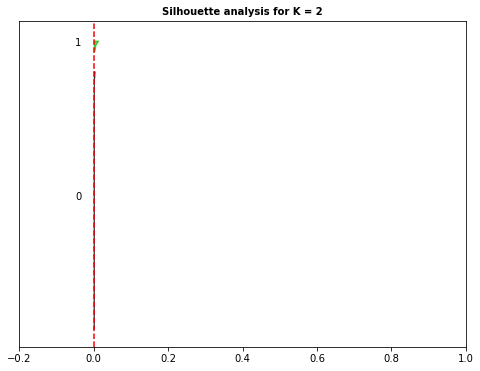

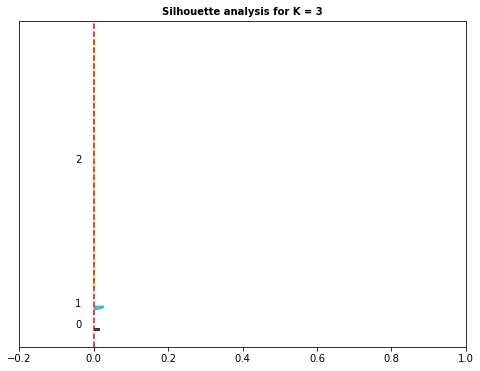

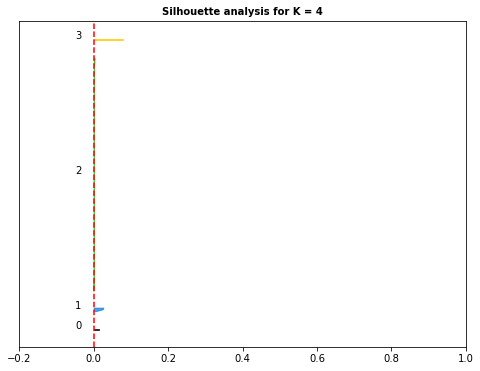

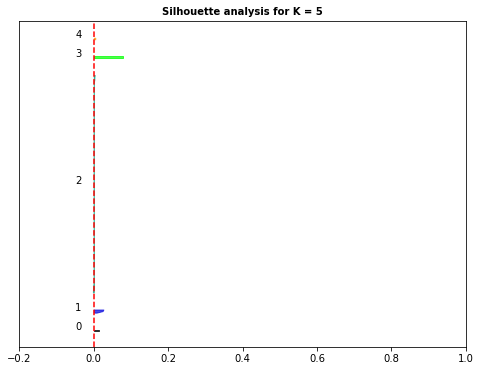

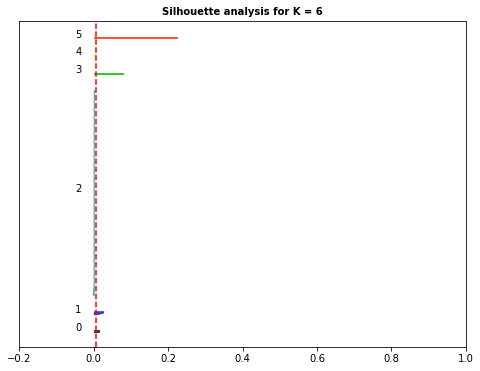

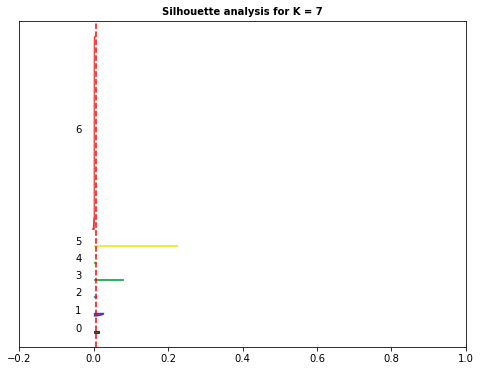

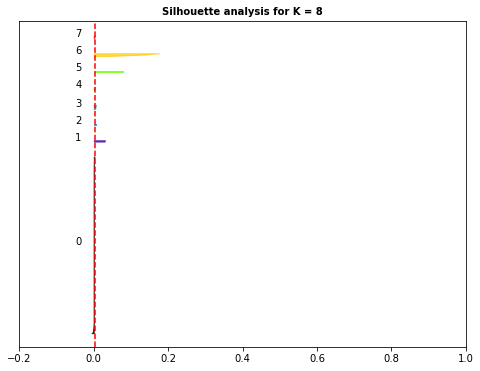

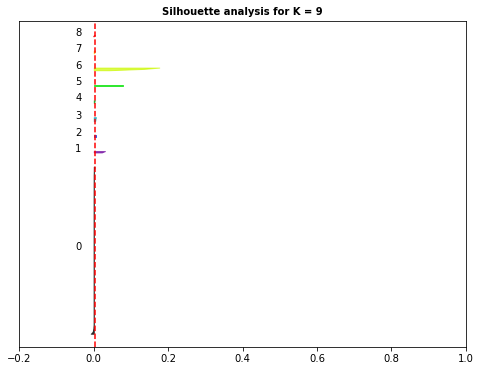

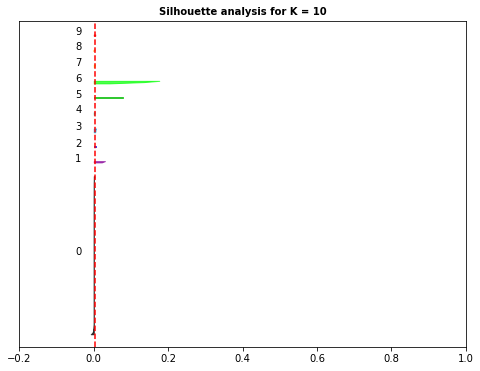

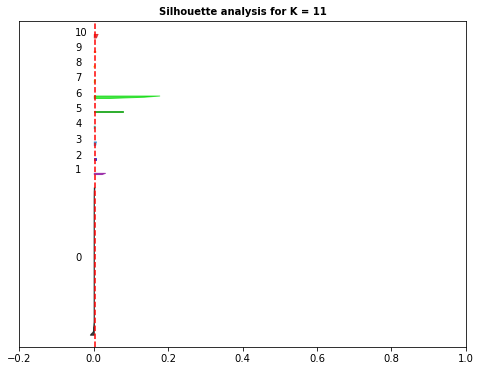

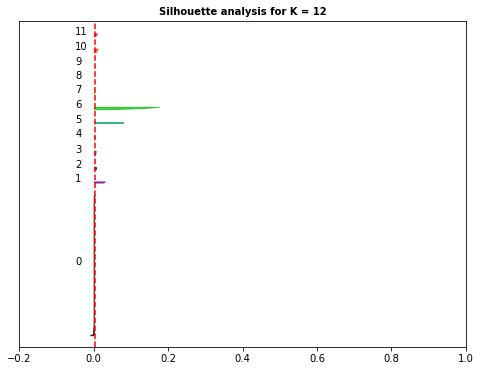

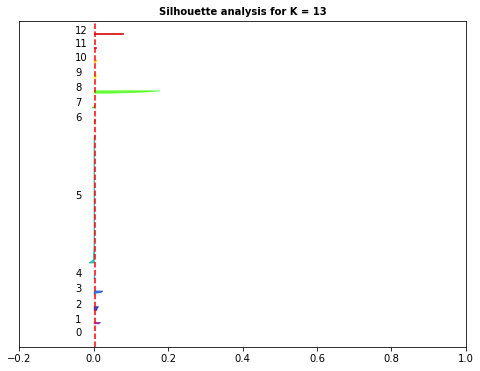

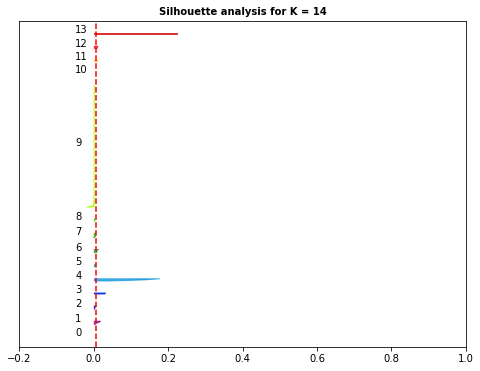

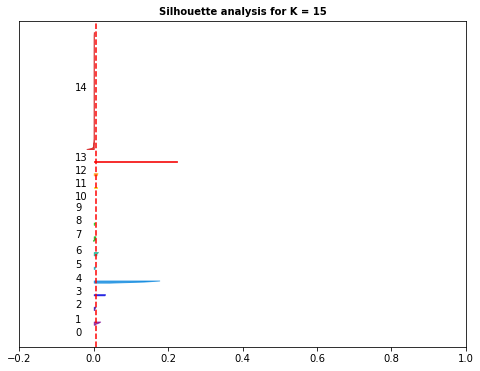

In [939]:
silhouette(kmeans_results, final_df, plot=True)

In [940]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

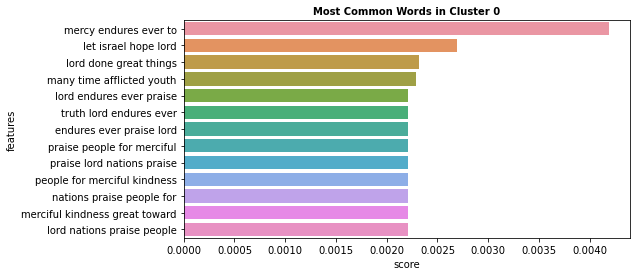

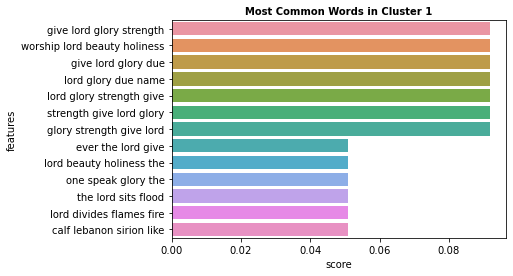

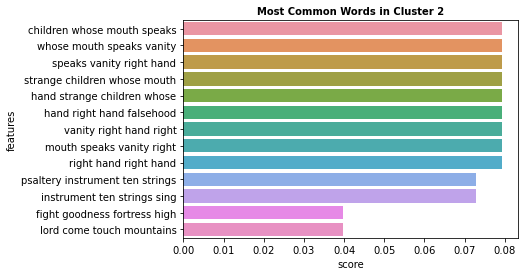

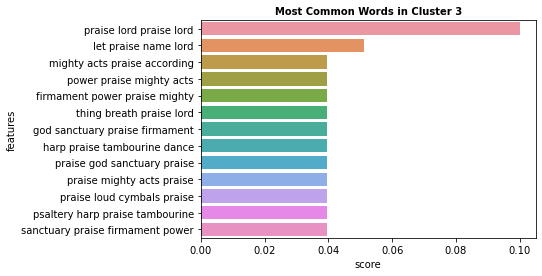

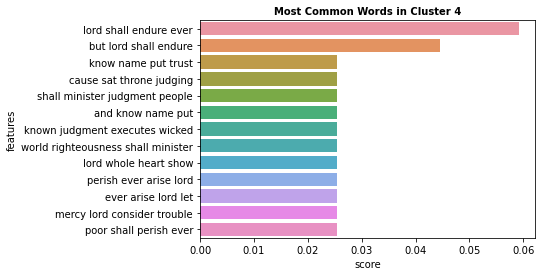

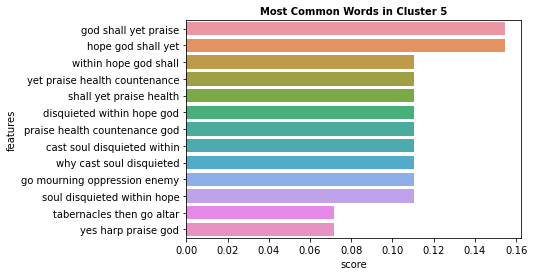

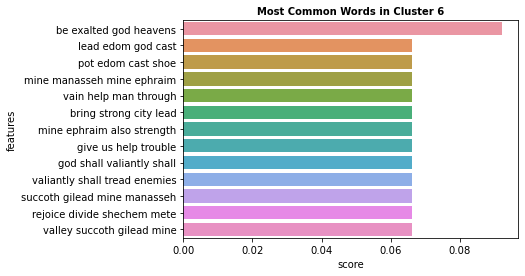

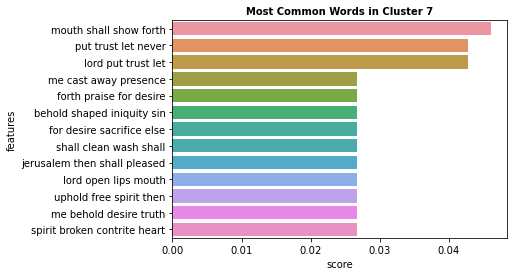

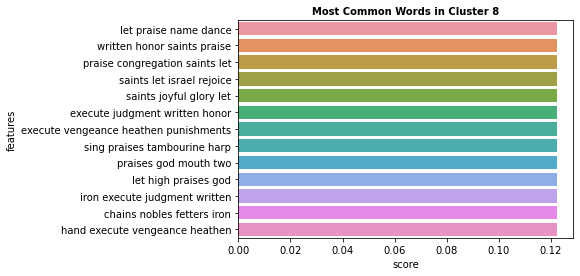

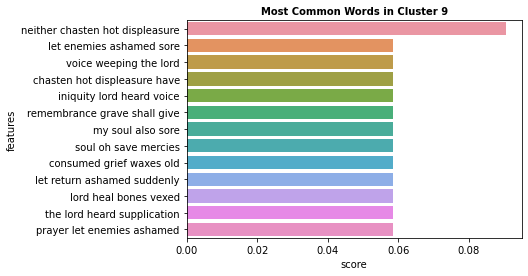

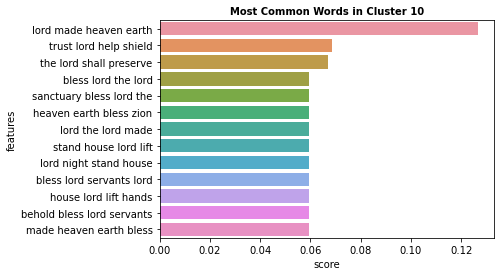

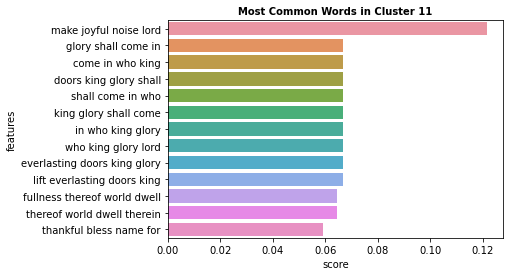

In [941]:
best_result = 12
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

In [942]:
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

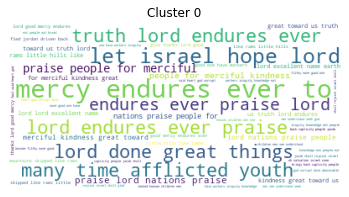

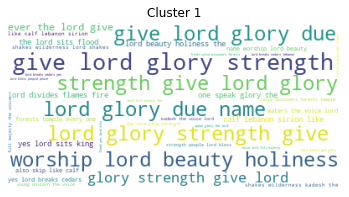

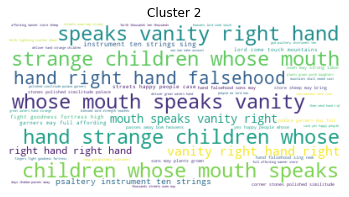

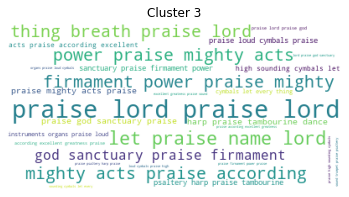

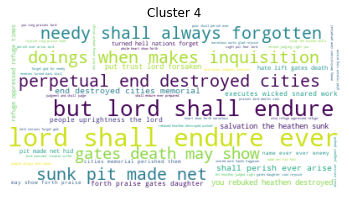

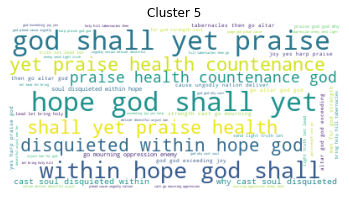

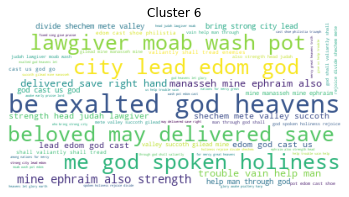

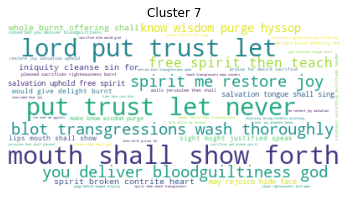

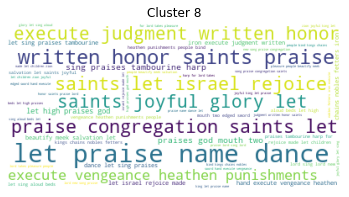

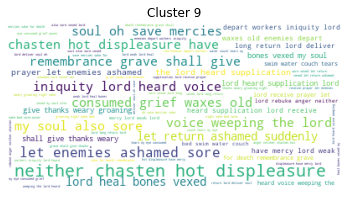

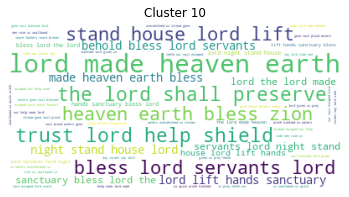

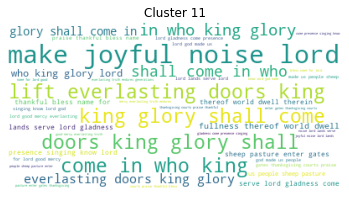

In [943]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

In [944]:
labels = kmeans.labels_ 
df['label'] = labels
df.head()

,Autor,Livro,label
100,Capitulo_1,"'blessed', 'man', 'walks', 'counsel', 'ungodly...",0
101,Capitulo_2,"'heathen', 'rage', ',', 'people', 'imagine', '...",0
102,Capitulo_3,"'lord', ',', 'increased', 'trouble', '!', 'man...",0
103,Capitulo_4,"'hear', 'call', ',', 'god', 'righteousness', '...",0
104,Capitulo_5,"'give', 'ear', 'words', ',', 'lord', ',', 'con...",0


In [945]:
print(df)

            Autor                                              Livro  label
100    Capitulo_1  'blessed', 'man', 'walks', 'counsel', 'ungodly...      0
101    Capitulo_2  'heathen', 'rage', ',', 'people', 'imagine', '...      0
102    Capitulo_3  'lord', ',', 'increased', 'trouble', '!', 'man...      0
103    Capitulo_4  'hear', 'call', ',', 'god', 'righteousness', '...      0
104    Capitulo_5  'give', 'ear', 'words', ',', 'lord', ',', 'con...      0
..            ...                                                ...    ...
245  Capitulo_146  'praise', 'lord', '.', 'praise', 'lord', ',', ...      3
246  Capitulo_147  'praise', 'lord', ':', 'good', 'sing', 'praise...      0
247  Capitulo_148  'praise', 'lord', '.', 'praise', 'lord', 'heav...      3
248  Capitulo_149  'praise', 'lord', '.', 'sing', 'lord', 'new', ...      8
249  Capitulo_150  'praise', 'lord', '.', 'praise', 'god', 'sanct...      3

[150 rows x 3 columns]
